In [10]:
import os

lmbda_list = [4e-4]
scene = 'cook_spinach-3-ori'
path_to_ply = f'/SDD_D/zwk/output/{scene}/additional_3dgs'
path_to_save = f'/SDD_D/zwk/output/{scene}/additional_3dgs_c'

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

for lmbda in lmbda_list:
    # for ply in os.listdir(path_to_ply):
    #     os.system(f'python encode_single_scene.py --gpu 3 --lmd {lmbda} --ply_path_from {path_to_ply}/{ply} --bit_path_to {path_to_save}/{ply.split(".")[0]} --determ 1')
    # os.system(f'python encode_single_scene.py --gpu 3 --lmd {lmbda} --ply_path_from {path_to_ply} --bit_path_to {path_to_save} --determ 1')
    # os.system(f'python decode_single_scene_validate.py --gpu 0 --lmd {lmbda} --bit_path_from ./outputs/{exp_name}/{scene} --ply_path_to {path_to_ply}/{scene}/point_cloud/iteration_1000/point_cloud.ply --source_path ../data_static/mipnerf360/{scene}')

    # os.system(f'python encode_single_scene.py --gpu 3 --lmd {lmbda} --ply_path_from "/SDD_D/zwk/output/{scene}/init_3dgs.ply" --bit_path_to "/SDD_D/zwk/output/{scene}/init_3dgs_c" --determ 1')
    os.system(f'python -W ignore decode_single_scene_validate.py --gpu 0 --lmd {lmbda} --bit_path_from /SDD_D/zwk/output/{scene}/init_3dgs_c --ply_path_to /SDD_D/zwk/output/{scene}/init_3dgs.ply --source_path /SDD_D/zwk/data_dynamic/dynerf/{scene.split("-")[0]}/frame000000')



Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth
[ INFO ] Encountered quite large input images (>1.6K pixels width), rescaling to 1.6K.
 If this is not desired, please explicitly specify '--resolution/-r' as 1
Start decompressing xyz...
Start decompressing fea...
Start decompressing feq...
Start decompressing geo...
Decompressed ply file saved to /SDD_D/zwk/output/cook_spinach-3-ori/init_3dgs.ply!


Rendering progress:   0%|          | 0/3 [00:00<?, ?it/s]
Traceback (most recent call last):
  File "/SSD2/chenzx/Projects/FCGS/decode_single_scene_validate.py", line 133, in <module>
    train(args)
  File "/SSD2/chenzx/Projects/FCGS/decode_single_scene_validate.py", line 103, in train
    rendering = render(view, gaussians, pipe=pipeline, bg_color=torch.tensor([0, 0, 0], dtype=torch.float32, device="cuda"))[
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/gaussian_renderer/__init__.py", line 102, in render
    "visibility_filter" : radii > 0,
                          ^^^^^^^^^
RuntimeError: CUDA error: an illegal memory access was encountered
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.



In [18]:
import os

lmbda_list = [1e-4]
exp_name = '3DGS_ori_mip360'
path_to_ply = '../gaussian-splatting/output/mipnerf360'
scene_list = os.listdir(path_to_ply)
for lmbda in lmbda_list:
    for scene in ['garden']:
        print('-'*100,'\n', scene)
        os.system(f'python encode_single_scene.py --gpu 3 --lmd {lmbda} --ply_path_from {path_to_ply}/{scene}/point_cloud/iteration_30000/point_cloud.ply --bit_path_to ./outputs/{exp_name}/{scene} --determ 1')
        os.system(f'python -W ignore decode_single_scene.py --gpu 3 --lmd {lmbda} --bit_path_from ./outputs/{exp_name}/{scene} --ply_path_to {path_to_ply}/{scene}/point_cloud/iteration_30000/point_cloud.ply ')

---------------------------------------------------------------------------------------------------- 
 garden
Start compressing xyz...
N_g: 1000000
g_fea_enc_q_hyp: tensor([[ 0.1344,  0.0402, -0.0148,  ..., -0.0757,  0.1325,  0.1073],
        [ 0.1347,  0.0402, -0.0145,  ..., -0.0758,  0.1334,  0.1075],
        [ 0.1348,  0.0402, -0.0145,  ..., -0.0758,  0.1333,  0.1074],
        ...,
        [ 0.1345,  0.0402, -0.0148,  ..., -0.0757,  0.1326,  0.1073],
        [ 0.1346,  0.0401, -0.0146,  ..., -0.0758,  0.1331,  0.1074],
        [ 0.1344,  0.0402, -0.0148,  ..., -0.0757,  0.1325,  0.1073]],
       device='cuda:3')
g_fea_enc_q_hyp_q: tensor([[0., 0., -0.,  ..., -0., 0., 0.],
        [0., 0., -0.,  ..., -0., 0., 0.],
        [0., 0., -0.,  ..., -0., 0., 0.],
        ...,
        [0., 0., -0.,  ..., -0., 0., 0.],
        [0., 0., -0.,  ..., -0., 0., 0.],
        [0., 0., -0.,  ..., -0., 0., 0.]], device='cuda:3')
Start compressing fea...
Start compressing feq...
fe_q_hyp: tensor([[-0.183

Traceback (most recent call last):
  File "/SSD2/chenzx/Projects/FCGS/encode_single_scene.py", line 72, in <module>
    train(args)
  File "/SSD2/chenzx/Projects/FCGS/encode_single_scene.py", line 52, in train
    ttl_size += CM.compress(g_xyz_in, g_fea_in, root_path=bit_save_path, chunk_size_list=chunk_size_list, determ_codec=args.determ)[3]
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/FCGS_model.py", line 822, in compress
    bits_feq_main_tmp = encoder_gaussian_mixed_chunk(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/encodings_cuda.py", line 191, in encoder_gaussian_mixed_chunk
    bit_len = encoder_gaussian_mixed(
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/encodings_cuda.py", line 216, in encoder_gaussian_mixed
    lower = arithmetic.calculate_cdf(
            ^^^^^^^^^^

Start decompressing xyz...
Start decompressing fea...
g_fea_enc_q_hyp_q: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:3')
Start decompressing feq...
fe_q_hyp_q: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:3')
Start decompressing geo...
geo_q_hyp_q: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:3')
Start decompressing xyz...
Start de

Traceback (most recent call last):
  File "/SSD2/chenzx/Projects/FCGS/decode_single_scene.py", line 65, in <module>
    train(args)
  File "/SSD2/chenzx/Projects/FCGS/decode_single_scene.py", line 32, in train
    g_xyz_out, g_fea_out = CM.decomprss(root_path=bit_save_path, chunk_size_list=chunk_size_list)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/FCGS_model.py", line 1041, in decomprss
    fe_q_tmp = decoder_gaussian_mixed_chunk(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/encodings_cuda.py", line 264, in decoder_gaussian_mixed_chunk
    x_c = decoder_gaussian_mixed(
          ^^^^^^^^^^^^^^^^^^^^^^^
  File "/SSD2/chenzx/Projects/FCGS/model/encodings_cuda.py", line 283, in decoder_gaussian_mixed
    with open(file_name, 'rb') as fin:
         ^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: './outputs/3DGS_ori_mip360/ga

In [ ]:
import tinycudann as tcnn
import numpy as np
import torch
from model.grid_utils import normalize_xyz, _grid_creater, _grid_encoder, FreqEncoder

encoding_cofig = {
	"otype": "Frequency", 
	"n_frequencies": 4  
}

encoder = tcnn.Encoding(3, encoding_cofig)
input = torch.rand(6, 3).cuda()
output = encoder(input)
print(input)
print(output)

encoder2 = FreqEncoder(3, 4)
output2 = encoder2(input)
print(output2)



In [27]:
import os
import json

scene = 'flame_steak'
# scene = 'flame_salmon_1'
for frame in range(1, 200):
    path = f'3DGStream-Res/dynerf/{scene}/frame{frame:06d}/size.json'
    with open(path, 'r') as f:
        size = json.load(f)
        prior_size = size['bits_prior_motion']
        if prior_size > 1:
            print(frame, prior_size)


1 11.827715873718262
10 11.682079315185547
11 11.791521072387695
13 11.778850555419922
21 11.833250045776367
29 11.59537124633789
31 11.628453254699707
35 11.658815383911133
37 11.798304557800293
39 11.780719757080078
47 11.800647735595703
49 11.791595458984375
53 11.702144622802734
61 11.851373672485352
86 11.599453926086426
102 11.626191139221191
104 11.827849388122559
121 11.83324909210205
123 11.768131256103516
135 11.773468017578125
139 11.829662322998047
142 11.818731307983398
143 11.814947128295898
148 11.811532974243164
153 11.750373840332031
163 11.78138256072998
167 11.650611877441406
175 11.811488151550293
193 11.824224472045898
195 11.814866065979004
196 11.813021659851074


In [3]:
# per-frame exp
import os
scene_list = ['flame_steak-4']
lambda_size = 1e-2
for scene_name in scene_list:
    script = f"python train_fcgsd.py --gpu 3 --eval --per_frame --Q_y 1 --Q_z 1 --lambda_size {lambda_size}  \
        --conduct_compress --conduct_decompress --conduct_training --scene_name {scene_name} \
        --frame_start 1 --frame_end 2 --dynamicGS_type 3dgstream \
        --images images_2 --iterations 300 --model_path ./3DGStream-Res/dynerf/{scene_name.split('-')[0]}-{lambda_size} --use_first_as_test"
    os.system(script)


[Training frame 1]


Training: 100%|██████████| 300/300 [02:04<00:00,  2.42iteration/s, loss_render=0.0154, loss_size=5.1, loss_mask=0, total_loss=0.0664] 


Figure(1500x500)

[Compressing frame 1]
mean_motion:  tensor([[ 0.1684, -0.0043,  0.2644,  ...,  0.1311,  0.0168, -0.0326],
        [ 0.1684, -0.0043,  0.2644,  ...,  0.1311,  0.0168, -0.0326],
        [ 0.1684, -0.0043,  0.2644,  ...,  0.1311,  0.0168, -0.0326],
        ...,
        [ 0.1686,  0.0030,  0.2871,  ...,  0.1349,  0.0176, -0.0356],
        [ 0.1684, -0.0043,  0.2644,  ...,  0.1311,  0.0168, -0.0326],
        [ 0.1700,  0.0036,  0.2964,  ...,  0.1376,  0.0186, -0.0340]],
       device='cuda:3')
std_motion:  tensor([[0.0048, 0.0047, 0.0077,  ..., 0.0057, 0.0033, 0.0048],
        [0.0048, 0.0047, 0.0077,  ..., 0.0057, 0.0033, 0.0048],
        [0.0048, 0.0047, 0.0077,  ..., 0.0057, 0.0033, 0.0048],
        ...,
        [0.0033, 0.0031, 0.0054,  ..., 0.0039, 0.0022, 0.0033],
        [0.0048, 0.0047, 0.0077,  ..., 0.0057, 0.0033, 0.0048],
        [0.0027, 0.0026, 0.0046,  ..., 0.0032, 0.0018, 0.0027]],
       device='cuda:3')
y_hat_motion:  tensor([[0., -0., 0.,  ..., 0., 0., -0

/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Evaluation results: psnr: 32.2124, ssim: 0.9559, lpips: 0.1166, Ll1: 0.0179




In [ ]:
# joint exp
import os
scene_list = ['flame_steak-4']
# scene_list = ['cut_roasted_beef-8']
lambda_size = 1e-2

for scene_name in scene_list:
    model_path = f'./3DGStream-Res/dynerf/{scene_name.split("-")[0]}-{lambda_size}-joint'
    checkpoint_path = f'{model_path}/model.pth'
    script = f"python train_fcgsd.py --gpu 3 --eval --joint  --dynamicGS_type 3dgstream \
        --Q_y 1 --Q_z 1 --lr 1e-3 --lambda_size {lambda_size}  \
        --conduct_compress --conduct_decompress --conduct_train --scene_name {scene_name} \
        --frame_start 1 --frame_end 200 --test_frame_start 1 --test_frame_end 300\
        --images images_2 --iterations 1000 --model_path {model_path} --checkpoint 100 --use_first_as_test"
    os.system(script)

Training:   0%|          | 0/300 [00:00<?, ?iteration/s]

est_motion:  tensor([[-2.8973e-03,  1.2131e-03,  4.8828e-04,  ...,  4.6635e-04,
          1.5240e-03, -1.9681e-04],
        [-1.7309e-03,  8.1396e-04,  1.1313e-04,  ..., -4.1962e-04,
          6.0034e-04,  3.9053e-04],
        [ 8.4460e-05,  1.1406e-03, -5.2404e-04,  ...,  2.3937e-04,
         -6.6328e-04,  5.2929e-04],
        ...,
        [-6.5422e-04,  1.8206e-03, -5.3358e-04,  ..., -1.6346e-03,
          2.1095e-03, -7.4387e-04],
        [-1.0605e-03,  4.1032e-04,  2.4261e-03,  ..., -2.2984e-03,
         -2.4796e-04,  6.0463e-04],
        [-3.9253e-03, -1.3628e-03,  1.1959e-03,  ..., -1.7614e-03,
          3.6831e-03,  3.0994e-05]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0532,  0.0073, -0.0360,  ..., -0.0891, -0.0618, -0.0130],
        [ 0.0595,  0.0028, -0.0347,  ..., -0.0868, -0.0646, -0.0151],
        [ 0.0611,  0.0012, -0.0347,  ..., -0.0858, -0.0656, -0.0161],
        ...,
        [ 0.0515,  0.0096, -0.0368,  ..., -0.0899, -0.0609, -0.

Training:   0%|          | 1/300 [00:02<13:12,  2.65s/iteration, loss_render=0.11, loss_size=6.43, loss_mask=0, total_loss=0.174]

Gradient norm: 0.38653230439968644
est_motion:  tensor([[ 2.4281e-03,  9.8419e-04, -2.1887e-04,  ..., -6.6566e-04,
          6.9380e-04, -8.8882e-04],
        [-9.5749e-04,  2.0485e-03, -7.0763e-04,  ...,  8.2350e-04,
         -1.9350e-03,  3.1452e-03],
        [ 1.9875e-03,  1.3285e-03,  5.0485e-05,  ..., -1.2655e-03,
          2.5892e-04, -1.3285e-03],
        ...,
        [ 1.7252e-03,  4.4942e-04,  1.8921e-03,  ...,  7.1430e-04,
         -2.7537e-04,  4.9210e-04],
        [ 1.0700e-03,  1.4439e-03,  2.4719e-03,  ..., -2.6112e-03,
          3.5858e-03, -1.3847e-03],
        [ 4.2381e-03,  5.2338e-03,  1.8063e-03,  ..., -1.1196e-03,
          5.9052e-03,  7.0572e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0918, -0.0261, -0.0120,  ..., -0.0928, -0.0704,  0.0185],
        [ 0.0947, -0.0335, -0.0098,  ..., -0.0899, -0.0699,  0.0155],
        [ 0.0937, -0.0302, -0.0108,  ..., -0.0917, -0.0703,  0.0163],
        ...,
        [ 0.0895, -0.0188, -

Training:   1%|          | 2/300 [00:04<11:09,  2.25s/iteration, loss_render=0.0822, loss_size=6.4, loss_mask=0, total_loss=0.146]

Gradient norm: 0.3861527234775289
est_motion:  tensor([[ 2.9526e-03,  2.5654e-03,  4.0932e-03,  ...,  2.1629e-03,
          1.2150e-03, -4.1389e-04],
        [ 1.9913e-03,  6.1369e-04,  4.3106e-03,  ...,  2.1801e-03,
          1.7328e-03,  2.4910e-03],
        [ 4.2915e-04, -5.0974e-04, -3.3379e-05,  ...,  1.2264e-03,
          1.8883e-03,  2.2197e-04],
        ...,
        [ 1.7719e-03,  9.3746e-04,  6.3667e-03,  ..., -7.0333e-04,
          2.3842e-03,  1.8549e-04],
        [ 2.8667e-03,  5.2452e-04,  3.3321e-03,  ..., -2.6011e-04,
          9.6893e-04, -8.3017e-04],
        [ 1.7033e-03,  2.3308e-03,  2.7847e-03,  ...,  8.7261e-05,
          3.1586e-03,  7.1192e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1149, -0.0482,  0.0009,  ..., -0.0812, -0.0739,  0.0506],
        [ 0.1140, -0.0419, -0.0025,  ..., -0.0839, -0.0741,  0.0540],
        [ 0.1148, -0.0472,  0.0002,  ..., -0.0819, -0.0736,  0.0510],
        ...,
        [ 0.1136, -0.0366, -0

Training:   1%|          | 3/300 [00:06<10:16,  2.07s/iteration, loss_render=0.0671, loss_size=6.38, loss_mask=0, total_loss=0.131]

Gradient norm: 0.4581803983565792
est_motion:  tensor([[ 1.7567e-03,  6.6948e-04,  8.3625e-05,  ..., -1.4095e-03,
          1.9085e-04,  5.9700e-04],
        [ 3.8481e-04,  1.5659e-03, -3.7727e-03,  ..., -9.8228e-04,
         -4.6754e-04, -4.0841e-04],
        [ 1.8539e-03,  1.0881e-03, -2.4681e-03,  ...,  4.7565e-04,
         -4.6730e-04,  1.3924e-03],
        ...,
        [ 5.5580e-03,  7.3318e-03, -3.6030e-03,  ..., -6.3934e-03,
          1.6937e-03, -1.2884e-03],
        [-6.4731e-05,  8.8310e-04,  8.5783e-04,  ..., -1.5383e-03,
         -9.4795e-04,  1.6844e-04],
        [ 2.6493e-03,  1.3561e-03, -9.1076e-04,  ..., -2.7084e-03,
         -3.1433e-03,  7.7486e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1454, -0.0473, -0.0056,  ..., -0.0691, -0.0890,  0.0851],
        [ 0.1444, -0.0493, -0.0043,  ..., -0.0672, -0.0890,  0.0844],
        [ 0.1451, -0.0476, -0.0056,  ..., -0.0688, -0.0889,  0.0851],
        ...,
        [ 0.1452, -0.0441, -0

Training:   1%|▏         | 4/300 [00:08<09:57,  2.02s/iteration, loss_render=0.0675, loss_size=6.35, loss_mask=0, total_loss=0.131]

Gradient norm: 0.5870588144470134
est_motion:  tensor([[ 6.6233e-04,  1.8396e-03, -4.2057e-04,  ...,  4.1556e-04,
          1.9302e-03,  1.2445e-03],
        [ 8.4019e-04, -1.0223e-03,  1.1072e-03,  ..., -7.4911e-04,
          1.2522e-03, -2.2638e-04],
        [ 1.5011e-03, -5.8591e-05, -3.9768e-04,  ..., -8.4829e-04,
          1.5965e-03,  1.4515e-03],
        ...,
        [-1.4944e-03,  2.0752e-03, -3.8490e-03,  ...,  1.2169e-03,
         -9.9945e-04,  1.8082e-03],
        [ 3.1815e-03,  9.8133e-04,  1.6642e-03,  ..., -4.5013e-04,
          2.1851e-04,  1.0672e-03],
        [ 1.0500e-03, -1.4172e-03, -7.6771e-04,  ..., -1.1692e-03,
          1.0824e-04,  2.2869e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1768, -0.0582, -0.0177,  ..., -0.0516, -0.1095,  0.1121],
        [ 0.1753, -0.0599, -0.0167,  ..., -0.0493, -0.1082,  0.1109],
        [ 0.1766, -0.0585, -0.0175,  ..., -0.0511, -0.1092,  0.1118],
        ...,
        [ 0.1792, -0.0546, -0

Training:   2%|▏         | 5/300 [00:10<09:44,  1.98s/iteration, loss_render=0.0726, loss_size=6.33, loss_mask=0, total_loss=0.136]

Gradient norm: 0.39221683880954356
est_motion:  tensor([[ 2.9063e-04,  1.6413e-03,  1.2655e-03,  ..., -1.6336e-03,
         -2.2459e-04,  3.2768e-03],
        [ 9.1255e-05, -1.4997e-04, -4.5729e-04,  ..., -1.0853e-03,
         -2.7676e-03,  1.7576e-03],
        [-2.6298e-04,  3.1090e-04,  1.0910e-03,  ..., -5.4169e-04,
         -1.6661e-03,  1.6937e-03],
        ...,
        [ 1.9341e-03,  7.7295e-04,  7.3509e-03,  ...,  1.0338e-03,
         -2.2697e-03,  2.7332e-03],
        [ 9.5224e-04,  2.1687e-03,  2.9335e-03,  ...,  1.1740e-03,
         -6.0501e-03,  2.3766e-03],
        [ 2.3193e-03,  2.3499e-03,  7.5455e-03,  ..., -1.5259e-03,
         -7.6485e-03,  4.0054e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.2003, -0.0708, -0.0249,  ..., -0.0374, -0.1305,  0.1384],
        [ 0.2007, -0.0706, -0.0253,  ..., -0.0378, -0.1309,  0.1387],
        [ 0.1991, -0.0715, -0.0241,  ..., -0.0365, -0.1293,  0.1375],
        ...,
        [ 0.2039, -0.0685, -

Training:   2%|▏         | 6/300 [00:12<09:32,  1.95s/iteration, loss_render=0.0605, loss_size=6.29, loss_mask=0, total_loss=0.123]

Gradient norm: 0.5163108508365335
est_motion:  tensor([[-3.1071e-03,  3.2425e-05, -9.9897e-05,  ...,  6.8665e-04,
         -1.1892e-03,  7.6008e-04],
        [-3.1528e-03, -8.5115e-04, -8.9741e-04,  ..., -9.7334e-05,
         -2.4128e-04,  1.2903e-03],
        [-1.6451e-03,  1.2589e-03,  6.0768e-03,  ...,  4.6670e-05,
         -2.2054e-05,  1.5945e-03],
        ...,
        [-2.9221e-03, -1.2817e-03,  3.9444e-03,  ...,  2.5120e-03,
          4.8494e-04,  1.2283e-03],
        [-3.1829e-05, -1.0614e-03,  3.6812e-03,  ..., -7.0858e-04,
          3.5191e-04,  1.1244e-03],
        [-5.0888e-03,  8.7070e-04,  4.4441e-03,  ...,  1.0004e-03,
         -2.0771e-03,  6.2132e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.2147, -0.0785, -0.0247,  ..., -0.0372, -0.1400,  0.1618],
        [ 0.2126, -0.0791, -0.0240,  ..., -0.0357, -0.1389,  0.1608],
        [ 0.2131, -0.0791, -0.0241,  ..., -0.0360, -0.1390,  0.1607],
        ...,
        [ 0.2221, -0.0754, -0

Training:   2%|▏         | 7/300 [00:14<09:24,  1.92s/iteration, loss_render=0.0498, loss_size=6.25, loss_mask=0, total_loss=0.112]

Gradient norm: 0.3229177276229082
est_motion:  tensor([[-0.0001,  0.0004,  0.0006,  ..., -0.0003, -0.0004,  0.0018],
        [ 0.0022, -0.0026,  0.0001,  ..., -0.0009,  0.0014,  0.0017],
        [ 0.0024, -0.0020,  0.0020,  ...,  0.0001, -0.0005,  0.0009],
        ...,
        [ 0.0002, -0.0021, -0.0027,  ...,  0.0020,  0.0014,  0.0016],
        [ 0.0031, -0.0024, -0.0035,  ..., -0.0002,  0.0008,  0.0003],
        [ 0.0029, -0.0055, -0.0063,  ...,  0.0029,  0.0044,  0.0034]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.2336, -0.0883, -0.0298,  ..., -0.0428, -0.1555,  0.1927],
        [ 0.2363, -0.0876, -0.0306,  ..., -0.0441, -0.1575,  0.1951],
        [ 0.2340, -0.0882, -0.0299,  ..., -0.0431, -0.1556,  0.1928],
        ...,
        [ 0.2375, -0.0873, -0.0309,  ..., -0.0446, -0.1586,  0.1968],
        [ 0.2373, -0.0874, -0.0309,  ..., -0.0446, -0.1585,  0.1963],
        [ 0.2487, -0.0885, -0.0345,  ..., -0.0471, -0.1691,  0.2116]],
       de

Training:   3%|▎         | 8/300 [00:16<09:31,  1.96s/iteration, loss_render=0.0593, loss_size=6.19, loss_mask=0, total_loss=0.121]

Gradient norm: 0.6505466510888331
est_motion:  tensor([[-7.8964e-04, -3.4599e-03,  4.9877e-04,  ..., -5.6803e-05,
          7.7486e-04, -1.0138e-03],
        [-5.2977e-04, -7.2670e-04,  4.2496e-03,  ..., -7.6890e-06,
         -1.3075e-03,  2.5692e-03],
        [-3.3836e-03, -3.9482e-03,  2.0993e-04,  ..., -8.3447e-04,
          8.8930e-04, -2.3270e-03],
        ...,
        [-9.4223e-04, -2.1420e-03,  4.3368e-04,  ...,  3.3188e-04,
          1.9417e-03, -1.7090e-03],
        [-3.0060e-03, -4.6463e-03,  7.8773e-04,  ..., -8.5211e-04,
         -6.1798e-04, -9.0027e-04],
        [-1.1024e-03, -6.5155e-03,  1.7672e-03,  ..., -2.0695e-03,
         -3.9458e-05, -2.5296e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.2502, -0.1026, -0.0381,  ..., -0.0401, -0.1694,  0.2199],
        [ 0.2500, -0.1026, -0.0382,  ..., -0.0399, -0.1688,  0.2195],
        [ 0.2508, -0.1026, -0.0381,  ..., -0.0404, -0.1699,  0.2204],
        ...,
        [ 0.2644, -0.1041, -0

Training:   3%|▎         | 9/300 [00:18<09:28,  1.95s/iteration, loss_render=0.0457, loss_size=6.12, loss_mask=0, total_loss=0.107]

Gradient norm: 0.5682648565853078
est_motion:  tensor([[ 2.9063e-04,  1.6413e-03,  1.2655e-03,  ..., -1.6336e-03,
         -2.2459e-04,  3.2768e-03],
        [ 9.1255e-05, -1.4997e-04, -4.5729e-04,  ..., -1.0853e-03,
         -2.7676e-03,  1.7576e-03],
        [-2.6298e-04,  3.1090e-04,  1.0910e-03,  ..., -5.4169e-04,
         -1.6661e-03,  1.6937e-03],
        ...,
        [ 1.9341e-03,  7.7295e-04,  7.3509e-03,  ...,  1.0338e-03,
         -2.2697e-03,  2.7332e-03],
        [ 9.5224e-04,  2.1687e-03,  2.9335e-03,  ...,  1.1740e-03,
         -6.0501e-03,  2.3766e-03],
        [ 2.3193e-03,  2.3499e-03,  7.5455e-03,  ..., -1.5259e-03,
         -7.6485e-03,  4.0054e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.2738, -0.1098, -0.0414,  ..., -0.0371, -0.1836,  0.2447],
        [ 0.2746, -0.1099, -0.0417,  ..., -0.0375, -0.1844,  0.2456],
        [ 0.2715, -0.1098, -0.0410,  ..., -0.0362, -0.1818,  0.2428],
        ...,
        [ 0.2807, -0.1098, -0

Training:   3%|▎         | 10/300 [00:19<09:24,  1.95s/iteration, loss_render=0.0439, loss_size=6.03, loss_mask=0, total_loss=0.104]

Gradient norm: 0.31691234850041583
est_motion:  tensor([[ 1.6794e-03, -1.6670e-03, -5.3787e-04,  ..., -2.0275e-03,
         -1.1802e-05,  1.6966e-03],
        [ 9.8526e-05, -3.4790e-03, -2.6627e-03,  ..., -6.2609e-04,
         -1.4057e-03,  6.4659e-04],
        [ 1.3552e-03, -6.3753e-04, -6.7472e-04,  ..., -1.7357e-03,
          8.1873e-04,  1.6336e-03],
        ...,
        [-8.0729e-04, -1.1375e-02, -9.8877e-03,  ...,  1.3304e-03,
         -7.6675e-03,  2.7428e-03],
        [ 4.0932e-03, -4.4060e-03, -9.9850e-04,  ..., -2.6417e-03,
         -4.7946e-04,  1.9760e-03],
        [ 5.8708e-03, -4.7493e-03, -3.1338e-03,  ..., -4.6616e-03,
         -2.4548e-03,  2.4185e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3002, -0.1142, -0.0424,  ..., -0.0353, -0.2001,  0.2718],
        [ 0.2956, -0.1140, -0.0414,  ..., -0.0339, -0.1958,  0.2668],
        [ 0.2960, -0.1140, -0.0415,  ..., -0.0340, -0.1961,  0.2670],
        ...,
        [ 0.3076, -0.1151, -

Training:   4%|▎         | 11/300 [00:22<09:40,  2.01s/iteration, loss_render=0.052, loss_size=5.93, loss_mask=0, total_loss=0.111] 

Gradient norm: 0.6234879992474572
est_motion:  tensor([[ 1.1988e-03,  5.8413e-04,  5.1641e-04,  ...,  4.9973e-03,
          1.9360e-03,  2.2447e-04],
        [-7.6485e-04,  2.1572e-03, -6.7472e-04,  ...,  2.5826e-03,
          2.3975e-03, -1.6031e-03],
        [ 6.4731e-05,  5.2309e-04,  2.9707e-04,  ...,  2.7733e-03,
          1.5030e-03, -8.9836e-04],
        ...,
        [ 7.1621e-04, -2.2733e-04,  1.1835e-03,  ...,  5.6686e-03,
          5.6496e-03, -2.3270e-03],
        [-1.2934e-05,  2.3041e-03,  5.1117e-03,  ...,  1.2398e-03,
          4.1656e-03,  4.0746e-04],
        [ 8.8978e-04,  1.7872e-03, -1.8587e-03,  ...,  6.3438e-03,
          5.8670e-03, -2.8477e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3149, -0.1110, -0.0402,  ..., -0.0367, -0.2122,  0.2899],
        [ 0.3120, -0.1109, -0.0395,  ..., -0.0360, -0.2098,  0.2866],
        [ 0.3110, -0.1107, -0.0393,  ..., -0.0356, -0.2086,  0.2855],
        ...,
        [ 0.3278, -0.1131, -0

Training:   4%|▍         | 12/300 [00:24<09:42,  2.02s/iteration, loss_render=0.0404, loss_size=5.88, loss_mask=0, total_loss=0.0991]

Gradient norm: 0.5364338877456554
est_motion:  tensor([[ 1.2703e-03,  2.5768e-03, -3.9339e-05,  ...,  2.9206e-04,
          1.1845e-03,  6.0320e-04],
        [ 5.0783e-04,  2.1782e-03, -5.0497e-04,  ..., -7.7152e-04,
          1.5621e-03,  1.9197e-03],
        [ 1.5011e-03,  2.2078e-04,  7.0953e-04,  ..., -5.0879e-04,
          9.5463e-04, -4.1842e-04],
        ...,
        [ 2.7924e-03,  3.8223e-03, -3.5038e-03,  ...,  1.0042e-03,
         -1.3418e-03,  1.0967e-03],
        [-2.9826e-04,  1.2541e-03, -4.2839e-03,  ..., -1.5259e-04,
         -2.8744e-03,  1.7900e-03],
        [-2.9492e-04,  2.0695e-03, -1.4079e-04,  ..., -9.5510e-04,
          1.2951e-03,  3.3150e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3271, -0.1052, -0.0403,  ..., -0.0406, -0.2257,  0.3076],
        [ 0.3263, -0.1051, -0.0401,  ..., -0.0402, -0.2249,  0.3066],
        [ 0.3211, -0.1049, -0.0389,  ..., -0.0383, -0.2207,  0.3012],
        ...,
        [ 0.3296, -0.1055, -0

Training:   4%|▍         | 13/300 [00:26<09:31,  1.99s/iteration, loss_render=0.0285, loss_size=5.76, loss_mask=0, total_loss=0.0862]

Gradient norm: 0.3563105694162297
est_motion:  tensor([[-2.0809e-03, -4.1890e-04,  1.9627e-03,  ...,  1.7557e-03,
         -2.9659e-03,  2.7790e-03],
        [-1.6823e-03, -3.9434e-04,  2.3613e-03,  ..., -8.1015e-04,
         -5.1117e-04,  1.8711e-03],
        [-9.1362e-04, -2.6822e-06, -1.5039e-03,  ..., -2.8563e-04,
         -1.4153e-03,  2.6608e-04],
        ...,
        [-1.6022e-03, -6.3229e-04,  3.1338e-03,  ..., -2.4700e-03,
         -4.1084e-03,  9.0027e-04],
        [-2.5883e-03, -2.7180e-05,  1.8234e-03,  ...,  8.1718e-05,
          3.4750e-05,  2.1133e-03],
        [-5.6877e-03, -2.5425e-03,  4.4823e-03,  ..., -1.3342e-03,
          9.5749e-04,  5.3101e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3389, -0.1001, -0.0427,  ..., -0.0464, -0.2431,  0.3269],
        [ 0.3349, -0.1001, -0.0419,  ..., -0.0452, -0.2397,  0.3219],
        [ 0.3258, -0.0999, -0.0404,  ..., -0.0415, -0.2330,  0.3139],
        ...,
        [ 0.3355, -0.1002, -0

Training:   5%|▍         | 14/300 [00:28<09:33,  2.00s/iteration, loss_render=0.0303, loss_size=5.66, loss_mask=0, total_loss=0.087] 

Gradient norm: 0.692243245974668
est_motion:  tensor([[-1.9741e-03, -5.1022e-05, -1.4467e-03,  ..., -2.6169e-03,
         -1.5144e-03, -9.6226e-04],
        [-2.2030e-03, -1.2846e-03,  1.3554e-04,  ..., -2.1877e-03,
         -4.3368e-04, -3.5310e-04],
        [-1.3294e-03, -4.1771e-04,  2.1887e-04,  ..., -1.9875e-03,
          2.5487e-04, -1.3609e-03],
        ...,
        [-1.7881e-03, -6.0034e-04, -1.4715e-03,  ..., -2.1343e-03,
         -4.0932e-03, -6.8283e-04],
        [-2.4719e-03, -1.2326e-04, -1.1911e-03,  ..., -2.6560e-04,
         -2.1477e-03, -8.2827e-04],
        [-5.2261e-03, -3.9196e-04, -7.2670e-04,  ..., -4.6768e-03,
         -3.7251e-03, -2.5177e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3525, -0.0984, -0.0473,  ..., -0.0497, -0.2640,  0.3455],
        [ 0.3469, -0.0980, -0.0465,  ..., -0.0481, -0.2588,  0.3385],
        [ 0.3418, -0.0979, -0.0456,  ..., -0.0467, -0.2546,  0.3328],
        ...,
        [ 0.3533, -0.0986, -0.

Training:   5%|▌         | 15/300 [00:30<09:24,  1.98s/iteration, loss_render=0.0301, loss_size=5.59, loss_mask=0, total_loss=0.086]

Gradient norm: 0.8779508151523703
est_motion:  tensor([[-6.7616e-04,  6.6090e-04,  7.5293e-04,  ..., -1.5135e-03,
          1.2398e-03, -5.6982e-04],
        [ 3.2854e-04,  1.4887e-03,  2.0921e-04,  ..., -1.7843e-03,
          1.6785e-03, -2.5120e-03],
        [-4.5753e-04,  4.4656e-04,  4.5013e-03,  ..., -1.6594e-03,
          3.5954e-03, -9.7942e-04],
        ...,
        [-4.6039e-04,  1.6861e-03,  1.5907e-03,  ..., -1.2817e-03,
          6.8665e-04, -2.1152e-03],
        [ 2.7704e-04,  3.8981e-04, -1.9324e-04,  ..., -1.3456e-03,
          3.5107e-05,  1.1091e-03],
        [-2.3975e-03, -7.4577e-04,  6.7749e-03,  ..., -4.7760e-03,
          3.5000e-03, -4.3373e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3607, -0.0960, -0.0466,  ..., -0.0441, -0.2766,  0.3421],
        [ 0.3535, -0.0957, -0.0453,  ..., -0.0423, -0.2707,  0.3344],
        [ 0.3527, -0.0955, -0.0450,  ..., -0.0419, -0.2697,  0.3336],
        ...,
        [ 0.3725, -0.0980, -0

Training:   5%|▌         | 16/300 [00:32<09:28,  2.00s/iteration, loss_render=0.0385, loss_size=5.54, loss_mask=0, total_loss=0.0939]

Gradient norm: 0.6539470560709651
est_motion:  tensor([[ 0.0027,  0.0025,  0.0001,  ...,  0.0003, -0.0008,  0.0011],
        [ 0.0030,  0.0013,  0.0004,  ...,  0.0005, -0.0006,  0.0005],
        [ 0.0028,  0.0005,  0.0017,  ..., -0.0006, -0.0011,  0.0007],
        ...,
        [ 0.0021,  0.0021,  0.0011,  ..., -0.0004, -0.0020,  0.0015],
        [ 0.0022,  0.0004, -0.0006,  ...,  0.0006, -0.0015,  0.0023],
        [ 0.0067,  0.0040,  0.0008,  ...,  0.0017, -0.0003, -0.0011]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3760, -0.0933, -0.0458,  ..., -0.0383, -0.2922,  0.3454],
        [ 0.3762, -0.0933, -0.0458,  ..., -0.0384, -0.2923,  0.3455],
        [ 0.3735, -0.0930, -0.0454,  ..., -0.0377, -0.2896,  0.3423],
        ...,
        [ 0.3698, -0.0929, -0.0448,  ..., -0.0368, -0.2864,  0.3385],
        [ 0.3650, -0.0925, -0.0440,  ..., -0.0352, -0.2825,  0.3345],
        [ 0.4088, -0.1020, -0.0494,  ..., -0.0405, -0.3233,  0.3852]],
       de

Training:   6%|▌         | 17/300 [00:34<09:40,  2.05s/iteration, loss_render=0.0356, loss_size=5.48, loss_mask=0, total_loss=0.0904]

Gradient norm: 0.8305268752774772
est_motion:  tensor([[-3.6163e-03, -5.4646e-04, -9.8515e-04,  ..., -1.9703e-03,
         -2.3041e-03, -2.2984e-03],
        [-1.5392e-03, -7.4244e-04,  1.4555e-04,  ..., -2.2221e-03,
         -1.4477e-03, -2.4567e-03],
        [-2.0885e-03, -4.3297e-04, -1.3685e-03,  ..., -3.7136e-03,
         -7.2575e-04, -3.5114e-03],
        ...,
        [-1.5392e-03, -2.6112e-03, -6.4621e-03,  ..., -4.3602e-03,
         -2.0390e-03, -3.3665e-03],
        [-9.8801e-04, -9.4223e-04, -8.9216e-04,  ...,  1.0729e-06,
         -6.8951e-04, -5.5075e-04],
        [-2.5730e-03,  4.7946e-04,  2.6751e-04,  ..., -3.1700e-03,
         -2.3632e-03, -3.1395e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3823, -0.0932, -0.0469,  ..., -0.0320, -0.3022,  0.3471],
        [ 0.3778, -0.0926, -0.0462,  ..., -0.0311, -0.2979,  0.3421],
        [ 0.3869, -0.0940, -0.0475,  ..., -0.0330, -0.3067,  0.3520],
        ...,
        [ 0.3964, -0.0964, -0

Training:   6%|▌         | 18/300 [00:36<09:34,  2.04s/iteration, loss_render=0.0388, loss_size=5.43, loss_mask=0, total_loss=0.0931]

Gradient norm: 0.7952882701584889
est_motion:  tensor([[-0.0016, -0.0009,  0.0008,  ..., -0.0004, -0.0012,  0.0012],
        [-0.0020,  0.0005,  0.0005,  ..., -0.0005, -0.0019,  0.0002],
        [-0.0024,  0.0001,  0.0011,  ...,  0.0021, -0.0010, -0.0033],
        ...,
        [ 0.0009,  0.0035, -0.0019,  ...,  0.0022,  0.0008, -0.0006],
        [-0.0012, -0.0009, -0.0012,  ..., -0.0005, -0.0007,  0.0006],
        [ 0.0022,  0.0028, -0.0036,  ...,  0.0009, -0.0005, -0.0004]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3723, -0.0894, -0.0499,  ..., -0.0248, -0.2953,  0.3420],
        [ 0.3746, -0.0899, -0.0502,  ..., -0.0252, -0.2975,  0.3443],
        [ 0.3783, -0.0905, -0.0506,  ..., -0.0262, -0.3011,  0.3484],
        ...,
        [ 0.3930, -0.0940, -0.0527,  ..., -0.0284, -0.3153,  0.3656],
        [ 0.3663, -0.0887, -0.0489,  ..., -0.0232, -0.2909,  0.3371],
        [ 0.4073, -0.0983, -0.0532,  ..., -0.0283, -0.3290,  0.3815]],
       de

Training:   6%|▋         | 19/300 [00:38<09:24,  2.01s/iteration, loss_render=0.0452, loss_size=5.36, loss_mask=0, total_loss=0.0988]

Gradient norm: 1.781763397412304
est_motion:  tensor([[-0.0006, -0.0015, -0.0024,  ..., -0.0008, -0.0008,  0.0008],
        [ 0.0024, -0.0014,  0.0009,  ..., -0.0012, -0.0014,  0.0012],
        [ 0.0006, -0.0009,  0.0009,  ..., -0.0014, -0.0006,  0.0015],
        ...,
        [-0.0003, -0.0052, -0.0023,  ..., -0.0003, -0.0017,  0.0014],
        [ 0.0022, -0.0011, -0.0004,  ..., -0.0030, -0.0008,  0.0002],
        [ 0.0041, -0.0060, -0.0047,  ..., -0.0016, -0.0028,  0.0034]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3669, -0.0787, -0.0546,  ..., -0.0216, -0.2859,  0.3416],
        [ 0.3686, -0.0789, -0.0549,  ..., -0.0220, -0.2870,  0.3429],
        [ 0.3600, -0.0775, -0.0531,  ..., -0.0202, -0.2802,  0.3348],
        ...,
        [ 0.3903, -0.0839, -0.0565,  ..., -0.0247, -0.3071,  0.3669],
        [ 0.3640, -0.0781, -0.0540,  ..., -0.0211, -0.2834,  0.3384],
        [ 0.4038, -0.0880, -0.0576,  ..., -0.0244, -0.3201,  0.3817]],
       dev

Training:   7%|▋         | 20/300 [00:40<09:29,  2.04s/iteration, loss_render=0.0374, loss_size=5.41, loss_mask=0, total_loss=0.0915]

Gradient norm: 0.5980409705502996
est_motion:  tensor([[-0.0020, -0.0021,  0.0002,  ..., -0.0026, -0.0009,  0.0010],
        [-0.0004, -0.0006, -0.0026,  ...,  0.0009, -0.0005, -0.0012],
        [-0.0012, -0.0009, -0.0024,  ..., -0.0019, -0.0027,  0.0007],
        ...,
        [ 0.0009, -0.0008, -0.0030,  ..., -0.0028, -0.0030, -0.0004],
        [ 0.0002, -0.0023, -0.0016,  ..., -0.0003, -0.0014, -0.0015],
        [ 0.0004, -0.0034, -0.0031,  ..., -0.0026, -0.0019,  0.0027]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3676, -0.0721, -0.0549,  ..., -0.0204, -0.2861,  0.3413],
        [ 0.3548, -0.0696, -0.0527,  ..., -0.0186, -0.2748,  0.3277],
        [ 0.3594, -0.0706, -0.0541,  ..., -0.0188, -0.2785,  0.3329],
        ...,
        [ 0.3601, -0.0707, -0.0542,  ..., -0.0190, -0.2792,  0.3335],
        [ 0.3541, -0.0693, -0.0523,  ..., -0.0186, -0.2741,  0.3267],
        [ 0.3842, -0.0767, -0.0557,  ..., -0.0219, -0.3008,  0.3582]],
       de

Training:   7%|▋         | 21/300 [00:42<09:24,  2.02s/iteration, loss_render=0.0259, loss_size=5.31, loss_mask=0, total_loss=0.079] 

Gradient norm: 1.3863790725178513
est_motion:  tensor([[-0.0001,  0.0004,  0.0006,  ..., -0.0003, -0.0004,  0.0018],
        [ 0.0022, -0.0026,  0.0001,  ..., -0.0009,  0.0014,  0.0017],
        [ 0.0024, -0.0020,  0.0020,  ...,  0.0001, -0.0005,  0.0009],
        ...,
        [ 0.0002, -0.0021, -0.0027,  ...,  0.0020,  0.0014,  0.0016],
        [ 0.0031, -0.0024, -0.0035,  ..., -0.0002,  0.0008,  0.0003],
        [ 0.0029, -0.0055, -0.0063,  ...,  0.0029,  0.0044,  0.0034]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3462, -0.0663, -0.0509,  ..., -0.0152, -0.2714,  0.3210],
        [ 0.3527, -0.0672, -0.0517,  ..., -0.0164, -0.2769,  0.3271],
        [ 0.3470, -0.0662, -0.0511,  ..., -0.0154, -0.2718,  0.3215],
        ...,
        [ 0.3560, -0.0682, -0.0520,  ..., -0.0169, -0.2803,  0.3309],
        [ 0.3555, -0.0680, -0.0520,  ..., -0.0169, -0.2798,  0.3300],
        [ 0.3867, -0.0777, -0.0544,  ..., -0.0187, -0.3085,  0.3625]],
       de

Training:   7%|▋         | 22/300 [00:44<09:18,  2.01s/iteration, loss_render=0.0402, loss_size=5.32, loss_mask=0, total_loss=0.0934]

Gradient norm: 1.2295664413697207
est_motion:  tensor([[-3.1319e-03, -1.9350e-03, -2.4223e-03,  ...,  2.6512e-03,
         -4.2772e-04, -4.2648e-03],
        [-2.9755e-03,  5.4550e-04, -1.1120e-03,  ...,  1.9627e-03,
         -1.1530e-03, -3.6106e-03],
        [-1.1902e-03, -2.0370e-03, -2.6054e-03,  ...,  1.0490e-03,
          2.8753e-04, -1.6146e-03],
        ...,
        [-3.1586e-03,  2.4211e-04, -2.2564e-03,  ...,  6.4049e-03,
         -3.2730e-03, -2.4357e-03],
        [-2.2697e-03,  4.2677e-05,  4.8065e-04,  ..., -2.6441e-04,
         -3.1638e-04, -6.5279e-04],
        [-4.8904e-03, -2.3022e-03, -3.1490e-03,  ...,  6.2790e-03,
          3.6335e-04, -3.5229e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3397, -0.0666, -0.0466,  ..., -0.0142, -0.2715,  0.3185],
        [ 0.3460, -0.0681, -0.0470,  ..., -0.0150, -0.2771,  0.3242],
        [ 0.3349, -0.0655, -0.0460,  ..., -0.0135, -0.2673,  0.3138],
        ...,
        [ 0.3559, -0.0713, -0

Training:   8%|▊         | 23/300 [00:46<09:19,  2.02s/iteration, loss_render=0.0309, loss_size=5.32, loss_mask=0, total_loss=0.0841]

Gradient norm: 0.788885810826623
est_motion:  tensor([[ 1.2579e-03,  1.3876e-03, -6.3801e-04,  ...,  2.7351e-03,
         -1.2474e-03, -1.6665e-04],
        [ 1.1253e-03, -2.4676e-04,  1.7948e-03,  ..., -5.9605e-07,
         -1.8702e-03, -1.2445e-03],
        [-1.6966e-03,  2.5606e-04,  1.5802e-03,  ..., -1.4668e-03,
          5.8937e-04, -2.0008e-03],
        ...,
        [ 2.8858e-03,  4.3030e-03,  4.9248e-03,  ...,  3.5000e-03,
         -3.3970e-03, -1.1218e-04],
        [-1.5039e-03,  2.6846e-04,  1.7920e-03,  ...,  1.6260e-03,
         -3.2978e-03,  8.8310e-04],
        [ 2.4719e-03,  1.5163e-04,  6.2866e-03,  ...,  2.3484e-04,
         -2.6894e-03,  1.7679e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3220, -0.0608, -0.0409,  ..., -0.0123, -0.2550,  0.3066],
        [ 0.3293, -0.0617, -0.0421,  ..., -0.0132, -0.2604,  0.3126],
        [ 0.3229, -0.0608, -0.0408,  ..., -0.0124, -0.2558,  0.3068],
        ...,
        [ 0.3546, -0.0692, -0.

Training:   8%|▊         | 24/300 [00:48<09:25,  2.05s/iteration, loss_render=0.0375, loss_size=5.3, loss_mask=0, total_loss=0.0906] 

Gradient norm: 0.9109987903500691
est_motion:  tensor([[-8.4162e-04, -7.1049e-04,  2.9354e-03,  ...,  1.7300e-03,
         -1.2035e-03, -9.0075e-04],
        [ 3.0696e-05,  7.1764e-05,  3.5362e-03,  ..., -1.6003e-03,
         -3.1352e-04, -1.8311e-04],
        [-1.5373e-03,  6.3896e-04,  2.3956e-03,  ...,  3.7289e-04,
         -7.5960e-04, -9.9659e-04],
        ...,
        [-4.1084e-03, -1.2388e-03,  4.8447e-03,  ..., -6.2943e-04,
         -1.9474e-03, -9.1839e-04],
        [ 1.3447e-03, -1.0118e-03, -1.8084e-04,  ...,  5.2071e-04,
         -7.6199e-04, -7.9441e-04],
        [-3.0270e-03, -1.3075e-03,  4.3716e-03,  ...,  4.6635e-04,
         -1.0595e-03,  1.3876e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3259, -0.0549, -0.0397,  ..., -0.0124, -0.2507,  0.3134],
        [ 0.3190, -0.0532, -0.0387,  ..., -0.0111, -0.2450,  0.3066],
        [ 0.3175, -0.0532, -0.0385,  ..., -0.0110, -0.2440,  0.3054],
        ...,
        [ 0.3515, -0.0633, -0

Training:   8%|▊         | 25/300 [00:50<09:12,  2.01s/iteration, loss_render=0.0379, loss_size=5.29, loss_mask=0, total_loss=0.0908]

Gradient norm: 0.8230769253394529
est_motion:  tensor([[ 3.1452e-03, -3.0804e-03, -9.0456e-04,  ..., -2.4796e-03,
          7.2336e-04,  2.8324e-03],
        [ 4.7531e-03, -4.2963e-04,  2.5487e-04,  ...,  1.1992e-04,
         -1.8663e-03,  3.5267e-03],
        [ 3.5596e-04, -1.6966e-03, -4.3678e-03,  ...,  1.0023e-03,
          3.0518e-04,  2.8000e-03],
        ...,
        [ 4.6005e-03, -3.6983e-03, -5.5618e-03,  ...,  1.8787e-03,
          6.3744e-03,  3.3779e-03],
        [ 9.7036e-04, -8.0538e-04,  3.8338e-04,  ...,  1.1787e-03,
         -1.9324e-04,  1.9951e-03],
        [ 4.6043e-03, -1.8911e-03, -2.9144e-03,  ..., -8.6546e-05,
          3.5267e-03,  3.6945e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.3089, -0.0430, -0.0375,  ..., -0.0077, -0.2279,  0.3005],
        [ 0.3013, -0.0422, -0.0363,  ..., -0.0067, -0.2223,  0.2937],
        [ 0.3067, -0.0430, -0.0372,  ..., -0.0073, -0.2265,  0.2992],
        ...,
        [ 0.3462, -0.0542, -0

Training:   9%|▊         | 26/300 [00:52<09:12,  2.02s/iteration, loss_render=0.042, loss_size=5.28, loss_mask=0, total_loss=0.0948] 

Gradient norm: 1.0860757059231427
est_motion:  tensor([[-2.4490e-03,  3.9864e-03, -1.6184e-03,  ..., -8.6594e-04,
          1.8911e-03, -4.8256e-03],
        [-1.8234e-03,  6.0577e-03,  1.4677e-03,  ...,  5.0688e-04,
          3.6774e-03,  1.4567e-04],
        [-1.2894e-03,  1.8930e-03,  2.1815e-04,  ...,  1.3914e-03,
          6.2609e-04,  1.4744e-03],
        ...,
        [-2.1515e-03,  4.7798e-03,  1.9140e-03,  ..., -1.0099e-03,
          2.6894e-03,  4.7135e-04],
        [-2.6913e-03,  2.5520e-03, -7.2622e-04,  ...,  2.6302e-03,
         -1.0347e-03, -2.1040e-05],
        [-1.5907e-03,  7.9422e-03, -6.4182e-04,  ...,  4.5681e-04,
          1.2140e-03, -8.8692e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 2.8431e-01, -3.2414e-02, -3.5152e-02,  ...,  1.2184e-03,
         -2.0376e-01,  2.8050e-01],
        [ 3.0108e-01, -3.4555e-02, -3.7692e-02,  ..., -5.2523e-04,
         -2.1570e-01,  2.9609e-01],
        [ 2.8737e-01, -3.2577e-02, -3.5873e-02

Training:   9%|▉         | 27/300 [00:54<09:05,  2.00s/iteration, loss_render=0.0325, loss_size=5.27, loss_mask=0, total_loss=0.0851]

Gradient norm: 0.6365266563622998
est_motion:  tensor([[ 0.0021, -0.0011, -0.0029,  ...,  0.0007, -0.0020,  0.0010],
        [ 0.0018, -0.0019, -0.0044,  ...,  0.0014, -0.0003, -0.0003],
        [ 0.0023, -0.0017, -0.0023,  ..., -0.0010, -0.0016,  0.0008],
        ...,
        [ 0.0021, -0.0015, -0.0067,  ..., -0.0023, -0.0031,  0.0018],
        [ 0.0029, -0.0021, -0.0055,  ...,  0.0005, -0.0017,  0.0010],
        [ 0.0036, -0.0012, -0.0051,  ..., -0.0007, -0.0022,  0.0011]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.2725, -0.0233, -0.0363,  ...,  0.0097, -0.1873,  0.2703],
        [ 0.2785, -0.0237, -0.0372,  ...,  0.0089, -0.1917,  0.2761],
        [ 0.2702, -0.0231, -0.0358,  ...,  0.0100, -0.1857,  0.2680],
        ...,
        [ 0.2897, -0.0249, -0.0383,  ...,  0.0082, -0.1993,  0.2861],
        [ 0.2885, -0.0247, -0.0382,  ...,  0.0081, -0.1984,  0.2851],
        [ 0.3132, -0.0311, -0.0404,  ...,  0.0083, -0.2191,  0.3112]],
       de

Training:   9%|▉         | 28/300 [00:56<08:57,  1.98s/iteration, loss_render=0.0354, loss_size=5.25, loss_mask=0, total_loss=0.0879]

Gradient norm: 0.43464712125773447
est_motion:  tensor([[ 0.0017, -0.0006, -0.0012,  ..., -0.0001, -0.0002, -0.0016],
        [ 0.0019,  0.0017, -0.0011,  ...,  0.0024, -0.0009, -0.0007],
        [-0.0012, -0.0012, -0.0025,  ...,  0.0009, -0.0002,  0.0004],
        ...,
        [-0.0042,  0.0006, -0.0024,  ...,  0.0053, -0.0051, -0.0037],
        [ 0.0003,  0.0036,  0.0025,  ...,  0.0030,  0.0003, -0.0034],
        [ 0.0032,  0.0035, -0.0006,  ...,  0.0053,  0.0017, -0.0081]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.2567, -0.0156, -0.0368,  ...,  0.0167, -0.1727,  0.2576],
        [ 0.2598, -0.0158, -0.0376,  ...,  0.0162, -0.1747,  0.2606],
        [ 0.2545, -0.0157, -0.0363,  ...,  0.0173, -0.1713,  0.2561],
        ...,
        [ 0.2655, -0.0164, -0.0384,  ...,  0.0159, -0.1785,  0.2661],
        [ 0.2735, -0.0167, -0.0390,  ...,  0.0150, -0.1841,  0.2729],
        [ 0.3055, -0.0232, -0.0425,  ...,  0.0158, -0.2095,  0.3070]],
       d

Training:  10%|▉         | 29/300 [00:58<08:49,  1.95s/iteration, loss_render=0.0373, loss_size=5.23, loss_mask=0, total_loss=0.0897]

Gradient norm: 0.8236694815911374
est_motion:  tensor([[ 3.1452e-03, -3.0804e-03, -9.0456e-04,  ..., -2.4796e-03,
          7.2336e-04,  2.8324e-03],
        [ 4.7531e-03, -4.2963e-04,  2.5487e-04,  ...,  1.1992e-04,
         -1.8663e-03,  3.5267e-03],
        [ 3.5596e-04, -1.6966e-03, -4.3678e-03,  ...,  1.0023e-03,
          3.0518e-04,  2.8000e-03],
        ...,
        [ 4.6005e-03, -3.6983e-03, -5.5618e-03,  ...,  1.8787e-03,
          6.3744e-03,  3.3779e-03],
        [ 9.7036e-04, -8.0538e-04,  3.8338e-04,  ...,  1.1787e-03,
         -1.9324e-04,  1.9951e-03],
        [ 4.6043e-03, -1.8911e-03, -2.9144e-03,  ..., -8.6546e-05,
          3.5267e-03,  3.6945e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.2533, -0.0114, -0.0410,  ...,  0.0189, -0.1666,  0.2570],
        [ 0.2455, -0.0118, -0.0394,  ...,  0.0197, -0.1620,  0.2503],
        [ 0.2510, -0.0118, -0.0407,  ...,  0.0192, -0.1655,  0.2557],
        ...,
        [ 0.2898, -0.0168, -0

Training:  10%|█         | 30/300 [01:00<08:47,  1.96s/iteration, loss_render=0.0372, loss_size=5.22, loss_mask=0, total_loss=0.0894]

Gradient norm: 0.7671024881564321
est_motion:  tensor([[-6.6161e-06, -6.5422e-04,  7.6723e-04,  ...,  2.0027e-03,
         -2.6855e-03, -2.0161e-03],
        [ 1.0443e-03, -5.7888e-04, -6.8712e-04,  ...,  9.8228e-04,
         -1.1024e-03, -1.0872e-03],
        [ 2.0962e-03, -9.2602e-04, -7.9203e-04,  ...,  4.9782e-04,
          1.2517e-05, -2.1763e-03],
        ...,
        [ 2.4071e-03, -3.5343e-03, -4.9477e-03,  ...,  4.9667e-03,
         -3.3319e-05, -1.8196e-03],
        [ 1.9512e-03, -6.3801e-04,  7.4196e-04,  ...,  1.1024e-03,
          1.6537e-03, -1.4238e-03],
        [ 3.2272e-03, -3.0518e-03, -5.3711e-03,  ...,  2.3575e-03,
         -5.5552e-04, -2.0771e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.2357, -0.0112, -0.0433,  ...,  0.0200, -0.1540,  0.2457],
        [ 0.2297, -0.0110, -0.0418,  ...,  0.0209, -0.1507,  0.2408],
        [ 0.2288, -0.0110, -0.0416,  ...,  0.0210, -0.1503,  0.2400],
        ...,
        [ 0.2605, -0.0124, -0

Training:  10%|█         | 31/300 [01:02<08:43,  1.95s/iteration, loss_render=0.0364, loss_size=5.2, loss_mask=0, total_loss=0.0884] 

Gradient norm: 0.8207936197308481
est_motion:  tensor([[-3.3588e-03, -1.4901e-06, -1.9178e-03,  ...,  5.7888e-04,
         -1.3838e-03, -1.1568e-03],
        [-6.0499e-05,  1.6775e-03, -1.6985e-03,  ...,  2.3556e-03,
         -1.4505e-03, -1.6804e-03],
        [-1.2703e-03, -6.1989e-05,  3.4904e-04,  ..., -1.0376e-03,
          6.5994e-04,  3.2067e-04],
        ...,
        [-3.7041e-03, -1.8320e-03,  1.9417e-03,  ...,  4.9706e-03,
         -6.8283e-04, -2.0409e-04],
        [-1.4076e-03,  9.1362e-04,  1.4174e-04,  ..., -9.5987e-04,
          9.5797e-04, -2.1839e-03],
        [-5.2757e-03,  2.4471e-03,  1.6289e-03,  ...,  1.2732e-03,
          1.5163e-03, -2.0752e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.2237, -0.0121, -0.0474,  ...,  0.0191, -0.1459,  0.2401],
        [ 0.2379, -0.0122, -0.0491,  ...,  0.0181, -0.1540,  0.2516],
        [ 0.2148, -0.0118, -0.0450,  ...,  0.0206, -0.1408,  0.2327],
        ...,
        [ 0.2452, -0.0129, -0

Training:  11%|█         | 32/300 [01:03<08:38,  1.94s/iteration, loss_render=0.0243, loss_size=5.18, loss_mask=0, total_loss=0.0761]

Gradient norm: 0.295812272397257
est_motion:  tensor([[-1.0548e-03, -6.4278e-04, -1.7309e-03,  ...,  3.2473e-04,
          1.4496e-03,  7.7438e-04],
        [-6.3944e-04, -2.0742e-05, -3.8624e-03,  ..., -7.7724e-04,
         -7.9453e-05,  6.2180e-04],
        [-2.0885e-03,  4.8232e-04, -3.8452e-03,  ..., -5.7125e-04,
         -9.4032e-04, -8.6308e-04],
        ...,
        [-1.1053e-03, -1.4429e-03,  1.1644e-03,  ..., -1.2696e-04,
         -1.1702e-03,  8.4734e-04],
        [ 1.4567e-04, -3.2139e-04, -8.8644e-04,  ..., -7.2539e-05,
          1.1797e-03, -7.4005e-04],
        [-7.4959e-04,  3.2187e-06, -5.2719e-03,  ..., -2.8110e-04,
          8.2827e-04, -2.9583e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.2090, -0.0133, -0.0491,  ...,  0.0192, -0.1376,  0.2313],
        [ 0.2087, -0.0133, -0.0491,  ...,  0.0193, -0.1374,  0.2310],
        [ 0.2072, -0.0134, -0.0486,  ...,  0.0196, -0.1367,  0.2299],
        ...,
        [ 0.2143, -0.0133, -0.

Training:  11%|█         | 33/300 [01:06<08:43,  1.96s/iteration, loss_render=0.0298, loss_size=5.16, loss_mask=0, total_loss=0.0814]

Gradient norm: 0.6236840485377529
est_motion:  tensor([[ 3.3512e-03, -1.8415e-03,  1.1225e-03,  ...,  4.5943e-04,
          1.3819e-03,  5.9986e-04],
        [ 3.1090e-03, -1.3790e-03,  8.3303e-04,  ...,  1.0519e-03,
         -1.3483e-04,  5.5599e-04],
        [ 3.7804e-03,  8.1205e-04, -7.4863e-05,  ...,  9.4461e-04,
         -1.5106e-03,  7.8106e-04],
        ...,
        [ 4.3774e-04,  7.2384e-04,  8.6498e-04,  ...,  3.0193e-03,
         -1.4372e-03, -8.1253e-04],
        [ 9.8896e-04, -1.3638e-03, -1.6804e-03,  ...,  1.0958e-03,
         -5.6314e-04,  7.3099e-04],
        [ 3.8166e-03, -3.8528e-03,  1.4191e-03,  ...,  2.2182e-03,
         -6.7115e-05,  1.8644e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.2256, -0.0149, -0.0541,  ...,  0.0177, -0.1486,  0.2453],
        [ 0.2170, -0.0143, -0.0530,  ...,  0.0178, -0.1435,  0.2380],
        [ 0.2190, -0.0145, -0.0534,  ...,  0.0178, -0.1448,  0.2399],
        ...,
        [ 0.2175, -0.0146, -0

Training:  11%|█▏        | 34/300 [01:08<08:52,  2.00s/iteration, loss_render=0.0298, loss_size=5.15, loss_mask=0, total_loss=0.0813]

Gradient norm: 0.517450477846249
est_motion:  tensor([[-1.8244e-03,  1.8072e-03,  3.3665e-03,  ..., -1.3077e-04,
          8.6689e-04, -1.2531e-03],
        [-2.0447e-03,  1.5993e-03,  1.3447e-04,  ...,  9.7227e-04,
          8.9765e-05,  1.0481e-03],
        [-7.7629e-04, -1.0729e-06,  3.6888e-03,  ...,  5.0545e-04,
         -7.1812e-04,  6.3419e-04],
        ...,
        [-6.1150e-03,  1.3428e-03,  4.2343e-03,  ...,  5.6496e-03,
         -3.1128e-03, -2.8210e-03],
        [-3.2692e-03, -1.6003e-03,  3.8967e-03,  ...,  1.9398e-03,
          2.7251e-04, -1.9464e-03],
        [-6.3248e-03,  2.9793e-03,  6.6528e-03,  ...,  2.8992e-03,
          1.9932e-03, -2.5749e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1905, -0.0158, -0.0497,  ...,  0.0197, -0.1315,  0.2165],
        [ 0.1860, -0.0159, -0.0490,  ...,  0.0206, -0.1293,  0.2136],
        [ 0.1903, -0.0157, -0.0497,  ...,  0.0198, -0.1311,  0.2163],
        ...,
        [ 0.2246, -0.0179, -0.

Training:  12%|█▏        | 35/300 [01:10<09:07,  2.06s/iteration, loss_render=0.0353, loss_size=5.13, loss_mask=0, total_loss=0.0866]

Gradient norm: 0.7042266186703966
est_motion:  tensor([[ 0.0041, -0.0002, -0.0030,  ...,  0.0005,  0.0011,  0.0009],
        [ 0.0038,  0.0002, -0.0014,  ..., -0.0019, -0.0007,  0.0011],
        [ 0.0022, -0.0015, -0.0002,  ..., -0.0010, -0.0012,  0.0021],
        ...,
        [ 0.0052,  0.0016, -0.0019,  ..., -0.0007,  0.0007,  0.0021],
        [ 0.0036, -0.0009, -0.0002,  ..., -0.0010,  0.0005,  0.0002],
        [ 0.0071, -0.0020, -0.0008,  ..., -0.0001, -0.0003,  0.0059]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1927, -0.0146, -0.0511,  ...,  0.0201, -0.1339,  0.2164],
        [ 0.1916, -0.0146, -0.0510,  ...,  0.0203, -0.1332,  0.2154],
        [ 0.1841, -0.0144, -0.0494,  ...,  0.0214, -0.1290,  0.2098],
        ...,
        [ 0.1935, -0.0146, -0.0512,  ...,  0.0200, -0.1344,  0.2170],
        [ 0.1780, -0.0147, -0.0483,  ...,  0.0227, -0.1261,  0.2055],
        [ 0.2252, -0.0175, -0.0560,  ...,  0.0189, -0.1527,  0.2436]],
       de

Training:  12%|█▏        | 36/300 [01:12<08:56,  2.03s/iteration, loss_render=0.035, loss_size=5.15, loss_mask=0, total_loss=0.0865] 

Gradient norm: 0.5978703216068167
est_motion:  tensor([[ 6.8283e-04, -2.6970e-03, -2.0828e-03,  ..., -5.7745e-04,
         -1.5318e-04,  8.7357e-04],
        [-2.5349e-03, -6.7139e-04, -4.6587e-04,  ...,  2.9964e-03,
          1.1864e-03, -2.8467e-04],
        [ 1.9045e-03, -1.5247e-04,  2.0180e-03,  ...,  2.4910e-03,
          1.5068e-03,  1.6270e-03],
        ...,
        [-1.4944e-03,  7.7546e-05, -8.2970e-04,  ...,  5.9080e-04,
          8.7357e-04, -8.0824e-04],
        [-1.5965e-03, -9.0790e-04, -1.3800e-03,  ..., -1.9336e-04,
         -7.4768e-04, -2.1243e-04],
        [-2.0790e-03, -4.7624e-05, -2.0466e-03,  ..., -1.0805e-03,
          4.5128e-03, -7.4685e-05]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1852, -0.0124, -0.0481,  ...,  0.0242, -0.1305,  0.2098],
        [ 0.1931, -0.0125, -0.0491,  ...,  0.0233, -0.1351,  0.2159],
        [ 0.1819, -0.0124, -0.0474,  ...,  0.0244, -0.1287,  0.2074],
        ...,
        [ 0.2133, -0.0142, -0

Training:  12%|█▏        | 37/300 [01:14<09:03,  2.07s/iteration, loss_render=0.0353, loss_size=5.22, loss_mask=0, total_loss=0.0874]

Gradient norm: 0.9304545064236784
est_motion:  tensor([[ 0.0017, -0.0006, -0.0012,  ..., -0.0001, -0.0002, -0.0016],
        [ 0.0019,  0.0017, -0.0011,  ...,  0.0024, -0.0009, -0.0007],
        [-0.0012, -0.0012, -0.0025,  ...,  0.0009, -0.0002,  0.0004],
        ...,
        [-0.0042,  0.0006, -0.0024,  ...,  0.0053, -0.0051, -0.0037],
        [ 0.0003,  0.0036,  0.0025,  ...,  0.0030,  0.0003, -0.0034],
        [ 0.0032,  0.0035, -0.0006,  ...,  0.0053,  0.0017, -0.0081]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1792, -0.0122, -0.0495,  ...,  0.0262, -0.1232,  0.2022],
        [ 0.1823, -0.0124, -0.0503,  ...,  0.0259, -0.1248,  0.2048],
        [ 0.1771, -0.0123, -0.0492,  ...,  0.0266, -0.1221,  0.2010],
        ...,
        [ 0.1880, -0.0127, -0.0509,  ...,  0.0258, -0.1279,  0.2093],
        [ 0.1958, -0.0126, -0.0519,  ...,  0.0248, -0.1324,  0.2150],
        [ 0.2267, -0.0174, -0.0576,  ...,  0.0259, -0.1523,  0.2438]],
       de

Training:  13%|█▎        | 38/300 [01:16<09:02,  2.07s/iteration, loss_render=0.03, loss_size=5.17, loss_mask=0, total_loss=0.0817]  

Gradient norm: 0.8701401939815595
est_motion:  tensor([[ 0.0036, -0.0020,  0.0035,  ..., -0.0013, -0.0003,  0.0022],
        [ 0.0012, -0.0006, -0.0003,  ...,  0.0003, -0.0013, -0.0014],
        [ 0.0016, -0.0024,  0.0006,  ...,  0.0016, -0.0002, -0.0005],
        ...,
        [ 0.0027, -0.0030,  0.0040,  ...,  0.0007,  0.0015,  0.0013],
        [ 0.0005, -0.0025, -0.0011,  ...,  0.0008,  0.0013,  0.0003],
        [ 0.0056, -0.0043,  0.0024,  ...,  0.0001,  0.0009,  0.0030]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1875, -0.0108, -0.0520,  ...,  0.0238, -0.1239,  0.2074],
        [ 0.1723, -0.0110, -0.0496,  ...,  0.0253, -0.1165,  0.1966],
        [ 0.1691, -0.0110, -0.0490,  ...,  0.0257, -0.1148,  0.1942],
        ...,
        [ 0.1963, -0.0111, -0.0534,  ...,  0.0231, -0.1292,  0.2150],
        [ 0.1782, -0.0110, -0.0510,  ...,  0.0246, -0.1193,  0.2010],
        [ 0.2067, -0.0124, -0.0550,  ...,  0.0231, -0.1352,  0.2239]],
       de

Training:  13%|█▎        | 39/300 [01:18<08:53,  2.04s/iteration, loss_render=0.0325, loss_size=5.13, loss_mask=0, total_loss=0.0837]

Gradient norm: 0.4583506220960662
est_motion:  tensor([[-2.6569e-03,  3.1834e-03,  1.8330e-03,  ...,  1.8158e-03,
          7.5877e-05, -1.1349e-03],
        [-3.5882e-04,  2.0733e-03,  3.4618e-03,  ..., -5.5885e-04,
          8.2111e-04, -1.1772e-04],
        [-2.7180e-03,  1.3227e-03,  2.0256e-03,  ...,  1.3189e-03,
         -1.4534e-03, -1.9169e-04],
        ...,
        [ 7.7534e-04,  5.6458e-03,  3.5439e-03,  ...,  2.2507e-03,
         -8.7357e-04, -1.1244e-03],
        [-2.1305e-03,  2.4185e-03, -2.4605e-04,  ..., -3.3569e-04,
          8.5688e-04, -1.1215e-03],
        [-9.9754e-04,  5.4817e-03,  2.8305e-03,  ...,  6.0976e-05,
         -4.0269e-04, -1.3132e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1850, -0.0104, -0.0512,  ...,  0.0228, -0.1211,  0.2070],
        [ 0.1739, -0.0100, -0.0497,  ...,  0.0236, -0.1148,  0.1983],
        [ 0.1767, -0.0102, -0.0500,  ...,  0.0236, -0.1161,  0.2004],
        ...,
        [ 0.1871, -0.0105, -0

Training:  13%|█▎        | 40/300 [01:20<08:43,  2.01s/iteration, loss_render=0.0269, loss_size=5.11, loss_mask=0, total_loss=0.078] 

Gradient norm: 0.4039404714817324
est_motion:  tensor([[-8.4877e-04,  4.1389e-03,  2.3899e-03,  ...,  1.0386e-03,
          6.2037e-04, -2.8381e-03],
        [-3.3550e-03, -6.4790e-05, -8.1015e-04,  ...,  1.2093e-03,
         -4.7803e-04, -3.1662e-03],
        [-2.8114e-03, -7.5197e-04,  1.4391e-03,  ...,  2.5711e-03,
         -8.5878e-04, -2.7351e-03],
        ...,
        [-4.7989e-03, -1.1086e-04, -1.7290e-03,  ...,  5.7793e-03,
         -3.7937e-03, -3.4294e-03],
        [-2.7714e-03,  2.8419e-03,  1.4725e-03,  ...,  2.3003e-03,
          1.0443e-03, -2.1572e-03],
        [-4.3449e-03,  2.0123e-03,  2.2736e-03,  ...,  5.4626e-03,
          1.5430e-03, -7.5302e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1641, -0.0100, -0.0467,  ...,  0.0232, -0.1086,  0.1922],
        [ 0.1696, -0.0098, -0.0477,  ...,  0.0229, -0.1111,  0.1961],
        [ 0.1681, -0.0099, -0.0475,  ...,  0.0230, -0.1102,  0.1951],
        ...,
        [ 0.1844, -0.0105, -0

Training:  14%|█▎        | 41/300 [01:22<08:32,  1.98s/iteration, loss_render=0.0154, loss_size=5.11, loss_mask=0, total_loss=0.0665]

Gradient norm: 0.241232895481928
est_motion:  tensor([[-1.4763e-03, -2.5196e-03,  3.8166e-03,  ...,  5.6791e-04,
          3.6740e-04, -2.3603e-05],
        [-9.4080e-04, -4.2801e-03,  4.0436e-03,  ..., -4.0603e-04,
         -6.4993e-04,  7.1478e-04],
        [-1.1301e-03,  3.6573e-04,  7.1383e-04,  ..., -2.1458e-03,
          2.4567e-03, -2.8362e-03],
        ...,
        [-2.8634e-04, -2.7046e-03,  3.3894e-03,  ..., -2.2869e-03,
         -1.4391e-03, -2.7239e-05],
        [ 2.8753e-04, -2.8725e-03,  7.7105e-04,  ..., -6.6471e-04,
          3.6716e-04,  3.2723e-05],
        [-1.9398e-03, -4.6501e-03,  5.0888e-03,  ...,  1.1545e-04,
         -1.4515e-03, -1.2970e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1599, -0.0101, -0.0450,  ...,  0.0228, -0.1046,  0.1890],
        [ 0.1708, -0.0097, -0.0466,  ...,  0.0220, -0.1097,  0.1966],
        [ 0.1504, -0.0112, -0.0434,  ...,  0.0233, -0.1009,  0.1801],
        ...,
        [ 0.1721, -0.0098, -0.

Training:  14%|█▍        | 42/300 [01:24<08:27,  1.97s/iteration, loss_render=0.023, loss_size=5.1, loss_mask=0, total_loss=0.0741]  

Gradient norm: 0.7427898161987484
est_motion:  tensor([[-6.6161e-06, -6.5422e-04,  7.6723e-04,  ...,  2.0027e-03,
         -2.6855e-03, -2.0161e-03],
        [ 1.0443e-03, -5.7888e-04, -6.8712e-04,  ...,  9.8228e-04,
         -1.1024e-03, -1.0872e-03],
        [ 2.0962e-03, -9.2602e-04, -7.9203e-04,  ...,  4.9782e-04,
          1.2517e-05, -2.1763e-03],
        ...,
        [ 2.4071e-03, -3.5343e-03, -4.9477e-03,  ...,  4.9667e-03,
         -3.3319e-05, -1.8196e-03],
        [ 1.9512e-03, -6.3801e-04,  7.4196e-04,  ...,  1.1024e-03,
          1.6537e-03, -1.4238e-03],
        [ 3.2272e-03, -3.0518e-03, -5.3711e-03,  ...,  2.3575e-03,
         -5.5552e-04, -2.0771e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1578, -0.0107, -0.0446,  ...,  0.0225, -0.1019,  0.1874],
        [ 0.1531, -0.0111, -0.0439,  ...,  0.0223, -0.0999,  0.1830],
        [ 0.1524, -0.0111, -0.0438,  ...,  0.0222, -0.0998,  0.1823],
        ...,
        [ 0.1799, -0.0112, -0

Training:  14%|█▍        | 43/300 [01:26<08:22,  1.95s/iteration, loss_render=0.0205, loss_size=5.1, loss_mask=0, total_loss=0.0715]

Gradient norm: 0.8371507184217643
est_motion:  tensor([[-2.8400e-03, -2.4166e-03, -1.7262e-04,  ..., -1.4029e-03,
         -1.5278e-03, -5.7220e-04],
        [-2.3136e-03, -4.4937e-03,  5.0592e-04,  ...,  2.4109e-03,
         -1.1611e-04, -2.9774e-03],
        [-4.9067e-04, -5.6028e-04,  2.8172e-03,  ...,  8.6975e-04,
         -2.1338e-04,  9.5749e-04],
        ...,
        [-1.7529e-03, -2.1801e-03,  1.9064e-03,  ...,  5.1460e-03,
         -3.3646e-03,  2.2240e-03],
        [ 1.5850e-03, -1.0977e-03,  6.3038e-04,  ..., -7.2122e-05,
         -3.4790e-03,  2.0790e-04],
        [-5.2071e-03, -8.9417e-03, -5.8746e-04,  ...,  1.2720e-04,
         -3.3226e-03,  1.1320e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1644, -0.0103, -0.0460,  ...,  0.0223, -0.1034,  0.1907],
        [ 0.1631, -0.0103, -0.0458,  ...,  0.0222, -0.1028,  0.1901],
        [ 0.1557, -0.0107, -0.0447,  ...,  0.0224, -0.0990,  0.1841],
        ...,
        [ 0.1712, -0.0107, -0

Training:  15%|█▍        | 44/300 [01:28<08:19,  1.95s/iteration, loss_render=0.03, loss_size=5.09, loss_mask=0, total_loss=0.0808] 

Gradient norm: 0.5540173322249835
est_motion:  tensor([[-1.8244e-03,  1.8072e-03,  3.3665e-03,  ..., -1.3077e-04,
          8.6689e-04, -1.2531e-03],
        [-2.0447e-03,  1.5993e-03,  1.3447e-04,  ...,  9.7227e-04,
          8.9765e-05,  1.0481e-03],
        [-7.7629e-04, -1.0729e-06,  3.6888e-03,  ...,  5.0545e-04,
         -7.1812e-04,  6.3419e-04],
        ...,
        [-6.1150e-03,  1.3428e-03,  4.2343e-03,  ...,  5.6496e-03,
         -3.1128e-03, -2.8210e-03],
        [-3.2692e-03, -1.6003e-03,  3.8967e-03,  ...,  1.9398e-03,
          2.7251e-04, -1.9464e-03],
        [-6.3248e-03,  2.9793e-03,  6.6528e-03,  ...,  2.8992e-03,
          1.9932e-03, -2.5749e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1515, -0.0111, -0.0451,  ...,  0.0221, -0.0959,  0.1776],
        [ 0.1483, -0.0116, -0.0447,  ...,  0.0226, -0.0946,  0.1750],
        [ 0.1514, -0.0111, -0.0452,  ...,  0.0221, -0.0955,  0.1775],
        ...,
        [ 0.1805, -0.0119, -0

Training:  15%|█▌        | 45/300 [01:30<08:11,  1.93s/iteration, loss_render=0.0237, loss_size=5.08, loss_mask=0, total_loss=0.0745]

Gradient norm: 1.1554819975270094
est_motion:  tensor([[ 8.1825e-04,  1.2159e-03, -2.3804e-03,  ...,  1.6212e-03,
          9.3997e-05, -3.4847e-03],
        [-9.0599e-04,  1.2636e-03,  5.3072e-04,  ..., -5.6839e-04,
          3.3665e-04, -1.0614e-03],
        [ 6.6519e-04,  4.8518e-04, -1.8301e-03,  ..., -9.9087e-04,
          9.6130e-04, -9.8610e-04],
        ...,
        [ 1.9341e-03,  4.5815e-03,  1.7285e-06,  ..., -1.6193e-03,
          5.9605e-04,  2.3472e-04],
        [-6.7949e-04,  2.8801e-04, -1.1053e-03,  ..., -1.8206e-03,
          1.4915e-03, -7.1669e-04],
        [ 1.9836e-03,  2.9945e-03, -1.4696e-03,  ..., -2.9335e-03,
         -1.2798e-03, -9.8991e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1528, -0.0097, -0.0479,  ...,  0.0213, -0.0950,  0.1760],
        [ 0.1627, -0.0086, -0.0493,  ...,  0.0216, -0.0993,  0.1843],
        [ 0.1536, -0.0095, -0.0481,  ...,  0.0214, -0.0952,  0.1765],
        ...,
        [ 0.1673, -0.0089, -0

Training:  15%|█▌        | 46/300 [01:31<08:10,  1.93s/iteration, loss_render=0.0207, loss_size=5.06, loss_mask=0, total_loss=0.0713]

Gradient norm: 1.1041720714105772
est_motion:  tensor([[-2.6569e-03,  3.1834e-03,  1.8330e-03,  ...,  1.8158e-03,
          7.5877e-05, -1.1349e-03],
        [-3.5882e-04,  2.0733e-03,  3.4618e-03,  ..., -5.5885e-04,
          8.2111e-04, -1.1772e-04],
        [-2.7180e-03,  1.3227e-03,  2.0256e-03,  ...,  1.3189e-03,
         -1.4534e-03, -1.9169e-04],
        ...,
        [ 7.7534e-04,  5.6458e-03,  3.5439e-03,  ...,  2.2507e-03,
         -8.7357e-04, -1.1244e-03],
        [-2.1305e-03,  2.4185e-03, -2.4605e-04,  ..., -3.3569e-04,
          8.5688e-04, -1.1215e-03],
        [-9.9754e-04,  5.4817e-03,  2.8305e-03,  ...,  6.0976e-05,
         -4.0269e-04, -1.3132e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1659, -0.0065, -0.0518,  ...,  0.0206, -0.1001,  0.1835],
        [ 0.1565, -0.0068, -0.0503,  ...,  0.0208, -0.0953,  0.1755],
        [ 0.1585, -0.0066, -0.0506,  ...,  0.0211, -0.0962,  0.1778],
        ...,
        [ 0.1678, -0.0066, -0

Training:  16%|█▌        | 47/300 [01:33<08:08,  1.93s/iteration, loss_render=0.0329, loss_size=5.05, loss_mask=0, total_loss=0.0834]

Gradient norm: 0.6400731006450934
est_motion:  tensor([[-3.0441e-03,  9.9599e-05,  3.2501e-03,  ...,  9.5308e-05,
         -2.5725e-04, -9.7275e-04],
        [-1.1625e-03, -1.1406e-03,  2.5768e-03,  ...,  1.4458e-03,
         -1.0557e-03,  9.8038e-04],
        [-3.5739e-04, -2.6965e-04,  4.0894e-03,  ...,  2.0385e-04,
         -1.3742e-03, -3.5572e-04],
        ...,
        [-5.7602e-03, -4.3259e-03,  8.8577e-03,  ...,  8.3590e-04,
         -2.3117e-03, -2.9778e-04],
        [ 4.1902e-05, -1.2360e-03,  3.9749e-03,  ..., -4.9067e-04,
          1.3428e-03, -6.0272e-04],
        [-5.5237e-03, -5.3978e-03,  9.4910e-03,  ...,  1.5664e-04,
         -2.4700e-03, -1.1139e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1507, -0.0048, -0.0502,  ...,  0.0195, -0.0928,  0.1674],
        [ 0.1510, -0.0047, -0.0504,  ...,  0.0195, -0.0928,  0.1680],
        [ 0.1454, -0.0056, -0.0493,  ...,  0.0204, -0.0905,  0.1626],
        ...,
        [ 0.1781, -0.0044, -0

Training:  16%|█▌        | 48/300 [01:35<08:06,  1.93s/iteration, loss_render=0.0263, loss_size=5.04, loss_mask=0, total_loss=0.0767]

Gradient norm: 0.8664604322661352
est_motion:  tensor([[-0.0016, -0.0009,  0.0008,  ..., -0.0004, -0.0012,  0.0012],
        [-0.0020,  0.0005,  0.0005,  ..., -0.0005, -0.0019,  0.0002],
        [-0.0024,  0.0001,  0.0011,  ...,  0.0021, -0.0010, -0.0033],
        ...,
        [ 0.0009,  0.0035, -0.0019,  ...,  0.0022,  0.0008, -0.0006],
        [-0.0012, -0.0009, -0.0012,  ..., -0.0005, -0.0007,  0.0006],
        [ 0.0022,  0.0028, -0.0036,  ...,  0.0009, -0.0005, -0.0004]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1522, -0.0011, -0.0511,  ...,  0.0189, -0.0942,  0.1677],
        [ 0.1543, -0.0008, -0.0513,  ...,  0.0189, -0.0951,  0.1696],
        [ 0.1576, -0.0004, -0.0516,  ...,  0.0190, -0.0967,  0.1728],
        ...,
        [ 0.1725, -0.0005, -0.0542,  ...,  0.0182, -0.1050,  0.1856],
        [ 0.1474, -0.0019, -0.0502,  ...,  0.0195, -0.0924,  0.1633],
        [ 0.1862, -0.0029, -0.0565,  ...,  0.0180, -0.1136,  0.1977]],
       de

Training:  16%|█▋        | 49/300 [01:37<07:59,  1.91s/iteration, loss_render=0.0311, loss_size=5.02, loss_mask=0, total_loss=0.0814]

Gradient norm: 1.4560312376957736
est_motion:  tensor([[ 2.4281e-03,  9.8419e-04, -2.1887e-04,  ..., -6.6566e-04,
          6.9380e-04, -8.8882e-04],
        [-9.5749e-04,  2.0485e-03, -7.0763e-04,  ...,  8.2350e-04,
         -1.9350e-03,  3.1452e-03],
        [ 1.9875e-03,  1.3285e-03,  5.0485e-05,  ..., -1.2655e-03,
          2.5892e-04, -1.3285e-03],
        ...,
        [ 1.7252e-03,  4.4942e-04,  1.8921e-03,  ...,  7.1430e-04,
         -2.7537e-04,  4.9210e-04],
        [ 1.0700e-03,  1.4439e-03,  2.4719e-03,  ..., -2.6112e-03,
          3.5858e-03, -1.3847e-03],
        [ 4.2381e-03,  5.2338e-03,  1.8063e-03,  ..., -1.1196e-03,
          5.9052e-03,  7.0572e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 1.5925e-01,  4.8035e-03, -5.2797e-02,  ...,  1.9352e-02,
         -9.9213e-02,  1.7550e-01],
        [ 1.4743e-01,  2.8364e-03, -5.1028e-02,  ...,  2.0073e-02,
         -9.3790e-02,  1.6492e-01],
        [ 1.5289e-01,  3.8006e-03, -5.1979e-02

Training:  17%|█▋        | 50/300 [01:39<07:57,  1.91s/iteration, loss_render=0.019, loss_size=5, loss_mask=0, total_loss=0.0691]    

Gradient norm: 0.6524936542297612
est_motion:  tensor([[-0.0016, -0.0009,  0.0008,  ..., -0.0004, -0.0012,  0.0012],
        [-0.0020,  0.0005,  0.0005,  ..., -0.0005, -0.0019,  0.0002],
        [-0.0024,  0.0001,  0.0011,  ...,  0.0021, -0.0010, -0.0033],
        ...,
        [ 0.0009,  0.0035, -0.0019,  ...,  0.0022,  0.0008, -0.0006],
        [-0.0012, -0.0009, -0.0012,  ..., -0.0005, -0.0007,  0.0006],
        [ 0.0022,  0.0028, -0.0036,  ...,  0.0009, -0.0005, -0.0004]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1508,  0.0083, -0.0512,  ...,  0.0205, -0.0976,  0.1696],
        [ 0.1529,  0.0085, -0.0515,  ...,  0.0205, -0.0985,  0.1715],
        [ 0.1561,  0.0091, -0.0517,  ...,  0.0205, -0.1001,  0.1746],
        ...,
        [ 0.1706,  0.0091, -0.0543,  ...,  0.0200, -0.1084,  0.1874],
        [ 0.1460,  0.0075, -0.0503,  ...,  0.0212, -0.0958,  0.1652],
        [ 0.1841,  0.0068, -0.0567,  ...,  0.0197, -0.1170,  0.1996]],
       de

Training:  17%|█▋        | 51/300 [01:41<07:51,  1.89s/iteration, loss_render=0.0331, loss_size=4.98, loss_mask=0, total_loss=0.0829]

Gradient norm: 1.4811944203238283
est_motion:  tensor([[ 6.8283e-04, -2.6970e-03, -2.0828e-03,  ..., -5.7745e-04,
         -1.5318e-04,  8.7357e-04],
        [-2.5349e-03, -6.7139e-04, -4.6587e-04,  ...,  2.9964e-03,
          1.1864e-03, -2.8467e-04],
        [ 1.9045e-03, -1.5247e-04,  2.0180e-03,  ...,  2.4910e-03,
          1.5068e-03,  1.6270e-03],
        ...,
        [-1.4944e-03,  7.7546e-05, -8.2970e-04,  ...,  5.9080e-04,
          8.7357e-04, -8.0824e-04],
        [-1.5965e-03, -9.0790e-04, -1.3800e-03,  ..., -1.9336e-04,
         -7.4768e-04, -2.1243e-04],
        [-2.0790e-03, -4.7624e-05, -2.0466e-03,  ..., -1.0805e-03,
          4.5128e-03, -7.4685e-05]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1527,  0.0127, -0.0527,  ...,  0.0209, -0.1006,  0.1730],
        [ 0.1582,  0.0136, -0.0530,  ...,  0.0211, -0.1035,  0.1785],
        [ 0.1501,  0.0123, -0.0521,  ...,  0.0209, -0.0995,  0.1709],
        ...,
        [ 0.1755,  0.0125, -0

Training:  17%|█▋        | 52/300 [01:43<07:53,  1.91s/iteration, loss_render=0.0231, loss_size=4.97, loss_mask=0, total_loss=0.0727]

Gradient norm: 1.1461735487422942
est_motion:  tensor([[ 0.0041, -0.0002, -0.0030,  ...,  0.0005,  0.0011,  0.0009],
        [ 0.0038,  0.0002, -0.0014,  ..., -0.0019, -0.0007,  0.0011],
        [ 0.0022, -0.0015, -0.0002,  ..., -0.0010, -0.0012,  0.0021],
        ...,
        [ 0.0052,  0.0016, -0.0019,  ..., -0.0007,  0.0007,  0.0021],
        [ 0.0036, -0.0009, -0.0002,  ..., -0.0010,  0.0005,  0.0002],
        [ 0.0071, -0.0020, -0.0008,  ..., -0.0001, -0.0003,  0.0059]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1512,  0.0152, -0.0553,  ...,  0.0201, -0.1019,  0.1734],
        [ 0.1505,  0.0151, -0.0552,  ...,  0.0202, -0.1015,  0.1724],
        [ 0.1452,  0.0143, -0.0542,  ...,  0.0206, -0.0990,  0.1676],
        ...,
        [ 0.1517,  0.0153, -0.0553,  ...,  0.0202, -0.1021,  0.1738],
        [ 0.1410,  0.0136, -0.0533,  ...,  0.0213, -0.0974,  0.1636],
        [ 0.1779,  0.0141, -0.0599,  ...,  0.0195, -0.1168,  0.1971]],
       de

Training:  18%|█▊        | 53/300 [01:45<07:50,  1.91s/iteration, loss_render=0.0313, loss_size=4.95, loss_mask=0, total_loss=0.0807]

Gradient norm: 0.32839124590486024
est_motion:  tensor([[-1.8244e-03,  1.8072e-03,  3.3665e-03,  ..., -1.3077e-04,
          8.6689e-04, -1.2531e-03],
        [-2.0447e-03,  1.5993e-03,  1.3447e-04,  ...,  9.7227e-04,
          8.9765e-05,  1.0481e-03],
        [-7.7629e-04, -1.0729e-06,  3.6888e-03,  ...,  5.0545e-04,
         -7.1812e-04,  6.3419e-04],
        ...,
        [-6.1150e-03,  1.3428e-03,  4.2343e-03,  ...,  5.6496e-03,
         -3.1128e-03, -2.8210e-03],
        [-3.2692e-03, -1.6003e-03,  3.8967e-03,  ...,  1.9398e-03,
          2.7251e-04, -1.9464e-03],
        [-6.3248e-03,  2.9793e-03,  6.6528e-03,  ...,  2.8992e-03,
          1.9932e-03, -2.5749e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1445,  0.0165, -0.0577,  ...,  0.0198, -0.1000,  0.1690],
        [ 0.1414,  0.0159, -0.0573,  ...,  0.0204, -0.0987,  0.1665],
        [ 0.1443,  0.0165, -0.0578,  ...,  0.0199, -0.0997,  0.1689],
        ...,
        [ 0.1706,  0.0168, -

Training:  18%|█▊        | 54/300 [01:47<07:46,  1.90s/iteration, loss_render=0.0217, loss_size=4.93, loss_mask=0, total_loss=0.071] 

Gradient norm: 0.7854681724787581
est_motion:  tensor([[-1.9217e-03, -1.4162e-03, -1.0717e-04,  ...,  3.8242e-04,
         -4.3154e-05,  4.1986e-04],
        [-1.5860e-03, -1.8597e-03, -1.3161e-03,  ...,  5.1212e-04,
         -7.8154e-04, -6.4325e-04],
        [-1.0204e-03, -4.2260e-05,  1.2612e-04,  ..., -1.1206e-03,
         -2.1343e-03,  1.3161e-03],
        ...,
        [-8.6594e-03, -5.4588e-03, -1.1044e-03,  ...,  1.4830e-03,
         -6.3858e-03,  4.9286e-03],
        [-4.6921e-04, -1.1940e-03, -2.0676e-03,  ...,  2.9230e-04,
         -9.0027e-04,  1.6479e-03],
        [-5.3329e-03, -6.4888e-03, -5.7602e-03,  ...,  6.1131e-04,
         -3.5725e-03,  2.5234e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1462,  0.0189, -0.0625,  ...,  0.0198, -0.1010,  0.1734],
        [ 0.1453,  0.0188, -0.0623,  ...,  0.0199, -0.1007,  0.1724],
        [ 0.1435,  0.0186, -0.0619,  ...,  0.0202, -0.0998,  0.1706],
        ...,
        [ 0.1621,  0.0201, -0

Training:  18%|█▊        | 55/300 [01:49<07:42,  1.89s/iteration, loss_render=0.0252, loss_size=4.92, loss_mask=0, total_loss=0.0744]

Gradient norm: 1.4441643073395438
est_motion:  tensor([[-1.9217e-03, -1.4162e-03, -1.0717e-04,  ...,  3.8242e-04,
         -4.3154e-05,  4.1986e-04],
        [-1.5860e-03, -1.8597e-03, -1.3161e-03,  ...,  5.1212e-04,
         -7.8154e-04, -6.4325e-04],
        [-1.0204e-03, -4.2260e-05,  1.2612e-04,  ..., -1.1206e-03,
         -2.1343e-03,  1.3161e-03],
        ...,
        [-8.6594e-03, -5.4588e-03, -1.1044e-03,  ...,  1.4830e-03,
         -6.3858e-03,  4.9286e-03],
        [-4.6921e-04, -1.1940e-03, -2.0676e-03,  ...,  2.9230e-04,
         -9.0027e-04,  1.6479e-03],
        [-5.3329e-03, -6.4888e-03, -5.7602e-03,  ...,  6.1131e-04,
         -3.5725e-03,  2.5234e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1477,  0.0196, -0.0641,  ...,  0.0210, -0.1016,  0.1748],
        [ 0.1467,  0.0194, -0.0639,  ...,  0.0210, -0.1013,  0.1739],
        [ 0.1450,  0.0192, -0.0635,  ...,  0.0214, -0.1004,  0.1721],
        ...,
        [ 0.1635,  0.0207, -0

Training:  19%|█▊        | 56/300 [01:50<07:39,  1.88s/iteration, loss_render=0.0207, loss_size=4.91, loss_mask=0, total_loss=0.0698]

Gradient norm: 0.4710578247570814
est_motion:  tensor([[ 2.4281e-03,  9.8419e-04, -2.1887e-04,  ..., -6.6566e-04,
          6.9380e-04, -8.8882e-04],
        [-9.5749e-04,  2.0485e-03, -7.0763e-04,  ...,  8.2350e-04,
         -1.9350e-03,  3.1452e-03],
        [ 1.9875e-03,  1.3285e-03,  5.0485e-05,  ..., -1.2655e-03,
          2.5892e-04, -1.3285e-03],
        ...,
        [ 1.7252e-03,  4.4942e-04,  1.8921e-03,  ...,  7.1430e-04,
         -2.7537e-04,  4.9210e-04],
        [ 1.0700e-03,  1.4439e-03,  2.4719e-03,  ..., -2.6112e-03,
          3.5858e-03, -1.3847e-03],
        [ 4.2381e-03,  5.2338e-03,  1.8063e-03,  ..., -1.1196e-03,
          5.9052e-03,  7.0572e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1550,  0.0235, -0.0661,  ...,  0.0201, -0.1061,  0.1785],
        [ 0.1437,  0.0215, -0.0641,  ...,  0.0212, -0.1008,  0.1684],
        [ 0.1490,  0.0224, -0.0653,  ...,  0.0201, -0.1033,  0.1729],
        ...,
        [ 0.1697,  0.0231, -0

Training:  19%|█▉        | 57/300 [01:52<07:38,  1.89s/iteration, loss_render=0.0295, loss_size=4.95, loss_mask=0, total_loss=0.079] 

Gradient norm: 2.174937759667773
est_motion:  tensor([[-2.0809e-03, -4.1890e-04,  1.9627e-03,  ...,  1.7557e-03,
         -2.9659e-03,  2.7790e-03],
        [-1.6823e-03, -3.9434e-04,  2.3613e-03,  ..., -8.1015e-04,
         -5.1117e-04,  1.8711e-03],
        [-9.1362e-04, -2.6822e-06, -1.5039e-03,  ..., -2.8563e-04,
         -1.4153e-03,  2.6608e-04],
        ...,
        [-1.6022e-03, -6.3229e-04,  3.1338e-03,  ..., -2.4700e-03,
         -4.1084e-03,  9.0027e-04],
        [-2.5883e-03, -2.7180e-05,  1.8234e-03,  ...,  8.1718e-05,
          3.4750e-05,  2.1133e-03],
        [-5.6877e-03, -2.5425e-03,  4.4823e-03,  ..., -1.3342e-03,
          9.5749e-04,  5.3101e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1521,  0.0223, -0.0696,  ...,  0.0255, -0.1049,  0.1761],
        [ 0.1478,  0.0216, -0.0690,  ...,  0.0254, -0.1029,  0.1717],
        [ 0.1387,  0.0202, -0.0670,  ...,  0.0266, -0.0992,  0.1633],
        ...,
        [ 0.1483,  0.0217, -0.

Training:  19%|█▉        | 58/300 [01:54<07:34,  1.88s/iteration, loss_render=0.0327, loss_size=5.05, loss_mask=0, total_loss=0.0832]

Gradient norm: 1.0090493715534847
est_motion:  tensor([[ 6.8283e-04, -2.6970e-03, -2.0828e-03,  ..., -5.7745e-04,
         -1.5318e-04,  8.7357e-04],
        [-2.5349e-03, -6.7139e-04, -4.6587e-04,  ...,  2.9964e-03,
          1.1864e-03, -2.8467e-04],
        [ 1.9045e-03, -1.5247e-04,  2.0180e-03,  ...,  2.4910e-03,
          1.5068e-03,  1.6270e-03],
        ...,
        [-1.4944e-03,  7.7546e-05, -8.2970e-04,  ...,  5.9080e-04,
          8.7357e-04, -8.0824e-04],
        [-1.5965e-03, -9.0790e-04, -1.3800e-03,  ..., -1.9336e-04,
         -7.4768e-04, -2.1243e-04],
        [-2.0790e-03, -4.7624e-05, -2.0466e-03,  ..., -1.0805e-03,
          4.5128e-03, -7.4685e-05]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1432,  0.0282, -0.0621,  ...,  0.0186, -0.1034,  0.1658],
        [ 0.1484,  0.0290, -0.0624,  ...,  0.0185, -0.1061,  0.1708],
        [ 0.1409,  0.0279, -0.0614,  ...,  0.0186, -0.1023,  0.1638],
        ...,
        [ 0.1647,  0.0280, -0

Training:  20%|█▉        | 59/300 [01:56<07:35,  1.89s/iteration, loss_render=0.0243, loss_size=5.06, loss_mask=0, total_loss=0.0749]

Gradient norm: 1.7126927578050175
est_motion:  tensor([[-0.0020, -0.0021,  0.0002,  ..., -0.0026, -0.0009,  0.0010],
        [-0.0004, -0.0006, -0.0026,  ...,  0.0009, -0.0005, -0.0012],
        [-0.0012, -0.0009, -0.0024,  ..., -0.0019, -0.0027,  0.0007],
        ...,
        [ 0.0009, -0.0008, -0.0030,  ..., -0.0028, -0.0030, -0.0004],
        [ 0.0002, -0.0023, -0.0016,  ..., -0.0003, -0.0014, -0.0015],
        [ 0.0004, -0.0034, -0.0031,  ..., -0.0026, -0.0019,  0.0027]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1438,  0.0312, -0.0647,  ...,  0.0225, -0.1050,  0.1632],
        [ 0.1334,  0.0294, -0.0628,  ...,  0.0227, -0.1002,  0.1542],
        [ 0.1373,  0.0299, -0.0640,  ...,  0.0226, -0.1018,  0.1577],
        ...,
        [ 0.1378,  0.0300, -0.0641,  ...,  0.0225, -0.1021,  0.1579],
        [ 0.1329,  0.0293, -0.0627,  ...,  0.0228, -0.0998,  0.1534],
        [ 0.1573,  0.0300, -0.0682,  ...,  0.0222, -0.1132,  0.1752]],
       de

Training:  20%|██        | 60/300 [01:58<07:34,  1.89s/iteration, loss_render=0.0371, loss_size=4.92, loss_mask=0, total_loss=0.0862]

Gradient norm: 0.8205545359004905
est_motion:  tensor([[-2.8973e-03,  1.2131e-03,  4.8828e-04,  ...,  4.6635e-04,
          1.5240e-03, -1.9681e-04],
        [-1.7309e-03,  8.1396e-04,  1.1313e-04,  ..., -4.1962e-04,
          6.0034e-04,  3.9053e-04],
        [ 8.4460e-05,  1.1406e-03, -5.2404e-04,  ...,  2.3937e-04,
         -6.6328e-04,  5.2929e-04],
        ...,
        [-6.5422e-04,  1.8206e-03, -5.3358e-04,  ..., -1.6346e-03,
          2.1095e-03, -7.4387e-04],
        [-1.0605e-03,  4.1032e-04,  2.4261e-03,  ..., -2.2984e-03,
         -2.4796e-04,  6.0463e-04],
        [-3.9253e-03, -1.3628e-03,  1.1959e-03,  ..., -1.7614e-03,
          3.6831e-03,  3.0994e-05]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1410,  0.0260, -0.0690,  ...,  0.0269, -0.1033,  0.1590],
        [ 0.1312,  0.0245, -0.0670,  ...,  0.0271, -0.0984,  0.1501],
        [ 0.1280,  0.0241, -0.0663,  ...,  0.0276, -0.0970,  0.1474],
        ...,
        [ 0.1454,  0.0260, -0

Training:  20%|██        | 61/300 [02:00<07:34,  1.90s/iteration, loss_render=0.0237, loss_size=4.91, loss_mask=0, total_loss=0.0727]

Gradient norm: 1.1744935790412085
est_motion:  tensor([[ 1.1368e-03,  4.5347e-04,  2.1863e-04,  ..., -1.8530e-03,
         -9.7036e-04, -2.9254e-04],
        [ 5.8699e-04, -2.0599e-03,  1.3132e-03,  ..., -3.4027e-03,
         -1.2712e-03,  1.1148e-03],
        [ 1.3056e-03, -1.0176e-03, -1.4057e-03,  ..., -4.3726e-04,
          5.6314e-04,  8.3065e-04],
        ...,
        [ 3.9101e-04, -2.7428e-03, -3.2759e-04,  ..., -8.1015e-04,
         -2.3117e-03,  1.2493e-04],
        [-3.3736e-04, -1.2817e-03, -1.0576e-03,  ..., -1.6918e-03,
         -2.4300e-03,  1.4353e-03],
        [-7.0691e-05, -4.3106e-03,  1.2436e-03,  ..., -4.8065e-03,
         -2.7084e-03,  2.1515e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1358,  0.0191, -0.0694,  ...,  0.0284, -0.0997,  0.1510],
        [ 0.1372,  0.0193, -0.0697,  ...,  0.0285, -0.1001,  0.1520],
        [ 0.1291,  0.0184, -0.0678,  ...,  0.0286, -0.0967,  0.1454],
        ...,
        [ 0.1427,  0.0199, -0

Training:  21%|██        | 62/300 [02:02<07:33,  1.90s/iteration, loss_render=0.0199, loss_size=4.91, loss_mask=0, total_loss=0.069] 

Gradient norm: 0.5814808898851175
est_motion:  tensor([[-2.1191e-03,  3.1662e-04,  2.2640e-03,  ...,  5.3740e-04,
         -1.8578e-03, -1.5497e-03],
        [-1.5326e-03, -2.5630e-04,  3.2959e-03,  ..., -8.6021e-04,
         -1.0471e-03, -6.3801e-04],
        [-1.9288e-04, -2.0428e-03,  6.8426e-05,  ..., -1.2169e-03,
         -1.2569e-03,  5.4932e-04],
        ...,
        [-9.5654e-04, -4.4465e-04,  4.4403e-03,  ...,  1.4887e-03,
         -2.7370e-03, -3.5934e-03],
        [-4.7255e-04,  7.8344e-04,  3.1967e-03,  ...,  2.7585e-04,
         -1.3962e-03, -6.9571e-04],
        [ 9.3412e-04,  4.2272e-04,  4.2305e-03,  ..., -2.6360e-03,
         -5.4703e-03, -6.3934e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1390,  0.0154, -0.0680,  ...,  0.0283, -0.1010,  0.1505],
        [ 0.1345,  0.0148, -0.0671,  ...,  0.0282, -0.0985,  0.1463],
        [ 0.1345,  0.0148, -0.0673,  ...,  0.0281, -0.0985,  0.1464],
        ...,
        [ 0.1479,  0.0150, -0

Training:  21%|██        | 63/300 [02:04<07:33,  1.91s/iteration, loss_render=0.037, loss_size=4.9, loss_mask=0, total_loss=0.086]  

Gradient norm: 0.8712941914214737
est_motion:  tensor([[-3.3588e-03, -1.4901e-06, -1.9178e-03,  ...,  5.7888e-04,
         -1.3838e-03, -1.1568e-03],
        [-6.0499e-05,  1.6775e-03, -1.6985e-03,  ...,  2.3556e-03,
         -1.4505e-03, -1.6804e-03],
        [-1.2703e-03, -6.1989e-05,  3.4904e-04,  ..., -1.0376e-03,
          6.5994e-04,  3.2067e-04],
        ...,
        [-3.7041e-03, -1.8320e-03,  1.9417e-03,  ...,  4.9706e-03,
         -6.8283e-04, -2.0409e-04],
        [-1.4076e-03,  9.1362e-04,  1.4174e-04,  ..., -9.5987e-04,
          9.5797e-04, -2.1839e-03],
        [-5.2757e-03,  2.4471e-03,  1.6289e-03,  ...,  1.2732e-03,
          1.5163e-03, -2.0752e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1318,  0.0120, -0.0637,  ...,  0.0273, -0.0971,  0.1412],
        [ 0.1406,  0.0126, -0.0657,  ...,  0.0274, -0.1022,  0.1489],
        [ 0.1263,  0.0117, -0.0625,  ...,  0.0269, -0.0945,  0.1364],
        ...,
        [ 0.1464,  0.0120, -0

Training:  21%|██▏       | 64/300 [02:06<07:30,  1.91s/iteration, loss_render=0.0273, loss_size=4.89, loss_mask=0, total_loss=0.0762]

Gradient norm: 1.4873691943328318
est_motion:  tensor([[ 6.6233e-04,  1.8396e-03, -4.2057e-04,  ...,  4.1556e-04,
          1.9302e-03,  1.2445e-03],
        [ 8.4019e-04, -1.0223e-03,  1.1072e-03,  ..., -7.4911e-04,
          1.2522e-03, -2.2638e-04],
        [ 1.5011e-03, -5.8591e-05, -3.9768e-04,  ..., -8.4829e-04,
          1.5965e-03,  1.4515e-03],
        ...,
        [-1.4944e-03,  2.0752e-03, -3.8490e-03,  ...,  1.2169e-03,
         -9.9945e-04,  1.8082e-03],
        [ 3.1815e-03,  9.8133e-04,  1.6642e-03,  ..., -4.5013e-04,
          2.1851e-04,  1.0672e-03],
        [ 1.0500e-03, -1.4172e-03, -7.6771e-04,  ..., -1.1692e-03,
          1.0824e-04,  2.2869e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1228,  0.0110, -0.0594,  ...,  0.0262, -0.0925,  0.1315],
        [ 0.1182,  0.0107, -0.0580,  ...,  0.0260, -0.0902,  0.1271],
        [ 0.1218,  0.0110, -0.0592,  ...,  0.0261, -0.0919,  0.1304],
        ...,
        [ 0.1361,  0.0120, -0

Training:  22%|██▏       | 65/300 [02:08<07:30,  1.91s/iteration, loss_render=0.0309, loss_size=4.89, loss_mask=0, total_loss=0.0797]

Gradient norm: 0.5853351325777826
est_motion:  tensor([[-2.4490e-03,  3.9864e-03, -1.6184e-03,  ..., -8.6594e-04,
          1.8911e-03, -4.8256e-03],
        [-1.8234e-03,  6.0577e-03,  1.4677e-03,  ...,  5.0688e-04,
          3.6774e-03,  1.4567e-04],
        [-1.2894e-03,  1.8930e-03,  2.1815e-04,  ...,  1.3914e-03,
          6.2609e-04,  1.4744e-03],
        ...,
        [-2.1515e-03,  4.7798e-03,  1.9140e-03,  ..., -1.0099e-03,
          2.6894e-03,  4.7135e-04],
        [-2.6913e-03,  2.5520e-03, -7.2622e-04,  ...,  2.6302e-03,
         -1.0347e-03, -2.1040e-05],
        [-1.5907e-03,  7.9422e-03, -6.4182e-04,  ...,  4.5681e-04,
          1.2140e-03, -8.8692e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1196,  0.0114, -0.0560,  ...,  0.0256, -0.0912,  0.1272],
        [ 0.1299,  0.0125, -0.0581,  ...,  0.0267, -0.0965,  0.1362],
        [ 0.1214,  0.0116, -0.0566,  ...,  0.0260, -0.0915,  0.1292],
        ...,
        [ 0.1262,  0.0123, -0

Training:  22%|██▏       | 66/300 [02:09<07:27,  1.91s/iteration, loss_render=0.0321, loss_size=4.88, loss_mask=0, total_loss=0.0809]

Gradient norm: 0.7731880704949695
est_motion:  tensor([[ 4.0779e-03, -5.2118e-04,  5.1804e-03,  ...,  1.0633e-03,
         -4.3249e-04,  3.1548e-03],
        [ 1.8816e-03, -1.7796e-03,  1.2045e-03,  ...,  2.1493e-04,
         -5.3406e-04, -7.5519e-05],
        [ 5.2810e-05, -1.7166e-03, -2.4357e-03,  ...,  1.1044e-03,
         -2.2125e-03, -2.4414e-04],
        ...,
        [ 7.3357e-03,  4.3144e-03,  4.6997e-03,  ..., -1.1559e-03,
         -2.8110e-04, -5.1975e-04],
        [ 3.3569e-03, -1.0509e-03,  1.6680e-03,  ..., -7.1239e-04,
         -2.8753e-04, -1.0624e-03],
        [ 9.7351e-03, -3.4332e-03,  2.4281e-03,  ...,  6.3133e-04,
         -2.1076e-03,  4.8923e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1163,  0.0131, -0.0536,  ...,  0.0251, -0.0886,  0.1241],
        [ 0.1173,  0.0131, -0.0539,  ...,  0.0253, -0.0894,  0.1250],
        [ 0.1144,  0.0126, -0.0532,  ...,  0.0250, -0.0880,  0.1226],
        ...,
        [ 0.1303,  0.0142, -0

Training:  22%|██▏       | 67/300 [02:11<07:26,  1.92s/iteration, loss_render=0.0281, loss_size=4.88, loss_mask=0, total_loss=0.0768]

Gradient norm: 0.9180678851685811
est_motion:  tensor([[ 0.0036, -0.0020,  0.0035,  ..., -0.0013, -0.0003,  0.0022],
        [ 0.0012, -0.0006, -0.0003,  ...,  0.0003, -0.0013, -0.0014],
        [ 0.0016, -0.0024,  0.0006,  ...,  0.0016, -0.0002, -0.0005],
        ...,
        [ 0.0027, -0.0030,  0.0040,  ...,  0.0007,  0.0015,  0.0013],
        [ 0.0005, -0.0025, -0.0011,  ...,  0.0008,  0.0013,  0.0003],
        [ 0.0056, -0.0043,  0.0024,  ...,  0.0001,  0.0009,  0.0030]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1186,  0.0164, -0.0527,  ...,  0.0259, -0.0906,  0.1262],
        [ 0.1097,  0.0149, -0.0507,  ...,  0.0251, -0.0862,  0.1188],
        [ 0.1080,  0.0148, -0.0500,  ...,  0.0247, -0.0853,  0.1173],
        ...,
        [ 0.1247,  0.0167, -0.0541,  ...,  0.0260, -0.0941,  0.1314],
        [ 0.1131,  0.0152, -0.0516,  ...,  0.0254, -0.0879,  0.1219],
        [ 0.1323,  0.0159, -0.0573,  ...,  0.0254, -0.0993,  0.1379]],
       de

Training:  23%|██▎       | 68/300 [02:13<07:26,  1.92s/iteration, loss_render=0.0325, loss_size=4.87, loss_mask=0, total_loss=0.0811]

Gradient norm: 1.2999712951993387
est_motion:  tensor([[-8.4162e-04, -7.1049e-04,  2.9354e-03,  ...,  1.7300e-03,
         -1.2035e-03, -9.0075e-04],
        [ 3.0696e-05,  7.1764e-05,  3.5362e-03,  ..., -1.6003e-03,
         -3.1352e-04, -1.8311e-04],
        [-1.5373e-03,  6.3896e-04,  2.3956e-03,  ...,  3.7289e-04,
         -7.5960e-04, -9.9659e-04],
        ...,
        [-4.1084e-03, -1.2388e-03,  4.8447e-03,  ..., -6.2943e-04,
         -1.9474e-03, -9.1839e-04],
        [ 1.3447e-03, -1.0118e-03, -1.8084e-04,  ...,  5.2071e-04,
         -7.6199e-04, -7.9441e-04],
        [-3.0270e-03, -1.3075e-03,  4.3716e-03,  ...,  4.6635e-04,
         -1.0595e-03,  1.3876e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1137,  0.0187, -0.0512,  ...,  0.0273, -0.0886,  0.1232],
        [ 0.1097,  0.0180, -0.0504,  ...,  0.0270, -0.0864,  0.1195],
        [ 0.1089,  0.0178, -0.0501,  ...,  0.0269, -0.0860,  0.1190],
        ...,
        [ 0.1303,  0.0178, -0

Training:  23%|██▎       | 69/300 [02:15<07:21,  1.91s/iteration, loss_render=0.0347, loss_size=4.86, loss_mask=0, total_loss=0.0833]

Gradient norm: 0.6505995830222655
est_motion:  tensor([[-1.9274e-03, -2.2812e-03, -2.0828e-03,  ..., -5.8270e-04,
         -3.2520e-04, -4.6778e-04],
        [-1.4620e-03, -8.5640e-04, -1.1616e-03,  ..., -2.9469e-04,
         -8.9216e-04,  9.0599e-04],
        [-1.6987e-05, -1.5163e-03, -3.0270e-03,  ...,  1.0729e-03,
         -3.1853e-03,  8.1253e-04],
        ...,
        [-3.7746e-03, -1.1311e-03, -2.4414e-03,  ...,  9.9182e-04,
         -3.9253e-03, -1.4668e-03],
        [-1.4038e-03, -2.5578e-03,  4.1366e-04,  ...,  9.8288e-05,
         -1.8339e-03,  6.7902e-04],
        [-2.7256e-03, -5.2452e-03, -3.8891e-03,  ..., -5.5313e-04,
         -7.3013e-03,  6.3848e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1030,  0.0208, -0.0495,  ...,  0.0289, -0.0835,  0.1152],
        [ 0.1034,  0.0208, -0.0496,  ...,  0.0290, -0.0835,  0.1156],
        [ 0.0996,  0.0206, -0.0484,  ...,  0.0284, -0.0819,  0.1125],
        ...,
        [ 0.1175,  0.0223, -0

Training:  23%|██▎       | 70/300 [02:17<07:15,  1.89s/iteration, loss_render=0.0322, loss_size=4.85, loss_mask=0, total_loss=0.0807]

Gradient norm: 1.3038434811391664
est_motion:  tensor([[-4.7684e-06,  1.6870e-03,  2.8839e-03,  ..., -3.5324e-03,
          2.3441e-03, -1.2712e-03],
        [-1.5440e-03,  5.5361e-04,  8.5402e-04,  ..., -1.2207e-03,
         -1.6270e-03,  5.7995e-05],
        [ 5.8270e-04,  6.2609e-04,  2.8400e-03,  ..., -7.3195e-04,
          5.4073e-04, -1.2693e-03],
        ...,
        [-1.4150e-04,  1.9321e-03,  3.0880e-03,  ..., -2.7523e-03,
         -4.4670e-03, -7.2670e-04],
        [ 2.4724e-04, -3.9220e-05,  1.4544e-03,  ..., -7.4911e-04,
         -1.7109e-03,  6.1131e-04],
        [-2.0370e-03,  1.5574e-03,  5.2185e-03,  ..., -2.7237e-03,
          4.5133e-04, -2.5940e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1045,  0.0259, -0.0517,  ...,  0.0342, -0.0848,  0.1188],
        [ 0.1070,  0.0264, -0.0522,  ...,  0.0344, -0.0860,  0.1212],
        [ 0.1029,  0.0256, -0.0513,  ...,  0.0339, -0.0837,  0.1176],
        ...,
        [ 0.1066,  0.0264, -0

Training:  24%|██▎       | 71/300 [02:19<07:16,  1.91s/iteration, loss_render=0.0314, loss_size=4.83, loss_mask=0, total_loss=0.0797]

Gradient norm: 1.2608291319902727
est_motion:  tensor([[ 6.8283e-04, -2.6970e-03, -2.0828e-03,  ..., -5.7745e-04,
         -1.5318e-04,  8.7357e-04],
        [-2.5349e-03, -6.7139e-04, -4.6587e-04,  ...,  2.9964e-03,
          1.1864e-03, -2.8467e-04],
        [ 1.9045e-03, -1.5247e-04,  2.0180e-03,  ...,  2.4910e-03,
          1.5068e-03,  1.6270e-03],
        ...,
        [-1.4944e-03,  7.7546e-05, -8.2970e-04,  ...,  5.9080e-04,
          8.7357e-04, -8.0824e-04],
        [-1.5965e-03, -9.0790e-04, -1.3800e-03,  ..., -1.9336e-04,
         -7.4768e-04, -2.1243e-04],
        [-2.0790e-03, -4.7624e-05, -2.0466e-03,  ..., -1.0805e-03,
          4.5128e-03, -7.4685e-05]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1010,  0.0306, -0.0541,  ...,  0.0393, -0.0823,  0.1186],
        [ 0.1053,  0.0314, -0.0549,  ...,  0.0398, -0.0849,  0.1227],
        [ 0.0992,  0.0305, -0.0534,  ...,  0.0388, -0.0812,  0.1171],
        ...,
        [ 0.1187,  0.0316, -0

Training:  24%|██▍       | 72/300 [02:21<07:15,  1.91s/iteration, loss_render=0.0357, loss_size=4.81, loss_mask=0, total_loss=0.0838]

Gradient norm: 0.2591614214924884
est_motion:  tensor([[ 1.0824e-04,  4.6272e-03, -2.2163e-03,  ..., -3.0160e-04,
          1.5345e-03,  1.4791e-03],
        [-9.0408e-04,  2.2850e-03,  2.0921e-04,  ..., -1.1110e-03,
          2.2089e-04,  1.3466e-03],
        [-8.1718e-05,  3.5477e-03, -2.1935e-03,  ..., -4.1080e-04,
          9.8801e-04, -9.0933e-04],
        ...,
        [ 2.9182e-03,  7.8659e-03, -3.2406e-03,  ...,  2.8763e-03,
          1.9515e-04,  1.3561e-03],
        [ 5.5695e-04,  3.5248e-03,  1.4315e-03,  ...,  2.6512e-03,
          8.1253e-04, -1.0147e-03],
        [ 2.4757e-03,  8.4534e-03, -2.7847e-03,  ...,  1.2054e-03,
          1.7986e-03,  5.2452e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1047,  0.0365, -0.0583,  ...,  0.0450, -0.0852,  0.1246],
        [ 0.1012,  0.0357, -0.0576,  ...,  0.0447, -0.0827,  0.1214],
        [ 0.1003,  0.0355, -0.0573,  ...,  0.0446, -0.0826,  0.1207],
        ...,
        [ 0.1066,  0.0368, -0

Training:  24%|██▍       | 73/300 [02:23<07:28,  1.98s/iteration, loss_render=0.0293, loss_size=4.79, loss_mask=0, total_loss=0.0773]

Gradient norm: 0.9836410328297794
est_motion:  tensor([[ 3.3512e-03, -1.8415e-03,  1.1225e-03,  ...,  4.5943e-04,
          1.3819e-03,  5.9986e-04],
        [ 3.1090e-03, -1.3790e-03,  8.3303e-04,  ...,  1.0519e-03,
         -1.3483e-04,  5.5599e-04],
        [ 3.7804e-03,  8.1205e-04, -7.4863e-05,  ...,  9.4461e-04,
         -1.5106e-03,  7.8106e-04],
        ...,
        [ 4.3774e-04,  7.2384e-04,  8.6498e-04,  ...,  3.0193e-03,
         -1.4372e-03, -8.1253e-04],
        [ 9.8896e-04, -1.3638e-03, -1.6804e-03,  ...,  1.0958e-03,
         -5.6314e-04,  7.3099e-04],
        [ 3.8166e-03, -3.8528e-03,  1.4191e-03,  ...,  2.2182e-03,
         -6.7115e-05,  1.8644e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1123,  0.0424, -0.0648,  ...,  0.0494, -0.0897,  0.1335],
        [ 0.1068,  0.0420, -0.0632,  ...,  0.0493, -0.0862,  0.1290],
        [ 0.1078,  0.0421, -0.0634,  ...,  0.0497, -0.0870,  0.1302],
        ...,
        [ 0.1070,  0.0419, -0

Training:  25%|██▍       | 74/300 [02:25<07:37,  2.03s/iteration, loss_render=0.0391, loss_size=4.78, loss_mask=0, total_loss=0.0868]

Gradient norm: 0.9051219883445167
est_motion:  tensor([[-0.0020, -0.0021,  0.0002,  ..., -0.0026, -0.0009,  0.0010],
        [-0.0004, -0.0006, -0.0026,  ...,  0.0009, -0.0005, -0.0012],
        [-0.0012, -0.0009, -0.0024,  ..., -0.0019, -0.0027,  0.0007],
        ...,
        [ 0.0009, -0.0008, -0.0030,  ..., -0.0028, -0.0030, -0.0004],
        [ 0.0002, -0.0023, -0.0016,  ..., -0.0003, -0.0014, -0.0015],
        [ 0.0004, -0.0034, -0.0031,  ..., -0.0026, -0.0019,  0.0027]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1056,  0.0450, -0.0672,  ...,  0.0526, -0.0859,  0.1297],
        [ 0.0973,  0.0438, -0.0649,  ...,  0.0510, -0.0815,  0.1227],
        [ 0.1003,  0.0439, -0.0661,  ...,  0.0521, -0.0829,  0.1252],
        ...,
        [ 0.1006,  0.0440, -0.0663,  ...,  0.0521, -0.0831,  0.1254],
        [ 0.0969,  0.0439, -0.0647,  ...,  0.0508, -0.0812,  0.1221],
        [ 0.1167,  0.0452, -0.0711,  ...,  0.0527, -0.0932,  0.1393]],
       de

Training:  25%|██▌       | 75/300 [02:27<07:40,  2.05s/iteration, loss_render=0.0327, loss_size=4.76, loss_mask=0, total_loss=0.0803]

Gradient norm: 0.9551913865484697
est_motion:  tensor([[ 1.0958e-03,  1.3342e-03,  5.7983e-04,  ...,  2.3842e-04,
          6.4373e-04,  5.5969e-05],
        [ 8.1122e-05,  1.4887e-03, -6.6519e-04,  ...,  1.2045e-03,
         -2.1935e-03,  1.7891e-03],
        [ 2.2945e-03,  3.3588e-03,  9.9754e-04,  ..., -2.1229e-03,
         -1.0842e-04, -1.4982e-03],
        ...,
        [-1.5163e-04,  3.7518e-03, -1.1435e-03,  ..., -3.0684e-04,
         -1.8275e-04, -1.3218e-03],
        [-1.6365e-03,  2.2817e-04,  1.8024e-04,  ...,  2.8992e-04,
          1.3676e-03, -2.0957e-04],
        [ 5.2977e-04,  4.9820e-03,  1.2999e-03,  ...,  1.5545e-03,
          1.0023e-03,  6.8712e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0956,  0.0466, -0.0689,  ...,  0.0530, -0.0819,  0.1232],
        [ 0.0977,  0.0465, -0.0699,  ...,  0.0536, -0.0827,  0.1253],
        [ 0.0945,  0.0466, -0.0685,  ...,  0.0529, -0.0815,  0.1220],
        ...,
        [ 0.1072,  0.0477, -0

Training:  25%|██▌       | 76/300 [02:29<07:36,  2.04s/iteration, loss_render=0.0275, loss_size=4.74, loss_mask=0, total_loss=0.0749]

Gradient norm: 0.5515881093510683
est_motion:  tensor([[-1.7281e-03, -4.2510e-04, -8.0872e-04,  ..., -1.1454e-03,
          1.9588e-03, -2.2392e-03],
        [ 1.2283e-03,  1.3590e-03,  1.2169e-03,  ...,  5.7745e-04,
          3.8087e-05,  4.2415e-04],
        [-1.6832e-03,  6.0844e-04, -1.7624e-03,  ...,  1.5335e-03,
          5.8842e-04, -5.5122e-04],
        ...,
        [ 4.3273e-04,  3.9864e-03, -8.6451e-04,  ...,  1.4563e-03,
         -1.1292e-03,  1.2751e-03],
        [-1.3208e-03,  6.2609e-04,  9.7275e-04,  ...,  1.9989e-03,
          1.7281e-03, -9.0694e-04],
        [-2.1534e-03,  3.2272e-03, -5.3310e-04,  ...,  5.3558e-03,
         -1.7347e-03,  7.4816e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0996,  0.0486, -0.0753,  ...,  0.0556, -0.0846,  0.1273],
        [ 0.0955,  0.0486, -0.0738,  ...,  0.0548, -0.0825,  0.1241],
        [ 0.0926,  0.0483, -0.0726,  ...,  0.0546, -0.0812,  0.1217],
        ...,
        [ 0.1014,  0.0484, -0

Training:  26%|██▌       | 77/300 [02:31<07:24,  1.99s/iteration, loss_render=0.0204, loss_size=4.73, loss_mask=0, total_loss=0.0676]

Gradient norm: 0.987904917298815
est_motion:  tensor([[-2.8400e-03, -2.4166e-03, -1.7262e-04,  ..., -1.4029e-03,
         -1.5278e-03, -5.7220e-04],
        [-2.3136e-03, -4.4937e-03,  5.0592e-04,  ...,  2.4109e-03,
         -1.1611e-04, -2.9774e-03],
        [-4.9067e-04, -5.6028e-04,  2.8172e-03,  ...,  8.6975e-04,
         -2.1338e-04,  9.5749e-04],
        ...,
        [-1.7529e-03, -2.1801e-03,  1.9064e-03,  ...,  5.1460e-03,
         -3.3646e-03,  2.2240e-03],
        [ 1.5850e-03, -1.0977e-03,  6.3038e-04,  ..., -7.2122e-05,
         -3.4790e-03,  2.0790e-04],
        [-5.2071e-03, -8.9417e-03, -5.8746e-04,  ...,  1.2720e-04,
         -3.3226e-03,  1.1320e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1044,  0.0504, -0.0818,  ...,  0.0588, -0.0880,  0.1319],
        [ 0.1036,  0.0501, -0.0817,  ...,  0.0585, -0.0875,  0.1315],
        [ 0.0993,  0.0500, -0.0801,  ...,  0.0575, -0.0848,  0.1275],
        ...,
        [ 0.1086,  0.0508, -0.

Training:  26%|██▌       | 78/300 [02:33<07:33,  2.04s/iteration, loss_render=0.0207, loss_size=4.71, loss_mask=0, total_loss=0.0678]

Gradient norm: 0.5743325404079687
est_motion:  tensor([[ 1.1368e-03,  4.5347e-04,  2.1863e-04,  ..., -1.8530e-03,
         -9.7036e-04, -2.9254e-04],
        [ 5.8699e-04, -2.0599e-03,  1.3132e-03,  ..., -3.4027e-03,
         -1.2712e-03,  1.1148e-03],
        [ 1.3056e-03, -1.0176e-03, -1.4057e-03,  ..., -4.3726e-04,
          5.6314e-04,  8.3065e-04],
        ...,
        [ 3.9101e-04, -2.7428e-03, -3.2759e-04,  ..., -8.1015e-04,
         -2.3117e-03,  1.2493e-04],
        [-3.3736e-04, -1.2817e-03, -1.0576e-03,  ..., -1.6918e-03,
         -2.4300e-03,  1.4353e-03],
        [-7.0691e-05, -4.3106e-03,  1.2436e-03,  ..., -4.8065e-03,
         -2.7084e-03,  2.1515e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0988,  0.0510, -0.0840,  ...,  0.0589, -0.0856,  0.1281],
        [ 0.0999,  0.0510, -0.0845,  ...,  0.0591, -0.0860,  0.1289],
        [ 0.0937,  0.0510, -0.0821,  ...,  0.0574, -0.0831,  0.1237],
        ...,
        [ 0.1042,  0.0515, -0

Training:  26%|██▋       | 79/300 [02:35<07:29,  2.03s/iteration, loss_render=0.0161, loss_size=4.7, loss_mask=0, total_loss=0.0631] 

Gradient norm: 0.3934297293566638
est_motion:  tensor([[-0.0014, -0.0004,  0.0028,  ..., -0.0012, -0.0012, -0.0016],
        [-0.0014, -0.0011,  0.0027,  ..., -0.0009, -0.0005, -0.0008],
        [-0.0019, -0.0003,  0.0017,  ..., -0.0004, -0.0006, -0.0027],
        ...,
        [-0.0028, -0.0027,  0.0006,  ...,  0.0013, -0.0026, -0.0047],
        [ 0.0004,  0.0006,  0.0009,  ...,  0.0012,  0.0002,  0.0009],
        [-0.0036, -0.0014, -0.0008,  ..., -0.0006, -0.0044, -0.0041]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1002,  0.0534, -0.0876,  ...,  0.0605, -0.0873,  0.1334],
        [ 0.0977,  0.0535, -0.0865,  ...,  0.0595, -0.0858,  0.1311],
        [ 0.0959,  0.0535, -0.0857,  ...,  0.0589, -0.0850,  0.1295],
        ...,
        [ 0.1111,  0.0538, -0.0908,  ...,  0.0611, -0.0948,  0.1430],
        [ 0.0924,  0.0535, -0.0845,  ...,  0.0583, -0.0833,  0.1268],
        [ 0.1196,  0.0520, -0.0954,  ...,  0.0608, -0.1016,  0.1505]],
       de

Training:  27%|██▋       | 80/300 [02:37<07:11,  1.96s/iteration, loss_render=0.0243, loss_size=4.69, loss_mask=0, total_loss=0.0711]

Gradient norm: 0.23824735468517208
est_motion:  tensor([[ 2.9526e-03,  2.5654e-03,  4.0932e-03,  ...,  2.1629e-03,
          1.2150e-03, -4.1389e-04],
        [ 1.9913e-03,  6.1369e-04,  4.3106e-03,  ...,  2.1801e-03,
          1.7328e-03,  2.4910e-03],
        [ 4.2915e-04, -5.0974e-04, -3.3379e-05,  ...,  1.2264e-03,
          1.8883e-03,  2.2197e-04],
        ...,
        [ 1.7719e-03,  9.3746e-04,  6.3667e-03,  ..., -7.0333e-04,
          2.3842e-03,  1.8549e-04],
        [ 2.8667e-03,  5.2452e-04,  3.3321e-03,  ..., -2.6011e-04,
          9.6893e-04, -8.3017e-04],
        [ 1.7033e-03,  2.3308e-03,  2.7847e-03,  ...,  8.7261e-05,
          3.1586e-03,  7.1192e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0930,  0.0574, -0.0860,  ...,  0.0593, -0.0839,  0.1292],
        [ 0.1011,  0.0572, -0.0894,  ...,  0.0616, -0.0881,  0.1368],
        [ 0.0942,  0.0572, -0.0865,  ...,  0.0594, -0.0846,  0.1303],
        ...,
        [ 0.1120,  0.0577, -

Training:  27%|██▋       | 81/300 [02:39<07:15,  1.99s/iteration, loss_render=0.0231, loss_size=4.68, loss_mask=0, total_loss=0.0699]

Gradient norm: 0.33314980334891364
est_motion:  tensor([[ 2.8553e-03,  3.3760e-04,  1.3180e-03,  ...,  5.8270e-04,
          1.5326e-03, -5.2023e-04],
        [ 4.0398e-03,  1.4126e-04, -5.6505e-04,  ..., -1.2035e-03,
          3.9148e-04, -2.1610e-03],
        [ 1.3895e-03, -8.4591e-04,  1.5020e-04,  ..., -4.2009e-04,
          9.7656e-04, -3.0327e-03],
        ...,
        [ 2.5768e-03, -9.6416e-04, -1.7583e-05,  ...,  2.7981e-03,
          1.9855e-03, -4.5128e-03],
        [ 3.3913e-03,  2.7771e-03,  2.8706e-03,  ...,  1.0567e-03,
          1.4458e-03, -2.4586e-03],
        [ 4.0588e-03, -2.7633e-04,  2.8400e-03,  ...,  2.1572e-03,
          2.0351e-03, -3.5286e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0994,  0.0591, -0.0877,  ...,  0.0630, -0.0864,  0.1322],
        [ 0.1003,  0.0591, -0.0882,  ...,  0.0634, -0.0871,  0.1329],
        [ 0.1043,  0.0594, -0.0894,  ...,  0.0643, -0.0897,  0.1368],
        ...,
        [ 0.1133,  0.0589, -

Training:  27%|██▋       | 82/300 [02:41<07:08,  1.97s/iteration, loss_render=0.0328, loss_size=4.68, loss_mask=0, total_loss=0.0796]

Gradient norm: 0.32951987907260816
est_motion:  tensor([[-1.9217e-03, -1.4162e-03, -1.0717e-04,  ...,  3.8242e-04,
         -4.3154e-05,  4.1986e-04],
        [-1.5860e-03, -1.8597e-03, -1.3161e-03,  ...,  5.1212e-04,
         -7.8154e-04, -6.4325e-04],
        [-1.0204e-03, -4.2260e-05,  1.2612e-04,  ..., -1.1206e-03,
         -2.1343e-03,  1.3161e-03],
        ...,
        [-8.6594e-03, -5.4588e-03, -1.1044e-03,  ...,  1.4830e-03,
         -6.3858e-03,  4.9286e-03],
        [-4.6921e-04, -1.1940e-03, -2.0676e-03,  ...,  2.9230e-04,
         -9.0027e-04,  1.6479e-03],
        [-5.3329e-03, -6.4888e-03, -5.7602e-03,  ...,  6.1131e-04,
         -3.5725e-03,  2.5234e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0980,  0.0571, -0.0879,  ...,  0.0635, -0.0855,  0.1350],
        [ 0.0973,  0.0571, -0.0876,  ...,  0.0633, -0.0852,  0.1344],
        [ 0.0960,  0.0572, -0.0872,  ...,  0.0631, -0.0845,  0.1332],
        ...,
        [ 0.1090,  0.0572, -

Training:  28%|██▊       | 83/300 [02:43<07:02,  1.95s/iteration, loss_render=0.038, loss_size=4.67, loss_mask=0, total_loss=0.0848] 

Gradient norm: 0.2928709870448483
est_motion:  tensor([[-1.3218e-03, -2.7704e-04, -3.4981e-03,  ...,  1.3790e-03,
         -7.4196e-04, -1.2493e-03],
        [ 5.1737e-04, -3.3927e-04,  1.9951e-03,  ...,  1.2865e-03,
          1.0365e-04, -1.4544e-03],
        [ 6.8331e-04,  1.5869e-03,  2.3499e-03,  ..., -2.9659e-04,
          2.3041e-03, -2.8229e-03],
        ...,
        [-1.7805e-03,  7.6056e-04,  7.0810e-04,  ...,  3.2082e-03,
         -1.0109e-03, -1.1845e-03],
        [ 2.0161e-03, -1.8787e-03,  9.0075e-04,  ..., -1.9324e-04,
         -7.7665e-05, -2.3198e-04],
        [ 1.5097e-03,  3.7594e-03,  3.1681e-03,  ...,  1.3485e-03,
          2.9504e-05,  6.2037e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0988,  0.0553, -0.0886,  ...,  0.0641, -0.0864,  0.1344],
        [ 0.0995,  0.0555, -0.0887,  ...,  0.0642, -0.0866,  0.1348],
        [ 0.0988,  0.0555, -0.0883,  ...,  0.0639, -0.0864,  0.1338],
        ...,
        [ 0.1080,  0.0554, -0

Training:  28%|██▊       | 84/300 [02:45<07:00,  1.95s/iteration, loss_render=0.033, loss_size=4.66, loss_mask=0, total_loss=0.0795]

Gradient norm: 0.1879030646236279
est_motion:  tensor([[ 1.7567e-03,  6.6948e-04,  8.3625e-05,  ..., -1.4095e-03,
          1.9085e-04,  5.9700e-04],
        [ 3.8481e-04,  1.5659e-03, -3.7727e-03,  ..., -9.8228e-04,
         -4.6754e-04, -4.0841e-04],
        [ 1.8539e-03,  1.0881e-03, -2.4681e-03,  ...,  4.7565e-04,
         -4.6730e-04,  1.3924e-03],
        ...,
        [ 5.5580e-03,  7.3318e-03, -3.6030e-03,  ..., -6.3934e-03,
          1.6937e-03, -1.2884e-03],
        [-6.4731e-05,  8.8310e-04,  8.5783e-04,  ..., -1.5383e-03,
         -9.4795e-04,  1.6844e-04],
        [ 2.6493e-03,  1.3561e-03, -9.1076e-04,  ..., -2.7084e-03,
         -3.1433e-03,  7.7486e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0989,  0.0549, -0.0891,  ...,  0.0621, -0.0815,  0.1329],
        [ 0.0954,  0.0549, -0.0878,  ...,  0.0615, -0.0802,  0.1300],
        [ 0.0985,  0.0548, -0.0891,  ...,  0.0621, -0.0814,  0.1329],
        ...,
        [ 0.1033,  0.0547, -0

Training:  28%|██▊       | 85/300 [02:47<07:10,  2.00s/iteration, loss_render=0.0247, loss_size=4.65, loss_mask=0, total_loss=0.0711]

Gradient norm: 0.3376141866628167
est_motion:  tensor([[-2.4490e-03,  3.9864e-03, -1.6184e-03,  ..., -8.6594e-04,
          1.8911e-03, -4.8256e-03],
        [-1.8234e-03,  6.0577e-03,  1.4677e-03,  ...,  5.0688e-04,
          3.6774e-03,  1.4567e-04],
        [-1.2894e-03,  1.8930e-03,  2.1815e-04,  ...,  1.3914e-03,
          6.2609e-04,  1.4744e-03],
        ...,
        [-2.1515e-03,  4.7798e-03,  1.9140e-03,  ..., -1.0099e-03,
          2.6894e-03,  4.7135e-04],
        [-2.6913e-03,  2.5520e-03, -7.2622e-04,  ...,  2.6302e-03,
         -1.0347e-03, -2.1040e-05],
        [-1.5907e-03,  7.9422e-03, -6.4182e-04,  ...,  4.5681e-04,
          1.2140e-03, -8.8692e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0998,  0.0552, -0.0898,  ...,  0.0620, -0.0841,  0.1336],
        [ 0.1075,  0.0549, -0.0929,  ...,  0.0647, -0.0885,  0.1412],
        [ 0.1012,  0.0551, -0.0905,  ...,  0.0626, -0.0843,  0.1354],
        ...,
        [ 0.1047,  0.0550, -0

Training:  29%|██▊       | 86/300 [02:49<07:17,  2.04s/iteration, loss_render=0.0366, loss_size=4.62, loss_mask=0, total_loss=0.0828]

Gradient norm: 0.5823970310048797
est_motion:  tensor([[ 1.2579e-03,  1.3876e-03, -6.3801e-04,  ...,  2.7351e-03,
         -1.2474e-03, -1.6665e-04],
        [ 1.1253e-03, -2.4676e-04,  1.7948e-03,  ..., -5.9605e-07,
         -1.8702e-03, -1.2445e-03],
        [-1.6966e-03,  2.5606e-04,  1.5802e-03,  ..., -1.4668e-03,
          5.8937e-04, -2.0008e-03],
        ...,
        [ 2.8858e-03,  4.3030e-03,  4.9248e-03,  ...,  3.5000e-03,
         -3.3970e-03, -1.1218e-04],
        [-1.5039e-03,  2.6846e-04,  1.7920e-03,  ...,  1.6260e-03,
         -3.2978e-03,  8.8310e-04],
        [ 2.4719e-03,  1.5163e-04,  6.2866e-03,  ...,  2.3484e-04,
         -2.6894e-03,  1.7679e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0982,  0.0547, -0.0896,  ...,  0.0621, -0.0830,  0.1330],
        [ 0.1019,  0.0547, -0.0910,  ...,  0.0630, -0.0846,  0.1358],
        [ 0.0988,  0.0548, -0.0896,  ...,  0.0621, -0.0832,  0.1328],
        ...,
        [ 0.1155,  0.0531, -0

Training:  29%|██▉       | 87/300 [02:51<07:23,  2.08s/iteration, loss_render=0.0297, loss_size=4.62, loss_mask=0, total_loss=0.076] 

Gradient norm: 0.08014170916684078
est_motion:  tensor([[ 0.0005, -0.0004, -0.0005,  ..., -0.0013,  0.0015,  0.0007],
        [ 0.0022,  0.0006, -0.0010,  ..., -0.0023,  0.0023, -0.0009],
        [ 0.0026, -0.0012,  0.0012,  ..., -0.0007,  0.0032,  0.0014],
        ...,
        [ 0.0025,  0.0006,  0.0012,  ...,  0.0010,  0.0005,  0.0015],
        [ 0.0011, -0.0003,  0.0008,  ..., -0.0007,  0.0022,  0.0013],
        [ 0.0028, -0.0010,  0.0009,  ..., -0.0049,  0.0046,  0.0015]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1002,  0.0524, -0.0899,  ...,  0.0629, -0.0808,  0.1340],
        [ 0.1018,  0.0523, -0.0907,  ...,  0.0635, -0.0819,  0.1355],
        [ 0.1027,  0.0523, -0.0911,  ...,  0.0637, -0.0821,  0.1365],
        ...,
        [ 0.1053,  0.0520, -0.0923,  ...,  0.0647, -0.0837,  0.1393],
        [ 0.1042,  0.0521, -0.0918,  ...,  0.0643, -0.0831,  0.1379],
        [ 0.1181,  0.0503, -0.0978,  ...,  0.0643, -0.0923,  0.1486]],
       d

Training:  29%|██▉       | 88/300 [02:53<07:14,  2.05s/iteration, loss_render=0.0289, loss_size=4.6, loss_mask=0, total_loss=0.0749]

Gradient norm: 0.45669433553764394
est_motion:  tensor([[-3.3588e-03, -1.4901e-06, -1.9178e-03,  ...,  5.7888e-04,
         -1.3838e-03, -1.1568e-03],
        [-6.0499e-05,  1.6775e-03, -1.6985e-03,  ...,  2.3556e-03,
         -1.4505e-03, -1.6804e-03],
        [-1.2703e-03, -6.1989e-05,  3.4904e-04,  ..., -1.0376e-03,
          6.5994e-04,  3.2067e-04],
        ...,
        [-3.7041e-03, -1.8320e-03,  1.9417e-03,  ...,  4.9706e-03,
         -6.8283e-04, -2.0409e-04],
        [-1.4076e-03,  9.1362e-04,  1.4174e-04,  ..., -9.5987e-04,
          9.5797e-04, -2.1839e-03],
        [-5.2757e-03,  2.4471e-03,  1.6289e-03,  ...,  1.2732e-03,
          1.5163e-03, -2.0752e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1011,  0.0492, -0.0891,  ...,  0.0637, -0.0791,  0.1344],
        [ 0.1070,  0.0486, -0.0918,  ...,  0.0654, -0.0826,  0.1399],
        [ 0.0973,  0.0497, -0.0875,  ...,  0.0624, -0.0771,  0.1305],
        ...,
        [ 0.1118,  0.0480, -

Training:  30%|██▉       | 89/300 [02:55<07:04,  2.01s/iteration, loss_render=0.0287, loss_size=4.6, loss_mask=0, total_loss=0.0746]

Gradient norm: 1.0377751061978286
est_motion:  tensor([[ 8.7070e-04, -3.0861e-03,  4.3411e-03,  ..., -2.4414e-04,
          6.5804e-05,  2.5005e-03],
        [-1.9050e-04, -7.9250e-04,  5.2452e-04,  ..., -1.3626e-04,
          4.1795e-04, -3.0956e-03],
        [-5.0964e-03, -5.6410e-04, -2.7347e-04,  ...,  2.5501e-03,
         -1.6079e-03,  1.2655e-03],
        ...,
        [-1.0118e-03, -1.3981e-03,  3.8280e-03,  ...,  1.5945e-03,
          9.3842e-04,  1.3647e-03],
        [-2.7027e-03, -8.9312e-04,  3.6201e-03,  ...,  4.0746e-04,
         -4.4274e-04,  1.5736e-03],
        [-3.7975e-03,  1.1568e-03,  6.5041e-03,  ...,  5.5838e-04,
          4.4823e-03,  1.2264e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1005,  0.0477, -0.0876,  ...,  0.0627, -0.0786,  0.1324],
        [ 0.0966,  0.0477, -0.0859,  ...,  0.0621, -0.0775,  0.1292],
        [ 0.0989,  0.0473, -0.0869,  ...,  0.0628, -0.0782,  0.1318],
        ...,
        [ 0.1072,  0.0467, -0

Training:  30%|███       | 90/300 [02:57<06:53,  1.97s/iteration, loss_render=0.0241, loss_size=4.59, loss_mask=0, total_loss=0.07] 

Gradient norm: 0.5063736665608972
est_motion:  tensor([[-1.8244e-03,  1.8072e-03,  3.3665e-03,  ..., -1.3077e-04,
          8.6689e-04, -1.2531e-03],
        [-2.0447e-03,  1.5993e-03,  1.3447e-04,  ...,  9.7227e-04,
          8.9765e-05,  1.0481e-03],
        [-7.7629e-04, -1.0729e-06,  3.6888e-03,  ...,  5.0545e-04,
         -7.1812e-04,  6.3419e-04],
        ...,
        [-6.1150e-03,  1.3428e-03,  4.2343e-03,  ...,  5.6496e-03,
         -3.1128e-03, -2.8210e-03],
        [-3.2692e-03, -1.6003e-03,  3.8967e-03,  ...,  1.9398e-03,
          2.7251e-04, -1.9464e-03],
        [-6.3248e-03,  2.9793e-03,  6.6528e-03,  ...,  2.8992e-03,
          1.9932e-03, -2.5749e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1012,  0.0462, -0.0866,  ...,  0.0624, -0.0812,  0.1332],
        [ 0.0991,  0.0463, -0.0859,  ...,  0.0622, -0.0804,  0.1317],
        [ 0.1011,  0.0463, -0.0867,  ...,  0.0623, -0.0810,  0.1332],
        ...,
        [ 0.1186,  0.0429, -0

Training:  30%|███       | 91/300 [02:59<06:45,  1.94s/iteration, loss_render=0.0339, loss_size=4.58, loss_mask=0, total_loss=0.0797]

Gradient norm: 0.795933375173958
est_motion:  tensor([[ 2.8553e-03,  3.3760e-04,  1.3180e-03,  ...,  5.8270e-04,
          1.5326e-03, -5.2023e-04],
        [ 4.0398e-03,  1.4126e-04, -5.6505e-04,  ..., -1.2035e-03,
          3.9148e-04, -2.1610e-03],
        [ 1.3895e-03, -8.4591e-04,  1.5020e-04,  ..., -4.2009e-04,
          9.7656e-04, -3.0327e-03],
        ...,
        [ 2.5768e-03, -9.6416e-04, -1.7583e-05,  ...,  2.7981e-03,
          1.9855e-03, -4.5128e-03],
        [ 3.3913e-03,  2.7771e-03,  2.8706e-03,  ...,  1.0567e-03,
          1.4458e-03, -2.4586e-03],
        [ 4.0588e-03, -2.7633e-04,  2.8400e-03,  ...,  2.1572e-03,
          2.0351e-03, -3.5286e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1052,  0.0458, -0.0883,  ...,  0.0622, -0.0844,  0.1376],
        [ 0.1060,  0.0457, -0.0888,  ...,  0.0625, -0.0851,  0.1382],
        [ 0.1095,  0.0453, -0.0903,  ...,  0.0634, -0.0871,  0.1414],
        ...,
        [ 0.1175,  0.0435, -0.

Training:  31%|███       | 92/300 [03:01<06:42,  1.94s/iteration, loss_render=0.0394, loss_size=4.57, loss_mask=0, total_loss=0.0851]

Gradient norm: 0.48031970240446586
est_motion:  tensor([[ 6.2132e-04, -1.1826e-04,  1.3173e-04,  ...,  1.1387e-03,
          4.9973e-04, -4.9734e-04],
        [-2.1057e-03, -1.2550e-03, -3.9673e-03,  ...,  1.4696e-03,
         -4.7874e-04, -6.1464e-04],
        [ 1.0490e-04, -1.0366e-03,  6.6340e-05,  ...,  7.0763e-04,
          3.7527e-04,  1.4477e-03],
        ...,
        [-3.0441e-03, -2.2011e-03, -5.8174e-03,  ..., -1.2245e-03,
         -3.2825e-03, -3.0375e-04],
        [-1.3542e-03, -1.3542e-03, -1.8587e-03,  ..., -3.0184e-04,
          2.0194e-04,  5.5552e-04],
        [-6.2866e-03, -8.1968e-04, -2.6779e-03,  ...,  3.7804e-03,
         -2.1095e-03, -1.1168e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1011,  0.0460, -0.0873,  ...,  0.0598, -0.0820,  0.1357],
        [ 0.1023,  0.0457, -0.0879,  ...,  0.0602, -0.0827,  0.1370],
        [ 0.0992,  0.0462, -0.0865,  ...,  0.0596, -0.0811,  0.1340],
        ...,
        [ 0.1061,  0.0452, -

Training:  31%|███       | 93/300 [03:03<06:36,  1.92s/iteration, loss_render=0.0303, loss_size=4.56, loss_mask=0, total_loss=0.0759]

Gradient norm: 1.1223998215700315
est_motion:  tensor([[-8.4162e-04, -7.1049e-04,  2.9354e-03,  ...,  1.7300e-03,
         -1.2035e-03, -9.0075e-04],
        [ 3.0696e-05,  7.1764e-05,  3.5362e-03,  ..., -1.6003e-03,
         -3.1352e-04, -1.8311e-04],
        [-1.5373e-03,  6.3896e-04,  2.3956e-03,  ...,  3.7289e-04,
         -7.5960e-04, -9.9659e-04],
        ...,
        [-4.1084e-03, -1.2388e-03,  4.8447e-03,  ..., -6.2943e-04,
         -1.9474e-03, -9.1839e-04],
        [ 1.3447e-03, -1.0118e-03, -1.8084e-04,  ...,  5.2071e-04,
         -7.6199e-04, -7.9441e-04],
        [-3.0270e-03, -1.3075e-03,  4.3716e-03,  ...,  4.6635e-04,
         -1.0595e-03,  1.3876e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1056,  0.0454, -0.0907,  ...,  0.0604, -0.0826,  0.1407],
        [ 0.1029,  0.0460, -0.0892,  ...,  0.0596, -0.0810,  0.1378],
        [ 0.1022,  0.0459, -0.0889,  ...,  0.0594, -0.0807,  0.1374],
        ...,
        [ 0.1192,  0.0422, -0

Training:  31%|███▏      | 94/300 [03:05<06:34,  1.91s/iteration, loss_render=0.0339, loss_size=4.55, loss_mask=0, total_loss=0.0794]

Gradient norm: 0.7299196320184518
est_motion:  tensor([[-1.2236e-03,  4.5991e-04,  1.9550e-03,  ...,  2.9588e-04,
         -9.9659e-04, -2.6250e-04],
        [-1.4572e-03,  1.5059e-03, -3.4046e-03,  ...,  1.5879e-03,
         -2.0370e-03,  6.7294e-05],
        [-9.1410e-04,  6.0081e-04,  2.7981e-03,  ...,  6.1846e-04,
         -1.9813e-04,  8.8263e-04],
        ...,
        [-9.2316e-04,  3.0022e-03,  1.8024e-03,  ...,  2.4776e-03,
         -5.2786e-04, -9.5606e-04],
        [-4.5562e-04,  1.2865e-03,  1.8110e-03,  ...,  2.2068e-03,
          2.0325e-05, -7.4863e-04],
        [-6.2408e-03,  3.7174e-03,  1.4391e-03,  ...,  5.1384e-03,
         -1.6136e-03, -1.8730e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0990,  0.0461, -0.0890,  ...,  0.0588, -0.0776,  0.1344],
        [ 0.0947,  0.0462, -0.0875,  ...,  0.0584, -0.0760,  0.1311],
        [ 0.0995,  0.0460, -0.0893,  ...,  0.0590, -0.0778,  0.1349],
        ...,
        [ 0.1034,  0.0452, -0

Training:  32%|███▏      | 95/300 [03:07<06:31,  1.91s/iteration, loss_render=0.0326, loss_size=4.54, loss_mask=0, total_loss=0.078] 

Gradient norm: 0.7228476523421307
est_motion:  tensor([[-2.4490e-03,  3.9864e-03, -1.6184e-03,  ..., -8.6594e-04,
          1.8911e-03, -4.8256e-03],
        [-1.8234e-03,  6.0577e-03,  1.4677e-03,  ...,  5.0688e-04,
          3.6774e-03,  1.4567e-04],
        [-1.2894e-03,  1.8930e-03,  2.1815e-04,  ...,  1.3914e-03,
          6.2609e-04,  1.4744e-03],
        ...,
        [-2.1515e-03,  4.7798e-03,  1.9140e-03,  ..., -1.0099e-03,
          2.6894e-03,  4.7135e-04],
        [-2.6913e-03,  2.5520e-03, -7.2622e-04,  ...,  2.6302e-03,
         -1.0347e-03, -2.1040e-05],
        [-1.5907e-03,  7.9422e-03, -6.4182e-04,  ...,  4.5681e-04,
          1.2140e-03, -8.8692e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0982,  0.0461, -0.0899,  ...,  0.0603, -0.0777,  0.1330],
        [ 0.1047,  0.0449, -0.0933,  ...,  0.0624, -0.0812,  0.1397],
        [ 0.0994,  0.0459, -0.0906,  ...,  0.0607, -0.0778,  0.1347],
        ...,
        [ 0.1025,  0.0454, -0

Training:  32%|███▏      | 96/300 [03:09<06:31,  1.92s/iteration, loss_render=0.0333, loss_size=4.53, loss_mask=0, total_loss=0.0786]

Gradient norm: 0.9770105825663388
est_motion:  tensor([[ 3.1452e-03, -3.0804e-03, -9.0456e-04,  ..., -2.4796e-03,
          7.2336e-04,  2.8324e-03],
        [ 4.7531e-03, -4.2963e-04,  2.5487e-04,  ...,  1.1992e-04,
         -1.8663e-03,  3.5267e-03],
        [ 3.5596e-04, -1.6966e-03, -4.3678e-03,  ...,  1.0023e-03,
          3.0518e-04,  2.8000e-03],
        ...,
        [ 4.6005e-03, -3.6983e-03, -5.5618e-03,  ...,  1.8787e-03,
          6.3744e-03,  3.3779e-03],
        [ 9.7036e-04, -8.0538e-04,  3.8338e-04,  ...,  1.1787e-03,
         -1.9324e-04,  1.9951e-03],
        [ 4.6043e-03, -1.8911e-03, -2.9144e-03,  ..., -8.6546e-05,
          3.5267e-03,  3.6945e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.1014,  0.0462, -0.0931,  ...,  0.0631, -0.0795,  0.1357],
        [ 0.0983,  0.0467, -0.0916,  ...,  0.0621, -0.0777,  0.1331],
        [ 0.1003,  0.0460, -0.0926,  ...,  0.0630, -0.0791,  0.1354],
        ...,
        [ 0.1209,  0.0400, -0

Training:  32%|███▏      | 97/300 [03:11<06:30,  1.92s/iteration, loss_render=0.0432, loss_size=4.52, loss_mask=0, total_loss=0.0883]

Gradient norm: 1.7009015106242436
est_motion:  tensor([[ 0.0005, -0.0004, -0.0005,  ..., -0.0013,  0.0015,  0.0007],
        [ 0.0022,  0.0006, -0.0010,  ..., -0.0023,  0.0023, -0.0009],
        [ 0.0026, -0.0012,  0.0012,  ..., -0.0007,  0.0032,  0.0014],
        ...,
        [ 0.0025,  0.0006,  0.0012,  ...,  0.0010,  0.0005,  0.0015],
        [ 0.0011, -0.0003,  0.0008,  ..., -0.0007,  0.0022,  0.0013],
        [ 0.0028, -0.0010,  0.0009,  ..., -0.0049,  0.0046,  0.0015]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0958,  0.0469, -0.0922,  ...,  0.0644, -0.0785,  0.1331],
        [ 0.0972,  0.0468, -0.0929,  ...,  0.0649, -0.0795,  0.1344],
        [ 0.0981,  0.0467, -0.0934,  ...,  0.0651, -0.0796,  0.1353],
        ...,
        [ 0.1003,  0.0461, -0.0947,  ...,  0.0659, -0.0810,  0.1377],
        [ 0.0994,  0.0464, -0.0941,  ...,  0.0656, -0.0805,  0.1366],
        [ 0.1111,  0.0438, -0.1002,  ...,  0.0663, -0.0877,  0.1456]],
       de

Training:  33%|███▎      | 98/300 [03:13<06:49,  2.03s/iteration, loss_render=0.0335, loss_size=4.51, loss_mask=0, total_loss=0.0786]

Gradient norm: 0.7219730921848044
est_motion:  tensor([[ 1.3428e-03, -1.1492e-03,  8.2016e-05,  ...,  2.1589e-04,
          1.6222e-03,  6.1798e-04],
        [ 1.4849e-03, -1.5411e-03,  2.7847e-03,  ...,  2.2278e-03,
          2.0180e-03,  2.6379e-03],
        [ 1.9407e-03,  6.4731e-05,  9.6655e-04,  ...,  1.4458e-03,
          6.6471e-04,  6.1655e-04],
        ...,
        [ 4.0855e-03,  2.5864e-03,  2.3155e-03,  ...,  3.2539e-03,
          6.7329e-04, -1.3418e-03],
        [ 4.5509e-03, -5.0783e-04,  7.9823e-04,  ..., -8.0633e-04,
         -1.0929e-03, -9.7132e-04],
        [ 1.0290e-03, -2.0332e-03, -5.1832e-04,  ...,  3.4466e-03,
          2.1515e-03,  2.1851e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0961,  0.0467, -0.0939,  ...,  0.0658, -0.0786,  0.1362],
        [ 0.0937,  0.0472, -0.0925,  ...,  0.0648, -0.0769,  0.1337],
        [ 0.0953,  0.0469, -0.0934,  ...,  0.0656, -0.0781,  0.1355],
        ...,
        [ 0.1030,  0.0452, -0

Training:  33%|███▎      | 99/300 [03:15<06:42,  2.00s/iteration, loss_render=0.0271, loss_size=4.5, loss_mask=0, total_loss=0.072]  

Gradient norm: 0.992140036058818
est_motion:  tensor([[ 1.2703e-03,  2.5768e-03, -3.9339e-05,  ...,  2.9206e-04,
          1.1845e-03,  6.0320e-04],
        [ 5.0783e-04,  2.1782e-03, -5.0497e-04,  ..., -7.7152e-04,
          1.5621e-03,  1.9197e-03],
        [ 1.5011e-03,  2.2078e-04,  7.0953e-04,  ..., -5.0879e-04,
          9.5463e-04, -4.1842e-04],
        ...,
        [ 2.7924e-03,  3.8223e-03, -3.5038e-03,  ...,  1.0042e-03,
         -1.3418e-03,  1.0967e-03],
        [-2.9826e-04,  1.2541e-03, -4.2839e-03,  ..., -1.5259e-04,
         -2.8744e-03,  1.7900e-03],
        [-2.9492e-04,  2.0695e-03, -1.4079e-04,  ..., -9.5510e-04,
          1.2951e-03,  3.3150e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0943,  0.0473, -0.0940,  ...,  0.0659, -0.0764,  0.1359],
        [ 0.0939,  0.0474, -0.0937,  ...,  0.0657, -0.0760,  0.1354],
        [ 0.0906,  0.0479, -0.0921,  ...,  0.0646, -0.0744,  0.1319],
        ...,
        [ 0.0959,  0.0467, -0.

Training:  33%|███▎      | 100/300 [03:17<06:36,  1.98s/iteration, loss_render=0.0305, loss_size=4.49, loss_mask=0, total_loss=0.0754]

Gradient norm: 1.3405349838266938
est_motion:  tensor([[ 4.1771e-03,  3.2425e-05, -3.0556e-03,  ...,  1.9054e-03,
          7.7343e-04,  3.6716e-03],
        [ 1.3227e-03,  1.8721e-03, -4.3774e-04,  ..., -1.4126e-05,
         -8.7690e-04,  2.2640e-03],
        [-2.4509e-04, -1.1005e-03, -1.9045e-03,  ..., -3.2592e-04,
          2.1152e-03,  7.3671e-04],
        ...,
        [ 1.1539e-03,  4.3392e-05,  5.7638e-05,  ...,  7.1621e-04,
         -7.5865e-04,  4.9162e-04],
        [-3.6049e-04,  8.7261e-04,  3.7122e-04,  ..., -2.3937e-03,
         -2.4629e-04,  4.4298e-04],
        [ 3.3607e-03, -3.1185e-04, -6.0616e-03,  ...,  1.5869e-03,
         -8.7440e-05,  3.2997e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0986,  0.0467, -0.0990,  ...,  0.0687, -0.0785,  0.1417],
        [ 0.0916,  0.0483, -0.0949,  ...,  0.0675, -0.0744,  0.1346],
        [ 0.0919,  0.0483, -0.0950,  ...,  0.0674, -0.0747,  0.1347],
        ...,
        [ 0.0954,  0.0476, -0

Training:  34%|███▎      | 101/300 [03:19<06:28,  1.95s/iteration, loss_render=0.0203, loss_size=4.48, loss_mask=0, total_loss=0.0651]

./3DGStream-Res/dynerf/flame_steak-0.01-joint/checkpoint_100.pth
Gradient norm: 0.23145812411428457
est_motion:  tensor([[-2.3782e-05,  2.2297e-03, -3.2377e-04,  ...,  1.7586e-03,
          4.2939e-04,  7.9823e-04],
        [ 1.3199e-03,  2.6226e-04,  5.8651e-05,  ..., -1.3733e-04,
         -5.7173e-04, -2.3346e-03],
        [ 1.0576e-03,  6.6137e-04, -1.0023e-03,  ..., -3.7456e-04,
          6.2704e-04, -5.7268e-04],
        ...,
        [-2.6941e-04,  2.6283e-03, -2.0838e-04,  ...,  4.9057e-03,
         -1.7271e-03,  4.4012e-04],
        [ 1.0729e-04,  1.1177e-03,  7.7629e-04,  ...,  1.8730e-03,
         -1.4286e-03,  1.5173e-03],
        [ 3.1853e-04,  3.6564e-03, -3.3021e-04,  ...,  2.3117e-03,
         -2.5630e-04, -7.9060e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0862,  0.0500, -0.0941,  ...,  0.0698, -0.0729,  0.1302],
        [ 0.0829,  0.0506, -0.0925,  ...,  0.0691, -0.0714,  0.1265],
        [ 0.0869,  0.0500, -0.0945,  ...,  0.0

Training:  34%|███▍      | 102/300 [03:20<06:25,  1.95s/iteration, loss_render=0.0368, loss_size=4.47, loss_mask=0, total_loss=0.0814]

Gradient norm: 0.6371382912621849
est_motion:  tensor([[ 1.9855e-03, -1.5440e-03, -2.1896e-03,  ..., -8.8692e-05,
          8.5735e-04, -2.1636e-04],
        [-1.0300e-03, -3.5057e-03, -2.0123e-03,  ..., -9.8109e-05,
          4.6897e-04, -2.9802e-04],
        [ 1.0366e-03, -2.2101e-04,  2.3689e-03,  ...,  9.3579e-05,
          3.6335e-04,  7.2908e-04],
        ...,
        [ 3.7155e-03,  1.4601e-03, -1.0986e-03,  ..., -3.7060e-03,
         -3.7360e-04, -1.6203e-03],
        [ 3.9711e-03, -1.5755e-03,  1.0805e-03,  ...,  1.1206e-05,
          3.2854e-04,  1.2331e-03],
        [ 2.2945e-03, -4.6616e-03,  7.4100e-04,  ..., -9.2983e-04,
          1.0233e-03, -1.1082e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0874,  0.0517, -0.0955,  ...,  0.0722, -0.0730,  0.1296],
        [ 0.0885,  0.0515, -0.0959,  ...,  0.0727, -0.0735,  0.1307],
        [ 0.0830,  0.0522, -0.0929,  ...,  0.0718, -0.0708,  0.1251],
        ...,
        [ 0.0889,  0.0516, -0

Training:  34%|███▍      | 103/300 [03:22<06:18,  1.92s/iteration, loss_render=0.0271, loss_size=4.46, loss_mask=0, total_loss=0.0717]

Gradient norm: 1.7504877232388059
est_motion:  tensor([[ 2.6684e-03, -2.5711e-03, -2.6474e-03,  ..., -2.1992e-03,
         -1.6232e-03, -4.8470e-04],
        [ 1.6537e-03, -3.0632e-03,  5.9223e-04,  ..., -1.8044e-03,
         -3.0060e-03,  3.1853e-03],
        [ 9.7179e-04, -1.6003e-03, -4.2295e-04,  ..., -2.7313e-03,
         -1.6794e-03,  5.7578e-05],
        ...,
        [ 2.9793e-03,  3.8490e-03,  2.1124e-04,  ..., -3.3817e-03,
         -3.1643e-03,  1.7939e-03],
        [-7.7248e-04, -1.7118e-04, -1.2693e-03,  ...,  4.2319e-04,
          8.5163e-04,  6.3086e-04],
        [ 2.4452e-03, -5.6496e-03,  1.5497e-03,  ..., -6.6109e-03,
         -2.5883e-03,  2.7084e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0811,  0.0520, -0.0990,  ...,  0.0750, -0.0729,  0.1303],
        [ 0.0823,  0.0519, -0.0997,  ...,  0.0754, -0.0732,  0.1316],
        [ 0.0803,  0.0522, -0.0983,  ...,  0.0748, -0.0723,  0.1294],
        ...,
        [ 0.0784,  0.0526, -0

Training:  35%|███▍      | 104/300 [03:24<06:16,  1.92s/iteration, loss_render=0.0324, loss_size=4.47, loss_mask=0, total_loss=0.0771]

Gradient norm: 1.2121548270159812
est_motion:  tensor([[-2.1191e-03,  3.1662e-04,  2.2640e-03,  ...,  5.3740e-04,
         -1.8578e-03, -1.5497e-03],
        [-1.5326e-03, -2.5630e-04,  3.2959e-03,  ..., -8.6021e-04,
         -1.0471e-03, -6.3801e-04],
        [-1.9288e-04, -2.0428e-03,  6.8426e-05,  ..., -1.2169e-03,
         -1.2569e-03,  5.4932e-04],
        ...,
        [-9.5654e-04, -4.4465e-04,  4.4403e-03,  ...,  1.4887e-03,
         -2.7370e-03, -3.5934e-03],
        [-4.7255e-04,  7.8344e-04,  3.1967e-03,  ...,  2.7585e-04,
         -1.3962e-03, -6.9571e-04],
        [ 9.3412e-04,  4.2272e-04,  4.2305e-03,  ..., -2.6360e-03,
         -5.4703e-03, -6.3934e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0847,  0.0527, -0.1003,  ...,  0.0783, -0.0729,  0.1300],
        [ 0.0824,  0.0533, -0.0987,  ...,  0.0773, -0.0714,  0.1274],
        [ 0.0824,  0.0533, -0.0990,  ...,  0.0772, -0.0714,  0.1275],
        ...,
        [ 0.0887,  0.0519, -0

Training:  35%|███▌      | 105/300 [03:26<06:16,  1.93s/iteration, loss_render=0.0306, loss_size=4.45, loss_mask=0, total_loss=0.0751]

Gradient norm: 0.9604959242820731
est_motion:  tensor([[ 1.1988e-03,  5.8413e-04,  5.1641e-04,  ...,  4.9973e-03,
          1.9360e-03,  2.2447e-04],
        [-7.6485e-04,  2.1572e-03, -6.7472e-04,  ...,  2.5826e-03,
          2.3975e-03, -1.6031e-03],
        [ 6.4731e-05,  5.2309e-04,  2.9707e-04,  ...,  2.7733e-03,
          1.5030e-03, -8.9836e-04],
        ...,
        [ 7.1621e-04, -2.2733e-04,  1.1835e-03,  ...,  5.6686e-03,
          5.6496e-03, -2.3270e-03],
        [-1.2934e-05,  2.3041e-03,  5.1117e-03,  ...,  1.2398e-03,
          4.1656e-03,  4.0746e-04],
        [ 8.8978e-04,  1.7872e-03, -1.8587e-03,  ...,  6.3438e-03,
          5.8670e-03, -2.8477e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0794,  0.0540, -0.0979,  ...,  0.0804, -0.0739,  0.1222],
        [ 0.0776,  0.0543, -0.0967,  ...,  0.0797, -0.0731,  0.1198],
        [ 0.0769,  0.0544, -0.0963,  ...,  0.0794, -0.0726,  0.1191],
        ...,
        [ 0.0894,  0.0518, -0

Training:  35%|███▌      | 106/300 [03:28<06:15,  1.94s/iteration, loss_render=0.0333, loss_size=4.52, loss_mask=0, total_loss=0.0785]

Gradient norm: 0.991169869001781
est_motion:  tensor([[-1.2560e-03,  7.5674e-04,  1.3828e-03,  ...,  1.7815e-03,
         -7.1239e-04, -2.1343e-03],
        [-3.0174e-03, -3.0708e-04, -8.4829e-04,  ...,  2.8133e-03,
         -8.2827e-04, -9.2459e-04],
        [-3.8471e-03,  7.7772e-04,  1.3409e-03,  ...,  2.1152e-03,
         -5.7995e-05, -3.3035e-03],
        ...,
        [-5.5618e-03,  7.7820e-04,  3.8033e-03,  ...,  1.8692e-03,
         -2.6131e-03, -4.5891e-03],
        [-4.6120e-03, -3.8433e-04,  1.1034e-03,  ...,  2.4166e-03,
          5.0783e-04, -2.3258e-04],
        [-5.3482e-03,  6.7711e-05,  8.7142e-05,  ...,  4.3321e-04,
         -1.7834e-03, -4.5738e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0759,  0.0571, -0.0993,  ...,  0.0835, -0.0719,  0.1219],
        [ 0.0758,  0.0569, -0.0994,  ...,  0.0835, -0.0718,  0.1221],
        [ 0.0771,  0.0567, -0.1000,  ...,  0.0841, -0.0727,  0.1234],
        ...,
        [ 0.0872,  0.0544, -0.

Training:  36%|███▌      | 107/300 [03:30<06:21,  1.98s/iteration, loss_render=0.0356, loss_size=4.53, loss_mask=0, total_loss=0.0809]

Gradient norm: 1.0983349478117308
est_motion:  tensor([[-1.4210e-03,  9.0265e-04, -7.6771e-04,  ..., -8.2111e-04,
          9.3579e-05,  7.8630e-04],
        [-6.7282e-04, -1.0319e-03,  1.4868e-03,  ..., -1.2989e-03,
          6.9427e-04, -9.2459e-04],
        [ 1.3037e-03,  1.3037e-03, -3.3302e-03,  ...,  1.1082e-03,
         -6.4659e-04, -3.4690e-04],
        ...,
        [ 1.3132e-03,  6.3467e-04, -1.4296e-03,  ...,  3.1490e-03,
         -3.5248e-03, -1.5697e-03],
        [-3.3402e-04, -4.2176e-04, -5.1785e-04,  ...,  1.4818e-04,
         -4.4763e-05, -1.5202e-03],
        [ 2.0523e-03, -4.4703e-04, -5.5161e-03,  ..., -1.8730e-03,
         -6.2513e-04,  7.5293e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0724,  0.0560, -0.0974,  ...,  0.0850, -0.0697,  0.1156],
        [ 0.0689,  0.0567, -0.0954,  ...,  0.0839, -0.0679,  0.1116],
        [ 0.0702,  0.0563, -0.0965,  ...,  0.0842, -0.0687,  0.1136],
        ...,
        [ 0.0740,  0.0556, -0

Training:  36%|███▌      | 108/300 [03:32<06:16,  1.96s/iteration, loss_render=0.0267, loss_size=4.46, loss_mask=0, total_loss=0.0713]

Gradient norm: 0.8309131603649461
est_motion:  tensor([[ 4.1771e-03,  3.2425e-05, -3.0556e-03,  ...,  1.9054e-03,
          7.7343e-04,  3.6716e-03],
        [ 1.3227e-03,  1.8721e-03, -4.3774e-04,  ..., -1.4126e-05,
         -8.7690e-04,  2.2640e-03],
        [-2.4509e-04, -1.1005e-03, -1.9045e-03,  ..., -3.2592e-04,
          2.1152e-03,  7.3671e-04],
        ...,
        [ 1.1539e-03,  4.3392e-05,  5.7638e-05,  ...,  7.1621e-04,
         -7.5865e-04,  4.9162e-04],
        [-3.6049e-04,  8.7261e-04,  3.7122e-04,  ..., -2.3937e-03,
         -2.4629e-04,  4.4298e-04],
        [ 3.3607e-03, -3.1185e-04, -6.0616e-03,  ...,  1.5869e-03,
         -8.7440e-05,  3.2997e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0752,  0.0537, -0.0995,  ...,  0.0868, -0.0724,  0.1157],
        [ 0.0698,  0.0545, -0.0962,  ...,  0.0849, -0.0688,  0.1091],
        [ 0.0700,  0.0545, -0.0963,  ...,  0.0848, -0.0690,  0.1092],
        ...,
        [ 0.0728,  0.0541, -0

Training:  36%|███▋      | 109/300 [03:34<06:07,  1.93s/iteration, loss_render=0.0216, loss_size=4.44, loss_mask=0, total_loss=0.066] 

Gradient norm: 0.7977517055464686
est_motion:  tensor([[ 0.0005, -0.0004, -0.0005,  ..., -0.0013,  0.0015,  0.0007],
        [ 0.0022,  0.0006, -0.0010,  ..., -0.0023,  0.0023, -0.0009],
        [ 0.0026, -0.0012,  0.0012,  ..., -0.0007,  0.0032,  0.0014],
        ...,
        [ 0.0025,  0.0006,  0.0012,  ...,  0.0010,  0.0005,  0.0015],
        [ 0.0011, -0.0003,  0.0008,  ..., -0.0007,  0.0022,  0.0013],
        [ 0.0028, -0.0010,  0.0009,  ..., -0.0049,  0.0046,  0.0015]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0672,  0.0538, -0.0946,  ...,  0.0837, -0.0670,  0.1031],
        [ 0.0682,  0.0536, -0.0952,  ...,  0.0842, -0.0678,  0.1041],
        [ 0.0689,  0.0535, -0.0957,  ...,  0.0843, -0.0679,  0.1049],
        ...,
        [ 0.0705,  0.0531, -0.0968,  ...,  0.0852, -0.0690,  0.1070],
        [ 0.0698,  0.0532, -0.0963,  ...,  0.0849, -0.0686,  0.1060],
        [ 0.0781,  0.0523, -0.1001,  ...,  0.0876, -0.0737,  0.1136]],
       de

Training:  37%|███▋      | 110/300 [03:36<06:05,  1.92s/iteration, loss_render=0.0315, loss_size=4.43, loss_mask=0, total_loss=0.0757]

Gradient norm: 1.4267916538463996
est_motion:  tensor([[ 3.7079e-03,  2.0409e-03,  3.4008e-03,  ..., -1.4677e-03,
         -6.9475e-04, -1.0729e-06],
        [ 4.7379e-03,  3.8075e-04,  3.3741e-03,  ...,  8.3303e-04,
         -3.5739e-04, -6.5517e-04],
        [ 2.8534e-03,  2.8248e-03,  7.4100e-04,  ...,  5.9271e-04,
          1.7798e-04, -1.0042e-03],
        ...,
        [-1.5497e-05,  1.7452e-03,  1.4715e-03,  ...,  4.5121e-05,
          4.2653e-04,  8.8263e-04],
        [-1.4801e-03, -1.0138e-03,  2.0635e-04,  ...,  1.7424e-03,
          4.2939e-04, -2.0294e-03],
        [ 5.0125e-03,  3.7346e-03,  1.7958e-03,  ..., -2.4509e-03,
          1.6870e-03, -5.4646e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0671,  0.0527, -0.0941,  ...,  0.0847, -0.0667,  0.1016],
        [ 0.0670,  0.0527, -0.0941,  ...,  0.0845, -0.0666,  0.1017],
        [ 0.0664,  0.0526, -0.0937,  ...,  0.0845, -0.0666,  0.1013],
        ...,
        [ 0.0664,  0.0526, -0

Training:  37%|███▋      | 111/300 [03:38<05:59,  1.90s/iteration, loss_render=0.0238, loss_size=4.42, loss_mask=0, total_loss=0.0679]

Gradient norm: 0.40998299522978476
est_motion:  tensor([[ 0.0018,  0.0012, -0.0007,  ..., -0.0003, -0.0005, -0.0006],
        [ 0.0029,  0.0037,  0.0029,  ...,  0.0009,  0.0013,  0.0020],
        [ 0.0008,  0.0023, -0.0019,  ..., -0.0004,  0.0009, -0.0010],
        ...,
        [ 0.0032,  0.0055, -0.0004,  ...,  0.0007, -0.0011, -0.0012],
        [-0.0014,  0.0019,  0.0003,  ...,  0.0002,  0.0028, -0.0011],
        [ 0.0062,  0.0058, -0.0012,  ...,  0.0006,  0.0006, -0.0004]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0643,  0.0519, -0.0918,  ...,  0.0855, -0.0650,  0.0982],
        [ 0.0631,  0.0521, -0.0911,  ...,  0.0851, -0.0642,  0.0970],
        [ 0.0621,  0.0521, -0.0906,  ...,  0.0850, -0.0642,  0.0960],
        ...,
        [ 0.0686,  0.0510, -0.0944,  ...,  0.0875, -0.0681,  0.1034],
        [ 0.0652,  0.0516, -0.0921,  ...,  0.0859, -0.0657,  0.0993],
        [ 0.0772,  0.0487, -0.0989,  ...,  0.0894, -0.0739,  0.1109]],
       d

Training:  37%|███▋      | 112/300 [03:40<05:58,  1.91s/iteration, loss_render=0.0299, loss_size=4.41, loss_mask=0, total_loss=0.0741]

Gradient norm: 0.4273276777165571
est_motion:  tensor([[ 1.7567e-03,  6.6948e-04,  8.3625e-05,  ..., -1.4095e-03,
          1.9085e-04,  5.9700e-04],
        [ 3.8481e-04,  1.5659e-03, -3.7727e-03,  ..., -9.8228e-04,
         -4.6754e-04, -4.0841e-04],
        [ 1.8539e-03,  1.0881e-03, -2.4681e-03,  ...,  4.7565e-04,
         -4.6730e-04,  1.3924e-03],
        ...,
        [ 5.5580e-03,  7.3318e-03, -3.6030e-03,  ..., -6.3934e-03,
          1.6937e-03, -1.2884e-03],
        [-6.4731e-05,  8.8310e-04,  8.5783e-04,  ..., -1.5383e-03,
         -9.4795e-04,  1.6844e-04],
        [ 2.6493e-03,  1.3561e-03, -9.1076e-04,  ..., -2.7084e-03,
         -3.1433e-03,  7.7486e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0616,  0.0512, -0.0899,  ...,  0.0873, -0.0636,  0.0955],
        [ 0.0593,  0.0513, -0.0889,  ...,  0.0870, -0.0628,  0.0935],
        [ 0.0612,  0.0511, -0.0900,  ...,  0.0873, -0.0634,  0.0956],
        ...,
        [ 0.0640,  0.0506, -0

Training:  38%|███▊      | 113/300 [03:42<05:57,  1.91s/iteration, loss_render=0.0366, loss_size=4.41, loss_mask=0, total_loss=0.0807]

Gradient norm: 0.7994265662974801
est_motion:  tensor([[ 4.7445e-04, -9.5558e-04,  1.8759e-03,  ..., -1.3866e-03,
          1.1082e-03, -8.1921e-04],
        [-2.5139e-03,  1.3018e-04,  6.6662e-04,  ..., -4.5872e-04,
          1.1330e-03, -3.5248e-03],
        [ 4.6754e-04,  1.7319e-03,  1.9083e-03,  ..., -9.7752e-04,
          1.3323e-03, -1.0958e-03],
        ...,
        [ 3.5839e-03, -7.5483e-04,  1.1331e-04,  ..., -3.3426e-04,
          7.1526e-04, -8.1718e-05],
        [-1.1063e-04, -1.5414e-04, -2.4700e-04,  ..., -3.3784e-04,
          1.9083e-03, -2.5058e-04],
        [ 2.2488e-03, -9.7454e-05,  3.6201e-03,  ..., -2.1763e-03,
          2.7733e-03, -1.5364e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0597,  0.0510, -0.0898,  ...,  0.0913, -0.0616,  0.0942],
        [ 0.0604,  0.0506, -0.0903,  ...,  0.0917, -0.0624,  0.0952],
        [ 0.0564,  0.0515, -0.0879,  ...,  0.0909, -0.0604,  0.0906],
        ...,
        [ 0.0621,  0.0504, -0

Training:  38%|███▊      | 114/300 [03:43<05:53,  1.90s/iteration, loss_render=0.0348, loss_size=4.41, loss_mask=0, total_loss=0.0788]

Gradient norm: 0.9535909829304932
est_motion:  tensor([[ 1.2579e-03,  1.3876e-03, -6.3801e-04,  ...,  2.7351e-03,
         -1.2474e-03, -1.6665e-04],
        [ 1.1253e-03, -2.4676e-04,  1.7948e-03,  ..., -5.9605e-07,
         -1.8702e-03, -1.2445e-03],
        [-1.6966e-03,  2.5606e-04,  1.5802e-03,  ..., -1.4668e-03,
          5.8937e-04, -2.0008e-03],
        ...,
        [ 2.8858e-03,  4.3030e-03,  4.9248e-03,  ...,  3.5000e-03,
         -3.3970e-03, -1.1218e-04],
        [-1.5039e-03,  2.6846e-04,  1.7920e-03,  ...,  1.6260e-03,
         -3.2978e-03,  8.8310e-04],
        [ 2.4719e-03,  1.5163e-04,  6.2866e-03,  ...,  2.3484e-04,
         -2.6894e-03,  1.7679e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0546,  0.0523, -0.0901,  ...,  0.0961, -0.0579,  0.0906],
        [ 0.0567,  0.0521, -0.0910,  ...,  0.0966, -0.0588,  0.0926],
        [ 0.0550,  0.0523, -0.0900,  ...,  0.0960, -0.0580,  0.0904],
        ...,
        [ 0.0630,  0.0508, -0

Training:  38%|███▊      | 115/300 [03:45<05:52,  1.91s/iteration, loss_render=0.0235, loss_size=4.4, loss_mask=0, total_loss=0.0675] 

Gradient norm: 0.7614671687467599
est_motion:  tensor([[-2.8400e-03, -2.4166e-03, -1.7262e-04,  ..., -1.4029e-03,
         -1.5278e-03, -5.7220e-04],
        [-2.3136e-03, -4.4937e-03,  5.0592e-04,  ...,  2.4109e-03,
         -1.1611e-04, -2.9774e-03],
        [-4.9067e-04, -5.6028e-04,  2.8172e-03,  ...,  8.6975e-04,
         -2.1338e-04,  9.5749e-04],
        ...,
        [-1.7529e-03, -2.1801e-03,  1.9064e-03,  ...,  5.1460e-03,
         -3.3646e-03,  2.2240e-03],
        [ 1.5850e-03, -1.0977e-03,  6.3038e-04,  ..., -7.2122e-05,
         -3.4790e-03,  2.0790e-04],
        [-5.2071e-03, -8.9417e-03, -5.8746e-04,  ...,  1.2720e-04,
         -3.3226e-03,  1.1320e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0548,  0.0532, -0.0929,  ...,  0.1009, -0.0602,  0.0920],
        [ 0.0544,  0.0532, -0.0927,  ...,  0.1006, -0.0599,  0.0919],
        [ 0.0522,  0.0539, -0.0912,  ...,  0.1000, -0.0582,  0.0894],
        ...,
        [ 0.0564,  0.0528, -0

Training:  39%|███▊      | 116/300 [03:47<05:47,  1.89s/iteration, loss_render=0.0317, loss_size=4.39, loss_mask=0, total_loss=0.0756]

Gradient norm: 0.19917502813906632
est_motion:  tensor([[ 1.7567e-03,  6.6948e-04,  8.3625e-05,  ..., -1.4095e-03,
          1.9085e-04,  5.9700e-04],
        [ 3.8481e-04,  1.5659e-03, -3.7727e-03,  ..., -9.8228e-04,
         -4.6754e-04, -4.0841e-04],
        [ 1.8539e-03,  1.0881e-03, -2.4681e-03,  ...,  4.7565e-04,
         -4.6730e-04,  1.3924e-03],
        ...,
        [ 5.5580e-03,  7.3318e-03, -3.6030e-03,  ..., -6.3934e-03,
          1.6937e-03, -1.2884e-03],
        [-6.4731e-05,  8.8310e-04,  8.5783e-04,  ..., -1.5383e-03,
         -9.4795e-04,  1.6844e-04],
        [ 2.6493e-03,  1.3561e-03, -9.1076e-04,  ..., -2.7084e-03,
         -3.1433e-03,  7.7486e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0472,  0.0560, -0.0909,  ...,  0.1018, -0.0595,  0.0857],
        [ 0.0458,  0.0566, -0.0898,  ...,  0.1018, -0.0595,  0.0839],
        [ 0.0469,  0.0559, -0.0909,  ...,  0.1018, -0.0594,  0.0858],
        ...,
        [ 0.0492,  0.0552, -

Training:  39%|███▉      | 117/300 [03:49<05:47,  1.90s/iteration, loss_render=0.0348, loss_size=4.38, loss_mask=0, total_loss=0.0786]

Gradient norm: 0.9158528283868362
est_motion:  tensor([[-2.6894e-03,  9.0790e-04,  1.8377e-03,  ...,  2.0370e-03,
          1.5378e-04, -2.2259e-03],
        [-2.1343e-03,  1.2302e-03, -9.0957e-05,  ...,  7.2718e-04,
         -2.0733e-03,  1.1706e-04],
        [-2.5406e-03,  1.8120e-03, -1.0653e-03,  ...,  1.3905e-03,
         -1.2636e-03, -2.0199e-03],
        ...,
        [ 2.4319e-05,  3.8171e-04,  5.7650e-04,  ...,  6.4430e-03,
          5.6791e-04, -4.3945e-03],
        [-9.6035e-04,  7.3671e-04,  1.4048e-03,  ...,  2.3670e-03,
         -2.0790e-03,  5.6028e-06],
        [-6.7425e-04,  4.0054e-03,  1.4162e-03,  ...,  6.3057e-03,
         -3.6163e-03, -2.9354e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0435,  0.0580, -0.0914,  ...,  0.1038, -0.0605,  0.0846],
        [ 0.0430,  0.0584, -0.0911,  ...,  0.1036, -0.0603,  0.0837],
        [ 0.0439,  0.0577, -0.0919,  ...,  0.1040, -0.0607,  0.0854],
        ...,
        [ 0.0461,  0.0571, -0

Training:  39%|███▉      | 118/300 [03:51<05:47,  1.91s/iteration, loss_render=0.0281, loss_size=4.37, loss_mask=0, total_loss=0.0718]

Gradient norm: 0.6509490953164726
est_motion:  tensor([[ 1.9855e-03, -1.5440e-03, -2.1896e-03,  ..., -8.8692e-05,
          8.5735e-04, -2.1636e-04],
        [-1.0300e-03, -3.5057e-03, -2.0123e-03,  ..., -9.8109e-05,
          4.6897e-04, -2.9802e-04],
        [ 1.0366e-03, -2.2101e-04,  2.3689e-03,  ...,  9.3579e-05,
          3.6335e-04,  7.2908e-04],
        ...,
        [ 3.7155e-03,  1.4601e-03, -1.0986e-03,  ..., -3.7060e-03,
         -3.7360e-04, -1.6203e-03],
        [ 3.9711e-03, -1.5755e-03,  1.0805e-03,  ...,  1.1206e-05,
          3.2854e-04,  1.2331e-03],
        [ 2.2945e-03, -4.6616e-03,  7.4100e-04,  ..., -9.2983e-04,
          1.0233e-03, -1.1082e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0405,  0.0611, -0.0930,  ...,  0.1048, -0.0615,  0.0835],
        [ 0.0410,  0.0607, -0.0934,  ...,  0.1050, -0.0615,  0.0844],
        [ 0.0393,  0.0625, -0.0909,  ...,  0.1050, -0.0618,  0.0796],
        ...,
        [ 0.0412,  0.0608, -0

Training:  40%|███▉      | 119/300 [03:53<05:42,  1.89s/iteration, loss_render=0.0153, loss_size=4.36, loss_mask=0, total_loss=0.0589]

Gradient norm: 0.4444156324044181
est_motion:  tensor([[-2.0809e-03, -4.1890e-04,  1.9627e-03,  ...,  1.7557e-03,
         -2.9659e-03,  2.7790e-03],
        [-1.6823e-03, -3.9434e-04,  2.3613e-03,  ..., -8.1015e-04,
         -5.1117e-04,  1.8711e-03],
        [-9.1362e-04, -2.6822e-06, -1.5039e-03,  ..., -2.8563e-04,
         -1.4153e-03,  2.6608e-04],
        ...,
        [-1.6022e-03, -6.3229e-04,  3.1338e-03,  ..., -2.4700e-03,
         -4.1084e-03,  9.0027e-04],
        [-2.5883e-03, -2.7180e-05,  1.8234e-03,  ...,  8.1718e-05,
          3.4750e-05,  2.1133e-03],
        [-5.6877e-03, -2.5425e-03,  4.4823e-03,  ..., -1.3342e-03,
          9.5749e-04,  5.3101e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0401,  0.0631, -0.0961,  ...,  0.1067, -0.0632,  0.0863],
        [ 0.0389,  0.0638, -0.0950,  ...,  0.1062, -0.0628,  0.0843],
        [ 0.0372,  0.0653, -0.0930,  ...,  0.1060, -0.0634,  0.0801],
        ...,
        [ 0.0391,  0.0638, -0

Training:  40%|████      | 120/300 [03:55<05:39,  1.89s/iteration, loss_render=0.0186, loss_size=4.34, loss_mask=0, total_loss=0.0621]

Gradient norm: 0.2673542602292979
est_motion:  tensor([[ 0.0005, -0.0004, -0.0005,  ..., -0.0013,  0.0015,  0.0007],
        [ 0.0022,  0.0006, -0.0010,  ..., -0.0023,  0.0023, -0.0009],
        [ 0.0026, -0.0012,  0.0012,  ..., -0.0007,  0.0032,  0.0014],
        ...,
        [ 0.0025,  0.0006,  0.0012,  ...,  0.0010,  0.0005,  0.0015],
        [ 0.0011, -0.0003,  0.0008,  ..., -0.0007,  0.0022,  0.0013],
        [ 0.0028, -0.0010,  0.0009,  ..., -0.0049,  0.0046,  0.0015]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0375,  0.0668, -0.0971,  ...,  0.1069, -0.0648,  0.0845],
        [ 0.0380,  0.0664, -0.0977,  ...,  0.1072, -0.0651,  0.0854],
        [ 0.0386,  0.0663, -0.0980,  ...,  0.1072, -0.0650,  0.0862],
        ...,
        [ 0.0399,  0.0658, -0.0990,  ...,  0.1077, -0.0657,  0.0880],
        [ 0.0393,  0.0659, -0.0985,  ...,  0.1074, -0.0653,  0.0871],
        [ 0.0463,  0.0653, -0.1014,  ...,  0.1101, -0.0698,  0.0944]],
       de

Training:  40%|████      | 121/300 [03:57<05:38,  1.89s/iteration, loss_render=0.019, loss_size=4.33, loss_mask=0, total_loss=0.0623] 

Gradient norm: 0.18660037503278024
est_motion:  tensor([[-1.4210e-03,  9.0265e-04, -7.6771e-04,  ..., -8.2111e-04,
          9.3579e-05,  7.8630e-04],
        [-6.7282e-04, -1.0319e-03,  1.4868e-03,  ..., -1.2989e-03,
          6.9427e-04, -9.2459e-04],
        [ 1.3037e-03,  1.3037e-03, -3.3302e-03,  ...,  1.1082e-03,
         -6.4659e-04, -3.4690e-04],
        ...,
        [ 1.3132e-03,  6.3467e-04, -1.4296e-03,  ...,  3.1490e-03,
         -3.5248e-03, -1.5697e-03],
        [-3.3402e-04, -4.2176e-04, -5.1785e-04,  ...,  1.4818e-04,
         -4.4763e-05, -1.5202e-03],
        [ 2.0523e-03, -4.4703e-04, -5.5161e-03,  ..., -1.8730e-03,
         -6.2513e-04,  7.5293e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0380,  0.0686, -0.0997,  ...,  0.1087, -0.0666,  0.0868],
        [ 0.0367,  0.0702, -0.0979,  ...,  0.1083, -0.0668,  0.0831],
        [ 0.0369,  0.0693, -0.0989,  ...,  0.1083, -0.0666,  0.0852],
        ...,
        [ 0.0391,  0.0680, -

Training:  41%|████      | 122/300 [03:59<05:39,  1.91s/iteration, loss_render=0.0284, loss_size=4.32, loss_mask=0, total_loss=0.0715]

Gradient norm: 0.5752179264023052
est_motion:  tensor([[ 5.6458e-03,  2.0733e-03,  1.7881e-07,  ..., -1.1053e-03,
          1.5459e-03,  1.6232e-03],
        [ 5.3978e-03,  8.4734e-04,  1.9169e-03,  ..., -1.7986e-03,
         -7.1764e-04,  1.8339e-03],
        [ 6.2065e-03, -1.2751e-03,  2.4223e-04,  ..., -9.3412e-04,
          1.6880e-03,  1.3771e-03],
        ...,
        [ 5.4016e-03, -1.7815e-03, -1.2484e-03,  ...,  5.2595e-04,
          1.5068e-04,  1.3990e-03],
        [ 1.5507e-03,  7.8297e-04,  6.3181e-04,  ..., -4.7946e-04,
          5.4741e-04, -4.6444e-04],
        [ 1.0704e-02, -6.4135e-04, -1.2503e-03,  ...,  5.1832e-04,
          2.9802e-04,  2.6684e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0419,  0.0700, -0.1044,  ...,  0.1112, -0.0703,  0.0923],
        [ 0.0396,  0.0708, -0.1029,  ...,  0.1106, -0.0687,  0.0892],
        [ 0.0435,  0.0699, -0.1051,  ...,  0.1114, -0.0711,  0.0943],
        ...,
        [ 0.0415,  0.0701, -0

Training:  41%|████      | 123/300 [04:01<05:36,  1.90s/iteration, loss_render=0.029, loss_size=4.3, loss_mask=0, total_loss=0.0721]  

Gradient norm: 0.8697277265550692
est_motion:  tensor([[ 0.0018,  0.0012, -0.0007,  ..., -0.0003, -0.0005, -0.0006],
        [ 0.0029,  0.0037,  0.0029,  ...,  0.0009,  0.0013,  0.0020],
        [ 0.0008,  0.0023, -0.0019,  ..., -0.0004,  0.0009, -0.0010],
        ...,
        [ 0.0032,  0.0055, -0.0004,  ...,  0.0007, -0.0011, -0.0012],
        [-0.0014,  0.0019,  0.0003,  ...,  0.0002,  0.0028, -0.0011],
        [ 0.0062,  0.0058, -0.0012,  ...,  0.0006,  0.0006, -0.0004]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0402,  0.0727, -0.1052,  ...,  0.1135, -0.0701,  0.0904],
        [ 0.0397,  0.0732, -0.1046,  ...,  0.1135, -0.0699,  0.0894],
        [ 0.0391,  0.0734, -0.1040,  ...,  0.1134, -0.0703,  0.0884],
        ...,
        [ 0.0437,  0.0715, -0.1072,  ...,  0.1147, -0.0722,  0.0952],
        [ 0.0409,  0.0722, -0.1054,  ...,  0.1137, -0.0704,  0.0914],
        [ 0.0513,  0.0694, -0.1108,  ...,  0.1162, -0.0779,  0.1028]],
       de

Training:  41%|████▏     | 124/300 [04:03<05:35,  1.91s/iteration, loss_render=0.0215, loss_size=4.29, loss_mask=0, total_loss=0.0644]

Gradient norm: 0.33881574146348564
est_motion:  tensor([[-1.0700e-03,  1.7004e-03, -1.7090e-03,  ...,  1.6117e-03,
          1.0471e-03,  4.8184e-04],
        [-3.8838e-04, -7.1287e-04,  5.5361e-04,  ...,  2.7466e-03,
          1.3885e-03,  1.0405e-03],
        [-1.3733e-03,  1.0014e-03, -1.6060e-03,  ..., -8.5831e-06,
         -1.4448e-04, -1.2231e-04],
        ...,
        [ 1.5297e-03,  2.6989e-03, -1.0290e-03,  ...,  4.5891e-03,
          1.0900e-03,  8.4877e-04],
        [ 1.1311e-03, -1.1549e-03, -2.3117e-03,  ...,  1.1683e-03,
          1.7762e-04, -2.1534e-03],
        [-4.9782e-04,  2.2812e-03, -2.3663e-04,  ...,  5.5008e-03,
          3.3607e-03,  1.8587e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0424,  0.0738, -0.1080,  ...,  0.1172, -0.0714,  0.0942],
        [ 0.0425,  0.0740, -0.1080,  ...,  0.1171, -0.0712,  0.0941],
        [ 0.0411,  0.0747, -0.1070,  ...,  0.1169, -0.0711,  0.0918],
        ...,
        [ 0.0457,  0.0730, -

Training:  42%|████▏     | 125/300 [04:04<05:34,  1.91s/iteration, loss_render=0.0285, loss_size=4.27, loss_mask=0, total_loss=0.0713]

Gradient norm: 0.7708839866520735
est_motion:  tensor([[-1.4763e-03, -2.5196e-03,  3.8166e-03,  ...,  5.6791e-04,
          3.6740e-04, -2.3603e-05],
        [-9.4080e-04, -4.2801e-03,  4.0436e-03,  ..., -4.0603e-04,
         -6.4993e-04,  7.1478e-04],
        [-1.1301e-03,  3.6573e-04,  7.1383e-04,  ..., -2.1458e-03,
          2.4567e-03, -2.8362e-03],
        ...,
        [-2.8634e-04, -2.7046e-03,  3.3894e-03,  ..., -2.2869e-03,
         -1.4391e-03, -2.7239e-05],
        [ 2.8753e-04, -2.8725e-03,  7.7105e-04,  ..., -6.6471e-04,
          3.6716e-04,  3.2723e-05],
        [-1.9398e-03, -4.6501e-03,  5.0888e-03,  ...,  1.1545e-04,
         -1.4515e-03, -1.2970e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0428,  0.0765, -0.1089,  ...,  0.1205, -0.0719,  0.0950],
        [ 0.0455,  0.0758, -0.1106,  ...,  0.1209, -0.0728,  0.0981],
        [ 0.0405,  0.0777, -0.1074,  ...,  0.1205, -0.0727,  0.0916],
        ...,
        [ 0.0458,  0.0758, -0

Training:  42%|████▏     | 126/300 [04:06<05:33,  1.91s/iteration, loss_render=0.0247, loss_size=4.26, loss_mask=0, total_loss=0.0674]

Gradient norm: 0.21140597004483547
est_motion:  tensor([[ 2.3518e-03, -6.1870e-05,  3.1681e-03,  ..., -1.5478e-03,
         -1.1635e-03,  3.8004e-04],
        [ 6.1083e-04,  1.2398e-03,  5.7030e-04,  ...,  1.0502e-04,
          1.0812e-04,  2.4533e-04],
        [ 1.8477e-05,  1.8349e-03,  1.8740e-04,  ..., -6.6757e-06,
         -1.2922e-03,  3.6097e-04],
        ...,
        [ 2.9430e-03,  1.0281e-03,  3.3970e-03,  ..., -1.0824e-03,
          4.7624e-05,  1.9569e-03],
        [ 1.7738e-03, -1.8418e-05,  1.1778e-03,  ..., -7.3314e-06,
         -1.1816e-03,  1.0099e-03],
        [ 5.1880e-03,  8.9228e-05,  3.8452e-03,  ..., -2.1534e-03,
          7.3481e-04,  3.5534e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0432,  0.0781, -0.1109,  ...,  0.1234, -0.0729,  0.0980],
        [ 0.0419,  0.0784, -0.1101,  ...,  0.1232, -0.0727,  0.0966],
        [ 0.0413,  0.0787, -0.1098,  ...,  0.1231, -0.0727,  0.0958],
        ...,
        [ 0.0449,  0.0776, -

Training:  42%|████▏     | 127/300 [04:08<05:28,  1.90s/iteration, loss_render=0.0307, loss_size=4.25, loss_mask=0, total_loss=0.0732]

Gradient norm: 0.4713160221696164
est_motion:  tensor([[ 3.7079e-03,  2.0409e-03,  3.4008e-03,  ..., -1.4677e-03,
         -6.9475e-04, -1.0729e-06],
        [ 4.7379e-03,  3.8075e-04,  3.3741e-03,  ...,  8.3303e-04,
         -3.5739e-04, -6.5517e-04],
        [ 2.8534e-03,  2.8248e-03,  7.4100e-04,  ...,  5.9271e-04,
          1.7798e-04, -1.0042e-03],
        ...,
        [-1.5497e-05,  1.7452e-03,  1.4715e-03,  ...,  4.5121e-05,
          4.2653e-04,  8.8263e-04],
        [-1.4801e-03, -1.0138e-03,  2.0635e-04,  ...,  1.7424e-03,
          4.2939e-04, -2.0294e-03],
        [ 5.0125e-03,  3.7346e-03,  1.7958e-03,  ..., -2.4509e-03,
          1.6870e-03, -5.4646e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0415,  0.0793, -0.1128,  ...,  0.1243, -0.0730,  0.0986],
        [ 0.0414,  0.0793, -0.1128,  ...,  0.1241, -0.0730,  0.0987],
        [ 0.0409,  0.0792, -0.1125,  ...,  0.1242, -0.0730,  0.0983],
        ...,
        [ 0.0409,  0.0792, -0

Training:  43%|████▎     | 128/300 [04:10<05:23,  1.88s/iteration, loss_render=0.028, loss_size=4.24, loss_mask=0, total_loss=0.0703] 

Gradient norm: 0.3126682016428881
est_motion:  tensor([[ 0.0027,  0.0025,  0.0001,  ...,  0.0003, -0.0008,  0.0011],
        [ 0.0030,  0.0013,  0.0004,  ...,  0.0005, -0.0006,  0.0005],
        [ 0.0028,  0.0005,  0.0017,  ..., -0.0006, -0.0011,  0.0007],
        ...,
        [ 0.0021,  0.0021,  0.0011,  ..., -0.0004, -0.0020,  0.0015],
        [ 0.0022,  0.0004, -0.0006,  ...,  0.0006, -0.0015,  0.0023],
        [ 0.0067,  0.0040,  0.0008,  ...,  0.0017, -0.0003, -0.0011]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0407,  0.0798, -0.1160,  ...,  0.1248, -0.0737,  0.1001],
        [ 0.0408,  0.0798, -0.1160,  ...,  0.1248, -0.0737,  0.1002],
        [ 0.0401,  0.0802, -0.1155,  ...,  0.1246, -0.0734,  0.0990],
        ...,
        [ 0.0394,  0.0807, -0.1151,  ...,  0.1246, -0.0734,  0.0979],
        [ 0.0383,  0.0814, -0.1144,  ...,  0.1246, -0.0735,  0.0965],
        [ 0.0538,  0.0745, -0.1225,  ...,  0.1252, -0.0851,  0.1144]],
       de

Training:  43%|████▎     | 129/300 [04:12<05:20,  1.88s/iteration, loss_render=0.0271, loss_size=4.23, loss_mask=0, total_loss=0.0694]

Gradient norm: 0.5648446441313648
est_motion:  tensor([[ 1.6861e-03,  1.2350e-03,  3.9101e-04,  ..., -8.9765e-05,
          1.9855e-03,  1.1606e-03],
        [ 4.8780e-04,  9.0504e-04,  6.8474e-04,  ...,  4.5109e-04,
          1.5087e-03,  1.8911e-03],
        [ 1.2064e-03, -5.3883e-04,  5.4169e-04,  ..., -9.5510e-04,
          6.5517e-04, -5.2834e-04],
        ...,
        [ 3.3894e-03,  7.9651e-03,  7.7591e-03,  ..., -3.5667e-04,
          3.2444e-03,  1.4887e-03],
        [-2.2297e-03,  2.8973e-03,  4.4346e-04,  ..., -7.3147e-04,
          3.5725e-03,  1.0157e-03],
        [ 1.5459e-03,  7.0076e-03,  4.5166e-03,  ..., -1.3275e-03,
          8.5068e-03,  4.5319e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0396,  0.0821, -0.1164,  ...,  0.1267, -0.0756,  0.0996],
        [ 0.0396,  0.0820, -0.1164,  ...,  0.1267, -0.0755,  0.0998],
        [ 0.0380,  0.0833, -0.1153,  ...,  0.1270, -0.0761,  0.0967],
        ...,
        [ 0.0425,  0.0808, -0

Training:  43%|████▎     | 130/300 [04:14<05:21,  1.89s/iteration, loss_render=0.0288, loss_size=4.22, loss_mask=0, total_loss=0.071] 

Gradient norm: 0.2675837241736031
est_motion:  tensor([[ 0.0014, -0.0029, -0.0013,  ..., -0.0020,  0.0004,  0.0008],
        [ 0.0008, -0.0015, -0.0035,  ...,  0.0004, -0.0016, -0.0022],
        [-0.0001, -0.0019, -0.0025,  ..., -0.0013, -0.0012, -0.0008],
        ...,
        [ 0.0008, -0.0006, -0.0034,  ..., -0.0003, -0.0019,  0.0007],
        [ 0.0005, -0.0024, -0.0038,  ..., -0.0007, -0.0030,  0.0011],
        [ 0.0038, -0.0038, -0.0048,  ..., -0.0043, -0.0013, -0.0005]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0404,  0.0819, -0.1153,  ...,  0.1279, -0.0770,  0.1013],
        [ 0.0402,  0.0816, -0.1153,  ...,  0.1280, -0.0772,  0.1016],
        [ 0.0404,  0.0816, -0.1153,  ...,  0.1281, -0.0771,  0.1015],
        ...,
        [ 0.0433,  0.0804, -0.1167,  ...,  0.1285, -0.0783,  0.1055],
        [ 0.0425,  0.0806, -0.1166,  ...,  0.1283, -0.0776,  0.1045],
        [ 0.0555,  0.0751, -0.1221,  ...,  0.1285, -0.0897,  0.1176]],
       de

Training:  44%|████▎     | 131/300 [04:16<05:20,  1.90s/iteration, loss_render=0.0229, loss_size=4.22, loss_mask=0, total_loss=0.0651]

Gradient norm: 0.25852057395347233
est_motion:  tensor([[-3.6163e-03, -5.4646e-04, -9.8515e-04,  ..., -1.9703e-03,
         -2.3041e-03, -2.2984e-03],
        [-1.5392e-03, -7.4244e-04,  1.4555e-04,  ..., -2.2221e-03,
         -1.4477e-03, -2.4567e-03],
        [-2.0885e-03, -4.3297e-04, -1.3685e-03,  ..., -3.7136e-03,
         -7.2575e-04, -3.5114e-03],
        ...,
        [-1.5392e-03, -2.6112e-03, -6.4621e-03,  ..., -4.3602e-03,
         -2.0390e-03, -3.3665e-03],
        [-9.8801e-04, -9.4223e-04, -8.9216e-04,  ...,  1.0729e-06,
         -6.8951e-04, -5.5075e-04],
        [-2.5730e-03,  4.7946e-04,  2.6751e-04,  ..., -3.1700e-03,
         -2.3632e-03, -3.1395e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0426,  0.0809, -0.1153,  ...,  0.1279, -0.0784,  0.1026],
        [ 0.0416,  0.0816, -0.1148,  ...,  0.1276, -0.0782,  0.1012],
        [ 0.0438,  0.0805, -0.1159,  ...,  0.1278, -0.0790,  0.1039],
        ...,
        [ 0.0467,  0.0797, -

Training:  44%|████▍     | 132/300 [04:18<05:20,  1.91s/iteration, loss_render=0.0208, loss_size=4.25, loss_mask=0, total_loss=0.0632]

Gradient norm: 0.4980107930380275
est_motion:  tensor([[ 0.0005, -0.0004, -0.0005,  ..., -0.0013,  0.0015,  0.0007],
        [ 0.0022,  0.0006, -0.0010,  ..., -0.0023,  0.0023, -0.0009],
        [ 0.0026, -0.0012,  0.0012,  ..., -0.0007,  0.0032,  0.0014],
        ...,
        [ 0.0025,  0.0006,  0.0012,  ...,  0.0010,  0.0005,  0.0015],
        [ 0.0011, -0.0003,  0.0008,  ..., -0.0007,  0.0022,  0.0013],
        [ 0.0028, -0.0010,  0.0009,  ..., -0.0049,  0.0046,  0.0015]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0394,  0.0803, -0.1149,  ...,  0.1282, -0.0801,  0.1045],
        [ 0.0398,  0.0797, -0.1153,  ...,  0.1283, -0.0804,  0.1052],
        [ 0.0403,  0.0797, -0.1154,  ...,  0.1283, -0.0802,  0.1058],
        ...,
        [ 0.0414,  0.0790, -0.1160,  ...,  0.1285, -0.0806,  0.1075],
        [ 0.0410,  0.0792, -0.1158,  ...,  0.1285, -0.0804,  0.1066],
        [ 0.0472,  0.0771, -0.1176,  ...,  0.1289, -0.0853,  0.1139]],
       de

Training:  44%|████▍     | 133/300 [04:20<05:18,  1.91s/iteration, loss_render=0.0176, loss_size=4.28, loss_mask=0, total_loss=0.0604]

Gradient norm: 0.5815643174399704
est_motion:  tensor([[ 2.0237e-03, -3.6488e-03, -1.6279e-03,  ...,  1.0270e-04,
         -3.5305e-03, -4.1902e-05],
        [ 2.0199e-03, -4.1847e-03, -1.1740e-03,  ...,  7.0286e-04,
         -2.0943e-03,  1.3409e-03],
        [ 1.5421e-03, -2.0790e-03, -1.6937e-03,  ..., -5.4836e-04,
         -2.3727e-03,  1.1845e-03],
        ...,
        [ 5.9776e-03, -4.1847e-03,  1.2350e-03,  ...,  3.5038e-03,
         -9.4681e-03,  4.4537e-04],
        [ 2.2678e-03, -2.3689e-03, -2.5892e-04,  ...,  7.6246e-04,
         -1.7023e-03, -1.1377e-03],
        [ 8.5678e-03, -5.7411e-03,  1.8387e-03,  ...,  2.8515e-03,
         -7.4806e-03,  8.5211e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0396,  0.0780, -0.1112,  ...,  0.1287, -0.0783,  0.1023],
        [ 0.0386,  0.0790, -0.1106,  ...,  0.1284, -0.0781,  0.1008],
        [ 0.0386,  0.0789, -0.1106,  ...,  0.1286, -0.0782,  0.1009],
        ...,
        [ 0.0459,  0.0753, -0

Training:  45%|████▍     | 134/300 [04:22<05:17,  1.91s/iteration, loss_render=0.023, loss_size=4.31, loss_mask=0, total_loss=0.0661] 

Gradient norm: 0.6200095435767475
est_motion:  tensor([[-0.0006, -0.0015, -0.0024,  ..., -0.0008, -0.0008,  0.0008],
        [ 0.0024, -0.0014,  0.0009,  ..., -0.0012, -0.0014,  0.0012],
        [ 0.0006, -0.0009,  0.0009,  ..., -0.0014, -0.0006,  0.0015],
        ...,
        [-0.0003, -0.0052, -0.0023,  ..., -0.0003, -0.0017,  0.0014],
        [ 0.0022, -0.0011, -0.0004,  ..., -0.0030, -0.0008,  0.0002],
        [ 0.0041, -0.0060, -0.0047,  ..., -0.0016, -0.0028,  0.0034]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0403,  0.0760, -0.1143,  ...,  0.1267, -0.0814,  0.1050],
        [ 0.0407,  0.0760, -0.1145,  ...,  0.1267, -0.0814,  0.1053],
        [ 0.0392,  0.0774, -0.1137,  ...,  0.1269, -0.0816,  0.1030],
        ...,
        [ 0.0461,  0.0729, -0.1165,  ...,  0.1270, -0.0847,  0.1127],
        [ 0.0399,  0.0767, -0.1143,  ...,  0.1266, -0.0816,  0.1040],
        [ 0.0510,  0.0696, -0.1188,  ...,  0.1260, -0.0901,  0.1181]],
       de

Training:  45%|████▌     | 135/300 [04:23<05:13,  1.90s/iteration, loss_render=0.0258, loss_size=4.3, loss_mask=0, total_loss=0.0689]

Gradient norm: 0.24139239582460148
est_motion:  tensor([[-0.0026,  0.0005, -0.0004,  ..., -0.0019, -0.0014,  0.0004],
        [-0.0013, -0.0009,  0.0008,  ..., -0.0021,  0.0004, -0.0022],
        [-0.0007, -0.0006, -0.0004,  ..., -0.0001, -0.0005, -0.0020],
        ...,
        [-0.0027, -0.0015, -0.0006,  ..., -0.0025, -0.0026, -0.0007],
        [ 0.0005, -0.0003, -0.0026,  ...,  0.0014, -0.0011,  0.0009],
        [-0.0058, -0.0035,  0.0012,  ...,  0.0034, -0.0040, -0.0014]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0403,  0.0741, -0.1095,  ...,  0.1230, -0.0796,  0.1043],
        [ 0.0393,  0.0753, -0.1089,  ...,  0.1234, -0.0802,  0.1022],
        [ 0.0392,  0.0752, -0.1090,  ...,  0.1233, -0.0800,  0.1026],
        ...,
        [ 0.0428,  0.0721, -0.1107,  ...,  0.1232, -0.0800,  0.1076],
        [ 0.0391,  0.0752, -0.1091,  ...,  0.1234, -0.0799,  0.1028],
        [ 0.0547,  0.0651, -0.1143,  ...,  0.1217, -0.0913,  0.1200]],
       d

Training:  45%|████▌     | 136/300 [04:25<05:10,  1.89s/iteration, loss_render=0.0283, loss_size=4.21, loss_mask=0, total_loss=0.0704]

Gradient norm: 0.3060899524663725
est_motion:  tensor([[-3.6163e-03, -5.4646e-04, -9.8515e-04,  ..., -1.9703e-03,
         -2.3041e-03, -2.2984e-03],
        [-1.5392e-03, -7.4244e-04,  1.4555e-04,  ..., -2.2221e-03,
         -1.4477e-03, -2.4567e-03],
        [-2.0885e-03, -4.3297e-04, -1.3685e-03,  ..., -3.7136e-03,
         -7.2575e-04, -3.5114e-03],
        ...,
        [-1.5392e-03, -2.6112e-03, -6.4621e-03,  ..., -4.3602e-03,
         -2.0390e-03, -3.3665e-03],
        [-9.8801e-04, -9.4223e-04, -8.9216e-04,  ...,  1.0729e-06,
         -6.8951e-04, -5.5075e-04],
        [-2.5730e-03,  4.7946e-04,  2.6751e-04,  ..., -3.1700e-03,
         -2.3632e-03, -3.1395e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0404,  0.0696, -0.1032,  ...,  0.1198, -0.0762,  0.1025],
        [ 0.0398,  0.0707, -0.1027,  ...,  0.1196, -0.0761,  0.1013],
        [ 0.0413,  0.0690, -0.1037,  ...,  0.1198, -0.0767,  0.1034],
        ...,
        [ 0.0440,  0.0681, -0

Training:  46%|████▌     | 137/300 [04:27<05:09,  1.90s/iteration, loss_render=0.0246, loss_size=4.19, loss_mask=0, total_loss=0.0665]

Gradient norm: 0.5632736221098016
est_motion:  tensor([[-2.8400e-03, -2.4166e-03, -1.7262e-04,  ..., -1.4029e-03,
         -1.5278e-03, -5.7220e-04],
        [-2.3136e-03, -4.4937e-03,  5.0592e-04,  ...,  2.4109e-03,
         -1.1611e-04, -2.9774e-03],
        [-4.9067e-04, -5.6028e-04,  2.8172e-03,  ...,  8.6975e-04,
         -2.1338e-04,  9.5749e-04],
        ...,
        [-1.7529e-03, -2.1801e-03,  1.9064e-03,  ...,  5.1460e-03,
         -3.3646e-03,  2.2240e-03],
        [ 1.5850e-03, -1.0977e-03,  6.3038e-04,  ..., -7.2122e-05,
         -3.4790e-03,  2.0790e-04],
        [-5.2071e-03, -8.9417e-03, -5.8746e-04,  ...,  1.2720e-04,
         -3.3226e-03,  1.1320e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0399,  0.0655, -0.0979,  ...,  0.1178, -0.0732,  0.0996],
        [ 0.0396,  0.0656, -0.0978,  ...,  0.1176, -0.0731,  0.0996],
        [ 0.0386,  0.0671, -0.0969,  ...,  0.1176, -0.0728,  0.0979],
        ...,
        [ 0.0412,  0.0650, -0

Training:  46%|████▌     | 138/300 [04:29<05:05,  1.89s/iteration, loss_render=0.0288, loss_size=4.2, loss_mask=0, total_loss=0.0708] 

Gradient norm: 0.5112743502964632
est_motion:  tensor([[-2.8400e-03, -2.4166e-03, -1.7262e-04,  ..., -1.4029e-03,
         -1.5278e-03, -5.7220e-04],
        [-2.3136e-03, -4.4937e-03,  5.0592e-04,  ...,  2.4109e-03,
         -1.1611e-04, -2.9774e-03],
        [-4.9067e-04, -5.6028e-04,  2.8172e-03,  ...,  8.6975e-04,
         -2.1338e-04,  9.5749e-04],
        ...,
        [-1.7529e-03, -2.1801e-03,  1.9064e-03,  ...,  5.1460e-03,
         -3.3646e-03,  2.2240e-03],
        [ 1.5850e-03, -1.0977e-03,  6.3038e-04,  ..., -7.2122e-05,
         -3.4790e-03,  2.0790e-04],
        [-5.2071e-03, -8.9417e-03, -5.8746e-04,  ...,  1.2720e-04,
         -3.3226e-03,  1.1320e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0386,  0.0621, -0.0945,  ...,  0.1168, -0.0709,  0.0968],
        [ 0.0385,  0.0623, -0.0944,  ...,  0.1165, -0.0709,  0.0967],
        [ 0.0374,  0.0637, -0.0936,  ...,  0.1166, -0.0707,  0.0951],
        ...,
        [ 0.0399,  0.0616, -0

Training:  46%|████▋     | 139/300 [04:31<05:02,  1.88s/iteration, loss_render=0.0289, loss_size=4.2, loss_mask=0, total_loss=0.0708]

Gradient norm: 0.4389747772848851
est_motion:  tensor([[-1.7281e-03, -4.2510e-04, -8.0872e-04,  ..., -1.1454e-03,
          1.9588e-03, -2.2392e-03],
        [ 1.2283e-03,  1.3590e-03,  1.2169e-03,  ...,  5.7745e-04,
          3.8087e-05,  4.2415e-04],
        [-1.6832e-03,  6.0844e-04, -1.7624e-03,  ...,  1.5335e-03,
          5.8842e-04, -5.5122e-04],
        ...,
        [ 4.3273e-04,  3.9864e-03, -8.6451e-04,  ...,  1.4563e-03,
         -1.1292e-03,  1.2751e-03],
        [-1.3208e-03,  6.2609e-04,  9.7275e-04,  ...,  1.9989e-03,
          1.7281e-03, -9.0694e-04],
        [-2.1534e-03,  3.2272e-03, -5.3310e-04,  ...,  5.3558e-03,
         -1.7347e-03,  7.4816e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0364,  0.0602, -0.0923,  ...,  0.1157, -0.0697,  0.0932],
        [ 0.0351,  0.0611, -0.0922,  ...,  0.1162, -0.0700,  0.0919],
        [ 0.0348,  0.0617, -0.0919,  ...,  0.1168, -0.0707,  0.0901],
        ...,
        [ 0.0366,  0.0595, -0

Training:  47%|████▋     | 140/300 [04:33<05:02,  1.89s/iteration, loss_render=0.03, loss_size=4.19, loss_mask=0, total_loss=0.0719] 

Gradient norm: 0.5230161591857144
est_motion:  tensor([[ 4.7445e-04, -9.5558e-04,  1.8759e-03,  ..., -1.3866e-03,
          1.1082e-03, -8.1921e-04],
        [-2.5139e-03,  1.3018e-04,  6.6662e-04,  ..., -4.5872e-04,
          1.1330e-03, -3.5248e-03],
        [ 4.6754e-04,  1.7319e-03,  1.9083e-03,  ..., -9.7752e-04,
          1.3323e-03, -1.0958e-03],
        ...,
        [ 3.5839e-03, -7.5483e-04,  1.1331e-04,  ..., -3.3426e-04,
          7.1526e-04, -8.1718e-05],
        [-1.1063e-04, -1.5414e-04, -2.4700e-04,  ..., -3.3784e-04,
          1.9083e-03, -2.5058e-04],
        [ 2.2488e-03, -9.7454e-05,  3.6201e-03,  ..., -2.1763e-03,
          2.7733e-03, -1.5364e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0364,  0.0567, -0.0921,  ...,  0.1147, -0.0691,  0.0929],
        [ 0.0366,  0.0560, -0.0921,  ...,  0.1149, -0.0692,  0.0935],
        [ 0.0349,  0.0580, -0.0917,  ...,  0.1154, -0.0700,  0.0901],
        ...,
        [ 0.0374,  0.0552, -0

Training:  47%|████▋     | 141/300 [04:35<04:59,  1.89s/iteration, loss_render=0.0194, loss_size=4.19, loss_mask=0, total_loss=0.0612]

Gradient norm: 0.2968505114643
est_motion:  tensor([[-0.0001,  0.0004,  0.0006,  ..., -0.0003, -0.0004,  0.0018],
        [ 0.0022, -0.0026,  0.0001,  ..., -0.0009,  0.0014,  0.0017],
        [ 0.0024, -0.0020,  0.0020,  ...,  0.0001, -0.0005,  0.0009],
        ...,
        [ 0.0002, -0.0021, -0.0027,  ...,  0.0020,  0.0014,  0.0016],
        [ 0.0031, -0.0024, -0.0035,  ..., -0.0002,  0.0008,  0.0003],
        [ 0.0029, -0.0055, -0.0063,  ...,  0.0029,  0.0044,  0.0034]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0366,  0.0537, -0.0926,  ...,  0.1138, -0.0693,  0.0934],
        [ 0.0376,  0.0528, -0.0931,  ...,  0.1137, -0.0692,  0.0946],
        [ 0.0369,  0.0538, -0.0927,  ...,  0.1136, -0.0692,  0.0935],
        ...,
        [ 0.0378,  0.0519, -0.0934,  ...,  0.1137, -0.0693,  0.0956],
        [ 0.0378,  0.0522, -0.0935,  ...,  0.1136, -0.0694,  0.0953],
        [ 0.0475,  0.0468, -0.0930,  ...,  0.1117, -0.0768,  0.1036]],
       devic

Training:  47%|████▋     | 142/300 [04:37<04:57,  1.88s/iteration, loss_render=0.0299, loss_size=4.18, loss_mask=0, total_loss=0.0717]

Gradient norm: 0.18874878703019432
est_motion:  tensor([[ 2.9063e-04,  1.6413e-03,  1.2655e-03,  ..., -1.6336e-03,
         -2.2459e-04,  3.2768e-03],
        [ 9.1255e-05, -1.4997e-04, -4.5729e-04,  ..., -1.0853e-03,
         -2.7676e-03,  1.7576e-03],
        [-2.6298e-04,  3.1090e-04,  1.0910e-03,  ..., -5.4169e-04,
         -1.6661e-03,  1.6937e-03],
        ...,
        [ 1.9341e-03,  7.7295e-04,  7.3509e-03,  ...,  1.0338e-03,
         -2.2697e-03,  2.7332e-03],
        [ 9.5224e-04,  2.1687e-03,  2.9335e-03,  ...,  1.1740e-03,
         -6.0501e-03,  2.3766e-03],
        [ 2.3193e-03,  2.3499e-03,  7.5455e-03,  ..., -1.5259e-03,
         -7.6485e-03,  4.0054e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0376,  0.0508, -0.0930,  ...,  0.1127, -0.0702,  0.0948],
        [ 0.0379,  0.0505, -0.0932,  ...,  0.1127, -0.0702,  0.0952],
        [ 0.0371,  0.0515, -0.0931,  ...,  0.1126, -0.0705,  0.0940],
        ...,
        [ 0.0402,  0.0487, -

Training:  48%|████▊     | 143/300 [04:38<04:58,  1.90s/iteration, loss_render=0.0328, loss_size=4.18, loss_mask=0, total_loss=0.0746]

Gradient norm: 0.3989165006139188
est_motion:  tensor([[-1.2236e-03,  4.5991e-04,  1.9550e-03,  ...,  2.9588e-04,
         -9.9659e-04, -2.6250e-04],
        [-1.4572e-03,  1.5059e-03, -3.4046e-03,  ...,  1.5879e-03,
         -2.0370e-03,  6.7294e-05],
        [-9.1410e-04,  6.0081e-04,  2.7981e-03,  ...,  6.1846e-04,
         -1.9813e-04,  8.8263e-04],
        ...,
        [-9.2316e-04,  3.0022e-03,  1.8024e-03,  ...,  2.4776e-03,
         -5.2786e-04, -9.5606e-04],
        [-4.5562e-04,  1.2865e-03,  1.8110e-03,  ...,  2.2068e-03,
          2.0325e-05, -7.4863e-04],
        [-6.2408e-03,  3.7174e-03,  1.4391e-03,  ...,  5.1384e-03,
         -1.6136e-03, -1.8730e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0388,  0.0496, -0.0939,  ...,  0.1114, -0.0723,  0.0960],
        [ 0.0384,  0.0505, -0.0939,  ...,  0.1120, -0.0739,  0.0937],
        [ 0.0389,  0.0495, -0.0939,  ...,  0.1114, -0.0721,  0.0963],
        ...,
        [ 0.0393,  0.0478, -0

Training:  48%|████▊     | 144/300 [04:40<04:55,  1.89s/iteration, loss_render=0.0304, loss_size=4.17, loss_mask=0, total_loss=0.0721]

Gradient norm: 0.721341072458211
est_motion:  tensor([[ 1.7567e-03,  6.6948e-04,  8.3625e-05,  ..., -1.4095e-03,
          1.9085e-04,  5.9700e-04],
        [ 3.8481e-04,  1.5659e-03, -3.7727e-03,  ..., -9.8228e-04,
         -4.6754e-04, -4.0841e-04],
        [ 1.8539e-03,  1.0881e-03, -2.4681e-03,  ...,  4.7565e-04,
         -4.6730e-04,  1.3924e-03],
        ...,
        [ 5.5580e-03,  7.3318e-03, -3.6030e-03,  ..., -6.3934e-03,
          1.6937e-03, -1.2884e-03],
        [-6.4731e-05,  8.8310e-04,  8.5783e-04,  ..., -1.5383e-03,
         -9.4795e-04,  1.6844e-04],
        [ 2.6493e-03,  1.3561e-03, -9.1076e-04,  ..., -2.7084e-03,
         -3.1433e-03,  7.7486e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0399,  0.0495, -0.0956,  ...,  0.1109, -0.0735,  0.0978],
        [ 0.0397,  0.0502, -0.0956,  ...,  0.1112, -0.0748,  0.0961],
        [ 0.0397,  0.0495, -0.0957,  ...,  0.1109, -0.0736,  0.0979],
        ...,
        [ 0.0404,  0.0479, -0.

Training:  48%|████▊     | 145/300 [04:42<04:55,  1.90s/iteration, loss_render=0.026, loss_size=4.16, loss_mask=0, total_loss=0.0676] 

Gradient norm: 0.4439514974728321
est_motion:  tensor([[-6.6161e-06, -6.5422e-04,  7.6723e-04,  ...,  2.0027e-03,
         -2.6855e-03, -2.0161e-03],
        [ 1.0443e-03, -5.7888e-04, -6.8712e-04,  ...,  9.8228e-04,
         -1.1024e-03, -1.0872e-03],
        [ 2.0962e-03, -9.2602e-04, -7.9203e-04,  ...,  4.9782e-04,
          1.2517e-05, -2.1763e-03],
        ...,
        [ 2.4071e-03, -3.5343e-03, -4.9477e-03,  ...,  4.9667e-03,
         -3.3319e-05, -1.8196e-03],
        [ 1.9512e-03, -6.3801e-04,  7.4196e-04,  ...,  1.1024e-03,
          1.6537e-03, -1.4238e-03],
        [ 3.2272e-03, -3.0518e-03, -5.3711e-03,  ...,  2.3575e-03,
         -5.5552e-04, -2.0771e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0416,  0.0501, -0.0975,  ...,  0.1111, -0.0745,  0.1007],
        [ 0.0410,  0.0508, -0.0977,  ...,  0.1110, -0.0748,  0.0995],
        [ 0.0410,  0.0510, -0.0977,  ...,  0.1110, -0.0750,  0.0991],
        ...,
        [ 0.0460,  0.0463, -0

Training:  49%|████▊     | 146/300 [04:44<04:54,  1.91s/iteration, loss_render=0.0397, loss_size=4.15, loss_mask=0, total_loss=0.0812]

Gradient norm: 0.6652536039954449
est_motion:  tensor([[-1.3218e-03, -2.7704e-04, -3.4981e-03,  ...,  1.3790e-03,
         -7.4196e-04, -1.2493e-03],
        [ 5.1737e-04, -3.3927e-04,  1.9951e-03,  ...,  1.2865e-03,
          1.0365e-04, -1.4544e-03],
        [ 6.8331e-04,  1.5869e-03,  2.3499e-03,  ..., -2.9659e-04,
          2.3041e-03, -2.8229e-03],
        ...,
        [-1.7805e-03,  7.6056e-04,  7.0810e-04,  ...,  3.2082e-03,
         -1.0109e-03, -1.1845e-03],
        [ 2.0161e-03, -1.8787e-03,  9.0075e-04,  ..., -1.9324e-04,
         -7.7665e-05, -2.3198e-04],
        [ 1.5097e-03,  3.7594e-03,  3.1681e-03,  ...,  1.3485e-03,
          2.9504e-05,  6.2037e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0428,  0.0518, -0.1000,  ...,  0.1116, -0.0758,  0.1036],
        [ 0.0432,  0.0519, -0.1000,  ...,  0.1116, -0.0756,  0.1036],
        [ 0.0430,  0.0521, -0.0999,  ...,  0.1116, -0.0759,  0.1031],
        ...,
        [ 0.0450,  0.0492, -0

Training:  49%|████▉     | 147/300 [04:46<04:52,  1.91s/iteration, loss_render=0.0302, loss_size=4.14, loss_mask=0, total_loss=0.0715]

Gradient norm: 0.26432996783795537
est_motion:  tensor([[ 1.0824e-04,  4.6272e-03, -2.2163e-03,  ..., -3.0160e-04,
          1.5345e-03,  1.4791e-03],
        [-9.0408e-04,  2.2850e-03,  2.0921e-04,  ..., -1.1110e-03,
          2.2089e-04,  1.3466e-03],
        [-8.1718e-05,  3.5477e-03, -2.1935e-03,  ..., -4.1080e-04,
          9.8801e-04, -9.0933e-04],
        ...,
        [ 2.9182e-03,  7.8659e-03, -3.2406e-03,  ...,  2.8763e-03,
          1.9515e-04,  1.3561e-03],
        [ 5.5695e-04,  3.5248e-03,  1.4315e-03,  ...,  2.6512e-03,
          8.1253e-04, -1.0147e-03],
        [ 2.4757e-03,  8.4534e-03, -2.7847e-03,  ...,  1.2054e-03,
          1.7986e-03,  5.2452e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0458,  0.0532, -0.1022,  ...,  0.1126, -0.0771,  0.1075],
        [ 0.0454,  0.0544, -0.1018,  ...,  0.1126, -0.0769,  0.1063],
        [ 0.0450,  0.0546, -0.1018,  ...,  0.1125, -0.0771,  0.1061],
        ...,
        [ 0.0459,  0.0526, -

Training:  49%|████▉     | 148/300 [04:48<04:52,  1.92s/iteration, loss_render=0.0315, loss_size=4.12, loss_mask=0, total_loss=0.0728]

Gradient norm: 0.5530439942320933
est_motion:  tensor([[-1.6117e-03,  5.5122e-04, -1.5974e-03,  ...,  1.0099e-03,
         -2.3594e-03,  7.6532e-04],
        [-2.0447e-03,  9.3317e-04,  2.9445e-04,  ...,  1.6222e-03,
         -1.9979e-04,  5.8174e-04],
        [-3.5038e-03, -1.3244e-04, -7.5483e-04,  ...,  1.0529e-03,
         -1.1759e-03,  9.2685e-05],
        ...,
        [-8.6546e-04,  2.3422e-03,  1.7862e-03,  ...,  4.0293e-04,
         -3.0279e-04,  1.5926e-03],
        [-2.1858e-03,  9.5081e-04,  7.8583e-04,  ...,  1.8005e-03,
          1.1320e-03,  1.2608e-03],
        [-7.5006e-04, -2.3615e-04,  1.3256e-03,  ...,  4.2076e-03,
         -1.9932e-03,  2.9755e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0461,  0.0590, -0.1029,  ...,  0.1137, -0.0782,  0.1076],
        [ 0.0462,  0.0589, -0.1028,  ...,  0.1137, -0.0782,  0.1076],
        [ 0.0463,  0.0588, -0.1027,  ...,  0.1137, -0.0782,  0.1077],
        ...,
        [ 0.0474,  0.0574, -0

Training:  50%|████▉     | 149/300 [04:50<04:47,  1.91s/iteration, loss_render=0.0215, loss_size=4.11, loss_mask=0, total_loss=0.0626]

Gradient norm: 0.44594255739260485
est_motion:  tensor([[ 2.8553e-03,  3.3760e-04,  1.3180e-03,  ...,  5.8270e-04,
          1.5326e-03, -5.2023e-04],
        [ 4.0398e-03,  1.4126e-04, -5.6505e-04,  ..., -1.2035e-03,
          3.9148e-04, -2.1610e-03],
        [ 1.3895e-03, -8.4591e-04,  1.5020e-04,  ..., -4.2009e-04,
          9.7656e-04, -3.0327e-03],
        ...,
        [ 2.5768e-03, -9.6416e-04, -1.7583e-05,  ...,  2.7981e-03,
          1.9855e-03, -4.5128e-03],
        [ 3.3913e-03,  2.7771e-03,  2.8706e-03,  ...,  1.0567e-03,
          1.4458e-03, -2.4586e-03],
        [ 4.0588e-03, -2.7633e-04,  2.8400e-03,  ...,  2.1572e-03,
          2.0351e-03, -3.5286e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0476,  0.0628, -0.1035,  ...,  0.1149, -0.0796,  0.1096],
        [ 0.0478,  0.0626, -0.1038,  ...,  0.1149, -0.0797,  0.1098],
        [ 0.0488,  0.0613, -0.1039,  ...,  0.1149, -0.0798,  0.1112],
        ...,
        [ 0.0519,  0.0589, -

Training:  50%|█████     | 150/300 [04:52<04:47,  1.91s/iteration, loss_render=0.0311, loss_size=4.09, loss_mask=0, total_loss=0.0721]

Gradient norm: 0.41149595906800623
est_motion:  tensor([[-1.6117e-03,  5.5122e-04, -1.5974e-03,  ...,  1.0099e-03,
         -2.3594e-03,  7.6532e-04],
        [-2.0447e-03,  9.3317e-04,  2.9445e-04,  ...,  1.6222e-03,
         -1.9979e-04,  5.8174e-04],
        [-3.5038e-03, -1.3244e-04, -7.5483e-04,  ...,  1.0529e-03,
         -1.1759e-03,  9.2685e-05],
        ...,
        [-8.6546e-04,  2.3422e-03,  1.7862e-03,  ...,  4.0293e-04,
         -3.0279e-04,  1.5926e-03],
        [-2.1858e-03,  9.5081e-04,  7.8583e-04,  ...,  1.8005e-03,
          1.1320e-03,  1.2608e-03],
        [-7.5006e-04, -2.3615e-04,  1.3256e-03,  ...,  4.2076e-03,
         -1.9932e-03,  2.9755e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0476,  0.0676, -0.1040,  ...,  0.1170, -0.0808,  0.1105],
        [ 0.0476,  0.0676, -0.1039,  ...,  0.1170, -0.0808,  0.1105],
        [ 0.0477,  0.0675, -0.1038,  ...,  0.1170, -0.0808,  0.1106],
        ...,
        [ 0.0489,  0.0661, -

Training:  50%|█████     | 151/300 [04:54<04:43,  1.90s/iteration, loss_render=0.0245, loss_size=4.08, loss_mask=0, total_loss=0.0653]

Gradient norm: 0.21063286702669198
est_motion:  tensor([[-1.7281e-03, -4.2510e-04, -8.0872e-04,  ..., -1.1454e-03,
          1.9588e-03, -2.2392e-03],
        [ 1.2283e-03,  1.3590e-03,  1.2169e-03,  ...,  5.7745e-04,
          3.8087e-05,  4.2415e-04],
        [-1.6832e-03,  6.0844e-04, -1.7624e-03,  ...,  1.5335e-03,
          5.8842e-04, -5.5122e-04],
        ...,
        [ 4.3273e-04,  3.9864e-03, -8.6451e-04,  ...,  1.4563e-03,
         -1.1292e-03,  1.2751e-03],
        [-1.3208e-03,  6.2609e-04,  9.7275e-04,  ...,  1.9989e-03,
          1.7281e-03, -9.0694e-04],
        [-2.1534e-03,  3.2272e-03, -5.3310e-04,  ...,  5.3558e-03,
         -1.7347e-03,  7.4816e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0479,  0.0713, -0.1046,  ...,  0.1188, -0.0819,  0.1114],
        [ 0.0466,  0.0724, -0.1047,  ...,  0.1195, -0.0824,  0.1101],
        [ 0.0461,  0.0730, -0.1046,  ...,  0.1201, -0.0831,  0.1086],
        ...,
        [ 0.0481,  0.0705, -

Training:  51%|█████     | 152/300 [04:56<04:42,  1.91s/iteration, loss_render=0.0325, loss_size=4.06, loss_mask=0, total_loss=0.0731]

Gradient norm: 0.18793333198710205
est_motion:  tensor([[-1.8244e-03,  1.8072e-03,  3.3665e-03,  ..., -1.3077e-04,
          8.6689e-04, -1.2531e-03],
        [-2.0447e-03,  1.5993e-03,  1.3447e-04,  ...,  9.7227e-04,
          8.9765e-05,  1.0481e-03],
        [-7.7629e-04, -1.0729e-06,  3.6888e-03,  ...,  5.0545e-04,
         -7.1812e-04,  6.3419e-04],
        ...,
        [-6.1150e-03,  1.3428e-03,  4.2343e-03,  ...,  5.6496e-03,
         -3.1128e-03, -2.8210e-03],
        [-3.2692e-03, -1.6003e-03,  3.8967e-03,  ...,  1.9398e-03,
          2.7251e-04, -1.9464e-03],
        [-6.3248e-03,  2.9793e-03,  6.6528e-03,  ...,  2.8992e-03,
          1.9932e-03, -2.5749e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0475,  0.0744, -0.1058,  ...,  0.1211, -0.0826,  0.1123],
        [ 0.0467,  0.0749, -0.1057,  ...,  0.1215, -0.0830,  0.1116],
        [ 0.0476,  0.0745, -0.1059,  ...,  0.1211, -0.0825,  0.1124],
        ...,
        [ 0.0540,  0.0688, -

Training:  51%|█████     | 153/300 [04:58<04:39,  1.90s/iteration, loss_render=0.0281, loss_size=4.05, loss_mask=0, total_loss=0.0685]

Gradient norm: 0.5958085599622823
est_motion:  tensor([[-1.9741e-03, -5.1022e-05, -1.4467e-03,  ..., -2.6169e-03,
         -1.5144e-03, -9.6226e-04],
        [-2.2030e-03, -1.2846e-03,  1.3554e-04,  ..., -2.1877e-03,
         -4.3368e-04, -3.5310e-04],
        [-1.3294e-03, -4.1771e-04,  2.1887e-04,  ..., -1.9875e-03,
          2.5487e-04, -1.3609e-03],
        ...,
        [-1.7881e-03, -6.0034e-04, -1.4715e-03,  ..., -2.1343e-03,
         -4.0932e-03, -6.8283e-04],
        [-2.4719e-03, -1.2326e-04, -1.1911e-03,  ..., -2.6560e-04,
         -2.1477e-03, -8.2827e-04],
        [-5.2261e-03, -3.9196e-04, -7.2670e-04,  ..., -4.6768e-03,
         -3.7251e-03, -2.5177e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0496,  0.0738, -0.1080,  ...,  0.1232, -0.0824,  0.1169],
        [ 0.0486,  0.0750, -0.1079,  ...,  0.1233, -0.0823,  0.1156],
        [ 0.0475,  0.0761, -0.1080,  ...,  0.1233, -0.0827,  0.1143],
        ...,
        [ 0.0497,  0.0737, -0

Training:  51%|█████▏    | 154/300 [05:00<04:38,  1.91s/iteration, loss_render=0.0324, loss_size=4.04, loss_mask=0, total_loss=0.0727]

Gradient norm: 0.8052187177756119
est_motion:  tensor([[ 8.7070e-04, -3.0861e-03,  4.3411e-03,  ..., -2.4414e-04,
          6.5804e-05,  2.5005e-03],
        [-1.9050e-04, -7.9250e-04,  5.2452e-04,  ..., -1.3626e-04,
          4.1795e-04, -3.0956e-03],
        [-5.0964e-03, -5.6410e-04, -2.7347e-04,  ...,  2.5501e-03,
         -1.6079e-03,  1.2655e-03],
        ...,
        [-1.0118e-03, -1.3981e-03,  3.8280e-03,  ...,  1.5945e-03,
          9.3842e-04,  1.3647e-03],
        [-2.7027e-03, -8.9312e-04,  3.6201e-03,  ...,  4.0746e-04,
         -4.4274e-04,  1.5736e-03],
        [-3.7975e-03,  1.1568e-03,  6.5041e-03,  ...,  5.5838e-04,
          4.4823e-03,  1.2264e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0473,  0.0770, -0.1109,  ...,  0.1258, -0.0818,  0.1171],
        [ 0.0456,  0.0779, -0.1108,  ...,  0.1265, -0.0829,  0.1154],
        [ 0.0464,  0.0768, -0.1106,  ...,  0.1262, -0.0820,  0.1168],
        ...,
        [ 0.0492,  0.0746, -0

Training:  52%|█████▏    | 155/300 [05:01<04:34,  1.90s/iteration, loss_render=0.0204, loss_size=4.02, loss_mask=0, total_loss=0.0606]

Gradient norm: 0.37024485139030594
est_motion:  tensor([[-3.1071e-03,  3.2425e-05, -9.9897e-05,  ...,  6.8665e-04,
         -1.1892e-03,  7.6008e-04],
        [-3.1528e-03, -8.5115e-04, -8.9741e-04,  ..., -9.7334e-05,
         -2.4128e-04,  1.2903e-03],
        [-1.6451e-03,  1.2589e-03,  6.0768e-03,  ...,  4.6670e-05,
         -2.2054e-05,  1.5945e-03],
        ...,
        [-2.9221e-03, -1.2817e-03,  3.9444e-03,  ...,  2.5120e-03,
          4.8494e-04,  1.2283e-03],
        [-3.1829e-05, -1.0614e-03,  3.6812e-03,  ..., -7.0858e-04,
          3.5191e-04,  1.1244e-03],
        [-5.0888e-03,  8.7070e-04,  4.4441e-03,  ...,  1.0004e-03,
         -2.0771e-03,  6.2132e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0461,  0.0782, -0.1139,  ...,  0.1283, -0.0822,  0.1190],
        [ 0.0452,  0.0789, -0.1139,  ...,  0.1288, -0.0828,  0.1179],
        [ 0.0455,  0.0790, -0.1139,  ...,  0.1290, -0.0826,  0.1179],
        ...,
        [ 0.0502,  0.0746, -

Training:  52%|█████▏    | 156/300 [05:03<04:34,  1.90s/iteration, loss_render=0.0341, loss_size=4.01, loss_mask=0, total_loss=0.0742]

Gradient norm: 0.4063996311224582
est_motion:  tensor([[ 0.0005, -0.0004, -0.0005,  ..., -0.0013,  0.0015,  0.0007],
        [ 0.0022,  0.0006, -0.0010,  ..., -0.0023,  0.0023, -0.0009],
        [ 0.0026, -0.0012,  0.0012,  ..., -0.0007,  0.0032,  0.0014],
        ...,
        [ 0.0025,  0.0006,  0.0012,  ...,  0.0010,  0.0005,  0.0015],
        [ 0.0011, -0.0003,  0.0008,  ..., -0.0007,  0.0022,  0.0013],
        [ 0.0028, -0.0010,  0.0009,  ..., -0.0049,  0.0046,  0.0015]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0477,  0.0795, -0.1168,  ...,  0.1294, -0.0830,  0.1216],
        [ 0.0482,  0.0789, -0.1168,  ...,  0.1293, -0.0831,  0.1222],
        [ 0.0486,  0.0787, -0.1169,  ...,  0.1292, -0.0828,  0.1226],
        ...,
        [ 0.0493,  0.0777, -0.1169,  ...,  0.1293, -0.0827,  0.1238],
        [ 0.0490,  0.0781, -0.1169,  ...,  0.1293, -0.0827,  0.1232],
        [ 0.0549,  0.0746, -0.1162,  ...,  0.1251, -0.0858,  0.1283]],
       de

Training:  52%|█████▏    | 157/300 [05:05<04:36,  1.93s/iteration, loss_render=0.0291, loss_size=4, loss_mask=0, total_loss=0.0691]   

Gradient norm: 0.6052320246197932
est_motion:  tensor([[ 1.1988e-03, -1.5144e-03,  4.0588e-03,  ..., -1.2169e-03,
          2.4772e-04,  8.8549e-04],
        [ 2.1667e-03, -1.0986e-03,  2.1935e-03,  ...,  2.6751e-04,
         -3.5942e-05,  3.8090e-03],
        [ 1.2264e-03,  9.2506e-04,  2.5120e-03,  ...,  6.7532e-05,
          6.2799e-04, -6.1321e-04],
        ...,
        [ 1.6308e-03,  5.9080e-04,  1.0834e-03,  ...,  1.4887e-03,
         -3.8433e-04,  1.1098e-04],
        [-2.2233e-05,  4.3964e-04,  2.5520e-03,  ...,  1.8382e-04,
          1.0252e-03,  4.6730e-05],
        [ 1.5593e-04, -1.4811e-03,  3.7632e-03,  ..., -1.2074e-03,
         -6.6090e-04,  3.4332e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0489,  0.0803, -0.1182,  ...,  0.1306, -0.0839,  0.1220],
        [ 0.0484,  0.0806, -0.1184,  ...,  0.1307, -0.0839,  0.1217],
        [ 0.0470,  0.0815, -0.1183,  ...,  0.1314, -0.0848,  0.1203],
        ...,
        [ 0.0482,  0.0805, -0

Training:  53%|█████▎    | 158/300 [05:07<04:31,  1.91s/iteration, loss_render=0.0279, loss_size=3.99, loss_mask=0, total_loss=0.0678]

Gradient norm: 0.765589195410656
est_motion:  tensor([[ 8.7070e-04, -3.0861e-03,  4.3411e-03,  ..., -2.4414e-04,
          6.5804e-05,  2.5005e-03],
        [-1.9050e-04, -7.9250e-04,  5.2452e-04,  ..., -1.3626e-04,
          4.1795e-04, -3.0956e-03],
        [-5.0964e-03, -5.6410e-04, -2.7347e-04,  ...,  2.5501e-03,
         -1.6079e-03,  1.2655e-03],
        ...,
        [-1.0118e-03, -1.3981e-03,  3.8280e-03,  ...,  1.5945e-03,
          9.3842e-04,  1.3647e-03],
        [-2.7027e-03, -8.9312e-04,  3.6201e-03,  ...,  4.0746e-04,
         -4.4274e-04,  1.5736e-03],
        [-3.7975e-03,  1.1568e-03,  6.5041e-03,  ...,  5.5838e-04,
          4.4823e-03,  1.2264e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0490,  0.0800, -0.1181,  ...,  0.1310, -0.0838,  0.1217],
        [ 0.0472,  0.0808, -0.1180,  ...,  0.1318, -0.0850,  0.1200],
        [ 0.0481,  0.0798, -0.1178,  ...,  0.1314, -0.0841,  0.1214],
        ...,
        [ 0.0510,  0.0775, -0.

Training:  53%|█████▎    | 159/300 [05:09<04:31,  1.92s/iteration, loss_render=0.0212, loss_size=3.98, loss_mask=0, total_loss=0.061] 

Gradient norm: 0.7810893245696625
est_motion:  tensor([[ 2.2449e-03, -3.6011e-03,  5.9414e-04,  ..., -2.9802e-07,
         -2.4395e-03, -6.5625e-05],
        [ 2.7256e-03, -7.0000e-04,  4.5705e-04,  ...,  6.8283e-04,
         -2.9316e-03,  9.3937e-04],
        [ 1.5697e-03, -3.6488e-03,  1.8597e-03,  ...,  7.4148e-05,
         -1.8778e-03,  1.7643e-04],
        ...,
        [ 5.3368e-03,  3.5324e-03,  1.4658e-03,  ..., -9.4175e-06,
         -2.2278e-03,  3.1834e-03],
        [ 1.2474e-03, -3.4046e-03, -3.8934e-04,  ...,  1.2326e-04,
         -2.3613e-03,  1.1845e-03],
        [ 5.4016e-03, -6.9695e-03,  2.2831e-03,  ...,  1.2264e-03,
         -5.6419e-03,  6.4945e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0501,  0.0818, -0.1192,  ...,  0.1320, -0.0829,  0.1246],
        [ 0.0481,  0.0837, -0.1191,  ...,  0.1325, -0.0835,  0.1225],
        [ 0.0490,  0.0832, -0.1190,  ...,  0.1321, -0.0831,  0.1231],
        ...,
        [ 0.0491,  0.0826, -0

Training:  53%|█████▎    | 160/300 [05:11<04:28,  1.92s/iteration, loss_render=0.0286, loss_size=3.97, loss_mask=0, total_loss=0.0683]

Gradient norm: 0.4008802609987372
est_motion:  tensor([[ 3.1590e-05, -1.1406e-03, -3.4981e-03,  ..., -1.2856e-03,
          9.2220e-04,  7.6199e-04],
        [ 1.5154e-03, -1.0786e-03, -5.8842e-04,  ..., -1.3704e-03,
          8.1682e-04,  1.6689e-03],
        [ 8.2350e-04, -1.7824e-03,  1.4603e-05,  ..., -2.3174e-03,
         -2.7061e-04,  1.0958e-03],
        ...,
        [ 1.4877e-03, -5.7125e-04, -8.9550e-04,  ...,  1.1835e-03,
         -3.3226e-03,  3.2463e-03],
        [ 1.1053e-03,  2.2435e-04, -1.5888e-03,  ..., -8.3399e-04,
         -2.4948e-03,  6.5660e-04],
        [ 3.2635e-03, -4.3182e-03, -2.7485e-03,  ...,  7.5483e-04,
         -1.8854e-03,  4.3335e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0512,  0.0778, -0.1211,  ...,  0.1337, -0.0838,  0.1240],
        [ 0.0515,  0.0777, -0.1212,  ...,  0.1337, -0.0836,  0.1243],
        [ 0.0505,  0.0791, -0.1211,  ...,  0.1338, -0.0839,  0.1228],
        ...,
        [ 0.0506,  0.0785, -0

Training:  54%|█████▎    | 161/300 [05:13<04:26,  1.91s/iteration, loss_render=0.0219, loss_size=3.98, loss_mask=0, total_loss=0.0617]

Gradient norm: 0.8317484091173672
est_motion:  tensor([[ 6.2132e-04, -1.1826e-04,  1.3173e-04,  ...,  1.1387e-03,
          4.9973e-04, -4.9734e-04],
        [-2.1057e-03, -1.2550e-03, -3.9673e-03,  ...,  1.4696e-03,
         -4.7874e-04, -6.1464e-04],
        [ 1.0490e-04, -1.0366e-03,  6.6340e-05,  ...,  7.0763e-04,
          3.7527e-04,  1.4477e-03],
        ...,
        [-3.0441e-03, -2.2011e-03, -5.8174e-03,  ..., -1.2245e-03,
         -3.2825e-03, -3.0375e-04],
        [-1.3542e-03, -1.3542e-03, -1.8587e-03,  ..., -3.0184e-04,
          2.0194e-04,  5.5552e-04],
        [-6.2866e-03, -8.1968e-04, -2.6779e-03,  ...,  3.7804e-03,
         -2.1095e-03, -1.1168e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0490,  0.0851, -0.1183,  ...,  0.1297, -0.0841,  0.1235],
        [ 0.0494,  0.0846, -0.1182,  ...,  0.1295, -0.0839,  0.1241],
        [ 0.0483,  0.0857, -0.1182,  ...,  0.1302, -0.0845,  0.1227],
        ...,
        [ 0.0506,  0.0832, -0

Training:  54%|█████▍    | 162/300 [05:15<04:24,  1.92s/iteration, loss_render=0.0255, loss_size=4.01, loss_mask=0, total_loss=0.0655]

Gradient norm: 0.8637924787132094
est_motion:  tensor([[-1.1377e-03, -2.3708e-03,  3.1338e-03,  ...,  1.8644e-03,
          7.1383e-04, -1.0741e-04],
        [-4.4465e-04, -2.5768e-03,  3.7746e-03,  ...,  1.1492e-03,
         -6.0678e-05, -1.5354e-03],
        [-2.2926e-03, -1.7014e-03,  2.6665e-03,  ..., -5.3787e-04,
         -9.8109e-05, -7.1526e-04],
        ...,
        [-2.9793e-03, -4.0054e-03,  5.0240e-03,  ...,  8.7261e-04,
          1.3800e-03, -1.9817e-03],
        [-1.7905e-04,  2.6846e-04,  1.4925e-03,  ...,  5.3453e-04,
          6.0701e-04, -2.4116e-04],
        [-3.4924e-03, -7.4959e-03,  1.0338e-02,  ...,  9.6464e-04,
         -1.2159e-03, -2.8591e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0480,  0.0779, -0.1195,  ...,  0.1364, -0.0817,  0.1151],
        [ 0.0483,  0.0778, -0.1195,  ...,  0.1363, -0.0816,  0.1153],
        [ 0.0489,  0.0770, -0.1194,  ...,  0.1363, -0.0815,  0.1160],
        ...,
        [ 0.0507,  0.0751, -0

Training:  54%|█████▍    | 163/300 [05:17<04:25,  1.94s/iteration, loss_render=0.0249, loss_size=4.03, loss_mask=0, total_loss=0.0652]

Gradient norm: 0.7029866828220523
est_motion:  tensor([[ 2.0237e-03, -3.6488e-03, -1.6279e-03,  ...,  1.0270e-04,
         -3.5305e-03, -4.1902e-05],
        [ 2.0199e-03, -4.1847e-03, -1.1740e-03,  ...,  7.0286e-04,
         -2.0943e-03,  1.3409e-03],
        [ 1.5421e-03, -2.0790e-03, -1.6937e-03,  ..., -5.4836e-04,
         -2.3727e-03,  1.1845e-03],
        ...,
        [ 5.9776e-03, -4.1847e-03,  1.2350e-03,  ...,  3.5038e-03,
         -9.4681e-03,  4.4537e-04],
        [ 2.2678e-03, -2.3689e-03, -2.5892e-04,  ...,  7.6246e-04,
         -1.7023e-03, -1.1377e-03],
        [ 8.5678e-03, -5.7411e-03,  1.8387e-03,  ...,  2.8515e-03,
         -7.4806e-03,  8.5211e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0481,  0.0803, -0.1146,  ...,  0.1312, -0.0808,  0.1208],
        [ 0.0472,  0.0814, -0.1145,  ...,  0.1313, -0.0810,  0.1197],
        [ 0.0472,  0.0812, -0.1145,  ...,  0.1314, -0.0811,  0.1197],
        ...,
        [ 0.0541,  0.0767, -0

Training:  55%|█████▍    | 164/300 [05:19<04:27,  1.97s/iteration, loss_render=0.0323, loss_size=3.96, loss_mask=0, total_loss=0.0719]

Gradient norm: 0.8430457273378132
est_motion:  tensor([[ 1.2703e-03,  2.5768e-03, -3.9339e-05,  ...,  2.9206e-04,
          1.1845e-03,  6.0320e-04],
        [ 5.0783e-04,  2.1782e-03, -5.0497e-04,  ..., -7.7152e-04,
          1.5621e-03,  1.9197e-03],
        [ 1.5011e-03,  2.2078e-04,  7.0953e-04,  ..., -5.0879e-04,
          9.5463e-04, -4.1842e-04],
        ...,
        [ 2.7924e-03,  3.8223e-03, -3.5038e-03,  ...,  1.0042e-03,
         -1.3418e-03,  1.0967e-03],
        [-2.9826e-04,  1.2541e-03, -4.2839e-03,  ..., -1.5259e-04,
         -2.8744e-03,  1.7900e-03],
        [-2.9492e-04,  2.0695e-03, -1.4079e-04,  ..., -9.5510e-04,
          1.2951e-03,  3.3150e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0460,  0.0781, -0.1132,  ...,  0.1270, -0.0785,  0.1224],
        [ 0.0459,  0.0783, -0.1132,  ...,  0.1270, -0.0785,  0.1222],
        [ 0.0447,  0.0796, -0.1134,  ...,  0.1272, -0.0792,  0.1206],
        ...,
        [ 0.0464,  0.0773, -0

Training:  55%|█████▌    | 165/300 [05:21<04:23,  1.96s/iteration, loss_render=0.0248, loss_size=3.95, loss_mask=0, total_loss=0.0643]

Gradient norm: 0.6655932750329712
est_motion:  tensor([[-2.8400e-03, -2.4166e-03, -1.7262e-04,  ..., -1.4029e-03,
         -1.5278e-03, -5.7220e-04],
        [-2.3136e-03, -4.4937e-03,  5.0592e-04,  ...,  2.4109e-03,
         -1.1611e-04, -2.9774e-03],
        [-4.9067e-04, -5.6028e-04,  2.8172e-03,  ...,  8.6975e-04,
         -2.1338e-04,  9.5749e-04],
        ...,
        [-1.7529e-03, -2.1801e-03,  1.9064e-03,  ...,  5.1460e-03,
         -3.3646e-03,  2.2240e-03],
        [ 1.5850e-03, -1.0977e-03,  6.3038e-04,  ..., -7.2122e-05,
         -3.4790e-03,  2.0790e-04],
        [-5.2071e-03, -8.9417e-03, -5.8746e-04,  ...,  1.2720e-04,
         -3.3226e-03,  1.1320e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0462,  0.0723, -0.1132,  ...,  0.1287, -0.0759,  0.1151],
        [ 0.0460,  0.0725, -0.1131,  ...,  0.1285, -0.0759,  0.1152],
        [ 0.0449,  0.0739, -0.1129,  ...,  0.1288, -0.0760,  0.1139],
        ...,
        [ 0.0470,  0.0711, -0

Training:  55%|█████▌    | 166/300 [05:23<04:21,  1.95s/iteration, loss_render=0.027, loss_size=3.93, loss_mask=0, total_loss=0.0662] 

Gradient norm: 0.8536559030305299
est_motion:  tensor([[-1.8244e-03,  1.8072e-03,  3.3665e-03,  ..., -1.3077e-04,
          8.6689e-04, -1.2531e-03],
        [-2.0447e-03,  1.5993e-03,  1.3447e-04,  ...,  9.7227e-04,
          8.9765e-05,  1.0481e-03],
        [-7.7629e-04, -1.0729e-06,  3.6888e-03,  ...,  5.0545e-04,
         -7.1812e-04,  6.3419e-04],
        ...,
        [-6.1150e-03,  1.3428e-03,  4.2343e-03,  ...,  5.6496e-03,
         -3.1128e-03, -2.8210e-03],
        [-3.2692e-03, -1.6003e-03,  3.8967e-03,  ...,  1.9398e-03,
          2.7251e-04, -1.9464e-03],
        [-6.3248e-03,  2.9793e-03,  6.6528e-03,  ...,  2.8992e-03,
          1.9932e-03, -2.5749e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0442,  0.0711, -0.1112,  ...,  0.1304, -0.0754,  0.1074],
        [ 0.0434,  0.0715, -0.1111,  ...,  0.1308, -0.0758,  0.1068],
        [ 0.0443,  0.0712, -0.1113,  ...,  0.1304, -0.0752,  0.1075],
        ...,
        [ 0.0510,  0.0662, -0

Training:  56%|█████▌    | 167/300 [05:25<04:16,  1.93s/iteration, loss_render=0.0297, loss_size=3.93, loss_mask=0, total_loss=0.069]

Gradient norm: 0.47185971522557363
est_motion:  tensor([[ 2.0237e-03, -3.6488e-03, -1.6279e-03,  ...,  1.0270e-04,
         -3.5305e-03, -4.1902e-05],
        [ 2.0199e-03, -4.1847e-03, -1.1740e-03,  ...,  7.0286e-04,
         -2.0943e-03,  1.3409e-03],
        [ 1.5421e-03, -2.0790e-03, -1.6937e-03,  ..., -5.4836e-04,
         -2.3727e-03,  1.1845e-03],
        ...,
        [ 5.9776e-03, -4.1847e-03,  1.2350e-03,  ...,  3.5038e-03,
         -9.4681e-03,  4.4537e-04],
        [ 2.2678e-03, -2.3689e-03, -2.5892e-04,  ...,  7.6246e-04,
         -1.7023e-03, -1.1377e-03],
        [ 8.5678e-03, -5.7411e-03,  1.8387e-03,  ...,  2.8515e-03,
         -7.4806e-03,  8.5211e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0460,  0.0686, -0.1089,  ...,  0.1286, -0.0738,  0.1094],
        [ 0.0452,  0.0697, -0.1088,  ...,  0.1286, -0.0740,  0.1085],
        [ 0.0451,  0.0696, -0.1088,  ...,  0.1287, -0.0741,  0.1085],
        ...,
        [ 0.0520,  0.0651, -

Training:  56%|█████▌    | 168/300 [05:27<04:14,  1.93s/iteration, loss_render=0.0312, loss_size=3.92, loss_mask=0, total_loss=0.0704]

Gradient norm: 0.8197749734603144
est_motion:  tensor([[ 1.1368e-03,  4.5347e-04,  2.1863e-04,  ..., -1.8530e-03,
         -9.7036e-04, -2.9254e-04],
        [ 5.8699e-04, -2.0599e-03,  1.3132e-03,  ..., -3.4027e-03,
         -1.2712e-03,  1.1148e-03],
        [ 1.3056e-03, -1.0176e-03, -1.4057e-03,  ..., -4.3726e-04,
          5.6314e-04,  8.3065e-04],
        ...,
        [ 3.9101e-04, -2.7428e-03, -3.2759e-04,  ..., -8.1015e-04,
         -2.3117e-03,  1.2493e-04],
        [-3.3736e-04, -1.2817e-03, -1.0576e-03,  ..., -1.6918e-03,
         -2.4300e-03,  1.4353e-03],
        [-7.0691e-05, -4.3106e-03,  1.2436e-03,  ..., -4.8065e-03,
         -2.7084e-03,  2.1515e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0443,  0.0693, -0.1055,  ...,  0.1259, -0.0730,  0.1110],
        [ 0.0448,  0.0691, -0.1056,  ...,  0.1259, -0.0728,  0.1112],
        [ 0.0430,  0.0707, -0.1055,  ...,  0.1262, -0.0738,  0.1094],
        ...,
        [ 0.0457,  0.0678, -0

Training:  56%|█████▋    | 169/300 [05:29<04:13,  1.93s/iteration, loss_render=0.0285, loss_size=3.9, loss_mask=0, total_loss=0.0676] 

Gradient norm: 0.8190946548773798
est_motion:  tensor([[-0.0026,  0.0005, -0.0004,  ..., -0.0019, -0.0014,  0.0004],
        [-0.0013, -0.0009,  0.0008,  ..., -0.0021,  0.0004, -0.0022],
        [-0.0007, -0.0006, -0.0004,  ..., -0.0001, -0.0005, -0.0020],
        ...,
        [-0.0027, -0.0015, -0.0006,  ..., -0.0025, -0.0026, -0.0007],
        [ 0.0005, -0.0003, -0.0026,  ...,  0.0014, -0.0011,  0.0009],
        [-0.0058, -0.0035,  0.0012,  ...,  0.0034, -0.0040, -0.0014]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0412,  0.0704, -0.1026,  ...,  0.1234, -0.0721,  0.1120],
        [ 0.0410,  0.0717, -0.1026,  ...,  0.1240, -0.0734,  0.1098],
        [ 0.0410,  0.0716, -0.1026,  ...,  0.1239, -0.0732,  0.1102],
        ...,
        [ 0.0433,  0.0682, -0.1029,  ...,  0.1232, -0.0717,  0.1142],
        [ 0.0409,  0.0716, -0.1027,  ...,  0.1240, -0.0731,  0.1103],
        [ 0.0561,  0.0615, -0.1009,  ...,  0.1198, -0.0797,  0.1215]],
       de

Training:  57%|█████▋    | 170/300 [05:30<04:09,  1.92s/iteration, loss_render=0.0315, loss_size=3.9, loss_mask=0, total_loss=0.0705]

Gradient norm: 0.8118900878731605
est_motion:  tensor([[ 2.9063e-04,  1.6413e-03,  1.2655e-03,  ..., -1.6336e-03,
         -2.2459e-04,  3.2768e-03],
        [ 9.1255e-05, -1.4997e-04, -4.5729e-04,  ..., -1.0853e-03,
         -2.7676e-03,  1.7576e-03],
        [-2.6298e-04,  3.1090e-04,  1.0910e-03,  ..., -5.4169e-04,
         -1.6661e-03,  1.6937e-03],
        ...,
        [ 1.9341e-03,  7.7295e-04,  7.3509e-03,  ...,  1.0338e-03,
         -2.2697e-03,  2.7332e-03],
        [ 9.5224e-04,  2.1687e-03,  2.9335e-03,  ...,  1.1740e-03,
         -6.0501e-03,  2.3766e-03],
        [ 2.3193e-03,  2.3499e-03,  7.5455e-03,  ..., -1.5259e-03,
         -7.6485e-03,  4.0054e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0394,  0.0702, -0.1007,  ...,  0.1219, -0.0705,  0.1131],
        [ 0.0396,  0.0699, -0.1009,  ...,  0.1218, -0.0704,  0.1133],
        [ 0.0388,  0.0709, -0.1008,  ...,  0.1219, -0.0707,  0.1124],
        ...,
        [ 0.0418,  0.0679, -0

Training:  57%|█████▋    | 171/300 [05:32<04:08,  1.93s/iteration, loss_render=0.0298, loss_size=3.9, loss_mask=0, total_loss=0.0687]

Gradient norm: 0.7285841413763138
est_motion:  tensor([[-6.6757e-04,  1.5783e-04, -2.8591e-03,  ..., -4.3182e-03,
          3.0842e-03, -2.1935e-03],
        [ 7.4768e-04,  2.3532e-04,  2.7924e-03,  ..., -3.4485e-03,
          1.7252e-03, -9.0694e-04],
        [ 5.2118e-04, -1.2655e-03, -5.0592e-04,  ..., -2.2373e-03,
          2.9011e-03, -7.6532e-05],
        ...,
        [ 2.3174e-03,  1.2407e-03,  1.3466e-03,  ..., -3.0689e-03,
          3.5648e-03, -1.7309e-04],
        [ 1.8206e-03,  1.1749e-03,  3.1223e-03,  ..., -7.6103e-04,
          2.0370e-03, -1.2093e-03],
        [ 9.0866e-03,  2.2411e-03,  2.0771e-03,  ..., -3.5458e-03,
          4.4518e-03, -2.3518e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0372,  0.0710, -0.1001,  ...,  0.1219, -0.0703,  0.1109],
        [ 0.0377,  0.0708, -0.1000,  ...,  0.1220, -0.0699,  0.1114],
        [ 0.0380,  0.0701, -0.1002,  ...,  0.1218, -0.0698,  0.1119],
        ...,
        [ 0.0382,  0.0699, -0

Training:  57%|█████▋    | 172/300 [05:34<04:04,  1.91s/iteration, loss_render=0.0248, loss_size=3.89, loss_mask=0, total_loss=0.0637]

Gradient norm: 0.28527531449717614
est_motion:  tensor([[-1.2560e-03,  7.5674e-04,  1.3828e-03,  ...,  1.7815e-03,
         -7.1239e-04, -2.1343e-03],
        [-3.0174e-03, -3.0708e-04, -8.4829e-04,  ...,  2.8133e-03,
         -8.2827e-04, -9.2459e-04],
        [-3.8471e-03,  7.7772e-04,  1.3409e-03,  ...,  2.1152e-03,
         -5.7995e-05, -3.3035e-03],
        ...,
        [-5.5618e-03,  7.7820e-04,  3.8033e-03,  ...,  1.8692e-03,
         -2.6131e-03, -4.5891e-03],
        [-4.6120e-03, -3.8433e-04,  1.1034e-03,  ...,  2.4166e-03,
          5.0783e-04, -2.3258e-04],
        [-5.3482e-03,  6.7711e-05,  8.7142e-05,  ...,  4.3321e-04,
         -1.7834e-03, -4.5738e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0368,  0.0706, -0.1005,  ...,  0.1237, -0.0694,  0.1094],
        [ 0.0367,  0.0705, -0.1004,  ...,  0.1237, -0.0693,  0.1095],
        [ 0.0371,  0.0699, -0.1003,  ...,  0.1237, -0.0693,  0.1099],
        ...,
        [ 0.0432,  0.0657, -

Training:  58%|█████▊    | 173/300 [05:36<04:01,  1.90s/iteration, loss_render=0.0246, loss_size=3.88, loss_mask=0, total_loss=0.0633]

Gradient norm: 0.6897543406325966
est_motion:  tensor([[ 2.3518e-03, -6.1870e-05,  3.1681e-03,  ..., -1.5478e-03,
         -1.1635e-03,  3.8004e-04],
        [ 6.1083e-04,  1.2398e-03,  5.7030e-04,  ...,  1.0502e-04,
          1.0812e-04,  2.4533e-04],
        [ 1.8477e-05,  1.8349e-03,  1.8740e-04,  ..., -6.6757e-06,
         -1.2922e-03,  3.6097e-04],
        ...,
        [ 2.9430e-03,  1.0281e-03,  3.3970e-03,  ..., -1.0824e-03,
          4.7624e-05,  1.9569e-03],
        [ 1.7738e-03, -1.8418e-05,  1.1778e-03,  ..., -7.3314e-06,
         -1.1816e-03,  1.0099e-03],
        [ 5.1880e-03,  8.9228e-05,  3.8452e-03,  ..., -2.1534e-03,
          7.3481e-04,  3.5534e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0379,  0.0701, -0.1026,  ...,  0.1264, -0.0691,  0.1073],
        [ 0.0371,  0.0708, -0.1024,  ...,  0.1264, -0.0694,  0.1068],
        [ 0.0369,  0.0712, -0.1025,  ...,  0.1266, -0.0696,  0.1061],
        ...,
        [ 0.0387,  0.0690, -0

Training:  58%|█████▊    | 174/300 [05:38<03:58,  1.89s/iteration, loss_render=0.0285, loss_size=3.87, loss_mask=0, total_loss=0.0672]

Gradient norm: 0.7216579967638093
est_motion:  tensor([[-8.9836e-04, -5.8711e-05, -3.4637e-03,  ..., -8.9312e-04,
          4.4966e-04, -3.8862e-05],
        [ 1.0948e-03, -8.6880e-04, -2.9106e-03,  ..., -7.9870e-04,
         -6.4230e-04,  1.6699e-03],
        [ 1.1997e-03, -1.0376e-03, -3.3264e-03,  ..., -9.8896e-04,
          1.0452e-03,  1.1473e-03],
        ...,
        [ 5.2605e-03,  4.0817e-03,  4.6968e-05,  ..., -5.4121e-04,
         -4.6396e-04, -1.8811e-04],
        [ 4.1795e-04, -1.0271e-03, -4.8332e-03,  ..., -1.7023e-03,
         -7.4816e-04,  8.8692e-04],
        [ 4.8294e-03, -2.3735e-04, -5.2719e-03,  ..., -4.0016e-03,
          1.2407e-03,  3.2368e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0378,  0.0715, -0.1051,  ...,  0.1294, -0.0698,  0.1040],
        [ 0.0384,  0.0708, -0.1052,  ...,  0.1293, -0.0695,  0.1048],
        [ 0.0378,  0.0720, -0.1052,  ...,  0.1295, -0.0701,  0.1033],
        ...,
        [ 0.0384,  0.0706, -0

Training:  58%|█████▊    | 175/300 [05:40<03:57,  1.90s/iteration, loss_render=0.0229, loss_size=3.86, loss_mask=0, total_loss=0.0615]

Gradient norm: 0.3166352102730317
est_motion:  tensor([[ 0.0014, -0.0029, -0.0013,  ..., -0.0020,  0.0004,  0.0008],
        [ 0.0008, -0.0015, -0.0035,  ...,  0.0004, -0.0016, -0.0022],
        [-0.0001, -0.0019, -0.0025,  ..., -0.0013, -0.0012, -0.0008],
        ...,
        [ 0.0008, -0.0006, -0.0034,  ..., -0.0003, -0.0019,  0.0007],
        [ 0.0005, -0.0024, -0.0038,  ..., -0.0007, -0.0030,  0.0011],
        [ 0.0038, -0.0038, -0.0048,  ..., -0.0043, -0.0013, -0.0005]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0386,  0.0724, -0.1078,  ...,  0.1319, -0.0697,  0.1022],
        [ 0.0384,  0.0721, -0.1077,  ...,  0.1320, -0.0698,  0.1025],
        [ 0.0385,  0.0721, -0.1076,  ...,  0.1320, -0.0698,  0.1024],
        ...,
        [ 0.0399,  0.0700, -0.1080,  ...,  0.1320, -0.0695,  0.1042],
        [ 0.0396,  0.0704, -0.1081,  ...,  0.1320, -0.0694,  0.1038],
        [ 0.0519,  0.0636, -0.1065,  ...,  0.1301, -0.0774,  0.1099]],
       de

Training:  59%|█████▊    | 176/300 [05:42<04:03,  1.96s/iteration, loss_render=0.0264, loss_size=3.85, loss_mask=0, total_loss=0.0649]

Gradient norm: 0.3231002032820329
est_motion:  tensor([[-3.3588e-03, -1.4901e-06, -1.9178e-03,  ...,  5.7888e-04,
         -1.3838e-03, -1.1568e-03],
        [-6.0499e-05,  1.6775e-03, -1.6985e-03,  ...,  2.3556e-03,
         -1.4505e-03, -1.6804e-03],
        [-1.2703e-03, -6.1989e-05,  3.4904e-04,  ..., -1.0376e-03,
          6.5994e-04,  3.2067e-04],
        ...,
        [-3.7041e-03, -1.8320e-03,  1.9417e-03,  ...,  4.9706e-03,
         -6.8283e-04, -2.0409e-04],
        [-1.4076e-03,  9.1362e-04,  1.4174e-04,  ..., -9.5987e-04,
          9.5797e-04, -2.1839e-03],
        [-5.2757e-03,  2.4471e-03,  1.6289e-03,  ...,  1.2732e-03,
          1.5163e-03, -2.0752e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0379,  0.0731, -0.1093,  ...,  0.1344, -0.0693,  0.1015],
        [ 0.0391,  0.0713, -0.1096,  ...,  0.1342, -0.0692,  0.1032],
        [ 0.0375,  0.0745, -0.1095,  ...,  0.1346, -0.0700,  0.0997],
        ...,
        [ 0.0406,  0.0701, -0

Training:  59%|█████▉    | 177/300 [05:44<03:58,  1.94s/iteration, loss_render=0.0243, loss_size=3.84, loss_mask=0, total_loss=0.0627]

Gradient norm: 1.0582083006092895
est_motion:  tensor([[-3.8548e-03, -1.1673e-03,  2.0838e-04,  ..., -3.4313e-03,
         -9.5129e-04,  6.3477e-03],
        [-7.7200e-04,  9.0790e-04, -5.5027e-04,  ..., -2.5482e-03,
         -6.8545e-06,  2.4109e-03],
        [ 1.0014e-05,  3.7599e-04,  4.2152e-04,  ..., -1.7681e-03,
          8.0705e-05,  1.6558e-04],
        ...,
        [-2.7866e-03, -1.0109e-03, -3.0556e-03,  ..., -4.5433e-03,
         -1.9970e-03,  3.4466e-03],
        [-7.5197e-04,  2.9802e-04,  8.8930e-04,  ..., -2.7332e-03,
         -5.0926e-04,  2.1286e-03],
        [-3.9101e-03,  1.9798e-03, -2.1400e-03,  ..., -3.5782e-03,
         -2.8496e-03,  5.8670e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0383,  0.0729, -0.1104,  ...,  0.1361, -0.0678,  0.1030],
        [ 0.0358,  0.0757, -0.1111,  ...,  0.1362, -0.0681,  0.1006],
        [ 0.0353,  0.0767, -0.1110,  ...,  0.1362, -0.0684,  0.1000],
        ...,
        [ 0.0382,  0.0728, -0

Training:  59%|█████▉    | 178/300 [05:46<03:55,  1.93s/iteration, loss_render=0.0317, loss_size=3.83, loss_mask=0, total_loss=0.07]  

Gradient norm: 0.76060859464179
est_motion:  tensor([[ 1.6861e-03,  1.2350e-03,  3.9101e-04,  ..., -8.9765e-05,
          1.9855e-03,  1.1606e-03],
        [ 4.8780e-04,  9.0504e-04,  6.8474e-04,  ...,  4.5109e-04,
          1.5087e-03,  1.8911e-03],
        [ 1.2064e-03, -5.3883e-04,  5.4169e-04,  ..., -9.5510e-04,
          6.5517e-04, -5.2834e-04],
        ...,
        [ 3.3894e-03,  7.9651e-03,  7.7591e-03,  ..., -3.5667e-04,
          3.2444e-03,  1.4887e-03],
        [-2.2297e-03,  2.8973e-03,  4.4346e-04,  ..., -7.3147e-04,
          3.5725e-03,  1.0157e-03],
        [ 1.5459e-03,  7.0076e-03,  4.5166e-03,  ..., -1.3275e-03,
          8.5068e-03,  4.5319e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0328,  0.0798, -0.1122,  ...,  0.1374, -0.0672,  0.1002],
        [ 0.0328,  0.0798, -0.1121,  ...,  0.1375, -0.0671,  0.1004],
        [ 0.0329,  0.0814, -0.1122,  ...,  0.1385, -0.0688,  0.0972],
        ...,
        [ 0.0343,  0.0776, -0.1

Training:  60%|█████▉    | 179/300 [05:48<03:53,  1.93s/iteration, loss_render=0.0299, loss_size=3.82, loss_mask=0, total_loss=0.068]

Gradient norm: 0.220564248204711
est_motion:  tensor([[ 1.1988e-03,  5.8413e-04,  5.1641e-04,  ...,  4.9973e-03,
          1.9360e-03,  2.2447e-04],
        [-7.6485e-04,  2.1572e-03, -6.7472e-04,  ...,  2.5826e-03,
          2.3975e-03, -1.6031e-03],
        [ 6.4731e-05,  5.2309e-04,  2.9707e-04,  ...,  2.7733e-03,
          1.5030e-03, -8.9836e-04],
        ...,
        [ 7.1621e-04, -2.2733e-04,  1.1835e-03,  ...,  5.6686e-03,
          5.6496e-03, -2.3270e-03],
        [-1.2934e-05,  2.3041e-03,  5.1117e-03,  ...,  1.2398e-03,
          4.1656e-03,  4.0746e-04],
        [ 8.8978e-04,  1.7872e-03, -1.8587e-03,  ...,  6.3438e-03,
          5.8670e-03, -2.8477e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0320,  0.0815, -0.1125,  ...,  0.1382, -0.0662,  0.1025],
        [ 0.0316,  0.0824, -0.1125,  ...,  0.1383, -0.0668,  0.1013],
        [ 0.0318,  0.0827, -0.1126,  ...,  0.1384, -0.0669,  0.1008],
        ...,
        [ 0.0371,  0.0780, -0.

Training:  60%|██████    | 180/300 [05:50<03:50,  1.92s/iteration, loss_render=0.0372, loss_size=3.81, loss_mask=0, total_loss=0.0752]

Gradient norm: 0.7015093566387475
est_motion:  tensor([[ 2.8553e-03,  3.3760e-04,  1.3180e-03,  ...,  5.8270e-04,
          1.5326e-03, -5.2023e-04],
        [ 4.0398e-03,  1.4126e-04, -5.6505e-04,  ..., -1.2035e-03,
          3.9148e-04, -2.1610e-03],
        [ 1.3895e-03, -8.4591e-04,  1.5020e-04,  ..., -4.2009e-04,
          9.7656e-04, -3.0327e-03],
        ...,
        [ 2.5768e-03, -9.6416e-04, -1.7583e-05,  ...,  2.7981e-03,
          1.9855e-03, -4.5128e-03],
        [ 3.3913e-03,  2.7771e-03,  2.8706e-03,  ...,  1.0567e-03,
          1.4458e-03, -2.4586e-03],
        [ 4.0588e-03, -2.7633e-04,  2.8400e-03,  ...,  2.1572e-03,
          2.0351e-03, -3.5286e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0324,  0.0845, -0.1129,  ...,  0.1396, -0.0662,  0.1037],
        [ 0.0326,  0.0842, -0.1131,  ...,  0.1396, -0.0663,  0.1038],
        [ 0.0335,  0.0830, -0.1132,  ...,  0.1395, -0.0661,  0.1048],
        ...,
        [ 0.0359,  0.0811, -0

Training:  60%|██████    | 181/300 [05:52<03:48,  1.92s/iteration, loss_render=0.0214, loss_size=3.79, loss_mask=0, total_loss=0.0594]

Gradient norm: 1.2246857023547455
est_motion:  tensor([[ 0.0005, -0.0004, -0.0005,  ..., -0.0013,  0.0015,  0.0007],
        [ 0.0022,  0.0006, -0.0010,  ..., -0.0023,  0.0023, -0.0009],
        [ 0.0026, -0.0012,  0.0012,  ..., -0.0007,  0.0032,  0.0014],
        ...,
        [ 0.0025,  0.0006,  0.0012,  ...,  0.0010,  0.0005,  0.0015],
        [ 0.0011, -0.0003,  0.0008,  ..., -0.0007,  0.0022,  0.0013],
        [ 0.0028, -0.0010,  0.0009,  ..., -0.0049,  0.0046,  0.0015]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0334,  0.0876, -0.1140,  ...,  0.1420, -0.0670,  0.1054],
        [ 0.0337,  0.0870, -0.1140,  ...,  0.1420, -0.0671,  0.1057],
        [ 0.0340,  0.0868, -0.1141,  ...,  0.1419, -0.0667,  0.1062],
        ...,
        [ 0.0345,  0.0858, -0.1143,  ...,  0.1420, -0.0665,  0.1071],
        [ 0.0343,  0.0862, -0.1142,  ...,  0.1420, -0.0666,  0.1066],
        [ 0.0390,  0.0833, -0.1123,  ...,  0.1418, -0.0676,  0.1096]],
       de

Training:  61%|██████    | 182/300 [05:53<03:46,  1.92s/iteration, loss_render=0.0213, loss_size=3.78, loss_mask=0, total_loss=0.0591]

Gradient norm: 0.17890046971074386
est_motion:  tensor([[-2.8400e-03, -2.4166e-03, -1.7262e-04,  ..., -1.4029e-03,
         -1.5278e-03, -5.7220e-04],
        [-2.3136e-03, -4.4937e-03,  5.0592e-04,  ...,  2.4109e-03,
         -1.1611e-04, -2.9774e-03],
        [-4.9067e-04, -5.6028e-04,  2.8172e-03,  ...,  8.6975e-04,
         -2.1338e-04,  9.5749e-04],
        ...,
        [-1.7529e-03, -2.1801e-03,  1.9064e-03,  ...,  5.1460e-03,
         -3.3646e-03,  2.2240e-03],
        [ 1.5850e-03, -1.0977e-03,  6.3038e-04,  ..., -7.2122e-05,
         -3.4790e-03,  2.0790e-04],
        [-5.2071e-03, -8.9417e-03, -5.8746e-04,  ...,  1.2720e-04,
         -3.3226e-03,  1.1320e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0348,  0.0883, -0.1163,  ...,  0.1450, -0.0673,  0.1084],
        [ 0.0347,  0.0885, -0.1162,  ...,  0.1448, -0.0673,  0.1085],
        [ 0.0338,  0.0899, -0.1159,  ...,  0.1451, -0.0675,  0.1075],
        ...,
        [ 0.0354,  0.0873, -

Training:  61%|██████    | 183/300 [05:55<03:41,  1.90s/iteration, loss_render=0.0323, loss_size=3.77, loss_mask=0, total_loss=0.07]  

Gradient norm: 0.4586014143996239
est_motion:  tensor([[ 6.8283e-04, -2.6970e-03, -2.0828e-03,  ..., -5.7745e-04,
         -1.5318e-04,  8.7357e-04],
        [-2.5349e-03, -6.7139e-04, -4.6587e-04,  ...,  2.9964e-03,
          1.1864e-03, -2.8467e-04],
        [ 1.9045e-03, -1.5247e-04,  2.0180e-03,  ...,  2.4910e-03,
          1.5068e-03,  1.6270e-03],
        ...,
        [-1.4944e-03,  7.7546e-05, -8.2970e-04,  ...,  5.9080e-04,
          8.7357e-04, -8.0824e-04],
        [-1.5965e-03, -9.0790e-04, -1.3800e-03,  ..., -1.9336e-04,
         -7.4768e-04, -2.1243e-04],
        [-2.0790e-03, -4.7624e-05, -2.0466e-03,  ..., -1.0805e-03,
          4.5128e-03, -7.4685e-05]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0323,  0.0921, -0.1192,  ...,  0.1480, -0.0672,  0.1082],
        [ 0.0329,  0.0907, -0.1191,  ...,  0.1482, -0.0669,  0.1094],
        [ 0.0320,  0.0927, -0.1191,  ...,  0.1482, -0.0673,  0.1080],
        ...,
        [ 0.0368,  0.0883, -0

Training:  61%|██████▏   | 184/300 [05:57<03:39,  1.89s/iteration, loss_render=0.0146, loss_size=3.76, loss_mask=0, total_loss=0.0523]

Gradient norm: 0.4867305446378876
est_motion:  tensor([[-6.4125e-03,  3.5782e-03, -2.6207e-03,  ..., -1.3342e-03,
         -9.3222e-04,  6.0797e-04],
        [-2.6169e-03,  3.0231e-03, -2.8858e-03,  ..., -2.4104e-04,
         -3.1281e-03, -1.3580e-03],
        [-3.0632e-03,  1.9875e-03, -2.6512e-04,  ..., -5.6124e-04,
         -2.1420e-03,  6.9284e-04],
        ...,
        [-4.0741e-03,  2.2011e-03, -1.5688e-03,  ..., -7.6890e-06,
         -3.3760e-03, -3.3722e-03],
        [-1.5392e-03,  9.3126e-04, -6.6996e-04,  ..., -1.0669e-04,
          1.4172e-03, -1.5306e-03],
        [-4.0841e-04,  6.2447e-03, -3.1910e-03,  ..., -1.7822e-05,
         -2.2812e-03, -2.0313e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0309,  0.0942, -0.1221,  ...,  0.1514, -0.0658,  0.1085],
        [ 0.0309,  0.0943, -0.1223,  ...,  0.1513, -0.0658,  0.1087],
        [ 0.0304,  0.0958, -0.1222,  ...,  0.1513, -0.0661,  0.1075],
        ...,
        [ 0.0310,  0.0942, -0

Training:  62%|██████▏   | 185/300 [05:59<03:36,  1.88s/iteration, loss_render=0.0323, loss_size=3.75, loss_mask=0, total_loss=0.0699]

Gradient norm: 0.9340069630619683
est_motion:  tensor([[ 3.3512e-03, -1.8415e-03,  1.1225e-03,  ...,  4.5943e-04,
          1.3819e-03,  5.9986e-04],
        [ 3.1090e-03, -1.3790e-03,  8.3303e-04,  ...,  1.0519e-03,
         -1.3483e-04,  5.5599e-04],
        [ 3.7804e-03,  8.1205e-04, -7.4863e-05,  ...,  9.4461e-04,
         -1.5106e-03,  7.8106e-04],
        ...,
        [ 4.3774e-04,  7.2384e-04,  8.6498e-04,  ...,  3.0193e-03,
         -1.4372e-03, -8.1253e-04],
        [ 9.8896e-04, -1.3638e-03, -1.6804e-03,  ...,  1.0958e-03,
         -5.6314e-04,  7.3099e-04],
        [ 3.8166e-03, -3.8528e-03,  1.4191e-03,  ...,  2.2182e-03,
         -6.7115e-05,  1.8644e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0338,  0.0966, -0.1242,  ...,  0.1528, -0.0643,  0.1098],
        [ 0.0327,  0.0974, -0.1249,  ...,  0.1531, -0.0643,  0.1085],
        [ 0.0327,  0.0972, -0.1248,  ...,  0.1532, -0.0643,  0.1088],
        ...,
        [ 0.0325,  0.0972, -0

Training:  62%|██████▏   | 186/300 [06:01<03:33,  1.87s/iteration, loss_render=0.0355, loss_size=3.75, loss_mask=0, total_loss=0.073] 

Gradient norm: 0.5326884238288628
est_motion:  tensor([[-8.4162e-04, -7.1049e-04,  2.9354e-03,  ...,  1.7300e-03,
         -1.2035e-03, -9.0075e-04],
        [ 3.0696e-05,  7.1764e-05,  3.5362e-03,  ..., -1.6003e-03,
         -3.1352e-04, -1.8311e-04],
        [-1.5373e-03,  6.3896e-04,  2.3956e-03,  ...,  3.7289e-04,
         -7.5960e-04, -9.9659e-04],
        ...,
        [-4.1084e-03, -1.2388e-03,  4.8447e-03,  ..., -6.2943e-04,
         -1.9474e-03, -9.1839e-04],
        [ 1.3447e-03, -1.0118e-03, -1.8084e-04,  ...,  5.2071e-04,
         -7.6199e-04, -7.9441e-04],
        [-3.0270e-03, -1.3075e-03,  4.3716e-03,  ...,  4.6635e-04,
         -1.0595e-03,  1.3876e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0293,  0.1005, -0.1254,  ...,  0.1551, -0.0647,  0.1062],
        [ 0.0288,  0.1016, -0.1252,  ...,  0.1551, -0.0651,  0.1051],
        [ 0.0285,  0.1017, -0.1251,  ...,  0.1552, -0.0651,  0.1051],
        ...,
        [ 0.0342,  0.0974, -0

Training:  62%|██████▏   | 187/300 [06:03<03:31,  1.87s/iteration, loss_render=0.02, loss_size=3.74, loss_mask=0, total_loss=0.0573] 

Gradient norm: 0.5880746161646354
est_motion:  tensor([[ 2.2449e-03, -3.6011e-03,  5.9414e-04,  ..., -2.9802e-07,
         -2.4395e-03, -6.5625e-05],
        [ 2.7256e-03, -7.0000e-04,  4.5705e-04,  ...,  6.8283e-04,
         -2.9316e-03,  9.3937e-04],
        [ 1.5697e-03, -3.6488e-03,  1.8597e-03,  ...,  7.4148e-05,
         -1.8778e-03,  1.7643e-04],
        ...,
        [ 5.3368e-03,  3.5324e-03,  1.4658e-03,  ..., -9.4175e-06,
         -2.2278e-03,  3.1834e-03],
        [ 1.2474e-03, -3.4046e-03, -3.8934e-04,  ...,  1.2326e-04,
         -2.3613e-03,  1.1845e-03],
        [ 5.4016e-03, -6.9695e-03,  2.2831e-03,  ...,  1.2264e-03,
         -5.6419e-03,  6.4945e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0295,  0.1019, -0.1261,  ...,  0.1559, -0.0640,  0.1059],
        [ 0.0285,  0.1037, -0.1260,  ...,  0.1564, -0.0649,  0.1041],
        [ 0.0288,  0.1032, -0.1258,  ...,  0.1560, -0.0644,  0.1049],
        ...,
        [ 0.0287,  0.1026, -0

Training:  63%|██████▎   | 188/300 [06:05<03:30,  1.88s/iteration, loss_render=0.0321, loss_size=3.73, loss_mask=0, total_loss=0.0694]

Gradient norm: 0.9733485498184259
est_motion:  tensor([[ 2.4281e-03,  9.8419e-04, -2.1887e-04,  ..., -6.6566e-04,
          6.9380e-04, -8.8882e-04],
        [-9.5749e-04,  2.0485e-03, -7.0763e-04,  ...,  8.2350e-04,
         -1.9350e-03,  3.1452e-03],
        [ 1.9875e-03,  1.3285e-03,  5.0485e-05,  ..., -1.2655e-03,
          2.5892e-04, -1.3285e-03],
        ...,
        [ 1.7252e-03,  4.4942e-04,  1.8921e-03,  ...,  7.1430e-04,
         -2.7537e-04,  4.9210e-04],
        [ 1.0700e-03,  1.4439e-03,  2.4719e-03,  ..., -2.6112e-03,
          3.5858e-03, -1.3847e-03],
        [ 4.2381e-03,  5.2338e-03,  1.8063e-03,  ..., -1.1196e-03,
          5.9052e-03,  7.0572e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0293,  0.1031, -0.1278,  ...,  0.1574, -0.0627,  0.1074],
        [ 0.0286,  0.1052, -0.1278,  ...,  0.1583, -0.0639,  0.1048],
        [ 0.0287,  0.1044, -0.1276,  ...,  0.1574, -0.0632,  0.1064],
        ...,
        [ 0.0313,  0.1008, -0

Training:  63%|██████▎   | 189/300 [06:07<03:28,  1.88s/iteration, loss_render=0.0203, loss_size=3.72, loss_mask=0, total_loss=0.0575]

Gradient norm: 0.5457054338983595
est_motion:  tensor([[ 2.6684e-03, -2.5711e-03, -2.6474e-03,  ..., -2.1992e-03,
         -1.6232e-03, -4.8470e-04],
        [ 1.6537e-03, -3.0632e-03,  5.9223e-04,  ..., -1.8044e-03,
         -3.0060e-03,  3.1853e-03],
        [ 9.7179e-04, -1.6003e-03, -4.2295e-04,  ..., -2.7313e-03,
         -1.6794e-03,  5.7578e-05],
        ...,
        [ 2.9793e-03,  3.8490e-03,  2.1124e-04,  ..., -3.3817e-03,
         -3.1643e-03,  1.7939e-03],
        [-7.7248e-04, -1.7118e-04, -1.2693e-03,  ...,  4.2319e-04,
          8.5163e-04,  6.3086e-04],
        [ 2.4452e-03, -5.6496e-03,  1.5497e-03,  ..., -6.6109e-03,
         -2.5883e-03,  2.7084e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0265,  0.1055, -0.1298,  ...,  0.1601, -0.0645,  0.1085],
        [ 0.0269,  0.1050, -0.1298,  ...,  0.1602, -0.0640,  0.1089],
        [ 0.0264,  0.1058, -0.1295,  ...,  0.1602, -0.0646,  0.1081],
        ...,
        [ 0.0257,  0.1065, -0

Training:  63%|██████▎   | 190/300 [06:08<03:27,  1.88s/iteration, loss_render=0.0285, loss_size=3.72, loss_mask=0, total_loss=0.0657]

Gradient norm: 0.484619695001612
est_motion:  tensor([[ 2.6684e-03, -2.5711e-03, -2.6474e-03,  ..., -2.1992e-03,
         -1.6232e-03, -4.8470e-04],
        [ 1.6537e-03, -3.0632e-03,  5.9223e-04,  ..., -1.8044e-03,
         -3.0060e-03,  3.1853e-03],
        [ 9.7179e-04, -1.6003e-03, -4.2295e-04,  ..., -2.7313e-03,
         -1.6794e-03,  5.7578e-05],
        ...,
        [ 2.9793e-03,  3.8490e-03,  2.1124e-04,  ..., -3.3817e-03,
         -3.1643e-03,  1.7939e-03],
        [-7.7248e-04, -1.7118e-04, -1.2693e-03,  ...,  4.2319e-04,
          8.5163e-04,  6.3086e-04],
        [ 2.4452e-03, -5.6496e-03,  1.5497e-03,  ..., -6.6109e-03,
         -2.5883e-03,  2.7084e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0339,  0.1061, -0.1306,  ...,  0.1623, -0.0588,  0.1106],
        [ 0.0343,  0.1057, -0.1307,  ...,  0.1625, -0.0584,  0.1111],
        [ 0.0338,  0.1064, -0.1304,  ...,  0.1625, -0.0589,  0.1103],
        ...,
        [ 0.0332,  0.1071, -0.

Training:  64%|██████▎   | 191/300 [06:10<03:25,  1.89s/iteration, loss_render=0.0337, loss_size=3.77, loss_mask=0, total_loss=0.0714]

Gradient norm: 0.7510425956708554
est_motion:  tensor([[-1.1587e-03,  4.4084e-04, -1.0500e-03,  ..., -7.6103e-04,
          1.3914e-03, -3.0594e-03],
        [-1.8702e-03,  3.3092e-04, -1.4248e-03,  ..., -5.1260e-04,
          5.7507e-04,  1.3304e-03],
        [-2.6703e-04, -7.9727e-04, -1.0681e-03,  ...,  1.3914e-03,
          3.0746e-03,  1.9789e-05],
        ...,
        [-1.0996e-03,  2.3985e-04, -9.5701e-04,  ..., -1.6093e-06,
         -1.7090e-03, -2.7523e-03],
        [-9.7656e-04,  5.0974e-04,  8.4925e-04,  ..., -1.0176e-03,
         -9.8991e-04,  8.0061e-04],
        [-6.0844e-03,  4.8494e-04, -7.1239e-04,  ...,  6.6757e-05,
          3.3236e-04, -2.8553e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0279,  0.1083, -0.1280,  ...,  0.1643, -0.0665,  0.1075],
        [ 0.0279,  0.1091, -0.1284,  ...,  0.1648, -0.0671,  0.1062],
        [ 0.0280,  0.1093, -0.1284,  ...,  0.1647, -0.0673,  0.1061],
        ...,
        [ 0.0284,  0.1073, -0

Training:  64%|██████▍   | 192/300 [06:12<03:22,  1.87s/iteration, loss_render=0.0339, loss_size=3.8, loss_mask=0, total_loss=0.0719] 

Gradient norm: 1.2923281128168809
est_motion:  tensor([[ 1.0824e-04,  4.6272e-03, -2.2163e-03,  ..., -3.0160e-04,
          1.5345e-03,  1.4791e-03],
        [-9.0408e-04,  2.2850e-03,  2.0921e-04,  ..., -1.1110e-03,
          2.2089e-04,  1.3466e-03],
        [-8.1718e-05,  3.5477e-03, -2.1935e-03,  ..., -4.1080e-04,
          9.8801e-04, -9.0933e-04],
        ...,
        [ 2.9182e-03,  7.8659e-03, -3.2406e-03,  ...,  2.8763e-03,
          1.9515e-04,  1.3561e-03],
        [ 5.5695e-04,  3.5248e-03,  1.4315e-03,  ...,  2.6512e-03,
          8.1253e-04, -1.0147e-03],
        [ 2.4757e-03,  8.4534e-03, -2.7847e-03,  ...,  1.2054e-03,
          1.7986e-03,  5.2452e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0138,  0.1028, -0.1270,  ...,  0.1628, -0.0592,  0.1056],
        [ 0.0136,  0.1038, -0.1269,  ...,  0.1628, -0.0593,  0.1049],
        [ 0.0133,  0.1039, -0.1268,  ...,  0.1627, -0.0596,  0.1047],
        ...,
        [ 0.0136,  0.1024, -0

Training:  64%|██████▍   | 193/300 [06:14<03:22,  1.89s/iteration, loss_render=0.0271, loss_size=3.85, loss_mask=0, total_loss=0.0656]

Gradient norm: 0.5354280189123553
est_motion:  tensor([[ 2.4281e-03,  9.8419e-04, -2.1887e-04,  ..., -6.6566e-04,
          6.9380e-04, -8.8882e-04],
        [-9.5749e-04,  2.0485e-03, -7.0763e-04,  ...,  8.2350e-04,
         -1.9350e-03,  3.1452e-03],
        [ 1.9875e-03,  1.3285e-03,  5.0485e-05,  ..., -1.2655e-03,
          2.5892e-04, -1.3285e-03],
        ...,
        [ 1.7252e-03,  4.4942e-04,  1.8921e-03,  ...,  7.1430e-04,
         -2.7537e-04,  4.9210e-04],
        [ 1.0700e-03,  1.4439e-03,  2.4719e-03,  ..., -2.6112e-03,
          3.5858e-03, -1.3847e-03],
        [ 4.2381e-03,  5.2338e-03,  1.8063e-03,  ..., -1.1196e-03,
          5.9052e-03,  7.0572e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0122,  0.1020, -0.1302,  ...,  0.1631, -0.0614,  0.1050],
        [ 0.0122,  0.1040, -0.1303,  ...,  0.1641, -0.0627,  0.1020],
        [ 0.0121,  0.1033, -0.1301,  ...,  0.1633, -0.0619,  0.1036],
        ...,
        [ 0.0138,  0.0996, -0

Training:  65%|██████▍   | 194/300 [06:16<03:20,  1.89s/iteration, loss_render=0.0196, loss_size=3.79, loss_mask=0, total_loss=0.0575]

Gradient norm: 0.7076680172381279
est_motion:  tensor([[-3.1319e-03, -1.9350e-03, -2.4223e-03,  ...,  2.6512e-03,
         -4.2772e-04, -4.2648e-03],
        [-2.9755e-03,  5.4550e-04, -1.1120e-03,  ...,  1.9627e-03,
         -1.1530e-03, -3.6106e-03],
        [-1.1902e-03, -2.0370e-03, -2.6054e-03,  ...,  1.0490e-03,
          2.8753e-04, -1.6146e-03],
        ...,
        [-3.1586e-03,  2.4211e-04, -2.2564e-03,  ...,  6.4049e-03,
         -3.2730e-03, -2.4357e-03],
        [-2.2697e-03,  4.2677e-05,  4.8065e-04,  ..., -2.6441e-04,
         -3.1638e-04, -6.5279e-04],
        [-4.8904e-03, -2.3022e-03, -3.1490e-03,  ...,  6.2790e-03,
          3.6335e-04, -3.5229e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0202,  0.1007, -0.1294,  ...,  0.1604, -0.0607,  0.1047],
        [ 0.0206,  0.0999, -0.1296,  ...,  0.1606, -0.0605,  0.1053],
        [ 0.0206,  0.1016, -0.1297,  ...,  0.1605, -0.0612,  0.1035],
        ...,
        [ 0.0210,  0.0987, -0

Training:  65%|██████▌   | 195/300 [06:18<03:20,  1.91s/iteration, loss_render=0.034, loss_size=3.73, loss_mask=0, total_loss=0.0713] 

Gradient norm: 1.1507073595735533
est_motion:  tensor([[ 0.0021, -0.0011, -0.0029,  ...,  0.0007, -0.0020,  0.0010],
        [ 0.0018, -0.0019, -0.0044,  ...,  0.0014, -0.0003, -0.0003],
        [ 0.0023, -0.0017, -0.0023,  ..., -0.0010, -0.0016,  0.0008],
        ...,
        [ 0.0021, -0.0015, -0.0067,  ..., -0.0023, -0.0031,  0.0018],
        [ 0.0029, -0.0021, -0.0055,  ...,  0.0005, -0.0017,  0.0010],
        [ 0.0036, -0.0012, -0.0051,  ..., -0.0007, -0.0022,  0.0011]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0304,  0.0989, -0.1256,  ...,  0.1574, -0.0581,  0.1024],
        [ 0.0305,  0.0979, -0.1257,  ...,  0.1572, -0.0578,  0.1033],
        [ 0.0307,  0.0993, -0.1258,  ...,  0.1574, -0.0583,  0.1017],
        ...,
        [ 0.0312,  0.0968, -0.1256,  ...,  0.1570, -0.0576,  0.1045],
        [ 0.0311,  0.0969, -0.1257,  ...,  0.1569, -0.0576,  0.1045],
        [ 0.0361,  0.0926, -0.1242,  ...,  0.1577, -0.0593,  0.1085]],
       de

Training:  65%|██████▌   | 196/300 [06:20<03:15,  1.88s/iteration, loss_render=0.0178, loss_size=3.7, loss_mask=0, total_loss=0.0547]

Gradient norm: 0.44533020431763215
est_motion:  tensor([[ 1.7567e-03,  6.6948e-04,  8.3625e-05,  ..., -1.4095e-03,
          1.9085e-04,  5.9700e-04],
        [ 3.8481e-04,  1.5659e-03, -3.7727e-03,  ..., -9.8228e-04,
         -4.6754e-04, -4.0841e-04],
        [ 1.8539e-03,  1.0881e-03, -2.4681e-03,  ...,  4.7565e-04,
         -4.6730e-04,  1.3924e-03],
        ...,
        [ 5.5580e-03,  7.3318e-03, -3.6030e-03,  ..., -6.3934e-03,
          1.6937e-03, -1.2884e-03],
        [-6.4731e-05,  8.8310e-04,  8.5783e-04,  ..., -1.5383e-03,
         -9.4795e-04,  1.6844e-04],
        [ 2.6493e-03,  1.3561e-03, -9.1076e-04,  ..., -2.7084e-03,
         -3.1433e-03,  7.7486e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0330,  0.0963, -0.1202,  ...,  0.1551, -0.0555,  0.0986],
        [ 0.0329,  0.0969, -0.1205,  ...,  0.1558, -0.0566,  0.0969],
        [ 0.0329,  0.0962, -0.1203,  ...,  0.1552, -0.0555,  0.0987],
        ...,
        [ 0.0326,  0.0948, -

Training:  66%|██████▌   | 197/300 [06:22<03:13,  1.88s/iteration, loss_render=0.0401, loss_size=3.7, loss_mask=0, total_loss=0.0771]

Gradient norm: 0.3568246349715001
est_motion:  tensor([[ 3.1452e-03, -3.0804e-03, -9.0456e-04,  ..., -2.4796e-03,
          7.2336e-04,  2.8324e-03],
        [ 4.7531e-03, -4.2963e-04,  2.5487e-04,  ...,  1.1992e-04,
         -1.8663e-03,  3.5267e-03],
        [ 3.5596e-04, -1.6966e-03, -4.3678e-03,  ...,  1.0023e-03,
          3.0518e-04,  2.8000e-03],
        ...,
        [ 4.6005e-03, -3.6983e-03, -5.5618e-03,  ...,  1.8787e-03,
          6.3744e-03,  3.3779e-03],
        [ 9.7036e-04, -8.0538e-04,  3.8338e-04,  ...,  1.1787e-03,
         -1.9324e-04,  1.9951e-03],
        [ 4.6043e-03, -1.8911e-03, -2.9144e-03,  ..., -8.6546e-05,
          3.5267e-03,  3.6945e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0285,  0.0923, -0.1151,  ...,  0.1534, -0.0524,  0.0965],
        [ 0.0287,  0.0935, -0.1154,  ...,  0.1538, -0.0529,  0.0952],
        [ 0.0281,  0.0923, -0.1149,  ...,  0.1535, -0.0525,  0.0965],
        ...,
        [ 0.0341,  0.0865, -0

Training:  66%|██████▌   | 198/300 [06:23<03:11,  1.88s/iteration, loss_render=0.0159, loss_size=3.69, loss_mask=0, total_loss=0.0528]

Gradient norm: 0.2857706714834111
est_motion:  tensor([[-8.9836e-04, -5.8711e-05, -3.4637e-03,  ..., -8.9312e-04,
          4.4966e-04, -3.8862e-05],
        [ 1.0948e-03, -8.6880e-04, -2.9106e-03,  ..., -7.9870e-04,
         -6.4230e-04,  1.6699e-03],
        [ 1.1997e-03, -1.0376e-03, -3.3264e-03,  ..., -9.8896e-04,
          1.0452e-03,  1.1473e-03],
        ...,
        [ 5.2605e-03,  4.0817e-03,  4.6968e-05,  ..., -5.4121e-04,
         -4.6396e-04, -1.8811e-04],
        [ 4.1795e-04, -1.0271e-03, -4.8332e-03,  ..., -1.7023e-03,
         -7.4816e-04,  8.8692e-04],
        [ 4.8294e-03, -2.3735e-04, -5.2719e-03,  ..., -4.0016e-03,
          1.2407e-03,  3.2368e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0224,  0.0908, -0.1109,  ...,  0.1531, -0.0522,  0.0917],
        [ 0.0222,  0.0900, -0.1108,  ...,  0.1528, -0.0516,  0.0930],
        [ 0.0225,  0.0911, -0.1111,  ...,  0.1532, -0.0525,  0.0911],
        ...,
        [ 0.0218,  0.0899, -0

Training:  66%|██████▋   | 199/300 [06:25<03:08,  1.87s/iteration, loss_render=0.0261, loss_size=3.68, loss_mask=0, total_loss=0.0629]

Gradient norm: 0.8417793645817074
est_motion:  tensor([[-2.1191e-03,  3.1662e-04,  2.2640e-03,  ...,  5.3740e-04,
         -1.8578e-03, -1.5497e-03],
        [-1.5326e-03, -2.5630e-04,  3.2959e-03,  ..., -8.6021e-04,
         -1.0471e-03, -6.3801e-04],
        [-1.9288e-04, -2.0428e-03,  6.8426e-05,  ..., -1.2169e-03,
         -1.2569e-03,  5.4932e-04],
        ...,
        [-9.5654e-04, -4.4465e-04,  4.4403e-03,  ...,  1.4887e-03,
         -2.7370e-03, -3.5934e-03],
        [-4.7255e-04,  7.8344e-04,  3.1967e-03,  ...,  2.7585e-04,
         -1.3962e-03, -6.9571e-04],
        [ 9.3412e-04,  4.2272e-04,  4.2305e-03,  ..., -2.6360e-03,
         -5.4703e-03, -6.3934e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0162,  0.0880, -0.1078,  ...,  0.1531, -0.0509,  0.0915],
        [ 0.0164,  0.0892, -0.1078,  ...,  0.1532, -0.0514,  0.0901],
        [ 0.0164,  0.0891, -0.1080,  ...,  0.1531, -0.0514,  0.0902],
        ...,
        [ 0.0173,  0.0865, -0

Training:  67%|██████▋   | 200/300 [06:27<03:06,  1.87s/iteration, loss_render=0.0211, loss_size=3.68, loss_mask=0, total_loss=0.0578]

Gradient norm: 0.6927909325350847
est_motion:  tensor([[ 5.3263e-04, -1.7996e-03,  2.1248e-03,  ..., -1.6413e-03,
          1.1730e-03, -3.0923e-04],
        [ 9.0027e-04, -1.3647e-03,  5.5170e-04,  ...,  8.4352e-04,
         -4.0674e-04,  1.9038e-04],
        [ 4.4632e-04, -1.1520e-03,  3.3913e-03,  ...,  1.3065e-03,
          1.2560e-03,  3.8648e-04],
        ...,
        [ 2.1458e-03, -2.2984e-03,  1.6279e-03,  ...,  4.4250e-04,
          2.7704e-04,  1.6212e-04],
        [ 8.5974e-04, -1.6088e-03,  1.2798e-03,  ...,  6.1464e-04,
         -2.9564e-05,  7.1430e-04],
        [ 4.9515e-03, -1.6794e-03,  8.2169e-03,  ...,  1.1978e-03,
          3.7136e-03,  4.8399e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0112,  0.0891, -0.1064,  ...,  0.1535, -0.0519,  0.0875],
        [ 0.0108,  0.0901, -0.1065,  ...,  0.1545, -0.0538,  0.0851],
        [ 0.0107,  0.0903, -0.1063,  ...,  0.1547, -0.0542,  0.0847],
        ...,
        [ 0.0109,  0.0883, -0

Training:  67%|██████▋   | 201/300 [06:29<03:04,  1.86s/iteration, loss_render=0.0166, loss_size=3.67, loss_mask=0, total_loss=0.0533]

Gradient norm: 0.46539117492278664
est_motion:  tensor([[-3.1071e-03,  3.2425e-05, -9.9897e-05,  ...,  6.8665e-04,
         -1.1892e-03,  7.6008e-04],
        [-3.1528e-03, -8.5115e-04, -8.9741e-04,  ..., -9.7334e-05,
         -2.4128e-04,  1.2903e-03],
        [-1.6451e-03,  1.2589e-03,  6.0768e-03,  ...,  4.6670e-05,
         -2.2054e-05,  1.5945e-03],
        ...,
        [-2.9221e-03, -1.2817e-03,  3.9444e-03,  ...,  2.5120e-03,
          4.8494e-04,  1.2283e-03],
        [-3.1829e-05, -1.0614e-03,  3.6812e-03,  ..., -7.0858e-04,
          3.5191e-04,  1.1244e-03],
        [-5.0888e-03,  8.7070e-04,  4.4441e-03,  ...,  1.0004e-03,
         -2.0771e-03,  6.2132e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0067,  0.0892, -0.1057,  ...,  0.1546, -0.0532,  0.0849],
        [ 0.0063,  0.0898, -0.1054,  ...,  0.1550, -0.0550,  0.0833],
        [ 0.0064,  0.0899, -0.1053,  ...,  0.1552, -0.0548,  0.0834],
        ...,
        [ 0.0078,  0.0858, -

Training:  67%|██████▋   | 202/300 [06:31<03:02,  1.86s/iteration, loss_render=0.031, loss_size=3.67, loss_mask=0, total_loss=0.0677] 

Gradient norm: 0.16806272715814097
est_motion:  tensor([[-7.8964e-04, -3.4599e-03,  4.9877e-04,  ..., -5.6803e-05,
          7.7486e-04, -1.0138e-03],
        [-5.2977e-04, -7.2670e-04,  4.2496e-03,  ..., -7.6890e-06,
         -1.3075e-03,  2.5692e-03],
        [-3.3836e-03, -3.9482e-03,  2.0993e-04,  ..., -8.3447e-04,
          8.8930e-04, -2.3270e-03],
        ...,
        [-9.4223e-04, -2.1420e-03,  4.3368e-04,  ...,  3.3188e-04,
          1.9417e-03, -1.7090e-03],
        [-3.0060e-03, -4.6463e-03,  7.8773e-04,  ..., -8.5211e-04,
         -6.1798e-04, -9.0027e-04],
        [-1.1024e-03, -6.5155e-03,  1.7672e-03,  ..., -2.0695e-03,
         -3.9458e-05, -2.5296e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0039,  0.0888, -0.1054,  ...,  0.1539, -0.0537,  0.0848],
        [ 0.0039,  0.0889, -0.1055,  ...,  0.1543, -0.0536,  0.0846],
        [ 0.0039,  0.0885, -0.1051,  ...,  0.1538, -0.0536,  0.0850],
        ...,
        [ 0.0066,  0.0837, -

Training:  68%|██████▊   | 203/300 [06:33<03:01,  1.87s/iteration, loss_render=0.0385, loss_size=3.66, loss_mask=0, total_loss=0.0752]

Gradient norm: 0.7393135806134304
est_motion:  tensor([[-4.7684e-06,  1.6870e-03,  2.8839e-03,  ..., -3.5324e-03,
          2.3441e-03, -1.2712e-03],
        [-1.5440e-03,  5.5361e-04,  8.5402e-04,  ..., -1.2207e-03,
         -1.6270e-03,  5.7995e-05],
        [ 5.8270e-04,  6.2609e-04,  2.8400e-03,  ..., -7.3195e-04,
          5.4073e-04, -1.2693e-03],
        ...,
        [-1.4150e-04,  1.9321e-03,  3.0880e-03,  ..., -2.7523e-03,
         -4.4670e-03, -7.2670e-04],
        [ 2.4724e-04, -3.9220e-05,  1.4544e-03,  ..., -7.4911e-04,
         -1.7109e-03,  6.1131e-04],
        [-2.0370e-03,  1.5574e-03,  5.2185e-03,  ..., -2.7237e-03,
          4.5133e-04, -2.5940e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0012,  0.0882, -0.1059,  ...,  0.1540, -0.0545,  0.0859],
        [ 0.0011,  0.0874, -0.1060,  ...,  0.1540, -0.0540,  0.0869],
        [ 0.0014,  0.0887, -0.1060,  ...,  0.1540, -0.0546,  0.0855],
        ...,
        [ 0.0011,  0.0876, -0

Training:  68%|██████▊   | 204/300 [06:35<02:58,  1.86s/iteration, loss_render=0.0276, loss_size=3.66, loss_mask=0, total_loss=0.0641]

Gradient norm: 0.45290202321579365
est_motion:  tensor([[ 4.7445e-04, -9.5558e-04,  1.8759e-03,  ..., -1.3866e-03,
          1.1082e-03, -8.1921e-04],
        [-2.5139e-03,  1.3018e-04,  6.6662e-04,  ..., -4.5872e-04,
          1.1330e-03, -3.5248e-03],
        [ 4.6754e-04,  1.7319e-03,  1.9083e-03,  ..., -9.7752e-04,
          1.3323e-03, -1.0958e-03],
        ...,
        [ 3.5839e-03, -7.5483e-04,  1.1331e-04,  ..., -3.3426e-04,
          7.1526e-04, -8.1718e-05],
        [-1.1063e-04, -1.5414e-04, -2.4700e-04,  ..., -3.3784e-04,
          1.9083e-03, -2.5058e-04],
        [ 2.2488e-03, -9.7454e-05,  3.6201e-03,  ..., -2.1763e-03,
          2.7733e-03, -1.5364e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 2.7018e-04,  8.9835e-02, -1.0779e-01,  ...,  1.5388e-01,
         -5.5814e-02,  8.5554e-02],
        [-9.4421e-05,  8.9094e-02, -1.0751e-01,  ...,  1.5382e-01,
         -5.5657e-02,  8.6252e-02],
        [-2.9084e-04,  9.1238e-02, -1.0790e-0

Training:  68%|██████▊   | 205/300 [06:36<02:55,  1.84s/iteration, loss_render=0.0279, loss_size=3.65, loss_mask=0, total_loss=0.0643]

Gradient norm: 0.5651523711190799
est_motion:  tensor([[-2.8400e-03, -2.4166e-03, -1.7262e-04,  ..., -1.4029e-03,
         -1.5278e-03, -5.7220e-04],
        [-2.3136e-03, -4.4937e-03,  5.0592e-04,  ...,  2.4109e-03,
         -1.1611e-04, -2.9774e-03],
        [-4.9067e-04, -5.6028e-04,  2.8172e-03,  ...,  8.6975e-04,
         -2.1338e-04,  9.5749e-04],
        ...,
        [-1.7529e-03, -2.1801e-03,  1.9064e-03,  ...,  5.1460e-03,
         -3.3646e-03,  2.2240e-03],
        [ 1.5850e-03, -1.0977e-03,  6.3038e-04,  ..., -7.2122e-05,
         -3.4790e-03,  2.0790e-04],
        [-5.2071e-03, -8.9417e-03, -5.8746e-04,  ...,  1.2720e-04,
         -3.3226e-03,  1.1320e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0004,  0.0895, -0.1102,  ...,  0.1537, -0.0560,  0.0884],
        [-0.0006,  0.0897, -0.1102,  ...,  0.1535, -0.0560,  0.0886],
        [-0.0004,  0.0911, -0.1103,  ...,  0.1540, -0.0566,  0.0868],
        ...,
        [ 0.0007,  0.0888, -0

Training:  69%|██████▊   | 206/300 [06:38<02:51,  1.83s/iteration, loss_render=0.0233, loss_size=3.64, loss_mask=0, total_loss=0.0597]

Gradient norm: 0.3440278566002683
est_motion:  tensor([[-3.8838e-04, -1.2102e-03, -2.9984e-03,  ...,  8.1253e-04,
         -5.1575e-03,  1.4219e-03],
        [ 1.8024e-03, -1.1883e-03, -2.9278e-03,  ..., -8.7452e-04,
         -1.7843e-03,  1.5986e-04],
        [-1.3962e-03, -1.8573e-04, -3.4256e-03,  ..., -2.9469e-03,
         -2.9316e-03,  1.4944e-03],
        ...,
        [-9.9838e-05, -3.7117e-03, -2.1343e-03,  ...,  5.0068e-04,
         -4.5242e-03,  1.6661e-03],
        [-2.4259e-05, -1.5888e-03, -2.4090e-03,  ...,  1.7786e-04,
         -1.3542e-03,  1.1187e-03],
        [ 3.2101e-03, -2.0905e-03, -6.7787e-03,  ..., -6.1929e-05,
         -3.9291e-03,  3.4733e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0007,  0.0918, -0.1138,  ...,  0.1541, -0.0571,  0.0892],
        [-0.0006,  0.0937, -0.1143,  ...,  0.1549, -0.0585,  0.0859],
        [-0.0007,  0.0920, -0.1137,  ...,  0.1542, -0.0573,  0.0886],
        ...,
        [-0.0003,  0.0911, -0

Training:  69%|██████▉   | 207/300 [06:40<02:47,  1.81s/iteration, loss_render=0.0302, loss_size=3.63, loss_mask=0, total_loss=0.0665]

Gradient norm: 0.40406115116489827
est_motion:  tensor([[-3.3588e-03, -1.4901e-06, -1.9178e-03,  ...,  5.7888e-04,
         -1.3838e-03, -1.1568e-03],
        [-6.0499e-05,  1.6775e-03, -1.6985e-03,  ...,  2.3556e-03,
         -1.4505e-03, -1.6804e-03],
        [-1.2703e-03, -6.1989e-05,  3.4904e-04,  ..., -1.0376e-03,
          6.5994e-04,  3.2067e-04],
        ...,
        [-3.7041e-03, -1.8320e-03,  1.9417e-03,  ...,  4.9706e-03,
         -6.8283e-04, -2.0409e-04],
        [-1.4076e-03,  9.1362e-04,  1.4174e-04,  ..., -9.5987e-04,
          9.5797e-04, -2.1839e-03],
        [-5.2757e-03,  2.4471e-03,  1.6289e-03,  ...,  1.2732e-03,
          1.5163e-03, -2.0752e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 7.2747e-05,  9.4070e-02, -1.1689e-01,  ...,  1.5491e-01,
         -5.7779e-02,  8.9944e-02],
        [ 1.1364e-03,  9.2615e-02, -1.1622e-01,  ...,  1.5473e-01,
         -5.7279e-02,  9.1764e-02],
        [ 2.7095e-04,  9.5388e-02, -1.1743e-0

Training:  69%|██████▉   | 208/300 [06:42<02:47,  1.82s/iteration, loss_render=0.0261, loss_size=3.62, loss_mask=0, total_loss=0.0622]

Gradient norm: 0.9276777381910242
est_motion:  tensor([[-1.9274e-03, -2.2812e-03, -2.0828e-03,  ..., -5.8270e-04,
         -3.2520e-04, -4.6778e-04],
        [-1.4620e-03, -8.5640e-04, -1.1616e-03,  ..., -2.9469e-04,
         -8.9216e-04,  9.0599e-04],
        [-1.6987e-05, -1.5163e-03, -3.0270e-03,  ...,  1.0729e-03,
         -3.1853e-03,  8.1253e-04],
        ...,
        [-3.7746e-03, -1.1311e-03, -2.4414e-03,  ...,  9.9182e-04,
         -3.9253e-03, -1.4668e-03],
        [-1.4038e-03, -2.5578e-03,  4.1366e-04,  ...,  9.8288e-05,
         -1.8339e-03,  6.7902e-04],
        [-2.7256e-03, -5.2452e-03, -3.8891e-03,  ..., -5.5313e-04,
         -7.3013e-03,  6.3848e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0015,  0.0974, -0.1209,  ...,  0.1568, -0.0584,  0.0895],
        [ 0.0015,  0.0973, -0.1209,  ...,  0.1568, -0.0582,  0.0897],
        [ 0.0012,  0.0982, -0.1214,  ...,  0.1577, -0.0591,  0.0880],
        ...,
        [ 0.0034,  0.0944, -0

Training:  70%|██████▉   | 209/300 [06:44<02:44,  1.81s/iteration, loss_render=0.0276, loss_size=3.6, loss_mask=0, total_loss=0.0637] 

Gradient norm: 0.26703903293331044
est_motion:  tensor([[-1.2560e-03,  7.5674e-04,  1.3828e-03,  ...,  1.7815e-03,
         -7.1239e-04, -2.1343e-03],
        [-3.0174e-03, -3.0708e-04, -8.4829e-04,  ...,  2.8133e-03,
         -8.2827e-04, -9.2459e-04],
        [-3.8471e-03,  7.7772e-04,  1.3409e-03,  ...,  2.1152e-03,
         -5.7995e-05, -3.3035e-03],
        ...,
        [-5.5618e-03,  7.7820e-04,  3.8033e-03,  ...,  1.8692e-03,
         -2.6131e-03, -4.5891e-03],
        [-4.6120e-03, -3.8433e-04,  1.1034e-03,  ...,  2.4166e-03,
          5.0783e-04, -2.3258e-04],
        [-5.3482e-03,  6.7711e-05,  8.7142e-05,  ...,  4.3321e-04,
         -1.7834e-03, -4.5738e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0030,  0.0999, -0.1243,  ...,  0.1593, -0.0580,  0.0909],
        [ 0.0030,  0.0998, -0.1242,  ...,  0.1593, -0.0579,  0.0910],
        [ 0.0028,  0.0992, -0.1239,  ...,  0.1592, -0.0577,  0.0918],
        ...,
        [ 0.0067,  0.0961, -

Training:  70%|███████   | 210/300 [06:45<02:42,  1.81s/iteration, loss_render=0.0385, loss_size=3.59, loss_mask=0, total_loss=0.0744]

Gradient norm: 0.24549434405175033
est_motion:  tensor([[ 0.0017, -0.0006, -0.0012,  ..., -0.0001, -0.0002, -0.0016],
        [ 0.0019,  0.0017, -0.0011,  ...,  0.0024, -0.0009, -0.0007],
        [-0.0012, -0.0012, -0.0025,  ...,  0.0009, -0.0002,  0.0004],
        ...,
        [-0.0042,  0.0006, -0.0024,  ...,  0.0053, -0.0051, -0.0037],
        [ 0.0003,  0.0036,  0.0025,  ...,  0.0030,  0.0003, -0.0034],
        [ 0.0032,  0.0035, -0.0006,  ...,  0.0053,  0.0017, -0.0081]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0051,  0.1034, -0.1283,  ...,  0.1628, -0.0581,  0.0913],
        [ 0.0048,  0.1029, -0.1280,  ...,  0.1628, -0.0577,  0.0923],
        [ 0.0050,  0.1034, -0.1282,  ...,  0.1630, -0.0581,  0.0909],
        ...,
        [ 0.0047,  0.1018, -0.1274,  ...,  0.1628, -0.0571,  0.0935],
        [ 0.0060,  0.1014, -0.1270,  ...,  0.1628, -0.0572,  0.0939],
        [ 0.0138,  0.0978, -0.1272,  ...,  0.1636, -0.0598,  0.0994]],
       d

Training:  70%|███████   | 211/300 [06:47<02:40,  1.81s/iteration, loss_render=0.031, loss_size=3.58, loss_mask=0, total_loss=0.0668] 

Gradient norm: 0.2575679778741515
est_motion:  tensor([[ 1.2703e-03,  2.5768e-03, -3.9339e-05,  ...,  2.9206e-04,
          1.1845e-03,  6.0320e-04],
        [ 5.0783e-04,  2.1782e-03, -5.0497e-04,  ..., -7.7152e-04,
          1.5621e-03,  1.9197e-03],
        [ 1.5011e-03,  2.2078e-04,  7.0953e-04,  ..., -5.0879e-04,
          9.5463e-04, -4.1842e-04],
        ...,
        [ 2.7924e-03,  3.8223e-03, -3.5038e-03,  ...,  1.0042e-03,
         -1.3418e-03,  1.0967e-03],
        [-2.9826e-04,  1.2541e-03, -4.2839e-03,  ..., -1.5259e-04,
         -2.8744e-03,  1.7900e-03],
        [-2.9492e-04,  2.0695e-03, -1.4079e-04,  ..., -9.5510e-04,
          1.2951e-03,  3.3150e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0074,  0.1061, -0.1313,  ...,  0.1670, -0.0575,  0.0937],
        [ 0.0075,  0.1063, -0.1313,  ...,  0.1670, -0.0576,  0.0934],
        [ 0.0076,  0.1075, -0.1319,  ...,  0.1676, -0.0586,  0.0911],
        ...,
        [ 0.0075,  0.1054, -0

Training:  71%|███████   | 212/300 [06:49<02:40,  1.82s/iteration, loss_render=0.031, loss_size=3.56, loss_mask=0, total_loss=0.0666]

Gradient norm: 1.1392585613012085
est_motion:  tensor([[-2.4490e-03,  3.9864e-03, -1.6184e-03,  ..., -8.6594e-04,
          1.8911e-03, -4.8256e-03],
        [-1.8234e-03,  6.0577e-03,  1.4677e-03,  ...,  5.0688e-04,
          3.6774e-03,  1.4567e-04],
        [-1.2894e-03,  1.8930e-03,  2.1815e-04,  ...,  1.3914e-03,
          6.2609e-04,  1.4744e-03],
        ...,
        [-2.1515e-03,  4.7798e-03,  1.9140e-03,  ..., -1.0099e-03,
          2.6894e-03,  4.7135e-04],
        [-2.6913e-03,  2.5520e-03, -7.2622e-04,  ...,  2.6302e-03,
         -1.0347e-03, -2.1040e-05],
        [-1.5907e-03,  7.9422e-03, -6.4182e-04,  ...,  4.5681e-04,
          1.2140e-03, -8.8692e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0105,  0.1109, -0.1347,  ...,  0.1725, -0.0584,  0.0940],
        [ 0.0120,  0.1090, -0.1338,  ...,  0.1723, -0.0574,  0.0965],
        [ 0.0107,  0.1105, -0.1347,  ...,  0.1724, -0.0577,  0.0951],
        ...,
        [ 0.0112,  0.1095, -0

Training:  71%|███████   | 213/300 [06:51<02:39,  1.83s/iteration, loss_render=0.0324, loss_size=3.55, loss_mask=0, total_loss=0.0679]

Gradient norm: 0.42023431418389723
est_motion:  tensor([[ 6.6233e-04,  1.8396e-03, -4.2057e-04,  ...,  4.1556e-04,
          1.9302e-03,  1.2445e-03],
        [ 8.4019e-04, -1.0223e-03,  1.1072e-03,  ..., -7.4911e-04,
          1.2522e-03, -2.2638e-04],
        [ 1.5011e-03, -5.8591e-05, -3.9768e-04,  ..., -8.4829e-04,
          1.5965e-03,  1.4515e-03],
        ...,
        [-1.4944e-03,  2.0752e-03, -3.8490e-03,  ...,  1.2169e-03,
         -9.9945e-04,  1.8082e-03],
        [ 3.1815e-03,  9.8133e-04,  1.6642e-03,  ..., -4.5013e-04,
          2.1851e-04,  1.0672e-03],
        [ 1.0500e-03, -1.4172e-03, -7.6771e-04,  ..., -1.1692e-03,
          1.0824e-04,  2.2869e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0142,  0.1150, -0.1378,  ...,  0.1773, -0.0589,  0.0954],
        [ 0.0141,  0.1162, -0.1383,  ...,  0.1785, -0.0601,  0.0929],
        [ 0.0142,  0.1153, -0.1380,  ...,  0.1774, -0.0591,  0.0948],
        ...,
        [ 0.0159,  0.1126, -

Training:  71%|███████▏  | 214/300 [06:53<02:38,  1.84s/iteration, loss_render=0.0405, loss_size=3.54, loss_mask=0, total_loss=0.0759]

Gradient norm: 0.29841398407299224
est_motion:  tensor([[-0.0016, -0.0009,  0.0008,  ..., -0.0004, -0.0012,  0.0012],
        [-0.0020,  0.0005,  0.0005,  ..., -0.0005, -0.0019,  0.0002],
        [-0.0024,  0.0001,  0.0011,  ...,  0.0021, -0.0010, -0.0033],
        ...,
        [ 0.0009,  0.0035, -0.0019,  ...,  0.0022,  0.0008, -0.0006],
        [-0.0012, -0.0009, -0.0012,  ..., -0.0005, -0.0007,  0.0006],
        [ 0.0022,  0.0028, -0.0036,  ...,  0.0009, -0.0005, -0.0004]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0178,  0.1186, -0.1390,  ...,  0.1804, -0.0600,  0.0974],
        [ 0.0177,  0.1182, -0.1388,  ...,  0.1802, -0.0597,  0.0981],
        [ 0.0177,  0.1175, -0.1385,  ...,  0.1800, -0.0595,  0.0991],
        ...,
        [ 0.0204,  0.1158, -0.1375,  ...,  0.1796, -0.0592,  0.1009],
        [ 0.0175,  0.1194, -0.1394,  ...,  0.1812, -0.0610,  0.0955],
        [ 0.0238,  0.1137, -0.1375,  ...,  0.1802, -0.0598,  0.1036]],
       d

Training:  72%|███████▏  | 215/300 [06:55<02:34,  1.82s/iteration, loss_render=0.0274, loss_size=3.53, loss_mask=0, total_loss=0.0626]

Gradient norm: 0.3105472257082876
est_motion:  tensor([[-3.3588e-03, -1.4901e-06, -1.9178e-03,  ...,  5.7888e-04,
         -1.3838e-03, -1.1568e-03],
        [-6.0499e-05,  1.6775e-03, -1.6985e-03,  ...,  2.3556e-03,
         -1.4505e-03, -1.6804e-03],
        [-1.2703e-03, -6.1989e-05,  3.4904e-04,  ..., -1.0376e-03,
          6.5994e-04,  3.2067e-04],
        ...,
        [-3.7041e-03, -1.8320e-03,  1.9417e-03,  ...,  4.9706e-03,
         -6.8283e-04, -2.0409e-04],
        [-1.4076e-03,  9.1362e-04,  1.4174e-04,  ..., -9.5987e-04,
          9.5797e-04, -2.1839e-03],
        [-5.2757e-03,  2.4471e-03,  1.6289e-03,  ...,  1.2732e-03,
          1.5163e-03, -2.0752e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0202,  0.1215, -0.1399,  ...,  0.1820, -0.0616,  0.1002],
        [ 0.0221,  0.1203, -0.1394,  ...,  0.1818, -0.0613,  0.1017],
        [ 0.0203,  0.1227, -0.1406,  ...,  0.1827, -0.0625,  0.0979],
        ...,
        [ 0.0237,  0.1195, -0

Training:  72%|███████▏  | 216/300 [06:56<02:33,  1.83s/iteration, loss_render=0.0288, loss_size=3.52, loss_mask=0, total_loss=0.064] 

Gradient norm: 0.5093107301503221
est_motion:  tensor([[ 1.1988e-03, -1.5144e-03,  4.0588e-03,  ..., -1.2169e-03,
          2.4772e-04,  8.8549e-04],
        [ 2.1667e-03, -1.0986e-03,  2.1935e-03,  ...,  2.6751e-04,
         -3.5942e-05,  3.8090e-03],
        [ 1.2264e-03,  9.2506e-04,  2.5120e-03,  ...,  6.7532e-05,
          6.2799e-04, -6.1321e-04],
        ...,
        [ 1.6308e-03,  5.9080e-04,  1.0834e-03,  ...,  1.4887e-03,
         -3.8433e-04,  1.1098e-04],
        [-2.2233e-05,  4.3964e-04,  2.5520e-03,  ...,  1.8382e-04,
          1.0252e-03,  4.6730e-05],
        [ 1.5593e-04, -1.4811e-03,  3.7632e-03,  ..., -1.2074e-03,
         -6.6090e-04,  3.4332e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0221,  0.1264, -0.1428,  ...,  0.1836, -0.0643,  0.1008],
        [ 0.0220,  0.1266, -0.1431,  ...,  0.1839, -0.0645,  0.1003],
        [ 0.0216,  0.1274, -0.1433,  ...,  0.1849, -0.0656,  0.0983],
        ...,
        [ 0.0218,  0.1265, -0

Training:  72%|███████▏  | 217/300 [06:58<02:31,  1.82s/iteration, loss_render=0.0327, loss_size=3.51, loss_mask=0, total_loss=0.0678]

Gradient norm: 0.8182860636478919
est_motion:  tensor([[-0.0016, -0.0009,  0.0008,  ..., -0.0004, -0.0012,  0.0012],
        [-0.0020,  0.0005,  0.0005,  ..., -0.0005, -0.0019,  0.0002],
        [-0.0024,  0.0001,  0.0011,  ...,  0.0021, -0.0010, -0.0033],
        ...,
        [ 0.0009,  0.0035, -0.0019,  ...,  0.0022,  0.0008, -0.0006],
        [-0.0012, -0.0009, -0.0012,  ..., -0.0005, -0.0007,  0.0006],
        [ 0.0022,  0.0028, -0.0036,  ...,  0.0009, -0.0005, -0.0004]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0214,  0.1306, -0.1469,  ...,  0.1863, -0.0673,  0.1008],
        [ 0.0213,  0.1303, -0.1466,  ...,  0.1862, -0.0671,  0.1014],
        [ 0.0215,  0.1297, -0.1464,  ...,  0.1859, -0.0669,  0.1023],
        ...,
        [ 0.0243,  0.1280, -0.1452,  ...,  0.1855, -0.0666,  0.1043],
        [ 0.0210,  0.1314, -0.1473,  ...,  0.1872, -0.0684,  0.0989],
        [ 0.0283,  0.1260, -0.1449,  ...,  0.1860, -0.0674,  0.1069]],
       de

Training:  73%|███████▎  | 218/300 [07:00<02:28,  1.81s/iteration, loss_render=0.0319, loss_size=3.49, loss_mask=0, total_loss=0.0668]

Gradient norm: 0.21393850644953422
est_motion:  tensor([[-0.0001,  0.0004,  0.0006,  ..., -0.0003, -0.0004,  0.0018],
        [ 0.0022, -0.0026,  0.0001,  ..., -0.0009,  0.0014,  0.0017],
        [ 0.0024, -0.0020,  0.0020,  ...,  0.0001, -0.0005,  0.0009],
        ...,
        [ 0.0002, -0.0021, -0.0027,  ...,  0.0020,  0.0014,  0.0016],
        [ 0.0031, -0.0024, -0.0035,  ..., -0.0002,  0.0008,  0.0003],
        [ 0.0029, -0.0055, -0.0063,  ...,  0.0029,  0.0044,  0.0034]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0194,  0.1324, -0.1507,  ...,  0.1894, -0.0686,  0.1015],
        [ 0.0201,  0.1316, -0.1508,  ...,  0.1888, -0.0682,  0.1027],
        [ 0.0196,  0.1324, -0.1509,  ...,  0.1892, -0.0685,  0.1018],
        ...,
        [ 0.0205,  0.1310, -0.1504,  ...,  0.1888, -0.0679,  0.1032],
        [ 0.0204,  0.1312, -0.1507,  ...,  0.1887, -0.0682,  0.1030],
        [ 0.0283,  0.1277, -0.1487,  ...,  0.1883, -0.0692,  0.1079]],
       d

Training:  73%|███████▎  | 219/300 [07:02<02:26,  1.80s/iteration, loss_render=0.0364, loss_size=3.49, loss_mask=0, total_loss=0.0713]

Gradient norm: 0.723123803461529
est_motion:  tensor([[ 2.9063e-04,  1.6413e-03,  1.2655e-03,  ..., -1.6336e-03,
         -2.2459e-04,  3.2768e-03],
        [ 9.1255e-05, -1.4997e-04, -4.5729e-04,  ..., -1.0853e-03,
         -2.7676e-03,  1.7576e-03],
        [-2.6298e-04,  3.1090e-04,  1.0910e-03,  ..., -5.4169e-04,
         -1.6661e-03,  1.6937e-03],
        ...,
        [ 1.9341e-03,  7.7295e-04,  7.3509e-03,  ...,  1.0338e-03,
         -2.2697e-03,  2.7332e-03],
        [ 9.5224e-04,  2.1687e-03,  2.9335e-03,  ...,  1.1740e-03,
         -6.0501e-03,  2.3766e-03],
        [ 2.3193e-03,  2.3499e-03,  7.5455e-03,  ..., -1.5259e-03,
         -7.6485e-03,  4.0054e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0167,  0.1328, -0.1521,  ...,  0.1931, -0.0687,  0.1020],
        [ 0.0168,  0.1325, -0.1522,  ...,  0.1929, -0.0686,  0.1023],
        [ 0.0167,  0.1334, -0.1525,  ...,  0.1934, -0.0692,  0.1007],
        ...,
        [ 0.0197,  0.1315, -0.

Training:  73%|███████▎  | 220/300 [07:04<02:25,  1.81s/iteration, loss_render=0.035, loss_size=3.48, loss_mask=0, total_loss=0.0697] 

Gradient norm: 0.5423023992662314
est_motion:  tensor([[ 2.9063e-04,  1.6413e-03,  1.2655e-03,  ..., -1.6336e-03,
         -2.2459e-04,  3.2768e-03],
        [ 9.1255e-05, -1.4997e-04, -4.5729e-04,  ..., -1.0853e-03,
         -2.7676e-03,  1.7576e-03],
        [-2.6298e-04,  3.1090e-04,  1.0910e-03,  ..., -5.4169e-04,
         -1.6661e-03,  1.6937e-03],
        ...,
        [ 1.9341e-03,  7.7295e-04,  7.3509e-03,  ...,  1.0338e-03,
         -2.2697e-03,  2.7332e-03],
        [ 9.5224e-04,  2.1687e-03,  2.9335e-03,  ...,  1.1740e-03,
         -6.0501e-03,  2.3766e-03],
        [ 2.3193e-03,  2.3499e-03,  7.5455e-03,  ..., -1.5259e-03,
         -7.6485e-03,  4.0054e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0135,  0.1343, -0.1516,  ...,  0.1950, -0.0681,  0.1024],
        [ 0.0135,  0.1340, -0.1516,  ...,  0.1948, -0.0680,  0.1028],
        [ 0.0134,  0.1349, -0.1519,  ...,  0.1954, -0.0686,  0.1012],
        ...,
        [ 0.0165,  0.1330, -0

Training:  74%|███████▎  | 221/300 [07:05<02:24,  1.82s/iteration, loss_render=0.017, loss_size=3.47, loss_mask=0, total_loss=0.0517]

Gradient norm: 0.6461441313904674
est_motion:  tensor([[-4.7684e-06,  1.6870e-03,  2.8839e-03,  ..., -3.5324e-03,
          2.3441e-03, -1.2712e-03],
        [-1.5440e-03,  5.5361e-04,  8.5402e-04,  ..., -1.2207e-03,
         -1.6270e-03,  5.7995e-05],
        [ 5.8270e-04,  6.2609e-04,  2.8400e-03,  ..., -7.3195e-04,
          5.4073e-04, -1.2693e-03],
        ...,
        [-1.4150e-04,  1.9321e-03,  3.0880e-03,  ..., -2.7523e-03,
         -4.4670e-03, -7.2670e-04],
        [ 2.4724e-04, -3.9220e-05,  1.4544e-03,  ..., -7.4911e-04,
         -1.7109e-03,  6.1131e-04],
        [-2.0370e-03,  1.5574e-03,  5.2185e-03,  ..., -2.7237e-03,
          4.5133e-04, -2.5940e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0107,  0.1352, -0.1517,  ...,  0.1945, -0.0676,  0.1033],
        [ 0.0114,  0.1346, -0.1515,  ...,  0.1945, -0.0672,  0.1038],
        [ 0.0104,  0.1355, -0.1518,  ...,  0.1945, -0.0676,  0.1031],
        ...,
        [ 0.0113,  0.1348, -0

Training:  74%|███████▍  | 222/300 [07:07<02:22,  1.83s/iteration, loss_render=0.0322, loss_size=3.46, loss_mask=0, total_loss=0.0668]

Gradient norm: 1.188118746761834
est_motion:  tensor([[-0.0006, -0.0015, -0.0024,  ..., -0.0008, -0.0008,  0.0008],
        [ 0.0024, -0.0014,  0.0009,  ..., -0.0012, -0.0014,  0.0012],
        [ 0.0006, -0.0009,  0.0009,  ..., -0.0014, -0.0006,  0.0015],
        ...,
        [-0.0003, -0.0052, -0.0023,  ..., -0.0003, -0.0017,  0.0014],
        [ 0.0022, -0.0011, -0.0004,  ..., -0.0030, -0.0008,  0.0002],
        [ 0.0041, -0.0060, -0.0047,  ..., -0.0016, -0.0028,  0.0034]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0078,  0.1329, -0.1534,  ...,  0.1951, -0.0672,  0.1012],
        [ 0.0079,  0.1329, -0.1536,  ...,  0.1950, -0.0671,  0.1016],
        [ 0.0075,  0.1340, -0.1541,  ...,  0.1962, -0.0682,  0.0989],
        ...,
        [ 0.0127,  0.1309, -0.1513,  ...,  0.1943, -0.0666,  0.1047],
        [ 0.0077,  0.1335, -0.1539,  ...,  0.1955, -0.0677,  0.1001],
        [ 0.0172,  0.1291, -0.1504,  ...,  0.1950, -0.0680,  0.1067]],
       dev

Training:  74%|███████▍  | 223/300 [07:09<02:20,  1.83s/iteration, loss_render=0.021, loss_size=3.45, loss_mask=0, total_loss=0.0555] 

Gradient norm: 0.13856050869187173
est_motion:  tensor([[ 6.6233e-04,  1.8396e-03, -4.2057e-04,  ...,  4.1556e-04,
          1.9302e-03,  1.2445e-03],
        [ 8.4019e-04, -1.0223e-03,  1.1072e-03,  ..., -7.4911e-04,
          1.2522e-03, -2.2638e-04],
        [ 1.5011e-03, -5.8591e-05, -3.9768e-04,  ..., -8.4829e-04,
          1.5965e-03,  1.4515e-03],
        ...,
        [-1.4944e-03,  2.0752e-03, -3.8490e-03,  ...,  1.2169e-03,
         -9.9945e-04,  1.8082e-03],
        [ 3.1815e-03,  9.8133e-04,  1.6642e-03,  ..., -4.5013e-04,
          2.1851e-04,  1.0672e-03],
        [ 1.0500e-03, -1.4172e-03, -7.6771e-04,  ..., -1.1692e-03,
          1.0824e-04,  2.2869e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0067,  0.1325, -0.1540,  ...,  0.1982, -0.0681,  0.0983],
        [ 0.0064,  0.1336, -0.1546,  ...,  0.1996, -0.0692,  0.0958],
        [ 0.0067,  0.1328, -0.1542,  ...,  0.1983, -0.0683,  0.0977],
        ...,
        [ 0.0092,  0.1304, -

Training:  75%|███████▍  | 224/300 [07:11<02:19,  1.84s/iteration, loss_render=0.0225, loss_size=3.44, loss_mask=0, total_loss=0.0569]

Gradient norm: 0.8218659931105051
est_motion:  tensor([[ 1.9855e-03, -1.5440e-03, -2.1896e-03,  ..., -8.8692e-05,
          8.5735e-04, -2.1636e-04],
        [-1.0300e-03, -3.5057e-03, -2.0123e-03,  ..., -9.8109e-05,
          4.6897e-04, -2.9802e-04],
        [ 1.0366e-03, -2.2101e-04,  2.3689e-03,  ...,  9.3579e-05,
          3.6335e-04,  7.2908e-04],
        ...,
        [ 3.7155e-03,  1.4601e-03, -1.0986e-03,  ..., -3.7060e-03,
         -3.7360e-04, -1.6203e-03],
        [ 3.9711e-03, -1.5755e-03,  1.0805e-03,  ...,  1.1206e-05,
          3.2854e-04,  1.2331e-03],
        [ 2.2945e-03, -4.6616e-03,  7.4100e-04,  ..., -9.2983e-04,
          1.0233e-03, -1.1082e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0073,  0.1324, -0.1511,  ...,  0.1987, -0.0682,  0.0984],
        [ 0.0074,  0.1319, -0.1508,  ...,  0.1984, -0.0679,  0.0991],
        [ 0.0067,  0.1338, -0.1518,  ...,  0.2009, -0.0697,  0.0951],
        ...,
        [ 0.0072,  0.1320, -0

Training:  75%|███████▌  | 225/300 [07:13<02:16,  1.82s/iteration, loss_render=0.0244, loss_size=3.43, loss_mask=0, total_loss=0.0587]

Gradient norm: 0.6589932783408226
est_motion:  tensor([[-0.0001,  0.0004,  0.0006,  ..., -0.0003, -0.0004,  0.0018],
        [ 0.0022, -0.0026,  0.0001,  ..., -0.0009,  0.0014,  0.0017],
        [ 0.0024, -0.0020,  0.0020,  ...,  0.0001, -0.0005,  0.0009],
        ...,
        [ 0.0002, -0.0021, -0.0027,  ...,  0.0020,  0.0014,  0.0016],
        [ 0.0031, -0.0024, -0.0035,  ..., -0.0002,  0.0008,  0.0003],
        [ 0.0029, -0.0055, -0.0063,  ...,  0.0029,  0.0044,  0.0034]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0084,  0.1310, -0.1507,  ...,  0.1981, -0.0676,  0.0980],
        [ 0.0093,  0.1303, -0.1505,  ...,  0.1976, -0.0672,  0.0990],
        [ 0.0086,  0.1310, -0.1508,  ...,  0.1979, -0.0675,  0.0982],
        ...,
        [ 0.0099,  0.1297, -0.1500,  ...,  0.1976, -0.0670,  0.0995],
        [ 0.0098,  0.1299, -0.1503,  ...,  0.1976, -0.0672,  0.0993],
        [ 0.0185,  0.1275, -0.1472,  ...,  0.1973, -0.0688,  0.1039]],
       de

Training:  75%|███████▌  | 226/300 [07:15<02:14,  1.82s/iteration, loss_render=0.0232, loss_size=3.42, loss_mask=0, total_loss=0.0574]

Gradient norm: 0.7751551156401559
est_motion:  tensor([[-1.9741e-03, -5.1022e-05, -1.4467e-03,  ..., -2.6169e-03,
         -1.5144e-03, -9.6226e-04],
        [-2.2030e-03, -1.2846e-03,  1.3554e-04,  ..., -2.1877e-03,
         -4.3368e-04, -3.5310e-04],
        [-1.3294e-03, -4.1771e-04,  2.1887e-04,  ..., -1.9875e-03,
          2.5487e-04, -1.3609e-03],
        ...,
        [-1.7881e-03, -6.0034e-04, -1.4715e-03,  ..., -2.1343e-03,
         -4.0932e-03, -6.8283e-04],
        [-2.4719e-03, -1.2326e-04, -1.1911e-03,  ..., -2.6560e-04,
         -2.1477e-03, -8.2827e-04],
        [-5.2261e-03, -3.9196e-04, -7.2670e-04,  ..., -4.6768e-03,
         -3.7251e-03, -2.5177e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0116,  0.1296, -0.1516,  ...,  0.1989, -0.0665,  0.0992],
        [ 0.0101,  0.1302, -0.1522,  ...,  0.1989, -0.0666,  0.0986],
        [ 0.0096,  0.1311, -0.1527,  ...,  0.1994, -0.0673,  0.0971],
        ...,
        [ 0.0118,  0.1295, -0

Training:  76%|███████▌  | 227/300 [07:16<02:13,  1.83s/iteration, loss_render=0.0329, loss_size=3.41, loss_mask=0, total_loss=0.067] 

Gradient norm: 0.7719057976992957
est_motion:  tensor([[-1.0700e-03,  1.7004e-03, -1.7090e-03,  ...,  1.6117e-03,
          1.0471e-03,  4.8184e-04],
        [-3.8838e-04, -7.1287e-04,  5.5361e-04,  ...,  2.7466e-03,
          1.3885e-03,  1.0405e-03],
        [-1.3733e-03,  1.0014e-03, -1.6060e-03,  ..., -8.5831e-06,
         -1.4448e-04, -1.2231e-04],
        ...,
        [ 1.5297e-03,  2.6989e-03, -1.0290e-03,  ...,  4.5891e-03,
          1.0900e-03,  8.4877e-04],
        [ 1.1311e-03, -1.1549e-03, -2.3117e-03,  ...,  1.1683e-03,
          1.7762e-04, -2.1534e-03],
        [-4.9782e-04,  2.2812e-03, -2.3663e-04,  ...,  5.5008e-03,
          3.3607e-03,  1.8587e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0097,  0.1303, -0.1486,  ...,  0.2005, -0.0671,  0.0992],
        [ 0.0098,  0.1305, -0.1487,  ...,  0.2004, -0.0669,  0.0993],
        [ 0.0093,  0.1312, -0.1492,  ...,  0.2010, -0.0678,  0.0974],
        ...,
        [ 0.0124,  0.1294, -0

Training:  76%|███████▌  | 228/300 [07:18<02:12,  1.84s/iteration, loss_render=0.0324, loss_size=3.4, loss_mask=0, total_loss=0.0664]

Gradient norm: 0.5372623842582568
est_motion:  tensor([[ 8.1825e-04,  1.2159e-03, -2.3804e-03,  ...,  1.6212e-03,
          9.3997e-05, -3.4847e-03],
        [-9.0599e-04,  1.2636e-03,  5.3072e-04,  ..., -5.6839e-04,
          3.3665e-04, -1.0614e-03],
        [ 6.6519e-04,  4.8518e-04, -1.8301e-03,  ..., -9.9087e-04,
          9.6130e-04, -9.8610e-04],
        ...,
        [ 1.9341e-03,  4.5815e-03,  1.7285e-06,  ..., -1.6193e-03,
          5.9605e-04,  2.3472e-04],
        [-6.7949e-04,  2.8801e-04, -1.1053e-03,  ..., -1.8206e-03,
          1.4915e-03, -7.1669e-04],
        [ 1.9836e-03,  2.9945e-03, -1.4696e-03,  ..., -2.9335e-03,
         -1.2798e-03, -9.8991e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0076,  0.1316, -0.1477,  ...,  0.2015, -0.0686,  0.0970],
        [ 0.0093,  0.1305, -0.1469,  ...,  0.2014, -0.0678,  0.0985],
        [ 0.0077,  0.1316, -0.1478,  ...,  0.2014, -0.0685,  0.0971],
        ...,
        [ 0.0102,  0.1303, -0

Training:  76%|███████▋  | 229/300 [07:20<02:10,  1.84s/iteration, loss_render=0.0252, loss_size=3.4, loss_mask=0, total_loss=0.0592]

Gradient norm: 1.1018659428211224
est_motion:  tensor([[-8.9836e-04, -5.8711e-05, -3.4637e-03,  ..., -8.9312e-04,
          4.4966e-04, -3.8862e-05],
        [ 1.0948e-03, -8.6880e-04, -2.9106e-03,  ..., -7.9870e-04,
         -6.4230e-04,  1.6699e-03],
        [ 1.1997e-03, -1.0376e-03, -3.3264e-03,  ..., -9.8896e-04,
          1.0452e-03,  1.1473e-03],
        ...,
        [ 5.2605e-03,  4.0817e-03,  4.6968e-05,  ..., -5.4121e-04,
         -4.6396e-04, -1.8811e-04],
        [ 4.1795e-04, -1.0271e-03, -4.8332e-03,  ..., -1.7023e-03,
         -7.4816e-04,  8.8692e-04],
        [ 4.8294e-03, -2.3735e-04, -5.2719e-03,  ..., -4.0016e-03,
          1.2407e-03,  3.2368e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0048,  0.1312, -0.1489,  ...,  0.2010, -0.0683,  0.0943],
        [ 0.0052,  0.1307, -0.1486,  ...,  0.2007, -0.0677,  0.0956],
        [ 0.0047,  0.1315, -0.1492,  ...,  0.2013, -0.0686,  0.0937],
        ...,
        [ 0.0052,  0.1307, -0

Training:  77%|███████▋  | 230/300 [07:22<02:09,  1.84s/iteration, loss_render=0.0247, loss_size=3.39, loss_mask=0, total_loss=0.0585]

Gradient norm: 0.24450792847198136
est_motion:  tensor([[ 3.7079e-03,  2.0409e-03,  3.4008e-03,  ..., -1.4677e-03,
         -6.9475e-04, -1.0729e-06],
        [ 4.7379e-03,  3.8075e-04,  3.3741e-03,  ...,  8.3303e-04,
         -3.5739e-04, -6.5517e-04],
        [ 2.8534e-03,  2.8248e-03,  7.4100e-04,  ...,  5.9271e-04,
          1.7798e-04, -1.0042e-03],
        ...,
        [-1.5497e-05,  1.7452e-03,  1.4715e-03,  ...,  4.5121e-05,
          4.2653e-04,  8.8263e-04],
        [-1.4801e-03, -1.0138e-03,  2.0635e-04,  ...,  1.7424e-03,
          4.2939e-04, -2.0294e-03],
        [ 5.0125e-03,  3.7346e-03,  1.7958e-03,  ..., -2.4509e-03,
          1.6870e-03, -5.4646e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0025,  0.1304, -0.1478,  ...,  0.2013, -0.0663,  0.0953],
        [ 0.0025,  0.1304, -0.1479,  ...,  0.2012, -0.0663,  0.0955],
        [ 0.0022,  0.1304, -0.1477,  ...,  0.2013, -0.0665,  0.0951],
        ...,
        [ 0.0023,  0.1304, -

Training:  77%|███████▋  | 231/300 [07:24<02:05,  1.82s/iteration, loss_render=0.0305, loss_size=3.38, loss_mask=0, total_loss=0.0643]

Gradient norm: 0.6425680515026367
est_motion:  tensor([[ 1.2093e-03,  4.7588e-04, -7.1297e-03,  ...,  1.8561e-04,
         -6.3717e-05, -7.6485e-04],
        [ 3.0661e-04,  3.4988e-05, -3.5877e-03,  ..., -2.8992e-04,
          4.9210e-04,  1.2550e-03],
        [ 1.0386e-03,  1.4439e-03, -4.5815e-03,  ..., -1.1435e-03,
          2.3043e-04,  8.8596e-04],
        ...,
        [ 4.6043e-03,  2.7180e-03, -3.9253e-03,  ...,  8.2397e-04,
         -7.9012e-04,  6.9618e-05],
        [ 2.6169e-03,  1.3399e-03, -5.2452e-04,  ...,  1.7798e-04,
         -4.0102e-04,  6.0272e-04],
        [ 8.7128e-03, -3.5238e-04, -8.8730e-03,  ..., -8.9741e-04,
         -1.5297e-03,  5.2643e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0012,  0.1310, -0.1471,  ...,  0.2031, -0.0654,  0.0929],
        [-0.0011,  0.1311, -0.1471,  ...,  0.2033, -0.0653,  0.0926],
        [-0.0010,  0.1309, -0.1470,  ...,  0.2032, -0.0652,  0.0931],
        ...,
        [-0.0010,  0.1309, -0

Training:  77%|███████▋  | 232/300 [07:26<02:03,  1.82s/iteration, loss_render=0.0283, loss_size=3.37, loss_mask=0, total_loss=0.062] 

Gradient norm: 0.41157230324362615
est_motion:  tensor([[ 1.7567e-03,  6.6948e-04,  8.3625e-05,  ..., -1.4095e-03,
          1.9085e-04,  5.9700e-04],
        [ 3.8481e-04,  1.5659e-03, -3.7727e-03,  ..., -9.8228e-04,
         -4.6754e-04, -4.0841e-04],
        [ 1.8539e-03,  1.0881e-03, -2.4681e-03,  ...,  4.7565e-04,
         -4.6730e-04,  1.3924e-03],
        ...,
        [ 5.5580e-03,  7.3318e-03, -3.6030e-03,  ..., -6.3934e-03,
          1.6937e-03, -1.2884e-03],
        [-6.4731e-05,  8.8310e-04,  8.5783e-04,  ..., -1.5383e-03,
         -9.4795e-04,  1.6844e-04],
        [ 2.6493e-03,  1.3561e-03, -9.1076e-04,  ..., -2.7084e-03,
         -3.1433e-03,  7.7486e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0025,  0.1304, -0.1464,  ...,  0.2040, -0.0648,  0.0903],
        [-0.0033,  0.1309, -0.1467,  ...,  0.2049, -0.0658,  0.0886],
        [-0.0027,  0.1303, -0.1465,  ...,  0.2041, -0.0648,  0.0903],
        ...,
        [-0.0014,  0.1296, -

Training:  78%|███████▊  | 233/300 [07:28<02:03,  1.85s/iteration, loss_render=0.0359, loss_size=3.36, loss_mask=0, total_loss=0.0696]

Gradient norm: 0.6469464551797359
est_motion:  tensor([[ 6.6233e-04,  1.8396e-03, -4.2057e-04,  ...,  4.1556e-04,
          1.9302e-03,  1.2445e-03],
        [ 8.4019e-04, -1.0223e-03,  1.1072e-03,  ..., -7.4911e-04,
          1.2522e-03, -2.2638e-04],
        [ 1.5011e-03, -5.8591e-05, -3.9768e-04,  ..., -8.4829e-04,
          1.5965e-03,  1.4515e-03],
        ...,
        [-1.4944e-03,  2.0752e-03, -3.8490e-03,  ...,  1.2169e-03,
         -9.9945e-04,  1.8082e-03],
        [ 3.1815e-03,  9.8133e-04,  1.6642e-03,  ..., -4.5013e-04,
          2.1851e-04,  1.0672e-03],
        [ 1.0500e-03, -1.4172e-03, -7.6771e-04,  ..., -1.1692e-03,
          1.0824e-04,  2.2869e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0033,  0.1303, -0.1480,  ...,  0.2050, -0.0644,  0.0907],
        [-0.0038,  0.1313, -0.1486,  ...,  0.2064, -0.0656,  0.0886],
        [-0.0034,  0.1305, -0.1483,  ...,  0.2051, -0.0646,  0.0902],
        ...,
        [ 0.0004,  0.1286, -0

Training:  78%|███████▊  | 234/300 [07:29<02:03,  1.87s/iteration, loss_render=0.0217, loss_size=3.35, loss_mask=0, total_loss=0.0552]

Gradient norm: 0.45832692705939515
est_motion:  tensor([[-3.1319e-03, -1.9350e-03, -2.4223e-03,  ...,  2.6512e-03,
         -4.2772e-04, -4.2648e-03],
        [-2.9755e-03,  5.4550e-04, -1.1120e-03,  ...,  1.9627e-03,
         -1.1530e-03, -3.6106e-03],
        [-1.1902e-03, -2.0370e-03, -2.6054e-03,  ...,  1.0490e-03,
          2.8753e-04, -1.6146e-03],
        ...,
        [-3.1586e-03,  2.4211e-04, -2.2564e-03,  ...,  6.4049e-03,
         -3.2730e-03, -2.4357e-03],
        [-2.2697e-03,  4.2677e-05,  4.8065e-04,  ..., -2.6441e-04,
         -3.1638e-04, -6.5279e-04],
        [-4.8904e-03, -2.3022e-03, -3.1490e-03,  ...,  6.2790e-03,
          3.6335e-04, -3.5229e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-1.2507e-03,  1.2921e-01, -1.4720e-01,  ...,  2.0496e-01,
         -6.2716e-02,  9.1817e-02],
        [-3.6173e-05,  1.2881e-01, -1.4694e-01,  ...,  2.0516e-01,
         -6.2564e-02,  9.2447e-02],
        [-1.6303e-03,  1.2972e-01, -1.4771e-0

Training:  78%|███████▊  | 235/300 [07:31<02:01,  1.88s/iteration, loss_render=0.0282, loss_size=3.35, loss_mask=0, total_loss=0.0617]

Gradient norm: 0.17996681455336688
est_motion:  tensor([[-1.4210e-03,  9.0265e-04, -7.6771e-04,  ..., -8.2111e-04,
          9.3579e-05,  7.8630e-04],
        [-6.7282e-04, -1.0319e-03,  1.4868e-03,  ..., -1.2989e-03,
          6.9427e-04, -9.2459e-04],
        [ 1.3037e-03,  1.3037e-03, -3.3302e-03,  ...,  1.1082e-03,
         -6.4659e-04, -3.4690e-04],
        ...,
        [ 1.3132e-03,  6.3467e-04, -1.4296e-03,  ...,  3.1490e-03,
         -3.5248e-03, -1.5697e-03],
        [-3.3402e-04, -4.2176e-04, -5.1785e-04,  ...,  1.4818e-04,
         -4.4763e-05, -1.5202e-03],
        [ 2.0523e-03, -4.4703e-04, -5.5161e-03,  ..., -1.8730e-03,
         -6.2513e-04,  7.5293e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0006,  0.1284, -0.1466,  ...,  0.2062, -0.0623,  0.0895],
        [-0.0013,  0.1295, -0.1472,  ...,  0.2072, -0.0635,  0.0867],
        [-0.0012,  0.1290, -0.1471,  ...,  0.2066, -0.0629,  0.0883],
        ...,
        [ 0.0003,  0.1280, -

Training:  79%|███████▊  | 236/300 [07:33<02:00,  1.89s/iteration, loss_render=0.0278, loss_size=3.34, loss_mask=0, total_loss=0.0612]

Gradient norm: 0.5605278783800294
est_motion:  tensor([[-2.6894e-03,  9.0790e-04,  1.8377e-03,  ...,  2.0370e-03,
          1.5378e-04, -2.2259e-03],
        [-2.1343e-03,  1.2302e-03, -9.0957e-05,  ...,  7.2718e-04,
         -2.0733e-03,  1.1706e-04],
        [-2.5406e-03,  1.8120e-03, -1.0653e-03,  ...,  1.3905e-03,
         -1.2636e-03, -2.0199e-03],
        ...,
        [ 2.4319e-05,  3.8171e-04,  5.7650e-04,  ...,  6.4430e-03,
          5.6791e-04, -4.3945e-03],
        [-9.6035e-04,  7.3671e-04,  1.4048e-03,  ...,  2.3670e-03,
         -2.0790e-03,  5.6028e-06],
        [-6.7425e-04,  4.0054e-03,  1.4162e-03,  ...,  6.3057e-03,
         -3.6163e-03, -2.9354e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0007,  0.1274, -0.1461,  ...,  0.2068, -0.0618,  0.0910],
        [-0.0009,  0.1277, -0.1464,  ...,  0.2072, -0.0621,  0.0902],
        [-0.0006,  0.1271, -0.1460,  ...,  0.2068, -0.0617,  0.0914],
        ...,
        [ 0.0013,  0.1267, -0

Training:  79%|███████▉  | 237/300 [07:35<02:01,  1.93s/iteration, loss_render=0.0235, loss_size=3.33, loss_mask=0, total_loss=0.0569]

Gradient norm: 1.0589244951527546
est_motion:  tensor([[ 1.2093e-03,  4.7588e-04, -7.1297e-03,  ...,  1.8561e-04,
         -6.3717e-05, -7.6485e-04],
        [ 3.0661e-04,  3.4988e-05, -3.5877e-03,  ..., -2.8992e-04,
          4.9210e-04,  1.2550e-03],
        [ 1.0386e-03,  1.4439e-03, -4.5815e-03,  ..., -1.1435e-03,
          2.3043e-04,  8.8596e-04],
        ...,
        [ 4.6043e-03,  2.7180e-03, -3.9253e-03,  ...,  8.2397e-04,
         -7.9012e-04,  6.9618e-05],
        [ 2.6169e-03,  1.3399e-03, -5.2452e-04,  ...,  1.7798e-04,
         -4.0102e-04,  6.0272e-04],
        [ 8.7128e-03, -3.5238e-04, -8.8730e-03,  ..., -8.9741e-04,
         -1.5297e-03,  5.2643e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0025,  0.1285, -0.1474,  ...,  0.2070, -0.0619,  0.0883],
        [-0.0024,  0.1286, -0.1473,  ...,  0.2072, -0.0619,  0.0880],
        [-0.0024,  0.1284, -0.1473,  ...,  0.2071, -0.0618,  0.0885],
        ...,
        [-0.0024,  0.1284, -0

Training:  79%|███████▉  | 238/300 [07:37<02:02,  1.98s/iteration, loss_render=0.0324, loss_size=3.33, loss_mask=0, total_loss=0.0657]

Gradient norm: 0.7606030250223024
est_motion:  tensor([[ 2.4281e-03,  9.8419e-04, -2.1887e-04,  ..., -6.6566e-04,
          6.9380e-04, -8.8882e-04],
        [-9.5749e-04,  2.0485e-03, -7.0763e-04,  ...,  8.2350e-04,
         -1.9350e-03,  3.1452e-03],
        [ 1.9875e-03,  1.3285e-03,  5.0485e-05,  ..., -1.2655e-03,
          2.5892e-04, -1.3285e-03],
        ...,
        [ 1.7252e-03,  4.4942e-04,  1.8921e-03,  ...,  7.1430e-04,
         -2.7537e-04,  4.9210e-04],
        [ 1.0700e-03,  1.4439e-03,  2.4719e-03,  ..., -2.6112e-03,
          3.5858e-03, -1.3847e-03],
        [ 4.2381e-03,  5.2338e-03,  1.8063e-03,  ..., -1.1196e-03,
          5.9052e-03,  7.0572e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0020,  0.1263, -0.1463,  ...,  0.2075, -0.0612,  0.0891],
        [-0.0038,  0.1274, -0.1466,  ...,  0.2090, -0.0621,  0.0864],
        [-0.0032,  0.1270, -0.1465,  ...,  0.2078, -0.0615,  0.0879],
        ...,
        [ 0.0026,  0.1260, -0

Training:  80%|███████▉  | 239/300 [07:39<02:01,  1.99s/iteration, loss_render=0.019, loss_size=3.32, loss_mask=0, total_loss=0.0522] 

Gradient norm: 0.48864328770944687
est_motion:  tensor([[ 1.6794e-03, -1.6670e-03, -5.3787e-04,  ..., -2.0275e-03,
         -1.1802e-05,  1.6966e-03],
        [ 9.8526e-05, -3.4790e-03, -2.6627e-03,  ..., -6.2609e-04,
         -1.4057e-03,  6.4659e-04],
        [ 1.3552e-03, -6.3753e-04, -6.7472e-04,  ..., -1.7357e-03,
          8.1873e-04,  1.6336e-03],
        ...,
        [-8.0729e-04, -1.1375e-02, -9.8877e-03,  ...,  1.3304e-03,
         -7.6675e-03,  2.7428e-03],
        [ 4.0932e-03, -4.4060e-03, -9.9850e-04,  ..., -2.6417e-03,
         -4.7946e-04,  1.9760e-03],
        [ 5.8708e-03, -4.7493e-03, -3.1338e-03,  ..., -4.6616e-03,
         -2.4548e-03,  2.4185e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-4.8416e-03,  1.2640e-01, -1.4674e-01,  ...,  2.0809e-01,
         -6.1032e-02,  8.7878e-02],
        [-5.9630e-03,  1.2711e-01, -1.4686e-01,  ...,  2.0860e-01,
         -6.1624e-02,  8.6246e-02],
        [-5.9559e-03,  1.2717e-01, -1.4687e-0

Training:  80%|████████  | 240/300 [07:41<02:00,  2.00s/iteration, loss_render=0.032, loss_size=3.34, loss_mask=0, total_loss=0.0654]

Gradient norm: 0.7398907946378773
est_motion:  tensor([[-3.6163e-03, -5.4646e-04, -9.8515e-04,  ..., -1.9703e-03,
         -2.3041e-03, -2.2984e-03],
        [-1.5392e-03, -7.4244e-04,  1.4555e-04,  ..., -2.2221e-03,
         -1.4477e-03, -2.4567e-03],
        [-2.0885e-03, -4.3297e-04, -1.3685e-03,  ..., -3.7136e-03,
         -7.2575e-04, -3.5114e-03],
        ...,
        [-1.5392e-03, -2.6112e-03, -6.4621e-03,  ..., -4.3602e-03,
         -2.0390e-03, -3.3665e-03],
        [-9.8801e-04, -9.4223e-04, -8.9216e-04,  ...,  1.0729e-06,
         -6.8951e-04, -5.5075e-04],
        [-2.5730e-03,  4.7946e-04,  2.6751e-04,  ..., -3.1700e-03,
         -2.3632e-03, -3.1395e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0056,  0.1257, -0.1464,  ...,  0.2086, -0.0609,  0.0883],
        [-0.0061,  0.1264, -0.1466,  ...,  0.2088, -0.0611,  0.0874],
        [-0.0043,  0.1255, -0.1464,  ...,  0.2085, -0.0610,  0.0884],
        ...,
        [-0.0014,  0.1253, -0

Training:  80%|████████  | 241/300 [07:44<02:03,  2.10s/iteration, loss_render=0.0219, loss_size=3.31, loss_mask=0, total_loss=0.0551]

Gradient norm: 1.0807830499370805
est_motion:  tensor([[-1.8244e-03,  1.8072e-03,  3.3665e-03,  ..., -1.3077e-04,
          8.6689e-04, -1.2531e-03],
        [-2.0447e-03,  1.5993e-03,  1.3447e-04,  ...,  9.7227e-04,
          8.9765e-05,  1.0481e-03],
        [-7.7629e-04, -1.0729e-06,  3.6888e-03,  ...,  5.0545e-04,
         -7.1812e-04,  6.3419e-04],
        ...,
        [-6.1150e-03,  1.3428e-03,  4.2343e-03,  ...,  5.6496e-03,
         -3.1128e-03, -2.8210e-03],
        [-3.2692e-03, -1.6003e-03,  3.8967e-03,  ...,  1.9398e-03,
          2.7251e-04, -1.9464e-03],
        [-6.3248e-03,  2.9793e-03,  6.6528e-03,  ...,  2.8992e-03,
          1.9932e-03, -2.5749e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0066,  0.1272, -0.1486,  ...,  0.2111, -0.0607,  0.0846],
        [-0.0069,  0.1274, -0.1486,  ...,  0.2116, -0.0610,  0.0838],
        [-0.0065,  0.1272, -0.1487,  ...,  0.2111, -0.0605,  0.0847],
        ...,
        [ 0.0002,  0.1259, -0

Training:  81%|████████  | 242/300 [07:46<01:58,  2.04s/iteration, loss_render=0.0179, loss_size=3.31, loss_mask=0, total_loss=0.051] 

Gradient norm: 0.5916078567467885
est_motion:  tensor([[ 2.0237e-03, -3.6488e-03, -1.6279e-03,  ...,  1.0270e-04,
         -3.5305e-03, -4.1902e-05],
        [ 2.0199e-03, -4.1847e-03, -1.1740e-03,  ...,  7.0286e-04,
         -2.0943e-03,  1.3409e-03],
        [ 1.5421e-03, -2.0790e-03, -1.6937e-03,  ..., -5.4836e-04,
         -2.3727e-03,  1.1845e-03],
        ...,
        [ 5.9776e-03, -4.1847e-03,  1.2350e-03,  ...,  3.5038e-03,
         -9.4681e-03,  4.4537e-04],
        [ 2.2678e-03, -2.3689e-03, -2.5892e-04,  ...,  7.6246e-04,
         -1.7023e-03, -1.1377e-03],
        [ 8.5678e-03, -5.7411e-03,  1.8387e-03,  ...,  2.8515e-03,
         -7.4806e-03,  8.5211e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0057,  0.1253, -0.1501,  ...,  0.2093, -0.0585,  0.0874],
        [-0.0064,  0.1259, -0.1500,  ...,  0.2096, -0.0587,  0.0865],
        [-0.0065,  0.1258, -0.1500,  ...,  0.2096, -0.0587,  0.0865],
        ...,
        [ 0.0005,  0.1252, -0

Training:  81%|████████  | 243/300 [07:48<01:55,  2.02s/iteration, loss_render=0.0207, loss_size=3.29, loss_mask=0, total_loss=0.0536]

Gradient norm: 0.10031917228521071
est_motion:  tensor([[-8.4877e-04,  4.1389e-03,  2.3899e-03,  ...,  1.0386e-03,
          6.2037e-04, -2.8381e-03],
        [-3.3550e-03, -6.4790e-05, -8.1015e-04,  ...,  1.2093e-03,
         -4.7803e-04, -3.1662e-03],
        [-2.8114e-03, -7.5197e-04,  1.4391e-03,  ...,  2.5711e-03,
         -8.5878e-04, -2.7351e-03],
        ...,
        [-4.7989e-03, -1.1086e-04, -1.7290e-03,  ...,  5.7793e-03,
         -3.7937e-03, -3.4294e-03],
        [-2.7714e-03,  2.8419e-03,  1.4725e-03,  ...,  2.3003e-03,
          1.0443e-03, -2.1572e-03],
        [-4.3449e-03,  2.0123e-03,  2.2736e-03,  ...,  5.4626e-03,
          1.5430e-03, -7.5302e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0062,  0.1244, -0.1495,  ...,  0.2109, -0.0587,  0.0877],
        [-0.0056,  0.1238, -0.1495,  ...,  0.2104, -0.0584,  0.0883],
        [-0.0058,  0.1239, -0.1495,  ...,  0.2104, -0.0583,  0.0884],
        ...,
        [-0.0022,  0.1232, -

Training:  81%|████████▏ | 244/300 [07:50<01:51,  1.98s/iteration, loss_render=0.024, loss_size=3.29, loss_mask=0, total_loss=0.0569] 

Gradient norm: 1.2629871124545768
est_motion:  tensor([[ 8.7070e-04, -3.0861e-03,  4.3411e-03,  ..., -2.4414e-04,
          6.5804e-05,  2.5005e-03],
        [-1.9050e-04, -7.9250e-04,  5.2452e-04,  ..., -1.3626e-04,
          4.1795e-04, -3.0956e-03],
        [-5.0964e-03, -5.6410e-04, -2.7347e-04,  ...,  2.5501e-03,
         -1.6079e-03,  1.2655e-03],
        ...,
        [-1.0118e-03, -1.3981e-03,  3.8280e-03,  ...,  1.5945e-03,
          9.3842e-04,  1.3647e-03],
        [-2.7027e-03, -8.9312e-04,  3.6201e-03,  ...,  4.0746e-04,
         -4.4274e-04,  1.5736e-03],
        [-3.7975e-03,  1.1568e-03,  6.5041e-03,  ...,  5.5838e-04,
          4.4823e-03,  1.2264e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0054,  0.1265, -0.1511,  ...,  0.2144, -0.0584,  0.0853],
        [-0.0062,  0.1270, -0.1509,  ...,  0.2155, -0.0596,  0.0834],
        [-0.0059,  0.1264, -0.1506,  ...,  0.2148, -0.0587,  0.0849],
        ...,
        [-0.0029,  0.1256, -0

Training:  82%|████████▏ | 245/300 [07:51<01:46,  1.94s/iteration, loss_render=0.0296, loss_size=3.28, loss_mask=0, total_loss=0.0624]

Gradient norm: 0.601394247799758
est_motion:  tensor([[ 4.7607e-03,  1.4267e-03, -2.4719e-03,  ...,  1.6861e-03,
          5.1451e-04,  2.5635e-03],
        [ 2.8152e-03,  1.6344e-04, -4.4899e-03,  ..., -2.3537e-03,
          7.1812e-04,  2.4834e-03],
        [ 2.5330e-03,  2.0123e-03, -9.1696e-04,  ...,  8.6927e-04,
          1.6136e-03,  7.4673e-04],
        ...,
        [ 6.0768e-03,  1.2445e-03, -5.6686e-03,  ..., -1.8930e-03,
         -8.0585e-05,  1.2932e-03],
        [ 4.6616e-03,  1.5306e-03, -3.0861e-03,  ..., -3.1624e-03,
          1.1101e-03,  1.8919e-04],
        [ 1.1040e-02, -6.5374e-04, -7.0572e-03,  ..., -8.9264e-04,
          1.8024e-03,  5.1117e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0052,  0.1255, -0.1522,  ...,  0.2143, -0.0574,  0.0850],
        [-0.0053,  0.1255, -0.1522,  ...,  0.2142, -0.0575,  0.0846],
        [-0.0069,  0.1264, -0.1518,  ...,  0.2152, -0.0581,  0.0831],
        ...,
        [-0.0041,  0.1254, -0.

Training:  82%|████████▏ | 246/300 [07:53<01:44,  1.94s/iteration, loss_render=0.02, loss_size=3.27, loss_mask=0, total_loss=0.0527]  

Gradient norm: 0.6711579018974649
est_motion:  tensor([[-0.0026,  0.0005, -0.0004,  ..., -0.0019, -0.0014,  0.0004],
        [-0.0013, -0.0009,  0.0008,  ..., -0.0021,  0.0004, -0.0022],
        [-0.0007, -0.0006, -0.0004,  ..., -0.0001, -0.0005, -0.0020],
        ...,
        [-0.0027, -0.0015, -0.0006,  ..., -0.0025, -0.0026, -0.0007],
        [ 0.0005, -0.0003, -0.0026,  ...,  0.0014, -0.0011,  0.0009],
        [-0.0058, -0.0035,  0.0012,  ...,  0.0034, -0.0040, -0.0014]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0082,  0.1239, -0.1503,  ...,  0.2134, -0.0561,  0.0839],
        [-0.0086,  0.1245, -0.1503,  ...,  0.2145, -0.0570,  0.0821],
        [-0.0086,  0.1244, -0.1504,  ...,  0.2144, -0.0569,  0.0824],
        ...,
        [-0.0056,  0.1230, -0.1507,  ...,  0.2127, -0.0558,  0.0854],
        [-0.0087,  0.1244, -0.1504,  ...,  0.2144, -0.0568,  0.0826],
        [ 0.0058,  0.1222, -0.1515,  ...,  0.2143, -0.0601,  0.0901]],
       de

Training:  82%|████████▏ | 247/300 [07:55<01:41,  1.91s/iteration, loss_render=0.0374, loss_size=3.26, loss_mask=0, total_loss=0.0699]

Gradient norm: 0.20415131181738988
est_motion:  tensor([[ 6.8283e-04, -2.6970e-03, -2.0828e-03,  ..., -5.7745e-04,
         -1.5318e-04,  8.7357e-04],
        [-2.5349e-03, -6.7139e-04, -4.6587e-04,  ...,  2.9964e-03,
          1.1864e-03, -2.8467e-04],
        [ 1.9045e-03, -1.5247e-04,  2.0180e-03,  ...,  2.4910e-03,
          1.5068e-03,  1.6270e-03],
        ...,
        [-1.4944e-03,  7.7546e-05, -8.2970e-04,  ...,  5.9080e-04,
          8.7357e-04, -8.0824e-04],
        [-1.5965e-03, -9.0790e-04, -1.3800e-03,  ..., -1.9336e-04,
         -7.4768e-04, -2.1243e-04],
        [-2.0790e-03, -4.7624e-05, -2.0466e-03,  ..., -1.0805e-03,
          4.5128e-03, -7.4685e-05]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0091,  0.1223, -0.1495,  ...,  0.2132, -0.0548,  0.0857],
        [-0.0076,  0.1218, -0.1493,  ...,  0.2132, -0.0548,  0.0862],
        [-0.0092,  0.1227, -0.1493,  ...,  0.2136, -0.0549,  0.0853],
        ...,
        [-0.0030,  0.1218, -

Training:  83%|████████▎ | 248/300 [07:57<01:39,  1.91s/iteration, loss_render=0.0231, loss_size=3.26, loss_mask=0, total_loss=0.0557]

Gradient norm: 0.9436922657704613
est_motion:  tensor([[ 8.7070e-04, -3.0861e-03,  4.3411e-03,  ..., -2.4414e-04,
          6.5804e-05,  2.5005e-03],
        [-1.9050e-04, -7.9250e-04,  5.2452e-04,  ..., -1.3626e-04,
          4.1795e-04, -3.0956e-03],
        [-5.0964e-03, -5.6410e-04, -2.7347e-04,  ...,  2.5501e-03,
         -1.6079e-03,  1.2655e-03],
        ...,
        [-1.0118e-03, -1.3981e-03,  3.8280e-03,  ...,  1.5945e-03,
          9.3842e-04,  1.3647e-03],
        [-2.7027e-03, -8.9312e-04,  3.6201e-03,  ...,  4.0746e-04,
         -4.4274e-04,  1.5736e-03],
        [-3.7975e-03,  1.1568e-03,  6.5041e-03,  ...,  5.5838e-04,
          4.4823e-03,  1.2264e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0103,  0.1239, -0.1492,  ...,  0.2167, -0.0553,  0.0836],
        [-0.0111,  0.1243, -0.1490,  ...,  0.2178, -0.0564,  0.0819],
        [-0.0108,  0.1237, -0.1487,  ...,  0.2171, -0.0556,  0.0832],
        ...,
        [-0.0078,  0.1230, -0

Training:  83%|████████▎ | 249/300 [07:59<01:36,  1.90s/iteration, loss_render=0.0291, loss_size=3.24, loss_mask=0, total_loss=0.0615]

Gradient norm: 0.23965618559160767
est_motion:  tensor([[ 1.0958e-03,  1.3342e-03,  5.7983e-04,  ...,  2.3842e-04,
          6.4373e-04,  5.5969e-05],
        [ 8.1122e-05,  1.4887e-03, -6.6519e-04,  ...,  1.2045e-03,
         -2.1935e-03,  1.7891e-03],
        [ 2.2945e-03,  3.3588e-03,  9.9754e-04,  ..., -2.1229e-03,
         -1.0842e-04, -1.4982e-03],
        ...,
        [-1.5163e-04,  3.7518e-03, -1.1435e-03,  ..., -3.0684e-04,
         -1.8275e-04, -1.3218e-03],
        [-1.6365e-03,  2.2817e-04,  1.8024e-04,  ...,  2.8992e-04,
          1.3676e-03, -2.0957e-04],
        [ 5.2977e-04,  4.9820e-03,  1.2999e-03,  ...,  1.5545e-03,
          1.0023e-03,  6.8712e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0119,  0.1247, -0.1490,  ...,  0.2201, -0.0567,  0.0806],
        [-0.0116,  0.1244, -0.1490,  ...,  0.2196, -0.0562,  0.0816],
        [-0.0121,  0.1249, -0.1491,  ...,  0.2206, -0.0571,  0.0799],
        ...,
        [-0.0089,  0.1235, -

Training:  83%|████████▎ | 250/300 [08:01<01:34,  1.90s/iteration, loss_render=0.0277, loss_size=3.24, loss_mask=0, total_loss=0.06]  

Gradient norm: 0.40025207254572653
est_motion:  tensor([[ 1.9197e-03,  2.4271e-04,  1.8539e-03,  ...,  2.4045e-04,
          3.5343e-03,  2.6836e-03],
        [-7.3767e-04, -3.8266e-04, -1.8406e-03,  ...,  5.1260e-04,
          4.6372e-05,  4.6043e-03],
        [ 5.4264e-04, -2.2793e-03,  1.1759e-03,  ..., -8.6641e-04,
          7.6294e-04,  1.5993e-03],
        ...,
        [-6.0749e-04, -1.6189e-04, -1.0223e-03,  ..., -1.1024e-03,
          2.6970e-03,  3.2940e-03],
        [ 9.3174e-04, -4.7231e-04,  8.2207e-04,  ..., -8.6498e-04,
          1.1330e-03,  2.4910e-03],
        [ 1.9610e-05, -7.5054e-04,  8.3494e-04,  ..., -1.0042e-03,
          1.0777e-03,  6.3744e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0110,  0.1233, -0.1497,  ...,  0.2191, -0.0553,  0.0823],
        [-0.0112,  0.1231, -0.1496,  ...,  0.2191, -0.0551,  0.0824],
        [-0.0111,  0.1234, -0.1496,  ...,  0.2192, -0.0552,  0.0820],
        ...,
        [-0.0098,  0.1229, -

Training:  84%|████████▎ | 251/300 [08:03<01:32,  1.88s/iteration, loss_render=0.024, loss_size=3.23, loss_mask=0, total_loss=0.0562]

Gradient norm: 0.1777160831940546
est_motion:  tensor([[ 2.2449e-03, -3.6011e-03,  5.9414e-04,  ..., -2.9802e-07,
         -2.4395e-03, -6.5625e-05],
        [ 2.7256e-03, -7.0000e-04,  4.5705e-04,  ...,  6.8283e-04,
         -2.9316e-03,  9.3937e-04],
        [ 1.5697e-03, -3.6488e-03,  1.8597e-03,  ...,  7.4148e-05,
         -1.8778e-03,  1.7643e-04],
        ...,
        [ 5.3368e-03,  3.5324e-03,  1.4658e-03,  ..., -9.4175e-06,
         -2.2278e-03,  3.1834e-03],
        [ 1.2474e-03, -3.4046e-03, -3.8934e-04,  ...,  1.2326e-04,
         -2.3613e-03,  1.1845e-03],
        [ 5.4016e-03, -6.9695e-03,  2.2831e-03,  ...,  1.2264e-03,
         -5.6419e-03,  6.4945e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-8.9841e-03,  1.2196e-01, -1.4992e-01,  ...,  2.1824e-01,
         -5.4093e-02,  8.3730e-02],
        [-1.0889e-02,  1.2268e-01, -1.4938e-01,  ...,  2.1923e-01,
         -5.4417e-02,  8.2478e-02],
        [-1.0423e-02,  1.2246e-01, -1.4938e-01

Training:  84%|████████▍ | 252/300 [08:05<01:30,  1.89s/iteration, loss_render=0.0289, loss_size=3.22, loss_mask=0, total_loss=0.0611]

Gradient norm: 0.258579279011392
est_motion:  tensor([[ 3.7193e-03,  7.0620e-04, -1.0138e-03,  ..., -1.0147e-03,
          9.3460e-05,  9.1076e-04],
        [ 3.8471e-03, -2.0671e-04, -2.8419e-04,  ...,  8.3447e-04,
         -1.1390e-04,  9.1839e-04],
        [ 1.4620e-03, -5.6267e-04, -1.1482e-03,  ..., -8.7976e-04,
         -1.9436e-03, -8.2779e-04],
        ...,
        [ 1.0586e-03,  9.9468e-04, -1.4830e-03,  ...,  5.3263e-04,
         -2.6417e-03, -2.3212e-03],
        [ 1.1845e-03,  2.9659e-04, -1.8330e-03,  ...,  4.8542e-04,
         -1.7633e-03,  1.9944e-04],
        [ 6.4240e-03, -2.0480e-04,  1.5712e-04,  ..., -8.3160e-04,
         -1.7385e-03,  4.7779e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0083,  0.1221, -0.1495,  ...,  0.2186, -0.0537,  0.0846],
        [-0.0090,  0.1223, -0.1494,  ...,  0.2186, -0.0536,  0.0847],
        [-0.0087,  0.1222, -0.1494,  ...,  0.2186, -0.0537,  0.0845],
        ...,
        [-0.0093,  0.1222, -0.

Training:  84%|████████▍ | 253/300 [08:07<01:31,  1.94s/iteration, loss_render=0.0214, loss_size=3.21, loss_mask=0, total_loss=0.0535]

Gradient norm: 0.7942730862155423
est_motion:  tensor([[ 2.4281e-03,  9.8419e-04, -2.1887e-04,  ..., -6.6566e-04,
          6.9380e-04, -8.8882e-04],
        [-9.5749e-04,  2.0485e-03, -7.0763e-04,  ...,  8.2350e-04,
         -1.9350e-03,  3.1452e-03],
        [ 1.9875e-03,  1.3285e-03,  5.0485e-05,  ..., -1.2655e-03,
          2.5892e-04, -1.3285e-03],
        ...,
        [ 1.7252e-03,  4.4942e-04,  1.8921e-03,  ...,  7.1430e-04,
         -2.7537e-04,  4.9210e-04],
        [ 1.0700e-03,  1.4439e-03,  2.4719e-03,  ..., -2.6112e-03,
          3.5858e-03, -1.3847e-03],
        [ 4.2381e-03,  5.2338e-03,  1.8063e-03,  ..., -1.1196e-03,
          5.9052e-03,  7.0572e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0085,  0.1236, -0.1494,  ...,  0.2202, -0.0545,  0.0842],
        [-0.0104,  0.1243, -0.1486,  ...,  0.2216, -0.0547,  0.0826],
        [-0.0100,  0.1241, -0.1489,  ...,  0.2206, -0.0544,  0.0836],
        ...,
        [-0.0044,  0.1233, -0

Training:  85%|████████▍ | 254/300 [08:09<01:28,  1.93s/iteration, loss_render=0.021, loss_size=3.2, loss_mask=0, total_loss=0.053]   

Gradient norm: 0.7382982557985062
est_motion:  tensor([[ 4.7445e-04, -9.5558e-04,  1.8759e-03,  ..., -1.3866e-03,
          1.1082e-03, -8.1921e-04],
        [-2.5139e-03,  1.3018e-04,  6.6662e-04,  ..., -4.5872e-04,
          1.1330e-03, -3.5248e-03],
        [ 4.6754e-04,  1.7319e-03,  1.9083e-03,  ..., -9.7752e-04,
          1.3323e-03, -1.0958e-03],
        ...,
        [ 3.5839e-03, -7.5483e-04,  1.1331e-04,  ..., -3.3426e-04,
          7.1526e-04, -8.1718e-05],
        [-1.1063e-04, -1.5414e-04, -2.4700e-04,  ..., -3.3784e-04,
          1.9083e-03, -2.5058e-04],
        [ 2.2488e-03, -9.7454e-05,  3.6201e-03,  ..., -2.1763e-03,
          2.7733e-03, -1.5364e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0097,  0.1258, -0.1508,  ...,  0.2226, -0.0549,  0.0831],
        [-0.0093,  0.1255, -0.1509,  ...,  0.2225, -0.0551,  0.0833],
        [-0.0107,  0.1264, -0.1505,  ...,  0.2243, -0.0558,  0.0811],
        ...,
        [-0.0079,  0.1254, -0

Training:  85%|████████▌ | 255/300 [08:10<01:25,  1.91s/iteration, loss_render=0.0327, loss_size=3.2, loss_mask=0, total_loss=0.0646]

Gradient norm: 0.1850147605729047
est_motion:  tensor([[ 4.7607e-03,  1.4267e-03, -2.4719e-03,  ...,  1.6861e-03,
          5.1451e-04,  2.5635e-03],
        [ 2.8152e-03,  1.6344e-04, -4.4899e-03,  ..., -2.3537e-03,
          7.1812e-04,  2.4834e-03],
        [ 2.5330e-03,  2.0123e-03, -9.1696e-04,  ...,  8.6927e-04,
          1.6136e-03,  7.4673e-04],
        ...,
        [ 6.0768e-03,  1.2445e-03, -5.6686e-03,  ..., -1.8930e-03,
         -8.0585e-05,  1.2932e-03],
        [ 4.6616e-03,  1.5306e-03, -3.0861e-03,  ..., -3.1624e-03,
          1.1101e-03,  1.8919e-04],
        [ 1.1040e-02, -6.5374e-04, -7.0572e-03,  ..., -8.9264e-04,
          1.8024e-03,  5.1117e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0088,  0.1258, -0.1540,  ...,  0.2239, -0.0552,  0.0843],
        [-0.0089,  0.1258, -0.1539,  ...,  0.2238, -0.0553,  0.0839],
        [-0.0106,  0.1265, -0.1531,  ...,  0.2250, -0.0556,  0.0828],
        ...,
        [-0.0077,  0.1257, -0

Training:  85%|████████▌ | 256/300 [08:12<01:24,  1.91s/iteration, loss_render=0.0181, loss_size=3.19, loss_mask=0, total_loss=0.05] 

Gradient norm: 0.3232309668575464
est_motion:  tensor([[ 1.2703e-03,  2.5768e-03, -3.9339e-05,  ...,  2.9206e-04,
          1.1845e-03,  6.0320e-04],
        [ 5.0783e-04,  2.1782e-03, -5.0497e-04,  ..., -7.7152e-04,
          1.5621e-03,  1.9197e-03],
        [ 1.5011e-03,  2.2078e-04,  7.0953e-04,  ..., -5.0879e-04,
          9.5463e-04, -4.1842e-04],
        ...,
        [ 2.7924e-03,  3.8223e-03, -3.5038e-03,  ...,  1.0042e-03,
         -1.3418e-03,  1.0967e-03],
        [-2.9826e-04,  1.2541e-03, -4.2839e-03,  ..., -1.5259e-04,
         -2.8744e-03,  1.7900e-03],
        [-2.9492e-04,  2.0695e-03, -1.4079e-04,  ..., -9.5510e-04,
          1.2951e-03,  3.3150e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0099,  0.1260, -0.1557,  ...,  0.2245, -0.0548,  0.0853],
        [-0.0101,  0.1260, -0.1555,  ...,  0.2245, -0.0547,  0.0852],
        [-0.0108,  0.1266, -0.1553,  ...,  0.2254, -0.0552,  0.0839],
        ...,
        [-0.0092,  0.1257, -0

Training:  86%|████████▌ | 257/300 [08:14<01:23,  1.94s/iteration, loss_render=0.0325, loss_size=3.18, loss_mask=0, total_loss=0.0643]

Gradient norm: 0.66046638203575
est_motion:  tensor([[ 6.2132e-04, -1.1826e-04,  1.3173e-04,  ...,  1.1387e-03,
          4.9973e-04, -4.9734e-04],
        [-2.1057e-03, -1.2550e-03, -3.9673e-03,  ...,  1.4696e-03,
         -4.7874e-04, -6.1464e-04],
        [ 1.0490e-04, -1.0366e-03,  6.6340e-05,  ...,  7.0763e-04,
          3.7527e-04,  1.4477e-03],
        ...,
        [-3.0441e-03, -2.2011e-03, -5.8174e-03,  ..., -1.2245e-03,
         -3.2825e-03, -3.0375e-04],
        [-1.3542e-03, -1.3542e-03, -1.8587e-03,  ..., -3.0184e-04,
          2.0194e-04,  5.5552e-04],
        [-6.2866e-03, -8.1968e-04, -2.6779e-03,  ...,  3.7804e-03,
         -2.1095e-03, -1.1168e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0112,  0.1275, -0.1569,  ...,  0.2258, -0.0540,  0.0856],
        [-0.0111,  0.1271, -0.1568,  ...,  0.2253, -0.0538,  0.0862],
        [-0.0114,  0.1275, -0.1568,  ...,  0.2264, -0.0542,  0.0849],
        ...,
        [-0.0097,  0.1266, -0.1

Training:  86%|████████▌ | 258/300 [08:16<01:20,  1.92s/iteration, loss_render=0.0365, loss_size=3.17, loss_mask=0, total_loss=0.0682]

Gradient norm: 0.572115436937121
est_motion:  tensor([[-3.1319e-03, -1.9350e-03, -2.4223e-03,  ...,  2.6512e-03,
         -4.2772e-04, -4.2648e-03],
        [-2.9755e-03,  5.4550e-04, -1.1120e-03,  ...,  1.9627e-03,
         -1.1530e-03, -3.6106e-03],
        [-1.1902e-03, -2.0370e-03, -2.6054e-03,  ...,  1.0490e-03,
          2.8753e-04, -1.6146e-03],
        ...,
        [-3.1586e-03,  2.4211e-04, -2.2564e-03,  ...,  6.4049e-03,
         -3.2730e-03, -2.4357e-03],
        [-2.2697e-03,  4.2677e-05,  4.8065e-04,  ..., -2.6441e-04,
         -3.1638e-04, -6.5279e-04],
        [-4.8904e-03, -2.3022e-03, -3.1490e-03,  ...,  6.2790e-03,
          3.6335e-04, -3.5229e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0103,  0.1294, -0.1576,  ...,  0.2266, -0.0540,  0.0869],
        [-0.0090,  0.1292, -0.1580,  ...,  0.2266, -0.0541,  0.0870],
        [-0.0110,  0.1297, -0.1573,  ...,  0.2269, -0.0540,  0.0863],
        ...,
        [-0.0069,  0.1291, -0.

Training:  86%|████████▋ | 259/300 [08:18<01:17,  1.89s/iteration, loss_render=0.028, loss_size=3.16, loss_mask=0, total_loss=0.0596] 

Gradient norm: 0.24612769382365915
est_motion:  tensor([[-3.6163e-03, -5.4646e-04, -9.8515e-04,  ..., -1.9703e-03,
         -2.3041e-03, -2.2984e-03],
        [-1.5392e-03, -7.4244e-04,  1.4555e-04,  ..., -2.2221e-03,
         -1.4477e-03, -2.4567e-03],
        [-2.0885e-03, -4.3297e-04, -1.3685e-03,  ..., -3.7136e-03,
         -7.2575e-04, -3.5114e-03],
        ...,
        [-1.5392e-03, -2.6112e-03, -6.4621e-03,  ..., -4.3602e-03,
         -2.0390e-03, -3.3665e-03],
        [-9.8801e-04, -9.4223e-04, -8.9216e-04,  ...,  1.0729e-06,
         -6.8951e-04, -5.5075e-04],
        [-2.5730e-03,  4.7946e-04,  2.6751e-04,  ..., -3.1700e-03,
         -2.3632e-03, -3.1395e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0095,  0.1314, -0.1584,  ...,  0.2292, -0.0550,  0.0865],
        [-0.0105,  0.1317, -0.1580,  ...,  0.2295, -0.0549,  0.0861],
        [-0.0084,  0.1313, -0.1587,  ...,  0.2290, -0.0553,  0.0864],
        ...,
        [-0.0054,  0.1313, -

Training:  87%|████████▋ | 260/300 [08:20<01:15,  1.90s/iteration, loss_render=0.0181, loss_size=3.15, loss_mask=0, total_loss=0.0497]

Gradient norm: 0.22757188745705317
est_motion:  tensor([[ 1.9855e-03, -1.5440e-03, -2.1896e-03,  ..., -8.8692e-05,
          8.5735e-04, -2.1636e-04],
        [-1.0300e-03, -3.5057e-03, -2.0123e-03,  ..., -9.8109e-05,
          4.6897e-04, -2.9802e-04],
        [ 1.0366e-03, -2.2101e-04,  2.3689e-03,  ...,  9.3579e-05,
          3.6335e-04,  7.2908e-04],
        ...,
        [ 3.7155e-03,  1.4601e-03, -1.0986e-03,  ..., -3.7060e-03,
         -3.7360e-04, -1.6203e-03],
        [ 3.9711e-03, -1.5755e-03,  1.0805e-03,  ...,  1.1206e-05,
          3.2854e-04,  1.2331e-03],
        [ 2.2945e-03, -4.6616e-03,  7.4100e-04,  ..., -9.2983e-04,
          1.0233e-03, -1.1082e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0095,  0.1325, -0.1594,  ...,  0.2314, -0.0560,  0.0877],
        [-0.0088,  0.1323, -0.1596,  ...,  0.2310, -0.0559,  0.0878],
        [-0.0101,  0.1331, -0.1592,  ...,  0.2335, -0.0569,  0.0857],
        ...,
        [-0.0087,  0.1325, -

Training:  87%|████████▋ | 261/300 [08:22<01:13,  1.88s/iteration, loss_render=0.0185, loss_size=3.15, loss_mask=0, total_loss=0.0499]

Gradient norm: 0.5269178800244098
est_motion:  tensor([[ 3.7193e-03,  7.0620e-04, -1.0138e-03,  ..., -1.0147e-03,
          9.3460e-05,  9.1076e-04],
        [ 3.8471e-03, -2.0671e-04, -2.8419e-04,  ...,  8.3447e-04,
         -1.1390e-04,  9.1839e-04],
        [ 1.4620e-03, -5.6267e-04, -1.1482e-03,  ..., -8.7976e-04,
         -1.9436e-03, -8.2779e-04],
        ...,
        [ 1.0586e-03,  9.9468e-04, -1.4830e-03,  ...,  5.3263e-04,
         -2.6417e-03, -2.3212e-03],
        [ 1.1845e-03,  2.9659e-04, -1.8330e-03,  ...,  4.8542e-04,
         -1.7633e-03,  1.9944e-04],
        [ 6.4240e-03, -2.0480e-04,  1.5712e-04,  ..., -8.3160e-04,
         -1.7385e-03,  4.7779e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-6.1307e-03,  1.3300e-01, -1.6217e-01,  ...,  2.3206e-01,
         -5.6743e-02,  8.9975e-02],
        [-6.7591e-03,  1.3312e-01, -1.6196e-01,  ...,  2.3210e-01,
         -5.6590e-02,  9.0043e-02],
        [-6.5330e-03,  1.3301e-01, -1.6201e-01

Training:  87%|████████▋ | 262/300 [08:24<01:12,  1.90s/iteration, loss_render=0.0219, loss_size=3.14, loss_mask=0, total_loss=0.0533]

Gradient norm: 0.4114964179978916
est_motion:  tensor([[ 2.2449e-03, -3.6011e-03,  5.9414e-04,  ..., -2.9802e-07,
         -2.4395e-03, -6.5625e-05],
        [ 2.7256e-03, -7.0000e-04,  4.5705e-04,  ...,  6.8283e-04,
         -2.9316e-03,  9.3937e-04],
        [ 1.5697e-03, -3.6488e-03,  1.8597e-03,  ...,  7.4148e-05,
         -1.8778e-03,  1.7643e-04],
        ...,
        [ 5.3368e-03,  3.5324e-03,  1.4658e-03,  ..., -9.4175e-06,
         -2.2278e-03,  3.1834e-03],
        [ 1.2474e-03, -3.4046e-03, -3.8934e-04,  ...,  1.2326e-04,
         -2.3613e-03,  1.1845e-03],
        [ 5.4016e-03, -6.9695e-03,  2.2831e-03,  ...,  1.2264e-03,
         -5.6419e-03,  6.4945e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0054,  0.1351, -0.1634,  ...,  0.2328, -0.0567,  0.0901],
        [-0.0075,  0.1356, -0.1625,  ...,  0.2340, -0.0568,  0.0893],
        [-0.0068,  0.1354, -0.1626,  ...,  0.2333, -0.0565,  0.0897],
        ...,
        [-0.0065,  0.1354, -0

Training:  88%|████████▊ | 263/300 [08:26<01:10,  1.90s/iteration, loss_render=0.0251, loss_size=3.13, loss_mask=0, total_loss=0.0564]

Gradient norm: 0.40638714115977054
est_motion:  tensor([[-3.8548e-03, -1.1673e-03,  2.0838e-04,  ..., -3.4313e-03,
         -9.5129e-04,  6.3477e-03],
        [-7.7200e-04,  9.0790e-04, -5.5027e-04,  ..., -2.5482e-03,
         -6.8545e-06,  2.4109e-03],
        [ 1.0014e-05,  3.7599e-04,  4.2152e-04,  ..., -1.7681e-03,
          8.0705e-05,  1.6558e-04],
        ...,
        [-2.7866e-03, -1.0109e-03, -3.0556e-03,  ..., -4.5433e-03,
         -1.9970e-03,  3.4466e-03],
        [-7.5197e-04,  2.9802e-04,  8.8930e-04,  ..., -2.7332e-03,
         -5.0926e-04,  2.1286e-03],
        [-3.9101e-03,  1.9798e-03, -2.1400e-03,  ..., -3.5782e-03,
         -2.8496e-03,  5.8670e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0018,  0.1365, -0.1624,  ...,  0.2346, -0.0579,  0.0895],
        [-0.0061,  0.1366, -0.1626,  ...,  0.2356, -0.0573,  0.0889],
        [-0.0071,  0.1369, -0.1622,  ...,  0.2359, -0.0573,  0.0887],
        ...,
        [-0.0018,  0.1366, -

Training:  88%|████████▊ | 264/300 [08:28<01:08,  1.90s/iteration, loss_render=0.0278, loss_size=3.12, loss_mask=0, total_loss=0.059] 

Gradient norm: 0.38679110529569416
est_motion:  tensor([[-8.4877e-04,  4.1389e-03,  2.3899e-03,  ...,  1.0386e-03,
          6.2037e-04, -2.8381e-03],
        [-3.3550e-03, -6.4790e-05, -8.1015e-04,  ...,  1.2093e-03,
         -4.7803e-04, -3.1662e-03],
        [-2.8114e-03, -7.5197e-04,  1.4391e-03,  ...,  2.5711e-03,
         -8.5878e-04, -2.7351e-03],
        ...,
        [-4.7989e-03, -1.1086e-04, -1.7290e-03,  ...,  5.7793e-03,
         -3.7937e-03, -3.4294e-03],
        [-2.7714e-03,  2.8419e-03,  1.4725e-03,  ...,  2.3003e-03,
          1.0443e-03, -2.1572e-03],
        [-4.3449e-03,  2.0123e-03,  2.2736e-03,  ...,  5.4626e-03,
          1.5430e-03, -7.5302e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0067,  0.1377, -0.1628,  ...,  0.2375, -0.0590,  0.0900],
        [-0.0057,  0.1373, -0.1632,  ...,  0.2369, -0.0589,  0.0903],
        [-0.0059,  0.1374, -0.1631,  ...,  0.2370, -0.0588,  0.0904],
        ...,
        [-0.0021,  0.1373, -

Training:  88%|████████▊ | 265/300 [08:29<01:06,  1.90s/iteration, loss_render=0.0298, loss_size=3.11, loss_mask=0, total_loss=0.0609]

Gradient norm: 0.6971124799441428
est_motion:  tensor([[ 0.0017, -0.0006, -0.0012,  ..., -0.0001, -0.0002, -0.0016],
        [ 0.0019,  0.0017, -0.0011,  ...,  0.0024, -0.0009, -0.0007],
        [-0.0012, -0.0012, -0.0025,  ...,  0.0009, -0.0002,  0.0004],
        ...,
        [-0.0042,  0.0006, -0.0024,  ...,  0.0053, -0.0051, -0.0037],
        [ 0.0003,  0.0036,  0.0025,  ...,  0.0030,  0.0003, -0.0034],
        [ 0.0032,  0.0035, -0.0006,  ...,  0.0053,  0.0017, -0.0081]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0071,  0.1382, -0.1647,  ...,  0.2370, -0.0599,  0.0908],
        [-0.0067,  0.1381, -0.1648,  ...,  0.2369, -0.0599,  0.0912],
        [-0.0072,  0.1381, -0.1645,  ...,  0.2372, -0.0599,  0.0905],
        ...,
        [-0.0058,  0.1376, -0.1649,  ...,  0.2367, -0.0599,  0.0916],
        [-0.0041,  0.1378, -0.1652,  ...,  0.2366, -0.0605,  0.0914],
        [ 0.0093,  0.1389, -0.1668,  ...,  0.2356, -0.0670,  0.0943]],
       de

Training:  89%|████████▊ | 266/300 [08:31<01:04,  1.89s/iteration, loss_render=0.0306, loss_size=3.11, loss_mask=0, total_loss=0.0616]

Gradient norm: 0.4501857542553626
est_motion:  tensor([[ 3.1452e-03, -3.0804e-03, -9.0456e-04,  ..., -2.4796e-03,
          7.2336e-04,  2.8324e-03],
        [ 4.7531e-03, -4.2963e-04,  2.5487e-04,  ...,  1.1992e-04,
         -1.8663e-03,  3.5267e-03],
        [ 3.5596e-04, -1.6966e-03, -4.3678e-03,  ...,  1.0023e-03,
          3.0518e-04,  2.8000e-03],
        ...,
        [ 4.6005e-03, -3.6983e-03, -5.5618e-03,  ...,  1.8787e-03,
          6.3744e-03,  3.3779e-03],
        [ 9.7036e-04, -8.0538e-04,  3.8338e-04,  ...,  1.1787e-03,
         -1.9324e-04,  1.9951e-03],
        [ 4.6043e-03, -1.8911e-03, -2.9144e-03,  ..., -8.6546e-05,
          3.5267e-03,  3.6945e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0051,  0.1388, -0.1663,  ...,  0.2384, -0.0599,  0.0901],
        [-0.0065,  0.1392, -0.1658,  ...,  0.2392, -0.0597,  0.0901],
        [-0.0057,  0.1387, -0.1659,  ...,  0.2385, -0.0598,  0.0903],
        ...,
        [ 0.0070,  0.1397, -0

Training:  89%|████████▉ | 267/300 [08:33<01:02,  1.90s/iteration, loss_render=0.0258, loss_size=3.1, loss_mask=0, total_loss=0.0568] 

Gradient norm: 0.8108846439562846
est_motion:  tensor([[-2.6894e-03,  9.0790e-04,  1.8377e-03,  ...,  2.0370e-03,
          1.5378e-04, -2.2259e-03],
        [-2.1343e-03,  1.2302e-03, -9.0957e-05,  ...,  7.2718e-04,
         -2.0733e-03,  1.1706e-04],
        [-2.5406e-03,  1.8120e-03, -1.0653e-03,  ...,  1.3905e-03,
         -1.2636e-03, -2.0199e-03],
        ...,
        [ 2.4319e-05,  3.8171e-04,  5.7650e-04,  ...,  6.4430e-03,
          5.6791e-04, -4.3945e-03],
        [-9.6035e-04,  7.3671e-04,  1.4048e-03,  ...,  2.3670e-03,
         -2.0790e-03,  5.6028e-06],
        [-6.7425e-04,  4.0054e-03,  1.4162e-03,  ...,  6.3057e-03,
         -3.6163e-03, -2.9354e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0054,  0.1401, -0.1638,  ...,  0.2398, -0.0605,  0.0907],
        [-0.0060,  0.1402, -0.1638,  ...,  0.2402, -0.0605,  0.0905],
        [-0.0051,  0.1399, -0.1640,  ...,  0.2397, -0.0606,  0.0908],
        ...,
        [-0.0036,  0.1396, -0

Training:  89%|████████▉ | 268/300 [08:35<01:00,  1.90s/iteration, loss_render=0.0257, loss_size=3.09, loss_mask=0, total_loss=0.0567]

Gradient norm: 0.6173813919007988
est_motion:  tensor([[-0.0016, -0.0009,  0.0008,  ..., -0.0004, -0.0012,  0.0012],
        [-0.0020,  0.0005,  0.0005,  ..., -0.0005, -0.0019,  0.0002],
        [-0.0024,  0.0001,  0.0011,  ...,  0.0021, -0.0010, -0.0033],
        ...,
        [ 0.0009,  0.0035, -0.0019,  ...,  0.0022,  0.0008, -0.0006],
        [-0.0012, -0.0009, -0.0012,  ..., -0.0005, -0.0007,  0.0006],
        [ 0.0022,  0.0028, -0.0036,  ...,  0.0009, -0.0005, -0.0004]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-4.9110e-03,  1.3874e-01, -1.6493e-01,  ...,  2.4059e-01,
         -6.1507e-02,  9.1729e-02],
        [-4.4854e-03,  1.3866e-01, -1.6505e-01,  ...,  2.4041e-01,
         -6.1522e-02,  9.1872e-02],
        [-3.8179e-03,  1.3844e-01, -1.6529e-01,  ...,  2.4008e-01,
         -6.1729e-02,  9.2154e-02],
        ...,
        [-1.3253e-04,  1.3826e-01, -1.6529e-01,  ...,  2.3916e-01,
         -6.2742e-02,  9.2869e-02],
        [-5.3608e-

Training:  90%|████████▉ | 269/300 [08:37<00:58,  1.89s/iteration, loss_render=0.0212, loss_size=3.1, loss_mask=0, total_loss=0.0522] 

Gradient norm: 0.34654265323741196
est_motion:  tensor([[ 3.3512e-03, -1.8415e-03,  1.1225e-03,  ...,  4.5943e-04,
          1.3819e-03,  5.9986e-04],
        [ 3.1090e-03, -1.3790e-03,  8.3303e-04,  ...,  1.0519e-03,
         -1.3483e-04,  5.5599e-04],
        [ 3.7804e-03,  8.1205e-04, -7.4863e-05,  ...,  9.4461e-04,
         -1.5106e-03,  7.8106e-04],
        ...,
        [ 4.3774e-04,  7.2384e-04,  8.6498e-04,  ...,  3.0193e-03,
         -1.4372e-03, -8.1253e-04],
        [ 9.8896e-04, -1.3638e-03, -1.6804e-03,  ...,  1.0958e-03,
         -5.6314e-04,  7.3099e-04],
        [ 3.8166e-03, -3.8528e-03,  1.4191e-03,  ...,  2.2182e-03,
         -6.7115e-05,  1.8644e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[ 0.0005,  0.1403, -0.1665,  ...,  0.2405, -0.0618,  0.0935],
        [-0.0018,  0.1401, -0.1669,  ...,  0.2411, -0.0612,  0.0932],
        [-0.0014,  0.1401, -0.1668,  ...,  0.2411, -0.0614,  0.0933],
        ...,
        [-0.0018,  0.1400, -

Training:  90%|█████████ | 270/300 [08:39<00:56,  1.89s/iteration, loss_render=0.0306, loss_size=3.13, loss_mask=0, total_loss=0.0619]

Gradient norm: 0.30101144399132207
est_motion:  tensor([[ 3.1590e-05, -1.1406e-03, -3.4981e-03,  ..., -1.2856e-03,
          9.2220e-04,  7.6199e-04],
        [ 1.5154e-03, -1.0786e-03, -5.8842e-04,  ..., -1.3704e-03,
          8.1682e-04,  1.6689e-03],
        [ 8.2350e-04, -1.7824e-03,  1.4603e-05,  ..., -2.3174e-03,
         -2.7061e-04,  1.0958e-03],
        ...,
        [ 1.4877e-03, -5.7125e-04, -8.9550e-04,  ...,  1.1835e-03,
         -3.3226e-03,  3.2463e-03],
        [ 1.1053e-03,  2.2435e-04, -1.5888e-03,  ..., -8.3399e-04,
         -2.4948e-03,  6.5660e-04],
        [ 3.2635e-03, -4.3182e-03, -2.7485e-03,  ...,  7.5483e-04,
         -1.8854e-03,  4.3335e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0034,  0.1338, -0.1643,  ...,  0.2423, -0.0610,  0.0918],
        [-0.0030,  0.1338, -0.1646,  ...,  0.2423, -0.0609,  0.0919],
        [-0.0044,  0.1343, -0.1639,  ...,  0.2429, -0.0607,  0.0915],
        ...,
        [-0.0040,  0.1341, -

Training:  90%|█████████ | 271/300 [08:41<00:54,  1.88s/iteration, loss_render=0.0266, loss_size=3.09, loss_mask=0, total_loss=0.0575]

Gradient norm: 0.36901839894473676
est_motion:  tensor([[ 3.7193e-03,  7.0620e-04, -1.0138e-03,  ..., -1.0147e-03,
          9.3460e-05,  9.1076e-04],
        [ 3.8471e-03, -2.0671e-04, -2.8419e-04,  ...,  8.3447e-04,
         -1.1390e-04,  9.1839e-04],
        [ 1.4620e-03, -5.6267e-04, -1.1482e-03,  ..., -8.7976e-04,
         -1.9436e-03, -8.2779e-04],
        ...,
        [ 1.0586e-03,  9.9468e-04, -1.4830e-03,  ...,  5.3263e-04,
         -2.6417e-03, -2.3212e-03],
        [ 1.1845e-03,  2.9659e-04, -1.8330e-03,  ...,  4.8542e-04,
         -1.7633e-03,  1.9944e-04],
        [ 6.4240e-03, -2.0480e-04,  1.5712e-04,  ..., -8.3160e-04,
         -1.7385e-03,  4.7779e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0034,  0.1409, -0.1660,  ...,  0.2423, -0.0615,  0.0921],
        [-0.0039,  0.1411, -0.1657,  ...,  0.2424, -0.0614,  0.0921],
        [-0.0037,  0.1410, -0.1658,  ...,  0.2424, -0.0615,  0.0920],
        ...,
        [-0.0042,  0.1411, -

Training:  91%|█████████ | 272/300 [08:43<00:52,  1.88s/iteration, loss_render=0.0298, loss_size=3.16, loss_mask=0, total_loss=0.0614]

Gradient norm: 0.7512810279149194
est_motion:  tensor([[ 0.0020, -0.0002, -0.0003,  ...,  0.0002, -0.0005, -0.0011],
        [ 0.0017, -0.0006, -0.0011,  ..., -0.0009, -0.0012,  0.0009],
        [ 0.0012, -0.0014,  0.0016,  ..., -0.0007,  0.0016, -0.0019],
        ...,
        [ 0.0016, -0.0002, -0.0040,  ...,  0.0002,  0.0002, -0.0012],
        [-0.0013,  0.0027, -0.0002,  ..., -0.0008,  0.0029, -0.0010],
        [ 0.0010, -0.0007, -0.0034,  ..., -0.0027,  0.0037, -0.0025]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0057,  0.1337, -0.1613,  ...,  0.2393, -0.0597,  0.0880],
        [-0.0053,  0.1328, -0.1614,  ...,  0.2370, -0.0583,  0.0902],
        [-0.0051,  0.1328, -0.1613,  ...,  0.2369, -0.0584,  0.0901],
        ...,
        [-0.0042,  0.1322, -0.1618,  ...,  0.2363, -0.0586,  0.0905],
        [-0.0059,  0.1335, -0.1611,  ...,  0.2390, -0.0596,  0.0881],
        [ 0.0019,  0.1322, -0.1610,  ...,  0.2352, -0.0605,  0.0918]],
       de

Training:  91%|█████████ | 273/300 [08:44<00:50,  1.87s/iteration, loss_render=0.0201, loss_size=3.15, loss_mask=0, total_loss=0.0516]

Gradient norm: 0.555026266340112
est_motion:  tensor([[-1.1377e-03, -2.3708e-03,  3.1338e-03,  ...,  1.8644e-03,
          7.1383e-04, -1.0741e-04],
        [-4.4465e-04, -2.5768e-03,  3.7746e-03,  ...,  1.1492e-03,
         -6.0678e-05, -1.5354e-03],
        [-2.2926e-03, -1.7014e-03,  2.6665e-03,  ..., -5.3787e-04,
         -9.8109e-05, -7.1526e-04],
        ...,
        [-2.9793e-03, -4.0054e-03,  5.0240e-03,  ...,  8.7261e-04,
          1.3800e-03, -1.9817e-03],
        [-1.7905e-04,  2.6846e-04,  1.4925e-03,  ...,  5.3453e-04,
          6.0701e-04, -2.4116e-04],
        [-3.4924e-03, -7.4959e-03,  1.0338e-02,  ...,  9.6464e-04,
         -1.2159e-03, -2.8591e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0042,  0.1305, -0.1631,  ...,  0.2425, -0.0611,  0.0901],
        [-0.0041,  0.1304, -0.1632,  ...,  0.2423, -0.0610,  0.0903],
        [-0.0034,  0.1301, -0.1635,  ...,  0.2421, -0.0610,  0.0903],
        ...,
        [-0.0010,  0.1293, -0.

Training:  91%|█████████▏| 274/300 [08:46<00:48,  1.86s/iteration, loss_render=0.022, loss_size=3.08, loss_mask=0, total_loss=0.0528] 

Gradient norm: 0.30754318298136996
est_motion:  tensor([[-0.0006, -0.0015, -0.0024,  ..., -0.0008, -0.0008,  0.0008],
        [ 0.0024, -0.0014,  0.0009,  ..., -0.0012, -0.0014,  0.0012],
        [ 0.0006, -0.0009,  0.0009,  ..., -0.0014, -0.0006,  0.0015],
        ...,
        [-0.0003, -0.0052, -0.0023,  ..., -0.0003, -0.0017,  0.0014],
        [ 0.0022, -0.0011, -0.0004,  ..., -0.0030, -0.0008,  0.0002],
        [ 0.0041, -0.0060, -0.0047,  ..., -0.0016, -0.0028,  0.0034]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0048,  0.1287, -0.1590,  ...,  0.2359, -0.0634,  0.0885],
        [-0.0046,  0.1287, -0.1592,  ...,  0.2359, -0.0633,  0.0886],
        [-0.0051,  0.1294, -0.1590,  ...,  0.2371, -0.0640,  0.0872],
        ...,
        [ 0.0008,  0.1275, -0.1585,  ...,  0.2344, -0.0642,  0.0898],
        [-0.0050,  0.1291, -0.1591,  ...,  0.2364, -0.0637,  0.0878],
        [ 0.0067,  0.1275, -0.1596,  ...,  0.2341, -0.0674,  0.0917]],
       d

Training:  92%|█████████▏| 275/300 [08:48<00:46,  1.87s/iteration, loss_render=0.0274, loss_size=3.07, loss_mask=0, total_loss=0.0582]

Gradient norm: 0.7920232394143233
est_motion:  tensor([[-1.2236e-03,  4.5991e-04,  1.9550e-03,  ...,  2.9588e-04,
         -9.9659e-04, -2.6250e-04],
        [-1.4572e-03,  1.5059e-03, -3.4046e-03,  ...,  1.5879e-03,
         -2.0370e-03,  6.7294e-05],
        [-9.1410e-04,  6.0081e-04,  2.7981e-03,  ...,  6.1846e-04,
         -1.9813e-04,  8.8263e-04],
        ...,
        [-9.2316e-04,  3.0022e-03,  1.8024e-03,  ...,  2.4776e-03,
         -5.2786e-04, -9.5606e-04],
        [-4.5562e-04,  1.2865e-03,  1.8110e-03,  ...,  2.2068e-03,
          2.0325e-05, -7.4863e-04],
        [-6.2408e-03,  3.7174e-03,  1.4391e-03,  ...,  5.1384e-03,
         -1.6136e-03, -1.8730e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0058,  0.1276, -0.1534,  ...,  0.2293, -0.0620,  0.0858],
        [-0.0064,  0.1280, -0.1534,  ...,  0.2306, -0.0629,  0.0846],
        [-0.0057,  0.1275, -0.1535,  ...,  0.2292, -0.0619,  0.0861],
        ...,
        [-0.0043,  0.1267, -0

Training:  92%|█████████▏| 276/300 [08:50<00:44,  1.87s/iteration, loss_render=0.0168, loss_size=3.06, loss_mask=0, total_loss=0.0474]

Gradient norm: 0.5581140847630397
est_motion:  tensor([[-2.8400e-03, -2.4166e-03, -1.7262e-04,  ..., -1.4029e-03,
         -1.5278e-03, -5.7220e-04],
        [-2.3136e-03, -4.4937e-03,  5.0592e-04,  ...,  2.4109e-03,
         -1.1611e-04, -2.9774e-03],
        [-4.9067e-04, -5.6028e-04,  2.8172e-03,  ...,  8.6975e-04,
         -2.1338e-04,  9.5749e-04],
        ...,
        [-1.7529e-03, -2.1801e-03,  1.9064e-03,  ...,  5.1460e-03,
         -3.3646e-03,  2.2240e-03],
        [ 1.5850e-03, -1.0977e-03,  6.3038e-04,  ..., -7.2122e-05,
         -3.4790e-03,  2.0790e-04],
        [-5.2071e-03, -8.9417e-03, -5.8746e-04,  ...,  1.2720e-04,
         -3.3226e-03,  1.1320e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0042,  0.1259, -0.1507,  ...,  0.2260, -0.0586,  0.0852],
        [-0.0045,  0.1260, -0.1507,  ...,  0.2259, -0.0586,  0.0855],
        [-0.0059,  0.1267, -0.1508,  ...,  0.2265, -0.0586,  0.0853],
        ...,
        [-0.0028,  0.1255, -0

Training:  92%|█████████▏| 277/300 [08:52<00:42,  1.86s/iteration, loss_render=0.0311, loss_size=3.04, loss_mask=0, total_loss=0.0616]

Gradient norm: 0.4124995881215611
est_motion:  tensor([[ 4.7607e-03,  1.4267e-03, -2.4719e-03,  ...,  1.6861e-03,
          5.1451e-04,  2.5635e-03],
        [ 2.8152e-03,  1.6344e-04, -4.4899e-03,  ..., -2.3537e-03,
          7.1812e-04,  2.4834e-03],
        [ 2.5330e-03,  2.0123e-03, -9.1696e-04,  ...,  8.6927e-04,
          1.6136e-03,  7.4673e-04],
        ...,
        [ 6.0768e-03,  1.2445e-03, -5.6686e-03,  ..., -1.8930e-03,
         -8.0585e-05,  1.2932e-03],
        [ 4.6616e-03,  1.5306e-03, -3.0861e-03,  ..., -3.1624e-03,
          1.1101e-03,  1.8919e-04],
        [ 1.1040e-02, -6.5374e-04, -7.0572e-03,  ..., -8.9264e-04,
          1.8024e-03,  5.1117e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0046,  0.1255, -0.1506,  ...,  0.2269, -0.0559,  0.0860],
        [-0.0047,  0.1255, -0.1506,  ...,  0.2268, -0.0560,  0.0856],
        [-0.0062,  0.1266, -0.1508,  ...,  0.2279, -0.0565,  0.0848],
        ...,
        [-0.0035,  0.1252, -0

Training:  93%|█████████▎| 278/300 [08:54<00:41,  1.89s/iteration, loss_render=0.0339, loss_size=3.04, loss_mask=0, total_loss=0.0642]

Gradient norm: 0.26183706848448735
est_motion:  tensor([[-4.0436e-03, -1.2112e-03, -1.8740e-03,  ...,  1.1414e-04,
         -3.6979e-04, -9.6846e-04],
        [-3.1662e-03, -6.8617e-04, -1.2655e-03,  ...,  1.2094e-04,
          6.9475e-04,  8.1837e-05],
        [-3.2806e-03, -1.9801e-04, -2.5082e-03,  ...,  5.7888e-04,
         -1.0233e-03,  2.9731e-04],
        ...,
        [-6.0129e-04,  6.5613e-03,  2.6760e-03,  ...,  2.0828e-03,
          2.4471e-03,  4.1413e-04],
        [-1.8110e-03, -1.7900e-03, -3.3398e-03,  ...,  1.0576e-03,
         -5.6553e-04, -2.3136e-03],
        [-5.3520e-03, -2.2449e-03, -5.1117e-03,  ...,  1.3983e-04,
          1.2655e-03, -1.4181e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0031,  0.1239, -0.1506,  ...,  0.2288, -0.0548,  0.0859],
        [-0.0046,  0.1244, -0.1507,  ...,  0.2290, -0.0547,  0.0860],
        [-0.0041,  0.1241, -0.1507,  ...,  0.2290, -0.0547,  0.0861],
        ...,
        [-0.0049,  0.1245, -

Training:  93%|█████████▎| 279/300 [08:56<00:39,  1.89s/iteration, loss_render=0.027, loss_size=3.03, loss_mask=0, total_loss=0.0573] 

Gradient norm: 0.28332315487477033
est_motion:  tensor([[-4.7684e-06,  1.6870e-03,  2.8839e-03,  ..., -3.5324e-03,
          2.3441e-03, -1.2712e-03],
        [-1.5440e-03,  5.5361e-04,  8.5402e-04,  ..., -1.2207e-03,
         -1.6270e-03,  5.7995e-05],
        [ 5.8270e-04,  6.2609e-04,  2.8400e-03,  ..., -7.3195e-04,
          5.4073e-04, -1.2693e-03],
        ...,
        [-1.4150e-04,  1.9321e-03,  3.0880e-03,  ..., -2.7523e-03,
         -4.4670e-03, -7.2670e-04],
        [ 2.4724e-04, -3.9220e-05,  1.4544e-03,  ..., -7.4911e-04,
         -1.7109e-03,  6.1131e-04],
        [-2.0370e-03,  1.5574e-03,  5.2185e-03,  ..., -2.7237e-03,
          4.5133e-04, -2.5940e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0034,  0.1221, -0.1505,  ...,  0.2300, -0.0553,  0.0851],
        [-0.0026,  0.1217, -0.1505,  ...,  0.2299, -0.0551,  0.0854],
        [-0.0040,  0.1223, -0.1505,  ...,  0.2301, -0.0551,  0.0854],
        ...,
        [-0.0027,  0.1218, -

Training:  93%|█████████▎| 280/300 [08:58<00:37,  1.88s/iteration, loss_render=0.0224, loss_size=3.03, loss_mask=0, total_loss=0.0527]

Gradient norm: 0.9762357640971298
est_motion:  tensor([[-3.8838e-04, -1.2102e-03, -2.9984e-03,  ...,  8.1253e-04,
         -5.1575e-03,  1.4219e-03],
        [ 1.8024e-03, -1.1883e-03, -2.9278e-03,  ..., -8.7452e-04,
         -1.7843e-03,  1.5986e-04],
        [-1.3962e-03, -1.8573e-04, -3.4256e-03,  ..., -2.9469e-03,
         -2.9316e-03,  1.4944e-03],
        ...,
        [-9.9838e-05, -3.7117e-03, -2.1343e-03,  ...,  5.0068e-04,
         -4.5242e-03,  1.6661e-03],
        [-2.4259e-05, -1.5888e-03, -2.4090e-03,  ...,  1.7786e-04,
         -1.3542e-03,  1.1187e-03],
        [ 3.2101e-03, -2.0905e-03, -6.7787e-03,  ..., -6.1929e-05,
         -3.9291e-03,  3.4733e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0039,  0.1194, -0.1497,  ...,  0.2296, -0.0561,  0.0840],
        [-0.0051,  0.1205, -0.1503,  ...,  0.2305, -0.0570,  0.0827],
        [-0.0041,  0.1195, -0.1497,  ...,  0.2297, -0.0563,  0.0836],
        ...,
        [-0.0025,  0.1190, -0

Training:  94%|█████████▎| 281/300 [08:59<00:35,  1.86s/iteration, loss_render=0.0188, loss_size=3.03, loss_mask=0, total_loss=0.049] 

Gradient norm: 0.2688011301231205
est_motion:  tensor([[-8.9836e-04, -5.8711e-05, -3.4637e-03,  ..., -8.9312e-04,
          4.4966e-04, -3.8862e-05],
        [ 1.0948e-03, -8.6880e-04, -2.9106e-03,  ..., -7.9870e-04,
         -6.4230e-04,  1.6699e-03],
        [ 1.1997e-03, -1.0376e-03, -3.3264e-03,  ..., -9.8896e-04,
          1.0452e-03,  1.1473e-03],
        ...,
        [ 5.2605e-03,  4.0817e-03,  4.6968e-05,  ..., -5.4121e-04,
         -4.6396e-04, -1.8811e-04],
        [ 4.1795e-04, -1.0271e-03, -4.8332e-03,  ..., -1.7023e-03,
         -7.4816e-04,  8.8692e-04],
        [ 4.8294e-03, -2.3735e-04, -5.2719e-03,  ..., -4.0016e-03,
          1.2407e-03,  3.2368e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0055,  0.1176, -0.1483,  ...,  0.2283, -0.0582,  0.0810],
        [-0.0049,  0.1171, -0.1482,  ...,  0.2279, -0.0578,  0.0816],
        [-0.0057,  0.1178, -0.1486,  ...,  0.2285, -0.0584,  0.0808],
        ...,
        [-0.0047,  0.1171, -0

Training:  94%|█████████▍| 282/300 [09:01<00:33,  1.88s/iteration, loss_render=0.0287, loss_size=3.02, loss_mask=0, total_loss=0.0589]

Gradient norm: 0.11186285904235262
est_motion:  tensor([[-2.4490e-03,  3.9864e-03, -1.6184e-03,  ..., -8.6594e-04,
          1.8911e-03, -4.8256e-03],
        [-1.8234e-03,  6.0577e-03,  1.4677e-03,  ...,  5.0688e-04,
          3.6774e-03,  1.4567e-04],
        [-1.2894e-03,  1.8930e-03,  2.1815e-04,  ...,  1.3914e-03,
          6.2609e-04,  1.4744e-03],
        ...,
        [-2.1515e-03,  4.7798e-03,  1.9140e-03,  ..., -1.0099e-03,
          2.6894e-03,  4.7135e-04],
        [-2.6913e-03,  2.5520e-03, -7.2622e-04,  ...,  2.6302e-03,
         -1.0347e-03, -2.1040e-05],
        [-1.5907e-03,  7.9422e-03, -6.4182e-04,  ...,  4.5681e-04,
          1.2140e-03, -8.8692e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0062,  0.1155, -0.1462,  ...,  0.2261, -0.0597,  0.0791],
        [-0.0034,  0.1142, -0.1458,  ...,  0.2256, -0.0596,  0.0796],
        [-0.0057,  0.1152, -0.1462,  ...,  0.2258, -0.0591,  0.0797],
        ...,
        [-0.0044,  0.1146, -

Training:  94%|█████████▍| 283/300 [09:03<00:32,  1.90s/iteration, loss_render=0.0304, loss_size=3.01, loss_mask=0, total_loss=0.0606]

Gradient norm: 0.3367104878406778
est_motion:  tensor([[-0.0001,  0.0004,  0.0006,  ..., -0.0003, -0.0004,  0.0018],
        [ 0.0022, -0.0026,  0.0001,  ..., -0.0009,  0.0014,  0.0017],
        [ 0.0024, -0.0020,  0.0020,  ...,  0.0001, -0.0005,  0.0009],
        ...,
        [ 0.0002, -0.0021, -0.0027,  ...,  0.0020,  0.0014,  0.0016],
        [ 0.0031, -0.0024, -0.0035,  ..., -0.0002,  0.0008,  0.0003],
        [ 0.0029, -0.0055, -0.0063,  ...,  0.0029,  0.0044,  0.0034]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0062,  0.1142, -0.1451,  ...,  0.2234, -0.0600,  0.0786],
        [-0.0051,  0.1136, -0.1451,  ...,  0.2228, -0.0599,  0.0789],
        [-0.0060,  0.1143, -0.1453,  ...,  0.2231, -0.0599,  0.0787],
        ...,
        [-0.0045,  0.1131, -0.1449,  ...,  0.2227, -0.0599,  0.0791],
        [-0.0047,  0.1133, -0.1451,  ...,  0.2226, -0.0600,  0.0790],
        [ 0.0049,  0.1117, -0.1451,  ...,  0.2203, -0.0636,  0.0820]],
       de

Training:  95%|█████████▍| 284/300 [09:05<00:30,  1.88s/iteration, loss_render=0.0343, loss_size=3.01, loss_mask=0, total_loss=0.0643]

Gradient norm: 0.920141207608411
est_motion:  tensor([[ 0.0021, -0.0011, -0.0029,  ...,  0.0007, -0.0020,  0.0010],
        [ 0.0018, -0.0019, -0.0044,  ...,  0.0014, -0.0003, -0.0003],
        [ 0.0023, -0.0017, -0.0023,  ..., -0.0010, -0.0016,  0.0008],
        ...,
        [ 0.0021, -0.0015, -0.0067,  ..., -0.0023, -0.0031,  0.0018],
        [ 0.0029, -0.0021, -0.0055,  ...,  0.0005, -0.0017,  0.0010],
        [ 0.0036, -0.0012, -0.0051,  ..., -0.0007, -0.0022,  0.0011]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0066,  0.1148, -0.1459,  ...,  0.2224, -0.0598,  0.0793],
        [-0.0059,  0.1142, -0.1457,  ...,  0.2220, -0.0598,  0.0796],
        [-0.0068,  0.1151, -0.1460,  ...,  0.2225, -0.0600,  0.0789],
        ...,
        [-0.0037,  0.1134, -0.1454,  ...,  0.2216, -0.0602,  0.0794],
        [-0.0040,  0.1135, -0.1455,  ...,  0.2216, -0.0601,  0.0796],
        [ 0.0040,  0.1124, -0.1458,  ...,  0.2203, -0.0637,  0.0824]],
       dev

Training:  95%|█████████▌| 285/300 [09:07<00:28,  1.87s/iteration, loss_render=0.0373, loss_size=3, loss_mask=0, total_loss=0.0673]   

Gradient norm: 0.6511911986385862
est_motion:  tensor([[ 6.6233e-04,  1.8396e-03, -4.2057e-04,  ...,  4.1556e-04,
          1.9302e-03,  1.2445e-03],
        [ 8.4019e-04, -1.0223e-03,  1.1072e-03,  ..., -7.4911e-04,
          1.2522e-03, -2.2638e-04],
        [ 1.5011e-03, -5.8591e-05, -3.9768e-04,  ..., -8.4829e-04,
          1.5965e-03,  1.4515e-03],
        ...,
        [-1.4944e-03,  2.0752e-03, -3.8490e-03,  ...,  1.2169e-03,
         -9.9945e-04,  1.8082e-03],
        [ 3.1815e-03,  9.8133e-04,  1.6642e-03,  ..., -4.5013e-04,
          2.1851e-04,  1.0672e-03],
        [ 1.0500e-03, -1.4172e-03, -7.6771e-04,  ..., -1.1692e-03,
          1.0824e-04,  2.2869e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0075,  0.1176, -0.1481,  ...,  0.2238, -0.0596,  0.0804],
        [-0.0079,  0.1182, -0.1486,  ...,  0.2247, -0.0605,  0.0793],
        [-0.0076,  0.1177, -0.1483,  ...,  0.2239, -0.0598,  0.0801],
        ...,
        [-0.0046,  0.1157, -0

Training:  95%|█████████▌| 286/300 [09:09<00:26,  1.89s/iteration, loss_render=0.0303, loss_size=2.99, loss_mask=0, total_loss=0.0602]

Gradient norm: 0.5807394525741242
est_motion:  tensor([[-0.0025, -0.0002,  0.0018,  ..., -0.0032, -0.0003,  0.0018],
        [-0.0031, -0.0006,  0.0002,  ..., -0.0038,  0.0027,  0.0006],
        [-0.0016, -0.0004,  0.0015,  ..., -0.0023,  0.0004,  0.0025],
        ...,
        [-0.0044, -0.0053, -0.0005,  ..., -0.0050,  0.0006,  0.0034],
        [ 0.0014,  0.0027, -0.0055,  ..., -0.0042, -0.0070, -0.0051],
        [-0.0049, -0.0027, -0.0017,  ..., -0.0078,  0.0031,  0.0052]],
       device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0054,  0.1192, -0.1506,  ...,  0.2255, -0.0585,  0.0835],
        [-0.0053,  0.1191, -0.1505,  ...,  0.2253, -0.0586,  0.0834],
        [-0.0061,  0.1194, -0.1507,  ...,  0.2255, -0.0584,  0.0836],
        ...,
        [ 0.0108,  0.1167, -0.1522,  ...,  0.2236, -0.0667,  0.0881],
        [-0.0071,  0.1199, -0.1510,  ...,  0.2260, -0.0590,  0.0832],
        [ 0.0234,  0.1133, -0.1516,  ...,  0.2239, -0.0753,  0.0884]],
       de

Training:  96%|█████████▌| 287/300 [09:11<00:24,  1.88s/iteration, loss_render=0.0302, loss_size=2.98, loss_mask=0, total_loss=0.0599]

Gradient norm: 0.45496508030813343
est_motion:  tensor([[ 4.7445e-04, -9.5558e-04,  1.8759e-03,  ..., -1.3866e-03,
          1.1082e-03, -8.1921e-04],
        [-2.5139e-03,  1.3018e-04,  6.6662e-04,  ..., -4.5872e-04,
          1.1330e-03, -3.5248e-03],
        [ 4.6754e-04,  1.7319e-03,  1.9083e-03,  ..., -9.7752e-04,
          1.3323e-03, -1.0958e-03],
        ...,
        [ 3.5839e-03, -7.5483e-04,  1.1331e-04,  ..., -3.3426e-04,
          7.1526e-04, -8.1718e-05],
        [-1.1063e-04, -1.5414e-04, -2.4700e-04,  ..., -3.3784e-04,
          1.9083e-03, -2.5058e-04],
        [ 2.2488e-03, -9.7454e-05,  3.6201e-03,  ..., -2.1763e-03,
          2.7733e-03, -1.5364e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0072,  0.1234, -0.1542,  ...,  0.2291, -0.0579,  0.0857],
        [-0.0071,  0.1230, -0.1539,  ...,  0.2291, -0.0579,  0.0859],
        [-0.0083,  0.1243, -0.1549,  ...,  0.2304, -0.0590,  0.0845],
        ...,
        [-0.0060,  0.1225, -

Training:  96%|█████████▌| 288/300 [09:13<00:22,  1.87s/iteration, loss_render=0.0316, loss_size=2.97, loss_mask=0, total_loss=0.0613]

Gradient norm: 0.2055987532276794
est_motion:  tensor([[-2.1191e-03,  3.1662e-04,  2.2640e-03,  ...,  5.3740e-04,
         -1.8578e-03, -1.5497e-03],
        [-1.5326e-03, -2.5630e-04,  3.2959e-03,  ..., -8.6021e-04,
         -1.0471e-03, -6.3801e-04],
        [-1.9288e-04, -2.0428e-03,  6.8426e-05,  ..., -1.2169e-03,
         -1.2569e-03,  5.4932e-04],
        ...,
        [-9.5654e-04, -4.4465e-04,  4.4403e-03,  ...,  1.4887e-03,
         -2.7370e-03, -3.5934e-03],
        [-4.7255e-04,  7.8344e-04,  3.1967e-03,  ...,  2.7585e-04,
         -1.3962e-03, -6.9571e-04],
        [ 9.3412e-04,  4.2272e-04,  4.2305e-03,  ..., -2.6360e-03,
         -5.4703e-03, -6.3934e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0062,  0.1255, -0.1562,  ...,  0.2331, -0.0571,  0.0886],
        [-0.0069,  0.1263, -0.1564,  ...,  0.2333, -0.0572,  0.0881],
        [-0.0068,  0.1262, -0.1565,  ...,  0.2331, -0.0572,  0.0881],
        ...,
        [-0.0037,  0.1248, -0

Training:  96%|█████████▋| 289/300 [09:14<00:20,  1.88s/iteration, loss_render=0.0342, loss_size=2.96, loss_mask=0, total_loss=0.0638]

Gradient norm: 0.5973991860506009
est_motion:  tensor([[ 8.1825e-04,  1.2159e-03, -2.3804e-03,  ...,  1.6212e-03,
          9.3997e-05, -3.4847e-03],
        [-9.0599e-04,  1.2636e-03,  5.3072e-04,  ..., -5.6839e-04,
          3.3665e-04, -1.0614e-03],
        [ 6.6519e-04,  4.8518e-04, -1.8301e-03,  ..., -9.9087e-04,
          9.6130e-04, -9.8610e-04],
        ...,
        [ 1.9341e-03,  4.5815e-03,  1.7285e-06,  ..., -1.6193e-03,
          5.9605e-04,  2.3472e-04],
        [-6.7949e-04,  2.8801e-04, -1.1053e-03,  ..., -1.8206e-03,
          1.4915e-03, -7.1669e-04],
        [ 1.9836e-03,  2.9945e-03, -1.4696e-03,  ..., -2.9335e-03,
         -1.2798e-03, -9.8991e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0076,  0.1293, -0.1585,  ...,  0.2379, -0.0576,  0.0889],
        [-0.0061,  0.1281, -0.1582,  ...,  0.2375, -0.0572,  0.0895],
        [-0.0074,  0.1293, -0.1586,  ...,  0.2377, -0.0575,  0.0888],
        ...,
        [-0.0052,  0.1278, -0

Training:  97%|█████████▋| 290/300 [09:16<00:18,  1.89s/iteration, loss_render=0.0336, loss_size=2.95, loss_mask=0, total_loss=0.0631]

Gradient norm: 1.0911163619506057
est_motion:  tensor([[-2.8973e-03,  1.2131e-03,  4.8828e-04,  ...,  4.6635e-04,
          1.5240e-03, -1.9681e-04],
        [-1.7309e-03,  8.1396e-04,  1.1313e-04,  ..., -4.1962e-04,
          6.0034e-04,  3.9053e-04],
        [ 8.4460e-05,  1.1406e-03, -5.2404e-04,  ...,  2.3937e-04,
         -6.6328e-04,  5.2929e-04],
        ...,
        [-6.5422e-04,  1.8206e-03, -5.3358e-04,  ..., -1.6346e-03,
          2.1095e-03, -7.4387e-04],
        [-1.0605e-03,  4.1032e-04,  2.4261e-03,  ..., -2.2984e-03,
         -2.4796e-04,  6.0463e-04],
        [-3.9253e-03, -1.3628e-03,  1.1959e-03,  ..., -1.7614e-03,
          3.6831e-03,  3.0994e-05]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0072,  0.1312, -0.1599,  ...,  0.2423, -0.0573,  0.0892],
        [-0.0087,  0.1327, -0.1606,  ...,  0.2430, -0.0580,  0.0879],
        [-0.0092,  0.1330, -0.1610,  ...,  0.2436, -0.0584,  0.0876],
        ...,
        [-0.0061,  0.1309, -0

Training:  97%|█████████▋| 291/300 [09:18<00:17,  1.90s/iteration, loss_render=0.0253, loss_size=2.94, loss_mask=0, total_loss=0.0547]

Gradient norm: 0.5736464056609493
est_motion:  tensor([[ 6.8283e-04, -2.6970e-03, -2.0828e-03,  ..., -5.7745e-04,
         -1.5318e-04,  8.7357e-04],
        [-2.5349e-03, -6.7139e-04, -4.6587e-04,  ...,  2.9964e-03,
          1.1864e-03, -2.8467e-04],
        [ 1.9045e-03, -1.5247e-04,  2.0180e-03,  ...,  2.4910e-03,
          1.5068e-03,  1.6270e-03],
        ...,
        [-1.4944e-03,  7.7546e-05, -8.2970e-04,  ...,  5.9080e-04,
          8.7357e-04, -8.0824e-04],
        [-1.5965e-03, -9.0790e-04, -1.3800e-03,  ..., -1.9336e-04,
         -7.4768e-04, -2.1243e-04],
        [-2.0790e-03, -4.7624e-05, -2.0466e-03,  ..., -1.0805e-03,
          4.5128e-03, -7.4685e-05]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0089,  0.1348, -0.1625,  ...,  0.2462, -0.0579,  0.0881],
        [-0.0082,  0.1339, -0.1620,  ...,  0.2462, -0.0577,  0.0888],
        [-0.0092,  0.1352, -0.1625,  ...,  0.2466, -0.0580,  0.0880],
        ...,
        [-0.0037,  0.1326, -0

Training:  97%|█████████▋| 292/300 [09:20<00:15,  1.91s/iteration, loss_render=0.0242, loss_size=2.93, loss_mask=0, total_loss=0.0535]

Gradient norm: 0.488144540851418
est_motion:  tensor([[ 1.1368e-03,  4.5347e-04,  2.1863e-04,  ..., -1.8530e-03,
         -9.7036e-04, -2.9254e-04],
        [ 5.8699e-04, -2.0599e-03,  1.3132e-03,  ..., -3.4027e-03,
         -1.2712e-03,  1.1148e-03],
        [ 1.3056e-03, -1.0176e-03, -1.4057e-03,  ..., -4.3726e-04,
          5.6314e-04,  8.3065e-04],
        ...,
        [ 3.9101e-04, -2.7428e-03, -3.2759e-04,  ..., -8.1015e-04,
         -2.3117e-03,  1.2493e-04],
        [-3.3736e-04, -1.2817e-03, -1.0576e-03,  ..., -1.6918e-03,
         -2.4300e-03,  1.4353e-03],
        [-7.0691e-05, -4.3106e-03,  1.2436e-03,  ..., -4.8065e-03,
         -2.7084e-03,  2.1515e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0097,  0.1377, -0.1648,  ...,  0.2498, -0.0589,  0.0881],
        [-0.0094,  0.1375, -0.1649,  ...,  0.2496, -0.0587,  0.0882],
        [-0.0106,  0.1386, -0.1654,  ...,  0.2504, -0.0596,  0.0872],
        ...,
        [-0.0082,  0.1367, -0.

Training:  98%|█████████▊| 293/300 [09:22<00:13,  1.91s/iteration, loss_render=0.0267, loss_size=2.92, loss_mask=0, total_loss=0.0559]

Gradient norm: 1.0229885102286158
est_motion:  tensor([[-1.2560e-03,  7.5674e-04,  1.3828e-03,  ...,  1.7815e-03,
         -7.1239e-04, -2.1343e-03],
        [-3.0174e-03, -3.0708e-04, -8.4829e-04,  ...,  2.8133e-03,
         -8.2827e-04, -9.2459e-04],
        [-3.8471e-03,  7.7772e-04,  1.3409e-03,  ...,  2.1152e-03,
         -5.7995e-05, -3.3035e-03],
        ...,
        [-5.5618e-03,  7.7820e-04,  3.8033e-03,  ...,  1.8692e-03,
         -2.6131e-03, -4.5891e-03],
        [-4.6120e-03, -3.8433e-04,  1.1034e-03,  ...,  2.4166e-03,
          5.0783e-04, -2.3258e-04],
        [-5.3482e-03,  6.7711e-05,  8.7142e-05,  ...,  4.3321e-04,
         -1.7834e-03, -4.5738e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0108,  0.1416, -0.1680,  ...,  0.2537, -0.0596,  0.0892],
        [-0.0108,  0.1415, -0.1679,  ...,  0.2536, -0.0595,  0.0893],
        [-0.0105,  0.1411, -0.1676,  ...,  0.2536, -0.0595,  0.0895],
        ...,
        [-0.0050,  0.1391, -0

Training:  98%|█████████▊| 294/300 [09:24<00:11,  1.89s/iteration, loss_render=0.0343, loss_size=2.91, loss_mask=0, total_loss=0.0634]

Gradient norm: 0.49007057849607877
est_motion:  tensor([[ 1.1988e-03, -1.5144e-03,  4.0588e-03,  ..., -1.2169e-03,
          2.4772e-04,  8.8549e-04],
        [ 2.1667e-03, -1.0986e-03,  2.1935e-03,  ...,  2.6751e-04,
         -3.5942e-05,  3.8090e-03],
        [ 1.2264e-03,  9.2506e-04,  2.5120e-03,  ...,  6.7532e-05,
          6.2799e-04, -6.1321e-04],
        ...,
        [ 1.6308e-03,  5.9080e-04,  1.0834e-03,  ...,  1.4887e-03,
         -3.8433e-04,  1.1098e-04],
        [-2.2233e-05,  4.3964e-04,  2.5520e-03,  ...,  1.8382e-04,
          1.0252e-03,  4.6730e-05],
        [ 1.5593e-04, -1.4811e-03,  3.7632e-03,  ..., -1.2074e-03,
         -6.6090e-04,  3.4332e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0113,  0.1450, -0.1717,  ...,  0.2570, -0.0595,  0.0908],
        [-0.0116,  0.1452, -0.1719,  ...,  0.2572, -0.0596,  0.0908],
        [-0.0124,  0.1458, -0.1722,  ...,  0.2581, -0.0605,  0.0899],
        ...,
        [-0.0118,  0.1452, -

Training:  98%|█████████▊| 295/300 [09:26<00:09,  1.90s/iteration, loss_render=0.0242, loss_size=2.9, loss_mask=0, total_loss=0.0532] 

Gradient norm: 0.26859713410768227
est_motion:  tensor([[-1.8244e-03,  1.8072e-03,  3.3665e-03,  ..., -1.3077e-04,
          8.6689e-04, -1.2531e-03],
        [-2.0447e-03,  1.5993e-03,  1.3447e-04,  ...,  9.7227e-04,
          8.9765e-05,  1.0481e-03],
        [-7.7629e-04, -1.0729e-06,  3.6888e-03,  ...,  5.0545e-04,
         -7.1812e-04,  6.3419e-04],
        ...,
        [-6.1150e-03,  1.3428e-03,  4.2343e-03,  ...,  5.6496e-03,
         -3.1128e-03, -2.8210e-03],
        [-3.2692e-03, -1.6003e-03,  3.8967e-03,  ...,  1.9398e-03,
          2.7251e-04, -1.9464e-03],
        [-6.3248e-03,  2.9793e-03,  6.6528e-03,  ...,  2.8992e-03,
          1.9932e-03, -2.5749e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0130,  0.1480, -0.1745,  ...,  0.2614, -0.0595,  0.0909],
        [-0.0134,  0.1482, -0.1748,  ...,  0.2618, -0.0598,  0.0906],
        [-0.0129,  0.1480, -0.1746,  ...,  0.2613, -0.0593,  0.0910],
        ...,
        [-0.0072,  0.1451, -

Training:  99%|█████████▊| 296/300 [09:28<00:07,  1.89s/iteration, loss_render=0.0323, loss_size=2.89, loss_mask=0, total_loss=0.0612]

Gradient norm: 0.5669698156487037
est_motion:  tensor([[-2.3782e-05,  2.2297e-03, -3.2377e-04,  ...,  1.7586e-03,
          4.2939e-04,  7.9823e-04],
        [ 1.3199e-03,  2.6226e-04,  5.8651e-05,  ..., -1.3733e-04,
         -5.7173e-04, -2.3346e-03],
        [ 1.0576e-03,  6.6137e-04, -1.0023e-03,  ..., -3.7456e-04,
          6.2704e-04, -5.7268e-04],
        ...,
        [-2.6941e-04,  2.6283e-03, -2.0838e-04,  ...,  4.9057e-03,
         -1.7271e-03,  4.4012e-04],
        [ 1.0729e-04,  1.1177e-03,  7.7629e-04,  ...,  1.8730e-03,
         -1.4286e-03,  1.5173e-03],
        [ 3.1853e-04,  3.6564e-03, -3.3021e-04,  ...,  2.3117e-03,
         -2.5630e-04, -7.9060e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0137,  0.1502, -0.1759,  ...,  0.2652, -0.0591,  0.0911],
        [-0.0144,  0.1510, -0.1767,  ...,  0.2660, -0.0601,  0.0899],
        [-0.0135,  0.1501, -0.1759,  ...,  0.2650, -0.0591,  0.0911],
        ...,
        [-0.0105,  0.1484, -0

Training:  99%|█████████▉| 297/300 [09:30<00:05,  1.89s/iteration, loss_render=0.0247, loss_size=2.88, loss_mask=0, total_loss=0.0535]

Gradient norm: 0.6321917425537922
est_motion:  tensor([[-1.1587e-03,  4.4084e-04, -1.0500e-03,  ..., -7.6103e-04,
          1.3914e-03, -3.0594e-03],
        [-1.8702e-03,  3.3092e-04, -1.4248e-03,  ..., -5.1260e-04,
          5.7507e-04,  1.3304e-03],
        [-2.6703e-04, -7.9727e-04, -1.0681e-03,  ...,  1.3914e-03,
          3.0746e-03,  1.9789e-05],
        ...,
        [-1.0996e-03,  2.3985e-04, -9.5701e-04,  ..., -1.6093e-06,
         -1.7090e-03, -2.7523e-03],
        [-9.7656e-04,  5.0974e-04,  8.4925e-04,  ..., -1.0176e-03,
         -9.8991e-04,  8.0061e-04],
        [-6.0844e-03,  4.8494e-04, -7.1239e-04,  ...,  6.6757e-05,
          3.3236e-04, -2.8553e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0146,  0.1533, -0.1773,  ...,  0.2696, -0.0592,  0.0907],
        [-0.0152,  0.1538, -0.1777,  ...,  0.2702, -0.0595,  0.0901],
        [-0.0153,  0.1539, -0.1777,  ...,  0.2701, -0.0596,  0.0901],
        ...,
        [-0.0140,  0.1525, -0

Training:  99%|█████████▉| 298/300 [09:32<00:03,  1.90s/iteration, loss_render=0.0281, loss_size=2.87, loss_mask=0, total_loss=0.0568]

Gradient norm: 0.8839829405938402
est_motion:  tensor([[ 3.7079e-03,  2.0409e-03,  3.4008e-03,  ..., -1.4677e-03,
         -6.9475e-04, -1.0729e-06],
        [ 4.7379e-03,  3.8075e-04,  3.3741e-03,  ...,  8.3303e-04,
         -3.5739e-04, -6.5517e-04],
        [ 2.8534e-03,  2.8248e-03,  7.4100e-04,  ...,  5.9271e-04,
          1.7798e-04, -1.0042e-03],
        ...,
        [-1.5497e-05,  1.7452e-03,  1.4715e-03,  ...,  4.5121e-05,
          4.2653e-04,  8.8263e-04],
        [-1.4801e-03, -1.0138e-03,  2.0635e-04,  ...,  1.7424e-03,
          4.2939e-04, -2.0294e-03],
        [ 5.0125e-03,  3.7346e-03,  1.7958e-03,  ..., -2.4509e-03,
          1.6870e-03, -5.4646e-04]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0155,  0.1574, -0.1801,  ...,  0.2744, -0.0588,  0.0921],
        [-0.0155,  0.1575, -0.1802,  ...,  0.2742, -0.0587,  0.0923],
        [-0.0158,  0.1575, -0.1800,  ...,  0.2744, -0.0589,  0.0921],
        ...,
        [-0.0158,  0.1575, -0

Training: 100%|█████████▉| 299/300 [09:33<00:01,  1.89s/iteration, loss_render=0.0242, loss_size=2.86, loss_mask=0, total_loss=0.0529]

Gradient norm: 0.6310129407667947
est_motion:  tensor([[-1.0700e-03,  1.7004e-03, -1.7090e-03,  ...,  1.6117e-03,
          1.0471e-03,  4.8184e-04],
        [-3.8838e-04, -7.1287e-04,  5.5361e-04,  ...,  2.7466e-03,
          1.3885e-03,  1.0405e-03],
        [-1.3733e-03,  1.0014e-03, -1.6060e-03,  ..., -8.5831e-06,
         -1.4448e-04, -1.2231e-04],
        ...,
        [ 1.5297e-03,  2.6989e-03, -1.0290e-03,  ...,  4.5891e-03,
          1.0900e-03,  8.4877e-04],
        [ 1.1311e-03, -1.1549e-03, -2.3117e-03,  ...,  1.1683e-03,
          1.7762e-04, -2.1534e-03],
        [-4.9782e-04,  2.2812e-03, -2.3663e-04,  ...,  5.5008e-03,
          3.3607e-03,  1.8587e-03]], device='cuda:3', dtype=torch.float16)
Q_y:  1.0
Q_z:  1.0
y_motion:  tensor([[-0.0170,  0.1608, -0.1824,  ...,  0.2769, -0.0588,  0.0924],
        [-0.0169,  0.1609, -0.1824,  ...,  0.2767, -0.0586,  0.0925],
        [-0.0177,  0.1616, -0.1828,  ...,  0.2773, -0.0592,  0.0915],
        ...,
        [-0.0143,  0.1599, -0

Training: 100%|██████████| 300/300 [09:35<00:00,  1.92s/iteration, loss_render=0.025, loss_size=2.86, loss_mask=0, total_loss=0.0535] 


Gradient norm: 0.15117758439995974
Figure(1500x500)
mean_motion:  tensor([[-0.0113,  0.1440, -0.1681,  ...,  0.2636, -0.0543,  0.0892],
        [-0.0113,  0.1440, -0.1681,  ...,  0.2636, -0.0543,  0.0892],
        [-0.0113,  0.1440, -0.1681,  ...,  0.2636, -0.0543,  0.0892],
        ...,
        [-0.0113,  0.1440, -0.1681,  ...,  0.2636, -0.0543,  0.0892],
        [-0.0113,  0.1440, -0.1681,  ...,  0.2636, -0.0543,  0.0892],
        [-0.0113,  0.1440, -0.1681,  ...,  0.2636, -0.0543,  0.0892]],
       device='cuda:3')
std_motion:  tensor([[0.0088, 0.0119, 0.0080,  ..., 0.0104, 0.0076, 0.0066],
        [0.0088, 0.0119, 0.0080,  ..., 0.0104, 0.0076, 0.0066],
        [0.0088, 0.0119, 0.0080,  ..., 0.0104, 0.0076, 0.0066],
        ...,
        [0.0088, 0.0119, 0.0080,  ..., 0.0104, 0.0076, 0.0066],
        [0.0088, 0.0119, 0.0080,  ..., 0.0104, 0.0076, 0.0066],
        [0.0088, 0.0119, 0.0080,  ..., 0.0104, 0.0076, 0.0066]],
       device='cuda:3')
y_hat_motion:  tensor([[-0., 0., -0.,  ..

/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Evaluation results: psnr: 31.6494, ssim: 0.9502, lpips: 0.1179, Ll1: 0.0185
dec_motion:  tensor([[ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        ...,
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057]],
       device='cuda:3')
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


Evaluation results: psnr: 31.6821, ssim: 0.9510, lpips: 0.1210, Ll1: 0.0187
dec_motion:  tensor([[ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        ...,
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057]],
       device='cuda:3')
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


Evaluation results: psnr: 31.3443, ssim: 0.9446, lpips: 0.1225, Ll1: 0.0189
dec_motion:  tensor([[ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        ...,
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057]],
       device='cuda:3')
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


Evaluation results: psnr: 31.5746, ssim: 0.9472, lpips: 0.1240, Ll1: 0.0187
dec_motion:  tensor([[ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        ...,
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057]],
       device='cuda:3')
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


Evaluation results: psnr: 32.0916, ssim: 0.9537, lpips: 0.1210, Ll1: 0.0180
dec_motion:  tensor([[ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        ...,
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057]],
       device='cuda:3')
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


Evaluation results: psnr: 31.7008, ssim: 0.9473, lpips: 0.1245, Ll1: 0.0184
dec_motion:  tensor([[ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        ...,
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057]],
       device='cuda:3')
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


Evaluation results: psnr: 31.6326, ssim: 0.9471, lpips: 0.1243, Ll1: 0.0185
dec_motion:  tensor([[ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        ...,
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057]],
       device='cuda:3')
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


Evaluation results: psnr: 31.8629, ssim: 0.9486, lpips: 0.1255, Ll1: 0.0182
dec_motion:  tensor([[ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        ...,
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057]],
       device='cuda:3')
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


Evaluation results: psnr: 31.5059, ssim: 0.9479, lpips: 0.1246, Ll1: 0.0184
dec_motion:  tensor([[ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        ...,
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057],
        [ 0.0021,  0.0058,  0.0013,  ...,  0.0040, -0.4212,  0.0057]],
       device='cuda:3')
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /SSD2/chenzx/miniconda3/envs/fcgs/lib/python3.11/site-packages/lpips/weights/v0.1/vgg.pth


Rendering progress: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


Evaluation results: psnr: 31.5934, ssim: 0.9459, lpips: 0.1265, Ll1: 0.0185


In [27]:
import torch

model_path = '3DGStream-Res/dynerf/flame_steak-0.01-joint/model.pth'
model = torch.load(model_path)
# 打印所有出现nan的层
for name, param in model.items():
    if torch.isnan(param).any():
        print(name)
        # print(param)
        # print(torch.isnan(param).any())
        # print(param.size()) 

MotionEncoder.0.weight
MotionEncoder.0.bias
MotionEncoder.1.beta
MotionEncoder.1.gamma
MotionEncoder.3.weight
MotionEncoder.3.bias
MotionEncoder.4.beta
MotionEncoder.4.gamma
MotionEncoder.6.weight
MotionEncoder.6.bias
MotionPriorEncoder.0.weight
MotionPriorEncoder.0.bias
MotionPriorEncoder.1.beta
MotionPriorEncoder.1.gamma
MotionPriorEncoder.3.weight
MotionPriorEncoder.3.bias
MotionPriorEncoder.4.beta
MotionPriorEncoder.4.gamma
MotionPriorEncoder.6.weight
MotionPriorEncoder.6.bias
MotionPriorDecoder.0.weight
MotionPriorDecoder.0.bias
MotionPriorDecoder.1.beta
MotionPriorDecoder.1.gamma
MotionPriorDecoder.3.weight
MotionPriorDecoder.3.bias
MotionPriorDecoder.4.beta
MotionPriorDecoder.4.gamma
MotionPriorDecoder.6.weight
MotionPriorDecoder.6.bias
EntropyParametersMotion.0.weight
EntropyParametersMotion.0.bias
EntropyParametersMotion.2.weight
EntropyParametersMotion.2.bias
EntropyParametersMotion.4.weight
EntropyParametersMotion.4.bias


In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# scene_list = ['sear_steak-5', 'flame_salmon_1-3', 'cut_roasted_beef-8', 'coffee_martini-4', 'flame_steak-4', 'cook_spinach-3']
scene = 'flame_steak-4'
lambda_size = 1e-4

frame_start = 1
frame_end = 300
motion_size_list = []
prior_size_list = []
total_size_list = []
psnr_list = []

size_gt_list = [7.6]*(frame_end-frame_start)
psnr_gt_list = []

for frame in range(frame_start, frame_end):
    path_size = f'3DGStream-Res/dynerf/{scene.split("-")[0]}-{lambda_size}-joint/frame{frame:06d}/size.json'
    with open(path_size, 'r') as f:
        size = json.load(f)
        motion_size = size['bits_motion']
        prior_size = size['bits_prior_motion']
        total_size = motion_size + prior_size
        motion_size_list.append(motion_size)
        prior_size_list.append(prior_size)
        total_size_list.append(total_size)

    path_psnr = f'3DGStream-Res/dynerf/{scene.split("-")[0]}-{lambda_size}-joint/frame{frame:06d}/rendering_info.json'
    with open(path_psnr, 'r') as f:
        psnr = json.load(f)
        psnr = psnr['average']['PSNR']
        psnr_list.append(psnr)

    gt_path = f'output_gt/flame_steak-4/frame{frame:06d}/results.json'
    with open(gt_path, 'r') as f:
        gt = json.load(f)
        psnr_gt = gt['stage1/psnr_0']
        psnr_gt_list.append(psnr_gt)



frame_list = list(range(frame_start, frame_end))


import pandas as pd
df = pd.DataFrame({'frame': frame_list, 'motion_size': motion_size_list, 'prior_size': prior_size_list, 'total_size': total_size_list, 'size_gt': size_gt_list, 'psnr': psnr_list, 'psnr_gt': psnr_gt_list})
display(df)

# compute average, and display as table
print('Average: ')
display(df.mean())

  

,frame,motion_size,prior_size,total_size,size_gt,psnr,psnr_gt
0,1,0.037729,0.280982,0.318711,7.6,32.367218,32.271820
1,2,0.025763,0.163157,0.188919,7.6,32.299850,32.124912
2,3,0.023419,0.280982,0.304401,7.6,32.271545,32.367783
3,4,0.025168,0.280982,0.306150,7.6,32.408966,32.467964
4,5,0.031566,0.280982,0.312548,7.6,32.388882,32.471226
...,...,...,...,...,...,...,...
294,295,0.021985,0.163157,0.185142,7.6,32.300140,32.371071
295,296,0.022827,0.163157,0.185984,7.6,32.134579,32.314636
296,297,0.022815,0.163157,0.185971,7.6,32.353142,32.533501
297,298,0.025138,0.163157,0.188294,7.6,32.532234,32.431305


Average: 


frame          150.000000
motion_size      0.023828
prior_size       0.190347
total_size       0.214175
size_gt          7.600000
psnr            31.854253
psnr_gt         31.975034
dtype: float64

,flame_steak-4,sear_steak-5,cut_roasted_beef-8,coffee_martini-4,cook_spinach-3,flame_salmon_1-3,average
motion_size,0.020712,0.004642,0.022108,0.008599,0.098329,0.025683,0.030012
prior_size,0.004546,0.004642,0.004999,0.008542,0.005104,0.372332,0.066694
total_size,0.025258,0.009283,0.027107,0.017141,0.103433,0.398015,0.096706
size_gt,7.600000,7.600000,7.600000,7.600000,7.600000,7.600000,7.600000
psnr,31.794827,33.025198,32.682637,26.721030,32.391560,26.640803,30.542676
psnr_gt,31.975034,33.087872,33.063928,26.800519,32.580511,27.075492,30.763893


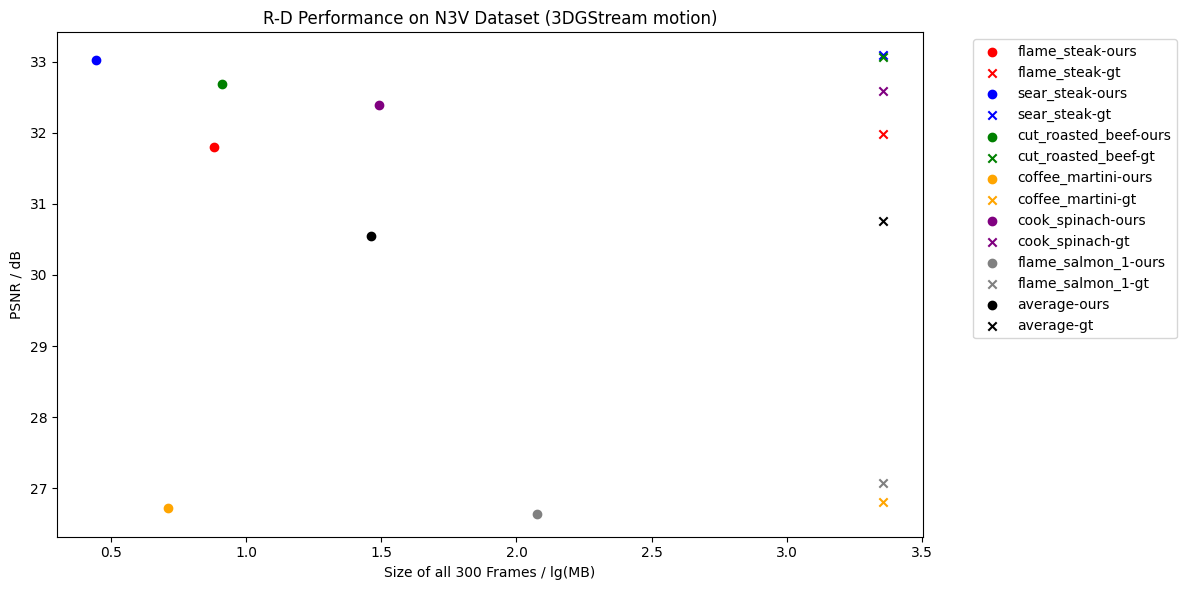

In [11]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# scene_list = ['sear_steak-5', 'flame_salmon_1-3', 'cut_roasted_beef-8', 'coffee_martini-4', 'flame_steak-4', 'cook_spinach-3']
# lambda_size = 1e-2

frame_start = 1
frame_end = 300

all_res = {}

def get_all_data_of_all_scenes_at_lambda(lambda_size=1e-2):
    for scene in ['flame_steak-4','sear_steak-5' , 'cut_roasted_beef-8', 'coffee_martini-4', 'cook_spinach-3', 'flame_salmon_1-3']:
        motion_size_list = []
        prior_size_list = []
        total_size_list = []
        psnr_list = []
        size_gt_list = [7.6]*(frame_end-frame_start)
        psnr_gt_list = [] 
        frame_list = list(range(frame_start, frame_end))

        for frame in range(frame_start, frame_end):
            path_size = f'3DGStream-Res/dynerf/{scene.split("-")[0]}-{lambda_size}-joint/frame{frame:06d}/size.json'
            with open(path_size, 'r') as f:
                size = json.load(f)
                motion_size = size['bits_motion']
                prior_size = size['bits_prior_motion']
                total_size = motion_size + prior_size
                motion_size_list.append(motion_size)
                prior_size_list.append(prior_size)
                total_size_list.append(total_size)

            path_psnr = f'3DGStream-Res/dynerf/{scene.split("-")[0]}-{lambda_size}-joint/frame{frame:06d}/rendering_info.json'
            with open(path_psnr, 'r') as f:
                psnr = json.load(f)
                psnr = psnr['average']['PSNR']
                psnr_list.append(psnr)

            gt_path = f'output_gt/{scene}/frame{frame:06d}/results.json'
            with open(gt_path, 'r') as f:
                gt = json.load(f)
                psnr_gt = gt['stage1/psnr_0']
                psnr_gt_list.append(psnr_gt)

        df = pd.DataFrame({'frame': frame_list, 'motion_size': motion_size_list, 'prior_size': prior_size_list, 'total_size': total_size_list, 'size_gt': size_gt_list, 'psnr': psnr_list, 'psnr_gt': psnr_gt_list})
        avg = df.mean()
        all_res[scene] = avg
    all_res['average'] = pd.DataFrame(all_res).mean(axis=1)
    return all_res

all_res_2 = get_all_data_of_all_scenes_at_lambda(lambda_size=1e-2)
# all_res_3 = get_all_data_of_all_scenes_at_lambda(lambda_size=1e-3)
# all_res_4 = get_all_data_of_all_scenes_at_lambda(lambda_size=1e-4)
df_all = pd.DataFrame(all_res_2)
df_all = df_all.drop('frame')
display(df_all)
# df_all_3 = pd.DataFrame(all_res_3)
# display(df_all_3)
# df_all_4 = pd.DataFrame(all_res_4)
# display(df_all_4)


# 以size为横坐标，psnr为纵坐标，画散点图，相同场景的两个点颜色相同
plt.figure(figsize=(12, 6))  # Make figure wider to accommodate legend
colors = ['red', 'blue', 'green', 'orange', 'purple', 'gray']
for i, scene in enumerate(['flame_steak-4','sear_steak-5' , 'cut_roasted_beef-8', 'coffee_martini-4', 'cook_spinach-3', 'flame_salmon_1-3']):
    plt.scatter(np.log10(all_res_2[scene]['total_size']*300), all_res_2[scene]['psnr'], label=scene.split('-')[0] +'-ours', color=colors[i])
    plt.scatter(np.log10(all_res_2[scene]['size_gt']*300), all_res_2[scene]['psnr_gt'], label=scene.split('-')[0] +'-gt', marker='x', color=colors[i])

plt.scatter(np.log10(all_res_2['average']['total_size']*300), all_res_2['average']['psnr'], label='average-ours', color='black')
plt.scatter(np.log10(all_res_2['average']['size_gt']*300), all_res_2['average']['psnr_gt'], label='average-gt', marker='x', color='black')
plt.xlabel('Size of all 300 Frames / lg(MB)')
plt.ylabel('PSNR / dB')
plt.title('R-D Performance on N3V Dataset (3DGStream motion)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent legend cutoff
plt.show()


  

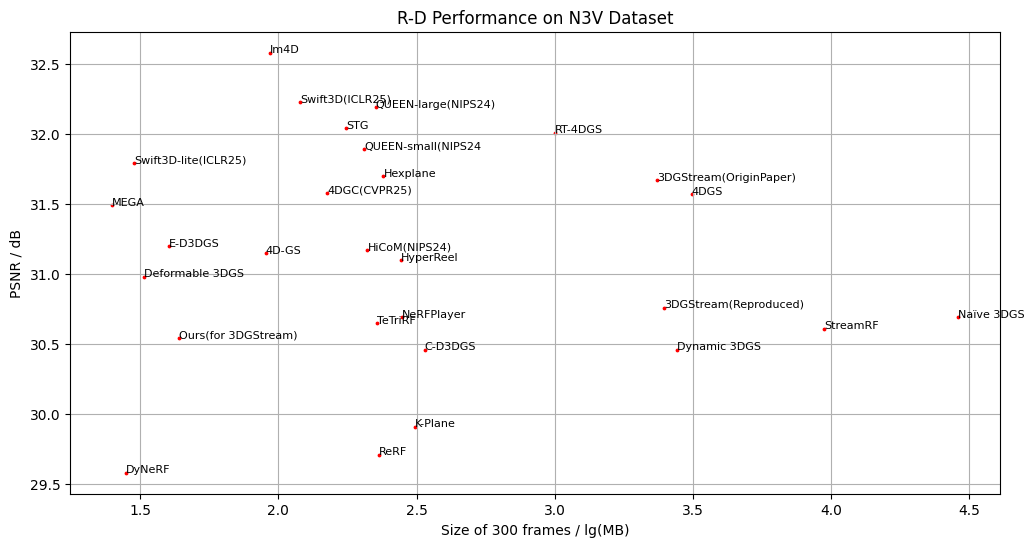

In [28]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# {
#  "StreamRF": {
#         "type": "NeRF",
#         "PSNR": 30.61,
#         "SIZE": 9420
#     },
#     "NeRFPlayer": {
#         "type": "NeRF",
#         "PSNR": 30.69,
#         "SIZE": 280
#     },
#     "HyperReel": {
#         "type": "NeRF",
#         "PSNR": 31.10,
#         "SIZE": 278
#     },
# }

# plot the results of N3V dataset

res_path = "./benchmark_n3v.json"
with open(res_path, 'r') as f:
    res = json.load(f)
model_names = list(res.keys())
psnr_list = [res[model_name]['PSNR'] for model_name in model_names]
size_list = [np.log10(res[model_name]['SIZE']) for model_name in model_names]

plt.figure(figsize=(12, 6))  # Make figure wider to accommodate legend
plt.scatter(size_list, psnr_list, s=3, color='red')
for i, model_name in enumerate(model_names):
    plt.text(size_list[i], psnr_list[i], model_name, fontsize=8)
plt.xlabel('Size of 300 frames / lg(MB)')
plt.ylabel('PSNR / dB')
# add grid
plt.grid(True)
plt.title('R-D Performance on N3V Dataset')
plt.show()


